In [1]:
import numpy as np
import xarray as xr
import wrf
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import pandas as pd
import datetime

# epoch2num function deprecation warning

# plt.rcParams['date.epoch'] = '0000-12-31'

%matplotlib inline

nc_file = '/Users/leec813/OneDrive - PNNL/Documents/awaken/raghu_data/SGPC1_Mom_Flux_Winds.nc'

In [2]:
test = xr.open_dataset(nc_file)

test_arr = np.empty(0)

for i in range(len(test['time_d'])):
#     print(i)
    
    a = datetime.datetime(int(test['time'][0][i]), int(test['time'][1][i]), 
                  int(test['time'][2][i]), int(test['time'][3][i]), 
                  int(test['time'][4][i]), int(test['time'][5][i]))
#     print(a)

    test_arr = np.append(test_arr, a)
    
test3 = xr.open_dataset(nc_file)
test3['z'] = test3['Z']
test3['time_d'] = pd.to_datetime(test_arr)

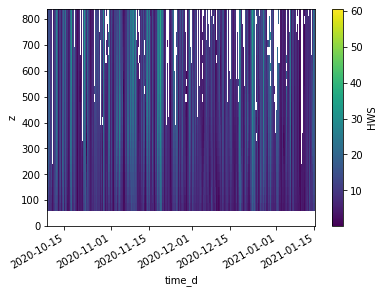

In [3]:
test3['HWS'].plot()

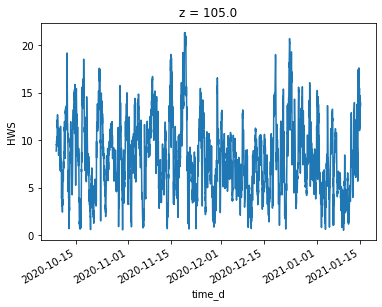

In [25]:
# plt.rcParams['date.epoch'] = '0000-12-31'
test3['HWS'][3].plot()
# plt.show()

In [351]:
pd.to_datetime(test_arr)

DatetimeIndex(['2020-10-08 17:02:27', '2020-10-08 17:30:49',
               '2020-10-08 18:00:56', '2020-10-08 18:30:58',
               '2020-10-08 19:01:00', '2020-10-08 19:30:59',
               '2020-10-08 20:00:58', '2020-10-08 20:30:57',
               '2020-10-08 21:00:56', '2020-10-08 21:30:56',
               ...
               '2021-01-15 01:30:25', '2021-01-15 02:01:10',
               '2021-01-15 02:30:55', '2021-01-15 03:00:40',
               '2021-01-15 03:30:25', '2021-01-15 04:01:10',
               '2021-01-15 04:30:55', '2021-01-15 05:00:40',
               '2021-01-15 05:30:26', '2021-01-15 06:01:10'],
              dtype='datetime64[ns]', length=4730, freq=None)

In [349]:
time = pd.date_range("2000-01-01", freq="H", periods=365 * 24)

In [350]:
time

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:00:00',
               '2000-01-01 02:00:00', '2000-01-01 03:00:00',
               '2000-01-01 04:00:00', '2000-01-01 05:00:00',
               '2000-01-01 06:00:00', '2000-01-01 07:00:00',
               '2000-01-01 08:00:00', '2000-01-01 09:00:00',
               ...
               '2000-12-30 14:00:00', '2000-12-30 15:00:00',
               '2000-12-30 16:00:00', '2000-12-30 17:00:00',
               '2000-12-30 18:00:00', '2000-12-30 19:00:00',
               '2000-12-30 20:00:00', '2000-12-30 21:00:00',
               '2000-12-30 22:00:00', '2000-12-30 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq='H')

In [298]:
test_arr[0].year

2020

In [304]:
test3.sel(time_d=slice("2020-06-01", "2021-06-10"))['HWS']

<xarray.DataArray 'HWS' (z: 28, time_d: 4730)>
[132440 values with dtype=float64]
Coordinates:
  * z        (z) float64 15.0 45.0 75.0 105.0 135.0 ... 735.0 765.0 795.0 825.0
  * time_d   (time_d) datetime64[ns] 2020-10-08T17:02:27 ... 2021-01-15T06:01:10

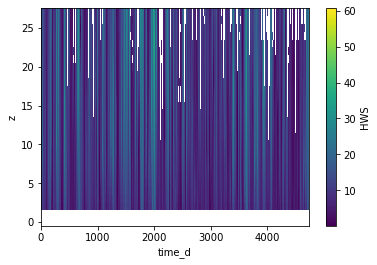

In [26]:
# fig, ax = plt.subplots()
test['HWS'].plot()
# plt.show()
# ax.set_yticklabels(test['Z'].values)

In [320]:
test3

<xarray.Dataset>
Dimensions:  (time_d: 4730, times: 4730, ymdHMS: 6, z: 28)
Coordinates:
  * z        (z) float64 15.0 45.0 75.0 105.0 135.0 ... 735.0 765.0 795.0 825.0
  * times    (times) datetime64[ns] 2020-10-08T17:02:27 ... 2021-01-15T06:01:10
Dimensions without coordinates: time_d, ymdHMS
Data variables:
    HWS      (z, time_d) float64 ...
    HWD      (z, time_d) float64 ...
    uw       (z, time_d) float64 ...
    time     (ymdHMS, time_d) float64 2.02e+03 2.02e+03 2.02e+03 ... 26.15 10.33
    Z        (z) float64 15.0 45.0 75.0 105.0 135.0 ... 735.0 765.0 795.0 825.0
Attributes:
    history:  Wed Aug 11 11:27:38 2021: ncrename -v time,time_d SGPC1_Mom_Flu...
    NCO:      netCDF Operators version 5.0.1 (Homepage = http://nco.sf.net, C...

In [291]:
test3.drop('time')

<xarray.Dataset>
Dimensions:  (time_d: 4730, z: 28)
Coordinates:
  * z        (z) float64 15.0 45.0 75.0 105.0 135.0 ... 735.0 765.0 795.0 825.0
  * time_d   (time_d) datetime64[ns] 2020-10-08T17:02:27 ... 2021-01-15T06:01:10
Data variables:
    HWS      (z, time_d) float64 ...
    HWD      (z, time_d) float64 ...
    uw       (z, time_d) float64 ...
    Z        (z) float64 15.0 45.0 75.0 105.0 135.0 ... 735.0 765.0 795.0 825.0
Attributes:
    history:  Wed Aug 11 11:27:38 2021: ncrename -v time,time_d SGPC1_Mom_Flu...
    NCO:      netCDF Operators version 5.0.1 (Homepage = http://nco.sf.net, C...

In [328]:
test3

<xarray.Dataset>
Dimensions:  (time_d: 4730, ymdHMS: 6, z: 28)
Coordinates:
  * z        (z) float64 15.0 45.0 75.0 105.0 135.0 ... 735.0 765.0 795.0 825.0
  * time_d   (time_d) datetime64[ns] 2020-10-08T17:02:27 ... 2021-01-15T06:01:10
Dimensions without coordinates: ymdHMS
Data variables:
    HWS      (z, time_d) float64 ...
    HWD      (z, time_d) float64 ...
    uw       (z, time_d) float64 ...
    time     (ymdHMS, time_d) float64 ...
    Z        (z) float64 ...
Attributes:
    history:  Wed Aug 11 11:27:38 2021: ncrename -v time,time_d SGPC1_Mom_Flu...
    NCO:      netCDF Operators version 5.0.1 (Homepage = http://nco.sf.net, C...

/Users/leec813/opt/anaconda3/envs/mmc-sgp/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


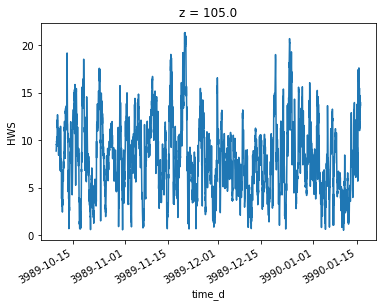

In [392]:
plt.rcParams['date.epoch'] = '0000-12-31'
test3['HWS'][3].plot()
plt.show()

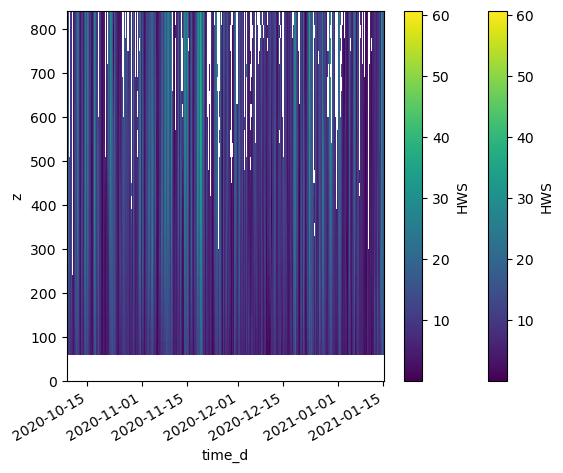

In [21]:
test3['HWS'].plot()
plt.show()

In [375]:
test3['time_d']

<xarray.DataArray 'time_d' (time_d: 4730)>
array([   0,    1,    2, ..., 4727, 4728, 4729])
Dimensions without coordinates: time_d

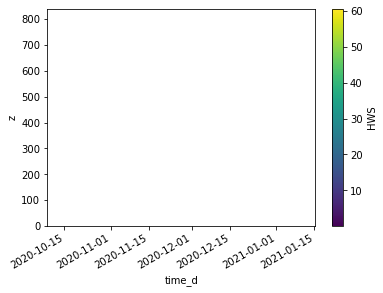

In [383]:
test3['HWS'].plot()

In [384]:
test3['time_d']

<xarray.DataArray 'time_d' (time_d: 4730)>
array(['2020-10-08T17:02:27.000000000', '2020-10-08T17:30:49.000000000',
       '2020-10-08T18:00:56.000000000', ..., '2021-01-15T05:00:40.000000000',
       '2021-01-15T05:30:26.000000000', '2021-01-15T06:01:10.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time_d   (time_d) datetime64[ns] 2020-10-08T17:02:27 ... 2021-01-15T06:01:10

In [378]:
test3['t']

<xarray.DataArray 't' (t: 4730)>
array(['2020-10-08T17:02:27.000000000', '2020-10-08T17:30:49.000000000',
       '2020-10-08T18:00:56.000000000', ..., '2021-01-15T05:00:40.000000000',
       '2021-01-15T05:30:26.000000000', '2021-01-15T06:01:10.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * t        (t) datetime64[ns] 2020-10-08T17:02:27 ... 2021-01-15T06:01:10

In [322]:
test3['time_d'] = test3['times']

In [256]:
test3['time_d']

<xarray.DataArray 'time_d' (time_d: 4730)>
array(['2020-10-08T17:02:27.000000000', '2020-10-08T17:30:49.000000000',
       '2020-10-08T18:00:56.000000000', ..., '2021-01-15T05:00:40.000000000',
       '2021-01-15T05:30:26.000000000', '2021-01-15T06:01:10.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time_d   (time_d) datetime64[ns] 2020-10-08T17:02:27 ... 2021-01-15T06:01:10

In [259]:
test3['HWS']

<xarray.DataArray 'HWS' (z: 28, time_d: 4730)>
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [ 8.775626,  8.689717,  9.085755, ..., 12.696745, 12.484639, 13.543352],
       ...,
       [ 9.537134,  8.991549,  9.117558, ..., 24.354374, 23.868687, 24.618723],
       [ 9.51605 ,  9.004546,  9.035028, ..., 24.525576, 24.20755 , 24.857441],
       [ 9.454062,  8.937548,  8.945462, ..., 24.694897, 24.462147, 25.041304]])
Coordinates:
  * z        (z) float64 15.0 45.0 75.0 105.0 135.0 ... 735.0 765.0 795.0 825.0
  * time_d   (time_d) datetime64[ns] 2020-10-08T17:02:27 ... 2021-01-15T06:01:10

In [277]:
test3['time_d'].values

array(['2020-10-08T17:02:27.000000000', '2020-10-08T17:30:49.000000000',
       '2020-10-08T18:00:56.000000000', ...,
       '2021-01-15T05:00:40.000000000', '2021-01-15T05:30:26.000000000',
       '2021-01-15T06:01:10.000000000'], dtype='datetime64[ns]')

In [282]:
xr.Variable(test3['time_d'], test3['HWS'])

ValueError: dimensions (<xarray.DataArray 'time_d' ()>
array('2020-10-08T17:02:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-08T17:02:27, <xarray.DataArray 'time_d' ()>
array('2020-10-08T17:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-08T17:30:49, <xarray.DataArray 'time_d' ()>
array('2020-10-08T18:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-08T18:00:56, <xarray.DataArray 'time_d' ()>
array('2020-10-08T18:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-08T18:30:58, <xarray.DataArray 'time_d' ()>
array('2020-10-08T19:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-08T19:01:00, <xarray.DataArray 'time_d' ()>
array('2020-10-08T19:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-08T19:30:59, <xarray.DataArray 'time_d' ()>
array('2020-10-08T20:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-08T20:00:58, <xarray.DataArray 'time_d' ()>
array('2020-10-08T20:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-08T20:30:57, <xarray.DataArray 'time_d' ()>
array('2020-10-08T21:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-08T21:00:56, <xarray.DataArray 'time_d' ()>
array('2020-10-08T21:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-08T21:30:56, <xarray.DataArray 'time_d' ()>
array('2020-10-08T22:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-08T22:00:55, <xarray.DataArray 'time_d' ()>
array('2020-10-08T22:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-08T22:30:54, <xarray.DataArray 'time_d' ()>
array('2020-10-08T23:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-08T23:00:53, <xarray.DataArray 'time_d' ()>
array('2020-10-08T23:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-08T23:30:40, <xarray.DataArray 'time_d' ()>
array('2020-10-09T00:01:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T00:01:21, <xarray.DataArray 'time_d' ()>
array('2020-10-09T00:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T00:31:03, <xarray.DataArray 'time_d' ()>
array('2020-10-09T01:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T01:00:44, <xarray.DataArray 'time_d' ()>
array('2020-10-09T01:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T01:30:25, <xarray.DataArray 'time_d' ()>
array('2020-10-09T02:01:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T02:01:06, <xarray.DataArray 'time_d' ()>
array('2020-10-09T02:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T02:30:49, <xarray.DataArray 'time_d' ()>
array('2020-10-09T03:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T03:00:32, <xarray.DataArray 'time_d' ()>
array('2020-10-09T03:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T03:31:15, <xarray.DataArray 'time_d' ()>
array('2020-10-09T04:00:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T04:00:59, <xarray.DataArray 'time_d' ()>
array('2020-10-09T04:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T04:30:43, <xarray.DataArray 'time_d' ()>
array('2020-10-09T05:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T05:00:27, <xarray.DataArray 'time_d' ()>
array('2020-10-09T05:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T05:30:39, <xarray.DataArray 'time_d' ()>
array('2020-10-09T06:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T06:00:47, <xarray.DataArray 'time_d' ()>
array('2020-10-09T06:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T06:30:56, <xarray.DataArray 'time_d' ()>
array('2020-10-09T07:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T07:01:03, <xarray.DataArray 'time_d' ()>
array('2020-10-09T07:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T07:31:11, <xarray.DataArray 'time_d' ()>
array('2020-10-09T08:01:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T08:01:17, <xarray.DataArray 'time_d' ()>
array('2020-10-09T08:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T08:30:26, <xarray.DataArray 'time_d' ()>
array('2020-10-09T09:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T09:00:33, <xarray.DataArray 'time_d' ()>
array('2020-10-09T09:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T09:30:40, <xarray.DataArray 'time_d' ()>
array('2020-10-09T10:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T10:00:47, <xarray.DataArray 'time_d' ()>
array('2020-10-09T10:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T10:30:55, <xarray.DataArray 'time_d' ()>
array('2020-10-09T11:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T11:01:03, <xarray.DataArray 'time_d' ()>
array('2020-10-09T11:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T11:31:10, <xarray.DataArray 'time_d' ()>
array('2020-10-09T12:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T12:01:18, <xarray.DataArray 'time_d' ()>
array('2020-10-09T12:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T12:30:27, <xarray.DataArray 'time_d' ()>
array('2020-10-09T13:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T13:00:35, <xarray.DataArray 'time_d' ()>
array('2020-10-09T13:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T13:30:43, <xarray.DataArray 'time_d' ()>
array('2020-10-09T14:00:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T14:00:50, <xarray.DataArray 'time_d' ()>
array('2020-10-09T14:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T14:30:58, <xarray.DataArray 'time_d' ()>
array('2020-10-09T15:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T15:01:05, <xarray.DataArray 'time_d' ()>
array('2020-10-09T15:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T15:31:12, <xarray.DataArray 'time_d' ()>
array('2020-10-09T16:01:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T16:01:20, <xarray.DataArray 'time_d' ()>
array('2020-10-09T16:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T16:30:43, <xarray.DataArray 'time_d' ()>
array('2020-10-09T17:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T17:01:00, <xarray.DataArray 'time_d' ()>
array('2020-10-09T17:31:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T17:31:17, <xarray.DataArray 'time_d' ()>
array('2020-10-09T18:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T18:00:36, <xarray.DataArray 'time_d' ()>
array('2020-10-09T18:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T18:30:53, <xarray.DataArray 'time_d' ()>
array('2020-10-09T19:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T19:00:29, <xarray.DataArray 'time_d' ()>
array('2020-10-09T19:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T19:30:45, <xarray.DataArray 'time_d' ()>
array('2020-10-09T20:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T20:01:02, <xarray.DataArray 'time_d' ()>
array('2020-10-09T20:31:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T20:31:20, <xarray.DataArray 'time_d' ()>
array('2020-10-09T21:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T21:00:40, <xarray.DataArray 'time_d' ()>
array('2020-10-09T21:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T21:30:56, <xarray.DataArray 'time_d' ()>
array('2020-10-09T22:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T22:01:13, <xarray.DataArray 'time_d' ()>
array('2020-10-09T22:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T22:30:33, <xarray.DataArray 'time_d' ()>
array('2020-10-09T23:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T23:00:49, <xarray.DataArray 'time_d' ()>
array('2020-10-09T23:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-09T23:31:06, <xarray.DataArray 'time_d' ()>
array('2020-10-10T00:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T00:00:26, <xarray.DataArray 'time_d' ()>
array('2020-10-10T00:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T00:30:42, <xarray.DataArray 'time_d' ()>
array('2020-10-10T01:00:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T01:00:59, <xarray.DataArray 'time_d' ()>
array('2020-10-10T01:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T01:31:15, <xarray.DataArray 'time_d' ()>
array('2020-10-10T02:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T02:00:35, <xarray.DataArray 'time_d' ()>
array('2020-10-10T02:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T02:30:52, <xarray.DataArray 'time_d' ()>
array('2020-10-10T03:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T03:00:27, <xarray.DataArray 'time_d' ()>
array('2020-10-10T03:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T03:30:44, <xarray.DataArray 'time_d' ()>
array('2020-10-10T04:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T04:01:00, <xarray.DataArray 'time_d' ()>
array('2020-10-10T04:31:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T04:31:17, <xarray.DataArray 'time_d' ()>
array('2020-10-10T05:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T05:00:36, <xarray.DataArray 'time_d' ()>
array('2020-10-10T05:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T05:30:53, <xarray.DataArray 'time_d' ()>
array('2020-10-10T06:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T06:00:28, <xarray.DataArray 'time_d' ()>
array('2020-10-10T06:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T06:30:44, <xarray.DataArray 'time_d' ()>
array('2020-10-10T07:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T07:01:01, <xarray.DataArray 'time_d' ()>
array('2020-10-10T07:31:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T07:31:17, <xarray.DataArray 'time_d' ()>
array('2020-10-10T08:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T08:00:37, <xarray.DataArray 'time_d' ()>
array('2020-10-10T08:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T08:30:53, <xarray.DataArray 'time_d' ()>
array('2020-10-10T09:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T09:00:29, <xarray.DataArray 'time_d' ()>
array('2020-10-10T09:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T09:30:45, <xarray.DataArray 'time_d' ()>
array('2020-10-10T10:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T10:01:02, <xarray.DataArray 'time_d' ()>
array('2020-10-10T10:31:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T10:31:19, <xarray.DataArray 'time_d' ()>
array('2020-10-10T11:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T11:00:38, <xarray.DataArray 'time_d' ()>
array('2020-10-10T11:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T11:30:55, <xarray.DataArray 'time_d' ()>
array('2020-10-10T12:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T12:00:31, <xarray.DataArray 'time_d' ()>
array('2020-10-10T12:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T12:30:55, <xarray.DataArray 'time_d' ()>
array('2020-10-10T13:01:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T13:01:19, <xarray.DataArray 'time_d' ()>
array('2020-10-10T13:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T13:30:43, <xarray.DataArray 'time_d' ()>
array('2020-10-10T14:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T14:01:07, <xarray.DataArray 'time_d' ()>
array('2020-10-10T14:31:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T14:31:25, <xarray.DataArray 'time_d' ()>
array('2020-10-10T15:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T15:00:27, <xarray.DataArray 'time_d' ()>
array('2020-10-10T15:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T15:30:29, <xarray.DataArray 'time_d' ()>
array('2020-10-10T16:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T16:00:31, <xarray.DataArray 'time_d' ()>
array('2020-10-10T16:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T16:30:32, <xarray.DataArray 'time_d' ()>
array('2020-10-10T17:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T17:00:31, <xarray.DataArray 'time_d' ()>
array('2020-10-10T17:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T17:30:30, <xarray.DataArray 'time_d' ()>
array('2020-10-10T18:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T18:00:30, <xarray.DataArray 'time_d' ()>
array('2020-10-10T18:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T18:30:29, <xarray.DataArray 'time_d' ()>
array('2020-10-10T19:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T19:00:28, <xarray.DataArray 'time_d' ()>
array('2020-10-10T19:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T19:30:27, <xarray.DataArray 'time_d' ()>
array('2020-10-10T20:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T20:00:26, <xarray.DataArray 'time_d' ()>
array('2020-10-10T20:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T20:30:25, <xarray.DataArray 'time_d' ()>
array('2020-10-10T21:01:24.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T21:01:24, <xarray.DataArray 'time_d' ()>
array('2020-10-10T21:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T21:31:16, <xarray.DataArray 'time_d' ()>
array('2020-10-10T22:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T22:00:57, <xarray.DataArray 'time_d' ()>
array('2020-10-10T22:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T22:30:38, <xarray.DataArray 'time_d' ()>
array('2020-10-10T23:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T23:01:18, <xarray.DataArray 'time_d' ()>
array('2020-10-10T23:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-10T23:30:59, <xarray.DataArray 'time_d' ()>
array('2020-10-11T00:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T00:00:41, <xarray.DataArray 'time_d' ()>
array('2020-10-11T00:31:22.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T00:31:22, <xarray.DataArray 'time_d' ()>
array('2020-10-11T01:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T01:01:03, <xarray.DataArray 'time_d' ()>
array('2020-10-11T01:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T01:30:45, <xarray.DataArray 'time_d' ()>
array('2020-10-11T02:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T02:00:28, <xarray.DataArray 'time_d' ()>
array('2020-10-11T02:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T02:31:11, <xarray.DataArray 'time_d' ()>
array('2020-10-11T03:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T03:00:55, <xarray.DataArray 'time_d' ()>
array('2020-10-11T03:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T03:30:39, <xarray.DataArray 'time_d' ()>
array('2020-10-11T04:01:22.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T04:01:22, <xarray.DataArray 'time_d' ()>
array('2020-10-11T04:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T04:31:06, <xarray.DataArray 'time_d' ()>
array('2020-10-11T05:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T05:00:49, <xarray.DataArray 'time_d' ()>
array('2020-10-11T05:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T05:30:31, <xarray.DataArray 'time_d' ()>
array('2020-10-11T06:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T06:00:41, <xarray.DataArray 'time_d' ()>
array('2020-10-11T06:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T06:30:49, <xarray.DataArray 'time_d' ()>
array('2020-10-11T07:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T07:00:57, <xarray.DataArray 'time_d' ()>
array('2020-10-11T07:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T07:31:04, <xarray.DataArray 'time_d' ()>
array('2020-10-11T08:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T08:00:29, <xarray.DataArray 'time_d' ()>
array('2020-10-11T08:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T08:30:36, <xarray.DataArray 'time_d' ()>
array('2020-10-11T09:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T09:00:44, <xarray.DataArray 'time_d' ()>
array('2020-10-11T09:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T09:30:51, <xarray.DataArray 'time_d' ()>
array('2020-10-11T10:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T10:00:58, <xarray.DataArray 'time_d' ()>
array('2020-10-11T10:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T10:31:05, <xarray.DataArray 'time_d' ()>
array('2020-10-11T11:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T11:00:30, <xarray.DataArray 'time_d' ()>
array('2020-10-11T11:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T11:30:37, <xarray.DataArray 'time_d' ()>
array('2020-10-11T12:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T12:00:44, <xarray.DataArray 'time_d' ()>
array('2020-10-11T12:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T12:30:52, <xarray.DataArray 'time_d' ()>
array('2020-10-11T13:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T13:01:00, <xarray.DataArray 'time_d' ()>
array('2020-10-11T13:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T13:31:08, <xarray.DataArray 'time_d' ()>
array('2020-10-11T14:01:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T14:01:15, <xarray.DataArray 'time_d' ()>
array('2020-10-11T14:31:22.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T14:31:22, <xarray.DataArray 'time_d' ()>
array('2020-10-11T15:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T15:00:30, <xarray.DataArray 'time_d' ()>
array('2020-10-11T15:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T15:30:37, <xarray.DataArray 'time_d' ()>
array('2020-10-11T16:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T16:00:44, <xarray.DataArray 'time_d' ()>
array('2020-10-11T16:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T16:30:51, <xarray.DataArray 'time_d' ()>
array('2020-10-11T17:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T17:00:58, <xarray.DataArray 'time_d' ()>
array('2020-10-11T17:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T17:31:04, <xarray.DataArray 'time_d' ()>
array('2020-10-11T18:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T18:00:28, <xarray.DataArray 'time_d' ()>
array('2020-10-11T18:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T18:30:35, <xarray.DataArray 'time_d' ()>
array('2020-10-11T19:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T19:00:42, <xarray.DataArray 'time_d' ()>
array('2020-10-11T19:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T19:30:49, <xarray.DataArray 'time_d' ()>
array('2020-10-11T20:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T20:00:55, <xarray.DataArray 'time_d' ()>
array('2020-10-11T20:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T20:31:02, <xarray.DataArray 'time_d' ()>
array('2020-10-11T21:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T21:00:26, <xarray.DataArray 'time_d' ()>
array('2020-10-11T21:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T21:30:33, <xarray.DataArray 'time_d' ()>
array('2020-10-11T22:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T22:00:32, <xarray.DataArray 'time_d' ()>
array('2020-10-11T22:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T22:30:49, <xarray.DataArray 'time_d' ()>
array('2020-10-11T23:01:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T23:01:21, <xarray.DataArray 'time_d' ()>
array('2020-10-11T23:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-11T23:30:41, <xarray.DataArray 'time_d' ()>
array('2020-10-12T00:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T00:00:58, <xarray.DataArray 'time_d' ()>
array('2020-10-12T00:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T00:31:15, <xarray.DataArray 'time_d' ()>
array('2020-10-12T01:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T01:00:34, <xarray.DataArray 'time_d' ()>
array('2020-10-12T01:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T01:30:51, <xarray.DataArray 'time_d' ()>
array('2020-10-12T02:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T02:00:26, <xarray.DataArray 'time_d' ()>
array('2020-10-12T02:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T02:30:43, <xarray.DataArray 'time_d' ()>
array('2020-10-12T03:00:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T03:00:59, <xarray.DataArray 'time_d' ()>
array('2020-10-12T03:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T03:31:16, <xarray.DataArray 'time_d' ()>
array('2020-10-12T04:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T04:00:35, <xarray.DataArray 'time_d' ()>
array('2020-10-12T04:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T04:30:52, <xarray.DataArray 'time_d' ()>
array('2020-10-12T05:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T05:00:27, <xarray.DataArray 'time_d' ()>
array('2020-10-12T05:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T05:30:44, <xarray.DataArray 'time_d' ()>
array('2020-10-12T06:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T06:01:01, <xarray.DataArray 'time_d' ()>
array('2020-10-12T06:31:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T06:31:18, <xarray.DataArray 'time_d' ()>
array('2020-10-12T07:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T07:00:38, <xarray.DataArray 'time_d' ()>
array('2020-10-12T07:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T07:30:54, <xarray.DataArray 'time_d' ()>
array('2020-10-12T08:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T08:00:30, <xarray.DataArray 'time_d' ()>
array('2020-10-12T08:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T08:30:46, <xarray.DataArray 'time_d' ()>
array('2020-10-12T09:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T09:01:03, <xarray.DataArray 'time_d' ()>
array('2020-10-12T09:31:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T09:31:19, <xarray.DataArray 'time_d' ()>
array('2020-10-12T10:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T10:00:39, <xarray.DataArray 'time_d' ()>
array('2020-10-12T10:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T10:30:56, <xarray.DataArray 'time_d' ()>
array('2020-10-12T11:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T11:01:13, <xarray.DataArray 'time_d' ()>
array('2020-10-12T11:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T11:30:32, <xarray.DataArray 'time_d' ()>
array('2020-10-12T12:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T12:00:49, <xarray.DataArray 'time_d' ()>
array('2020-10-12T12:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T12:31:06, <xarray.DataArray 'time_d' ()>
array('2020-10-12T13:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T13:00:25, <xarray.DataArray 'time_d' ()>
array('2020-10-12T13:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T13:30:42, <xarray.DataArray 'time_d' ()>
array('2020-10-12T14:00:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T14:00:59, <xarray.DataArray 'time_d' ()>
array('2020-10-12T14:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T14:31:15, <xarray.DataArray 'time_d' ()>
array('2020-10-12T15:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T15:00:35, <xarray.DataArray 'time_d' ()>
array('2020-10-12T15:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T15:30:52, <xarray.DataArray 'time_d' ()>
array('2020-10-12T16:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T16:00:27, <xarray.DataArray 'time_d' ()>
array('2020-10-12T16:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T16:30:44, <xarray.DataArray 'time_d' ()>
array('2020-10-12T17:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T17:01:01, <xarray.DataArray 'time_d' ()>
array('2020-10-12T17:31:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T17:31:17, <xarray.DataArray 'time_d' ()>
array('2020-10-12T18:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T18:00:37, <xarray.DataArray 'time_d' ()>
array('2020-10-12T18:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T18:30:54, <xarray.DataArray 'time_d' ()>
array('2020-10-12T19:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T19:00:29, <xarray.DataArray 'time_d' ()>
array('2020-10-12T19:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T19:30:46, <xarray.DataArray 'time_d' ()>
array('2020-10-12T20:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T20:01:03, <xarray.DataArray 'time_d' ()>
array('2020-10-12T20:31:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T20:31:19, <xarray.DataArray 'time_d' ()>
array('2020-10-12T21:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T21:00:39, <xarray.DataArray 'time_d' ()>
array('2020-10-12T21:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T21:30:56, <xarray.DataArray 'time_d' ()>
array('2020-10-12T22:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T22:01:12, <xarray.DataArray 'time_d' ()>
array('2020-10-12T22:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T22:30:32, <xarray.DataArray 'time_d' ()>
array('2020-10-12T23:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T23:00:49, <xarray.DataArray 'time_d' ()>
array('2020-10-12T23:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-12T23:31:05, <xarray.DataArray 'time_d' ()>
array('2020-10-13T00:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T00:00:25, <xarray.DataArray 'time_d' ()>
array('2020-10-13T00:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T00:30:42, <xarray.DataArray 'time_d' ()>
array('2020-10-13T01:00:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T01:00:59, <xarray.DataArray 'time_d' ()>
array('2020-10-13T01:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T01:31:15, <xarray.DataArray 'time_d' ()>
array('2020-10-13T02:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T02:00:35, <xarray.DataArray 'time_d' ()>
array('2020-10-13T02:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T02:30:52, <xarray.DataArray 'time_d' ()>
array('2020-10-13T03:01:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T03:01:17, <xarray.DataArray 'time_d' ()>
array('2020-10-13T03:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T03:30:41, <xarray.DataArray 'time_d' ()>
array('2020-10-13T04:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T04:01:07, <xarray.DataArray 'time_d' ()>
array('2020-10-13T04:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T04:31:11, <xarray.DataArray 'time_d' ()>
array('2020-10-13T05:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T05:00:28, <xarray.DataArray 'time_d' ()>
array('2020-10-13T05:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T05:30:30, <xarray.DataArray 'time_d' ()>
array('2020-10-13T06:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T06:00:31, <xarray.DataArray 'time_d' ()>
array('2020-10-13T06:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T06:30:30, <xarray.DataArray 'time_d' ()>
array('2020-10-13T07:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T07:00:29, <xarray.DataArray 'time_d' ()>
array('2020-10-13T07:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T07:30:28, <xarray.DataArray 'time_d' ()>
array('2020-10-13T08:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T08:00:27, <xarray.DataArray 'time_d' ()>
array('2020-10-13T08:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T08:30:26, <xarray.DataArray 'time_d' ()>
array('2020-10-13T09:01:22.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T09:01:22, <xarray.DataArray 'time_d' ()>
array('2020-10-13T09:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T09:31:06, <xarray.DataArray 'time_d' ()>
array('2020-10-13T10:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T10:00:49, <xarray.DataArray 'time_d' ()>
array('2020-10-13T10:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T10:30:33, <xarray.DataArray 'time_d' ()>
array('2020-10-13T11:01:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T11:01:17, <xarray.DataArray 'time_d' ()>
array('2020-10-13T11:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T11:31:00, <xarray.DataArray 'time_d' ()>
array('2020-10-13T12:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T12:00:44, <xarray.DataArray 'time_d' ()>
array('2020-10-13T12:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T12:30:28, <xarray.DataArray 'time_d' ()>
array('2020-10-13T13:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T13:00:28, <xarray.DataArray 'time_d' ()>
array('2020-10-13T13:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T13:31:12, <xarray.DataArray 'time_d' ()>
array('2020-10-13T14:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T14:00:56, <xarray.DataArray 'time_d' ()>
array('2020-10-13T14:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T14:30:39, <xarray.DataArray 'time_d' ()>
array('2020-10-13T15:01:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T15:01:21, <xarray.DataArray 'time_d' ()>
array('2020-10-13T15:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T15:30:31, <xarray.DataArray 'time_d' ()>
array('2020-10-13T16:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T16:00:38, <xarray.DataArray 'time_d' ()>
array('2020-10-13T16:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T16:30:49, <xarray.DataArray 'time_d' ()>
array('2020-10-13T17:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T17:00:57, <xarray.DataArray 'time_d' ()>
array('2020-10-13T17:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T17:31:06, <xarray.DataArray 'time_d' ()>
array('2020-10-13T18:01:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T18:01:15, <xarray.DataArray 'time_d' ()>
array('2020-10-13T18:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T18:30:25, <xarray.DataArray 'time_d' ()>
array('2020-10-13T19:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T19:00:34, <xarray.DataArray 'time_d' ()>
array('2020-10-13T19:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T19:30:43, <xarray.DataArray 'time_d' ()>
array('2020-10-13T20:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T20:00:51, <xarray.DataArray 'time_d' ()>
array('2020-10-13T20:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T20:30:59, <xarray.DataArray 'time_d' ()>
array('2020-10-13T21:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T21:00:25, <xarray.DataArray 'time_d' ()>
array('2020-10-13T21:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T21:30:33, <xarray.DataArray 'time_d' ()>
array('2020-10-13T22:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T22:00:42, <xarray.DataArray 'time_d' ()>
array('2020-10-13T22:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T22:30:50, <xarray.DataArray 'time_d' ()>
array('2020-10-13T23:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T23:00:58, <xarray.DataArray 'time_d' ()>
array('2020-10-13T23:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-13T23:31:07, <xarray.DataArray 'time_d' ()>
array('2020-10-14T00:01:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T00:01:15, <xarray.DataArray 'time_d' ()>
array('2020-10-14T00:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T00:30:25, <xarray.DataArray 'time_d' ()>
array('2020-10-14T01:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T01:00:34, <xarray.DataArray 'time_d' ()>
array('2020-10-14T01:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T01:30:44, <xarray.DataArray 'time_d' ()>
array('2020-10-14T02:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T02:00:55, <xarray.DataArray 'time_d' ()>
array('2020-10-14T02:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T02:31:06, <xarray.DataArray 'time_d' ()>
array('2020-10-14T03:01:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T03:01:17, <xarray.DataArray 'time_d' ()>
array('2020-10-14T03:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T03:30:28, <xarray.DataArray 'time_d' ()>
array('2020-10-14T04:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T04:00:39, <xarray.DataArray 'time_d' ()>
array('2020-10-14T04:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T04:30:48, <xarray.DataArray 'time_d' ()>
array('2020-10-14T05:01:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T05:01:15, <xarray.DataArray 'time_d' ()>
array('2020-10-14T05:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T05:30:37, <xarray.DataArray 'time_d' ()>
array('2020-10-14T06:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T06:00:54, <xarray.DataArray 'time_d' ()>
array('2020-10-14T06:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T06:31:12, <xarray.DataArray 'time_d' ()>
array('2020-10-14T07:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T07:00:34, <xarray.DataArray 'time_d' ()>
array('2020-10-14T07:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T07:30:52, <xarray.DataArray 'time_d' ()>
array('2020-10-14T08:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T08:00:29, <xarray.DataArray 'time_d' ()>
array('2020-10-14T08:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T08:30:47, <xarray.DataArray 'time_d' ()>
array('2020-10-14T09:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T09:01:05, <xarray.DataArray 'time_d' ()>
array('2020-10-14T09:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T09:30:26, <xarray.DataArray 'time_d' ()>
array('2020-10-14T10:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T10:00:44, <xarray.DataArray 'time_d' ()>
array('2020-10-14T10:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T10:31:02, <xarray.DataArray 'time_d' ()>
array('2020-10-14T11:01:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T11:01:20, <xarray.DataArray 'time_d' ()>
array('2020-10-14T11:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T11:30:41, <xarray.DataArray 'time_d' ()>
array('2020-10-14T12:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T12:01:00, <xarray.DataArray 'time_d' ()>
array('2020-10-14T12:31:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T12:31:18, <xarray.DataArray 'time_d' ()>
array('2020-10-14T13:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T13:00:39, <xarray.DataArray 'time_d' ()>
array('2020-10-14T13:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T13:30:57, <xarray.DataArray 'time_d' ()>
array('2020-10-14T14:01:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T14:01:16, <xarray.DataArray 'time_d' ()>
array('2020-10-14T14:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T14:30:37, <xarray.DataArray 'time_d' ()>
array('2020-10-14T15:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T15:00:54, <xarray.DataArray 'time_d' ()>
array('2020-10-14T15:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T15:31:12, <xarray.DataArray 'time_d' ()>
array('2020-10-14T16:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T16:00:34, <xarray.DataArray 'time_d' ()>
array('2020-10-14T16:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T16:30:52, <xarray.DataArray 'time_d' ()>
array('2020-10-14T17:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T17:00:28, <xarray.DataArray 'time_d' ()>
array('2020-10-14T17:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T17:30:46, <xarray.DataArray 'time_d' ()>
array('2020-10-14T18:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T18:01:04, <xarray.DataArray 'time_d' ()>
array('2020-10-14T18:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T18:30:25, <xarray.DataArray 'time_d' ()>
array('2020-10-14T19:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T19:00:43, <xarray.DataArray 'time_d' ()>
array('2020-10-14T19:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T19:31:00, <xarray.DataArray 'time_d' ()>
array('2020-10-14T20:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T20:01:18, <xarray.DataArray 'time_d' ()>
array('2020-10-14T20:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T20:30:39, <xarray.DataArray 'time_d' ()>
array('2020-10-14T21:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T21:00:57, <xarray.DataArray 'time_d' ()>
array('2020-10-14T21:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T21:31:15, <xarray.DataArray 'time_d' ()>
array('2020-10-14T22:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T22:00:35, <xarray.DataArray 'time_d' ()>
array('2020-10-14T22:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T22:30:53, <xarray.DataArray 'time_d' ()>
array('2020-10-14T23:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T23:00:30, <xarray.DataArray 'time_d' ()>
array('2020-10-14T23:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-14T23:30:48, <xarray.DataArray 'time_d' ()>
array('2020-10-15T00:01:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T00:01:21, <xarray.DataArray 'time_d' ()>
array('2020-10-15T00:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T00:30:42, <xarray.DataArray 'time_d' ()>
array('2020-10-15T01:00:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T01:00:59, <xarray.DataArray 'time_d' ()>
array('2020-10-15T01:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T01:30:32, <xarray.DataArray 'time_d' ()>
array('2020-10-15T02:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T02:00:56, <xarray.DataArray 'time_d' ()>
array('2020-10-15T02:31:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T02:31:21, <xarray.DataArray 'time_d' ()>
array('2020-10-15T03:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T03:00:32, <xarray.DataArray 'time_d' ()>
array('2020-10-15T03:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T03:30:35, <xarray.DataArray 'time_d' ()>
array('2020-10-15T04:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T04:00:38, <xarray.DataArray 'time_d' ()>
array('2020-10-15T04:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T04:30:39, <xarray.DataArray 'time_d' ()>
array('2020-10-15T05:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T05:00:39, <xarray.DataArray 'time_d' ()>
array('2020-10-15T05:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T05:30:40, <xarray.DataArray 'time_d' ()>
array('2020-10-15T06:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T06:00:40, <xarray.DataArray 'time_d' ()>
array('2020-10-15T06:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T06:30:40, <xarray.DataArray 'time_d' ()>
array('2020-10-15T07:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T07:00:40, <xarray.DataArray 'time_d' ()>
array('2020-10-15T07:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T07:30:27, <xarray.DataArray 'time_d' ()>
array('2020-10-15T08:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T08:00:25, <xarray.DataArray 'time_d' ()>
array('2020-10-15T08:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T08:31:07, <xarray.DataArray 'time_d' ()>
array('2020-10-15T09:00:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T09:00:50, <xarray.DataArray 'time_d' ()>
array('2020-10-15T09:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T09:30:32, <xarray.DataArray 'time_d' ()>
array('2020-10-15T10:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T10:00:30, <xarray.DataArray 'time_d' ()>
array('2020-10-15T10:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T10:31:12, <xarray.DataArray 'time_d' ()>
array('2020-10-15T11:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T11:00:56, <xarray.DataArray 'time_d' ()>
array('2020-10-15T11:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T11:30:39, <xarray.DataArray 'time_d' ()>
array('2020-10-15T12:01:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T12:01:21, <xarray.DataArray 'time_d' ()>
array('2020-10-15T12:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T12:31:04, <xarray.DataArray 'time_d' ()>
array('2020-10-15T13:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T13:00:25, <xarray.DataArray 'time_d' ()>
array('2020-10-15T13:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T13:30:33, <xarray.DataArray 'time_d' ()>
array('2020-10-15T14:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T14:00:43, <xarray.DataArray 'time_d' ()>
array('2020-10-15T14:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T14:30:52, <xarray.DataArray 'time_d' ()>
array('2020-10-15T15:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T15:01:01, <xarray.DataArray 'time_d' ()>
array('2020-10-15T15:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T15:31:11, <xarray.DataArray 'time_d' ()>
array('2020-10-15T16:01:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T16:01:19, <xarray.DataArray 'time_d' ()>
array('2020-10-15T16:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T16:30:28, <xarray.DataArray 'time_d' ()>
array('2020-10-15T17:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T17:00:36, <xarray.DataArray 'time_d' ()>
array('2020-10-15T17:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T17:30:45, <xarray.DataArray 'time_d' ()>
array('2020-10-15T18:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T18:00:53, <xarray.DataArray 'time_d' ()>
array('2020-10-15T18:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T18:31:03, <xarray.DataArray 'time_d' ()>
array('2020-10-15T19:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T19:00:30, <xarray.DataArray 'time_d' ()>
array('2020-10-15T19:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T19:30:41, <xarray.DataArray 'time_d' ()>
array('2020-10-15T20:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T20:00:51, <xarray.DataArray 'time_d' ()>
array('2020-10-15T20:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T20:31:02, <xarray.DataArray 'time_d' ()>
array('2020-10-15T21:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T21:00:31, <xarray.DataArray 'time_d' ()>
array('2020-10-15T21:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T21:30:42, <xarray.DataArray 'time_d' ()>
array('2020-10-15T22:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T22:00:53, <xarray.DataArray 'time_d' ()>
array('2020-10-15T22:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T22:31:04, <xarray.DataArray 'time_d' ()>
array('2020-10-15T23:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T23:01:14, <xarray.DataArray 'time_d' ()>
array('2020-10-15T23:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-15T23:30:26, <xarray.DataArray 'time_d' ()>
array('2020-10-16T00:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T00:00:36, <xarray.DataArray 'time_d' ()>
array('2020-10-16T00:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T00:30:46, <xarray.DataArray 'time_d' ()>
array('2020-10-16T01:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T01:00:56, <xarray.DataArray 'time_d' ()>
array('2020-10-16T01:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T01:31:06, <xarray.DataArray 'time_d' ()>
array('2020-10-16T02:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T02:00:44, <xarray.DataArray 'time_d' ()>
array('2020-10-16T02:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T02:31:02, <xarray.DataArray 'time_d' ()>
array('2020-10-16T03:01:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T03:01:21, <xarray.DataArray 'time_d' ()>
array('2020-10-16T03:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T03:30:42, <xarray.DataArray 'time_d' ()>
array('2020-10-16T04:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T04:01:00, <xarray.DataArray 'time_d' ()>
array('2020-10-16T04:31:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T04:31:18, <xarray.DataArray 'time_d' ()>
array('2020-10-16T05:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T05:00:39, <xarray.DataArray 'time_d' ()>
array('2020-10-16T05:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T05:30:57, <xarray.DataArray 'time_d' ()>
array('2020-10-16T06:01:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T06:01:15, <xarray.DataArray 'time_d' ()>
array('2020-10-16T06:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T06:30:36, <xarray.DataArray 'time_d' ()>
array('2020-10-16T07:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T07:00:54, <xarray.DataArray 'time_d' ()>
array('2020-10-16T07:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T07:31:12, <xarray.DataArray 'time_d' ()>
array('2020-10-16T08:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T08:00:33, <xarray.DataArray 'time_d' ()>
array('2020-10-16T08:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T08:30:51, <xarray.DataArray 'time_d' ()>
array('2020-10-16T09:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T09:00:27, <xarray.DataArray 'time_d' ()>
array('2020-10-16T09:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T09:30:45, <xarray.DataArray 'time_d' ()>
array('2020-10-16T10:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T10:01:03, <xarray.DataArray 'time_d' ()>
array('2020-10-16T10:31:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T10:31:21, <xarray.DataArray 'time_d' ()>
array('2020-10-16T11:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T11:00:42, <xarray.DataArray 'time_d' ()>
array('2020-10-16T11:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T11:31:00, <xarray.DataArray 'time_d' ()>
array('2020-10-16T12:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T12:01:18, <xarray.DataArray 'time_d' ()>
array('2020-10-16T12:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T12:30:39, <xarray.DataArray 'time_d' ()>
array('2020-10-16T13:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T13:00:57, <xarray.DataArray 'time_d' ()>
array('2020-10-16T13:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T13:31:16, <xarray.DataArray 'time_d' ()>
array('2020-10-16T14:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T14:00:37, <xarray.DataArray 'time_d' ()>
array('2020-10-16T14:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T14:30:55, <xarray.DataArray 'time_d' ()>
array('2020-10-16T15:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T15:01:12, <xarray.DataArray 'time_d' ()>
array('2020-10-16T15:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T15:30:33, <xarray.DataArray 'time_d' ()>
array('2020-10-16T16:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T16:00:51, <xarray.DataArray 'time_d' ()>
array('2020-10-16T16:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T16:31:09, <xarray.DataArray 'time_d' ()>
array('2020-10-16T17:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T17:00:29, <xarray.DataArray 'time_d' ()>
array('2020-10-16T17:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T17:30:47, <xarray.DataArray 'time_d' ()>
array('2020-10-16T18:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T18:01:05, <xarray.DataArray 'time_d' ()>
array('2020-10-16T18:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T18:30:26, <xarray.DataArray 'time_d' ()>
array('2020-10-16T19:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T19:00:43, <xarray.DataArray 'time_d' ()>
array('2020-10-16T19:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T19:31:01, <xarray.DataArray 'time_d' ()>
array('2020-10-16T20:01:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T20:01:19, <xarray.DataArray 'time_d' ()>
array('2020-10-16T20:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T20:30:40, <xarray.DataArray 'time_d' ()>
array('2020-10-16T21:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T21:00:57, <xarray.DataArray 'time_d' ()>
array('2020-10-16T21:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T21:31:15, <xarray.DataArray 'time_d' ()>
array('2020-10-16T22:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T22:00:36, <xarray.DataArray 'time_d' ()>
array('2020-10-16T22:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T22:30:55, <xarray.DataArray 'time_d' ()>
array('2020-10-16T23:01:22.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T23:01:22, <xarray.DataArray 'time_d' ()>
array('2020-10-16T23:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-16T23:30:48, <xarray.DataArray 'time_d' ()>
array('2020-10-17T00:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T00:00:29, <xarray.DataArray 'time_d' ()>
array('2020-10-17T00:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T00:30:41, <xarray.DataArray 'time_d' ()>
array('2020-10-17T01:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T01:00:44, <xarray.DataArray 'time_d' ()>
array('2020-10-17T01:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T01:30:47, <xarray.DataArray 'time_d' ()>
array('2020-10-17T02:00:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T02:00:50, <xarray.DataArray 'time_d' ()>
array('2020-10-17T02:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T02:30:51, <xarray.DataArray 'time_d' ()>
array('2020-10-17T03:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T03:00:51, <xarray.DataArray 'time_d' ()>
array('2020-10-17T03:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T03:30:52, <xarray.DataArray 'time_d' ()>
array('2020-10-17T04:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T04:00:52, <xarray.DataArray 'time_d' ()>
array('2020-10-17T04:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T04:30:52, <xarray.DataArray 'time_d' ()>
array('2020-10-17T05:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T05:00:52, <xarray.DataArray 'time_d' ()>
array('2020-10-17T05:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T05:30:47, <xarray.DataArray 'time_d' ()>
array('2020-10-17T06:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T06:00:31, <xarray.DataArray 'time_d' ()>
array('2020-10-17T06:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T06:31:15, <xarray.DataArray 'time_d' ()>
array('2020-10-17T07:00:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T07:00:59, <xarray.DataArray 'time_d' ()>
array('2020-10-17T07:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T07:30:43, <xarray.DataArray 'time_d' ()>
array('2020-10-17T08:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T08:00:27, <xarray.DataArray 'time_d' ()>
array('2020-10-17T08:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T08:31:11, <xarray.DataArray 'time_d' ()>
array('2020-10-17T09:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T09:00:55, <xarray.DataArray 'time_d' ()>
array('2020-10-17T09:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T09:30:40, <xarray.DataArray 'time_d' ()>
array('2020-10-17T10:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T10:00:25, <xarray.DataArray 'time_d' ()>
array('2020-10-17T10:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T10:31:10, <xarray.DataArray 'time_d' ()>
array('2020-10-17T11:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T11:00:54, <xarray.DataArray 'time_d' ()>
array('2020-10-17T11:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T11:30:40, <xarray.DataArray 'time_d' ()>
array('2020-10-17T12:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T12:00:25, <xarray.DataArray 'time_d' ()>
array('2020-10-17T12:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T12:30:48, <xarray.DataArray 'time_d' ()>
array('2020-10-17T13:00:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T13:00:59, <xarray.DataArray 'time_d' ()>
array('2020-10-17T13:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T13:31:09, <xarray.DataArray 'time_d' ()>
array('2020-10-17T14:01:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T14:01:20, <xarray.DataArray 'time_d' ()>
array('2020-10-17T14:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T14:30:32, <xarray.DataArray 'time_d' ()>
array('2020-10-17T15:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T15:00:41, <xarray.DataArray 'time_d' ()>
array('2020-10-17T15:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T15:30:51, <xarray.DataArray 'time_d' ()>
array('2020-10-17T16:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T16:01:01, <xarray.DataArray 'time_d' ()>
array('2020-10-17T16:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T16:31:10, <xarray.DataArray 'time_d' ()>
array('2020-10-17T17:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T17:01:18, <xarray.DataArray 'time_d' ()>
array('2020-10-17T17:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T17:30:27, <xarray.DataArray 'time_d' ()>
array('2020-10-17T18:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T18:00:36, <xarray.DataArray 'time_d' ()>
array('2020-10-17T18:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T18:30:44, <xarray.DataArray 'time_d' ()>
array('2020-10-17T19:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T19:00:53, <xarray.DataArray 'time_d' ()>
array('2020-10-17T19:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T19:31:02, <xarray.DataArray 'time_d' ()>
array('2020-10-17T20:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T20:00:30, <xarray.DataArray 'time_d' ()>
array('2020-10-17T20:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T20:30:38, <xarray.DataArray 'time_d' ()>
array('2020-10-17T21:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T21:00:47, <xarray.DataArray 'time_d' ()>
array('2020-10-17T21:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T21:30:56, <xarray.DataArray 'time_d' ()>
array('2020-10-17T22:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T22:01:05, <xarray.DataArray 'time_d' ()>
array('2020-10-17T22:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T22:31:13, <xarray.DataArray 'time_d' ()>
array('2020-10-17T23:01:23.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T23:01:23, <xarray.DataArray 'time_d' ()>
array('2020-10-17T23:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-17T23:30:34, <xarray.DataArray 'time_d' ()>
array('2020-10-18T00:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T00:00:44, <xarray.DataArray 'time_d' ()>
array('2020-10-18T00:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T00:30:54, <xarray.DataArray 'time_d' ()>
array('2020-10-18T01:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T01:01:04, <xarray.DataArray 'time_d' ()>
array('2020-10-18T01:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T01:31:14, <xarray.DataArray 'time_d' ()>
array('2020-10-18T02:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T02:00:26, <xarray.DataArray 'time_d' ()>
array('2020-10-18T02:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T02:30:37, <xarray.DataArray 'time_d' ()>
array('2020-10-18T03:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T03:00:57, <xarray.DataArray 'time_d' ()>
array('2020-10-18T03:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T03:31:14, <xarray.DataArray 'time_d' ()>
array('2020-10-18T04:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T04:00:35, <xarray.DataArray 'time_d' ()>
array('2020-10-18T04:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T04:30:53, <xarray.DataArray 'time_d' ()>
array('2020-10-18T05:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T05:00:29, <xarray.DataArray 'time_d' ()>
array('2020-10-18T05:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T05:30:47, <xarray.DataArray 'time_d' ()>
array('2020-10-18T06:01:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T06:01:20, <xarray.DataArray 'time_d' ()>
array('2020-10-18T06:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T06:30:41, <xarray.DataArray 'time_d' ()>
array('2020-10-18T07:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T07:00:58, <xarray.DataArray 'time_d' ()>
array('2020-10-18T07:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T07:31:16, <xarray.DataArray 'time_d' ()>
array('2020-10-18T08:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T08:00:37, <xarray.DataArray 'time_d' ()>
array('2020-10-18T08:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T08:30:54, <xarray.DataArray 'time_d' ()>
array('2020-10-18T09:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T09:00:30, <xarray.DataArray 'time_d' ()>
array('2020-10-18T09:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T09:30:48, <xarray.DataArray 'time_d' ()>
array('2020-10-18T10:01:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T10:01:21, <xarray.DataArray 'time_d' ()>
array('2020-10-18T10:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T10:30:42, <xarray.DataArray 'time_d' ()>
array('2020-10-18T11:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T11:01:00, <xarray.DataArray 'time_d' ()>
array('2020-10-18T11:31:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T11:31:17, <xarray.DataArray 'time_d' ()>
array('2020-10-18T12:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T12:00:38, <xarray.DataArray 'time_d' ()>
array('2020-10-18T12:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T12:30:56, <xarray.DataArray 'time_d' ()>
array('2020-10-18T13:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T13:01:13, <xarray.DataArray 'time_d' ()>
array('2020-10-18T13:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T13:30:34, <xarray.DataArray 'time_d' ()>
array('2020-10-18T14:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T14:00:52, <xarray.DataArray 'time_d' ()>
array('2020-10-18T14:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T14:31:10, <xarray.DataArray 'time_d' ()>
array('2020-10-18T15:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T15:00:31, <xarray.DataArray 'time_d' ()>
array('2020-10-18T15:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T15:30:49, <xarray.DataArray 'time_d' ()>
array('2020-10-18T16:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T16:00:25, <xarray.DataArray 'time_d' ()>
array('2020-10-18T16:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T16:30:43, <xarray.DataArray 'time_d' ()>
array('2020-10-18T17:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T17:01:01, <xarray.DataArray 'time_d' ()>
array('2020-10-18T17:31:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T17:31:18, <xarray.DataArray 'time_d' ()>
array('2020-10-18T18:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T18:00:40, <xarray.DataArray 'time_d' ()>
array('2020-10-18T18:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T18:30:57, <xarray.DataArray 'time_d' ()>
array('2020-10-18T19:01:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T19:01:15, <xarray.DataArray 'time_d' ()>
array('2020-10-18T19:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T19:30:36, <xarray.DataArray 'time_d' ()>
array('2020-10-18T20:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T20:00:54, <xarray.DataArray 'time_d' ()>
array('2020-10-18T20:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T20:31:11, <xarray.DataArray 'time_d' ()>
array('2020-10-18T21:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T21:00:32, <xarray.DataArray 'time_d' ()>
array('2020-10-18T21:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T21:30:50, <xarray.DataArray 'time_d' ()>
array('2020-10-18T22:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T22:00:27, <xarray.DataArray 'time_d' ()>
array('2020-10-18T22:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T22:30:45, <xarray.DataArray 'time_d' ()>
array('2020-10-18T23:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T23:01:02, <xarray.DataArray 'time_d' ()>
array('2020-10-18T23:31:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-18T23:31:20, <xarray.DataArray 'time_d' ()>
array('2020-10-19T00:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T00:00:51, <xarray.DataArray 'time_d' ()>
array('2020-10-19T00:31:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T00:31:18, <xarray.DataArray 'time_d' ()>
array('2020-10-19T01:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T01:00:44, <xarray.DataArray 'time_d' ()>
array('2020-10-19T01:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T01:31:11, <xarray.DataArray 'time_d' ()>
array('2020-10-19T02:01:22.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T02:01:22, <xarray.DataArray 'time_d' ()>
array('2020-10-19T02:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T02:30:25, <xarray.DataArray 'time_d' ()>
array('2020-10-19T03:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T03:00:29, <xarray.DataArray 'time_d' ()>
array('2020-10-19T03:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T03:30:32, <xarray.DataArray 'time_d' ()>
array('2020-10-19T04:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T04:00:32, <xarray.DataArray 'time_d' ()>
array('2020-10-19T04:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T04:30:32, <xarray.DataArray 'time_d' ()>
array('2020-10-19T05:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T05:00:32, <xarray.DataArray 'time_d' ()>
array('2020-10-19T05:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T05:30:32, <xarray.DataArray 'time_d' ()>
array('2020-10-19T06:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T06:00:33, <xarray.DataArray 'time_d' ()>
array('2020-10-19T06:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T06:30:33, <xarray.DataArray 'time_d' ()>
array('2020-10-19T07:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T07:00:33, <xarray.DataArray 'time_d' ()>
array('2020-10-19T07:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T07:30:33, <xarray.DataArray 'time_d' ()>
array('2020-10-19T08:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T08:00:26, <xarray.DataArray 'time_d' ()>
array('2020-10-19T08:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T08:31:11, <xarray.DataArray 'time_d' ()>
array('2020-10-19T09:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T09:00:54, <xarray.DataArray 'time_d' ()>
array('2020-10-19T09:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T09:30:38, <xarray.DataArray 'time_d' ()>
array('2020-10-19T10:01:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T10:01:20, <xarray.DataArray 'time_d' ()>
array('2020-10-19T10:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T10:31:02, <xarray.DataArray 'time_d' ()>
array('2020-10-19T11:00:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T11:00:46, <xarray.DataArray 'time_d' ()>
array('2020-10-19T11:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T11:30:30, <xarray.DataArray 'time_d' ()>
array('2020-10-19T12:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T12:00:31, <xarray.DataArray 'time_d' ()>
array('2020-10-19T12:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T12:31:16, <xarray.DataArray 'time_d' ()>
array('2020-10-19T13:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T13:01:01, <xarray.DataArray 'time_d' ()>
array('2020-10-19T13:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T13:30:46, <xarray.DataArray 'time_d' ()>
array('2020-10-19T14:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T14:00:31, <xarray.DataArray 'time_d' ()>
array('2020-10-19T14:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T14:31:14, <xarray.DataArray 'time_d' ()>
array('2020-10-19T15:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T15:00:57, <xarray.DataArray 'time_d' ()>
array('2020-10-19T15:31:23.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T15:31:23, <xarray.DataArray 'time_d' ()>
array('2020-10-19T16:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T16:00:34, <xarray.DataArray 'time_d' ()>
array('2020-10-19T16:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T16:30:44, <xarray.DataArray 'time_d' ()>
array('2020-10-19T17:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T17:00:55, <xarray.DataArray 'time_d' ()>
array('2020-10-19T17:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T17:31:05, <xarray.DataArray 'time_d' ()>
array('2020-10-19T18:01:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T18:01:16, <xarray.DataArray 'time_d' ()>
array('2020-10-19T18:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T18:30:28, <xarray.DataArray 'time_d' ()>
array('2020-10-19T19:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T19:00:39, <xarray.DataArray 'time_d' ()>
array('2020-10-19T19:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T19:30:49, <xarray.DataArray 'time_d' ()>
array('2020-10-19T20:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T20:01:00, <xarray.DataArray 'time_d' ()>
array('2020-10-19T20:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T20:31:10, <xarray.DataArray 'time_d' ()>
array('2020-10-19T21:01:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T21:01:21, <xarray.DataArray 'time_d' ()>
array('2020-10-19T21:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T21:30:32, <xarray.DataArray 'time_d' ()>
array('2020-10-19T22:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T22:00:42, <xarray.DataArray 'time_d' ()>
array('2020-10-19T22:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T22:30:52, <xarray.DataArray 'time_d' ()>
array('2020-10-19T23:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T23:01:02, <xarray.DataArray 'time_d' ()>
array('2020-10-19T23:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-19T23:31:12, <xarray.DataArray 'time_d' ()>
array('2020-10-20T00:01:22.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T00:01:22, <xarray.DataArray 'time_d' ()>
array('2020-10-20T00:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T00:30:34, <xarray.DataArray 'time_d' ()>
array('2020-10-20T01:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T01:00:45, <xarray.DataArray 'time_d' ()>
array('2020-10-20T01:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T01:30:56, <xarray.DataArray 'time_d' ()>
array('2020-10-20T02:01:23.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T02:01:23, <xarray.DataArray 'time_d' ()>
array('2020-10-20T02:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T02:31:16, <xarray.DataArray 'time_d' ()>
array('2020-10-20T03:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T03:00:37, <xarray.DataArray 'time_d' ()>
array('2020-10-20T03:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T03:30:55, <xarray.DataArray 'time_d' ()>
array('2020-10-20T04:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T04:01:13, <xarray.DataArray 'time_d' ()>
array('2020-10-20T04:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T04:30:34, <xarray.DataArray 'time_d' ()>
array('2020-10-20T05:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T05:00:52, <xarray.DataArray 'time_d' ()>
array('2020-10-20T05:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T05:31:10, <xarray.DataArray 'time_d' ()>
array('2020-10-20T06:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T06:00:31, <xarray.DataArray 'time_d' ()>
array('2020-10-20T06:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T06:30:49, <xarray.DataArray 'time_d' ()>
array('2020-10-20T07:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T07:00:25, <xarray.DataArray 'time_d' ()>
array('2020-10-20T07:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T07:30:43, <xarray.DataArray 'time_d' ()>
array('2020-10-20T08:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T08:01:01, <xarray.DataArray 'time_d' ()>
array('2020-10-20T08:31:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T08:31:19, <xarray.DataArray 'time_d' ()>
array('2020-10-20T09:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T09:00:40, <xarray.DataArray 'time_d' ()>
array('2020-10-20T09:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T09:30:58, <xarray.DataArray 'time_d' ()>
array('2020-10-20T10:01:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T10:01:16, <xarray.DataArray 'time_d' ()>
array('2020-10-20T10:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T10:30:37, <xarray.DataArray 'time_d' ()>
array('2020-10-20T11:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T11:00:55, <xarray.DataArray 'time_d' ()>
array('2020-10-20T11:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T11:31:13, <xarray.DataArray 'time_d' ()>
array('2020-10-20T12:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T12:00:35, <xarray.DataArray 'time_d' ()>
array('2020-10-20T12:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T12:30:53, <xarray.DataArray 'time_d' ()>
array('2020-10-20T13:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T13:00:29, <xarray.DataArray 'time_d' ()>
array('2020-10-20T13:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T13:30:48, <xarray.DataArray 'time_d' ()>
array('2020-10-20T14:01:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T14:01:21, <xarray.DataArray 'time_d' ()>
array('2020-10-20T14:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T14:30:42, <xarray.DataArray 'time_d' ()>
array('2020-10-20T15:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T15:01:00, <xarray.DataArray 'time_d' ()>
array('2020-10-20T15:31:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T15:31:18, <xarray.DataArray 'time_d' ()>
array('2020-10-20T16:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T16:00:39, <xarray.DataArray 'time_d' ()>
array('2020-10-20T16:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T16:30:56, <xarray.DataArray 'time_d' ()>
array('2020-10-20T17:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T17:01:14, <xarray.DataArray 'time_d' ()>
array('2020-10-20T17:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T17:30:35, <xarray.DataArray 'time_d' ()>
array('2020-10-20T18:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T18:00:53, <xarray.DataArray 'time_d' ()>
array('2020-10-20T18:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T18:31:11, <xarray.DataArray 'time_d' ()>
array('2020-10-20T19:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T19:00:31, <xarray.DataArray 'time_d' ()>
array('2020-10-20T19:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T19:30:49, <xarray.DataArray 'time_d' ()>
array('2020-10-20T20:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T20:00:26, <xarray.DataArray 'time_d' ()>
array('2020-10-20T20:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T20:30:43, <xarray.DataArray 'time_d' ()>
array('2020-10-20T21:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T21:01:01, <xarray.DataArray 'time_d' ()>
array('2020-10-20T21:31:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T21:31:20, <xarray.DataArray 'time_d' ()>
array('2020-10-20T22:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T22:00:41, <xarray.DataArray 'time_d' ()>
array('2020-10-20T22:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T22:30:59, <xarray.DataArray 'time_d' ()>
array('2020-10-20T23:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T23:01:18, <xarray.DataArray 'time_d' ()>
array('2020-10-20T23:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-20T23:30:39, <xarray.DataArray 'time_d' ()>
array('2020-10-21T00:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T00:00:45, <xarray.DataArray 'time_d' ()>
array('2020-10-21T00:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T00:31:11, <xarray.DataArray 'time_d' ()>
array('2020-10-21T01:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T01:00:37, <xarray.DataArray 'time_d' ()>
array('2020-10-21T01:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T01:30:51, <xarray.DataArray 'time_d' ()>
array('2020-10-21T02:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T02:00:54, <xarray.DataArray 'time_d' ()>
array('2020-10-21T02:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T02:30:58, <xarray.DataArray 'time_d' ()>
array('2020-10-21T03:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T03:01:01, <xarray.DataArray 'time_d' ()>
array('2020-10-21T03:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T03:31:01, <xarray.DataArray 'time_d' ()>
array('2020-10-21T04:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T04:01:01, <xarray.DataArray 'time_d' ()>
array('2020-10-21T04:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T04:31:01, <xarray.DataArray 'time_d' ()>
array('2020-10-21T05:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T05:01:01, <xarray.DataArray 'time_d' ()>
array('2020-10-21T05:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T05:31:01, <xarray.DataArray 'time_d' ()>
array('2020-10-21T06:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T06:01:01, <xarray.DataArray 'time_d' ()>
array('2020-10-21T06:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T06:30:52, <xarray.DataArray 'time_d' ()>
array('2020-10-21T07:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T07:00:36, <xarray.DataArray 'time_d' ()>
array('2020-10-21T07:31:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T07:31:19, <xarray.DataArray 'time_d' ()>
array('2020-10-21T08:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T08:01:03, <xarray.DataArray 'time_d' ()>
array('2020-10-21T08:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T08:30:47, <xarray.DataArray 'time_d' ()>
array('2020-10-21T09:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T09:00:32, <xarray.DataArray 'time_d' ()>
array('2020-10-21T09:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T09:31:15, <xarray.DataArray 'time_d' ()>
array('2020-10-21T10:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T10:01:00, <xarray.DataArray 'time_d' ()>
array('2020-10-21T10:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T10:30:45, <xarray.DataArray 'time_d' ()>
array('2020-10-21T11:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T11:00:30, <xarray.DataArray 'time_d' ()>
array('2020-10-21T11:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T11:31:15, <xarray.DataArray 'time_d' ()>
array('2020-10-21T12:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T12:00:57, <xarray.DataArray 'time_d' ()>
array('2020-10-21T12:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T12:31:08, <xarray.DataArray 'time_d' ()>
array('2020-10-21T13:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T13:01:18, <xarray.DataArray 'time_d' ()>
array('2020-10-21T13:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T13:30:30, <xarray.DataArray 'time_d' ()>
array('2020-10-21T14:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T14:00:41, <xarray.DataArray 'time_d' ()>
array('2020-10-21T14:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T14:30:52, <xarray.DataArray 'time_d' ()>
array('2020-10-21T15:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T15:01:02, <xarray.DataArray 'time_d' ()>
array('2020-10-21T15:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T15:31:12, <xarray.DataArray 'time_d' ()>
array('2020-10-21T16:01:22.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T16:01:22, <xarray.DataArray 'time_d' ()>
array('2020-10-21T16:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T16:30:34, <xarray.DataArray 'time_d' ()>
array('2020-10-21T17:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T17:00:44, <xarray.DataArray 'time_d' ()>
array('2020-10-21T17:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T17:30:53, <xarray.DataArray 'time_d' ()>
array('2020-10-21T18:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T18:01:02, <xarray.DataArray 'time_d' ()>
array('2020-10-21T18:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T18:31:10, <xarray.DataArray 'time_d' ()>
array('2020-10-21T19:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T19:01:18, <xarray.DataArray 'time_d' ()>
array('2020-10-21T19:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T19:30:28, <xarray.DataArray 'time_d' ()>
array('2020-10-21T20:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T20:00:36, <xarray.DataArray 'time_d' ()>
array('2020-10-21T20:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T20:30:44, <xarray.DataArray 'time_d' ()>
array('2020-10-21T21:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T21:00:51, <xarray.DataArray 'time_d' ()>
array('2020-10-21T21:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T21:30:59, <xarray.DataArray 'time_d' ()>
array('2020-10-21T22:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T22:00:25, <xarray.DataArray 'time_d' ()>
array('2020-10-21T22:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T22:30:57, <xarray.DataArray 'time_d' ()>
array('2020-10-21T23:01:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T23:01:15, <xarray.DataArray 'time_d' ()>
array('2020-10-21T23:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-21T23:30:36, <xarray.DataArray 'time_d' ()>
array('2020-10-22T00:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T00:00:53, <xarray.DataArray 'time_d' ()>
array('2020-10-22T00:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T00:31:11, <xarray.DataArray 'time_d' ()>
array('2020-10-22T01:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T01:00:32, <xarray.DataArray 'time_d' ()>
array('2020-10-22T01:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T01:30:50, <xarray.DataArray 'time_d' ()>
array('2020-10-22T02:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T02:00:26, <xarray.DataArray 'time_d' ()>
array('2020-10-22T02:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T02:30:44, <xarray.DataArray 'time_d' ()>
array('2020-10-22T03:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T03:01:02, <xarray.DataArray 'time_d' ()>
array('2020-10-22T03:31:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T03:31:19, <xarray.DataArray 'time_d' ()>
array('2020-10-22T04:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T04:00:40, <xarray.DataArray 'time_d' ()>
array('2020-10-22T04:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T04:30:58, <xarray.DataArray 'time_d' ()>
array('2020-10-22T05:01:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T05:01:16, <xarray.DataArray 'time_d' ()>
array('2020-10-22T05:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T05:30:36, <xarray.DataArray 'time_d' ()>
array('2020-10-22T06:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T06:00:54, <xarray.DataArray 'time_d' ()>
array('2020-10-22T06:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T06:31:12, <xarray.DataArray 'time_d' ()>
array('2020-10-22T07:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T07:00:33, <xarray.DataArray 'time_d' ()>
array('2020-10-22T07:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T07:30:50, <xarray.DataArray 'time_d' ()>
array('2020-10-22T08:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T08:00:27, <xarray.DataArray 'time_d' ()>
array('2020-10-22T08:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T08:30:45, <xarray.DataArray 'time_d' ()>
array('2020-10-22T09:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T09:01:02, <xarray.DataArray 'time_d' ()>
array('2020-10-22T09:31:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T09:31:20, <xarray.DataArray 'time_d' ()>
array('2020-10-22T10:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T10:00:41, <xarray.DataArray 'time_d' ()>
array('2020-10-22T10:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T10:30:59, <xarray.DataArray 'time_d' ()>
array('2020-10-22T11:01:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T11:01:16, <xarray.DataArray 'time_d' ()>
array('2020-10-22T11:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T11:30:37, <xarray.DataArray 'time_d' ()>
array('2020-10-22T12:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T12:00:55, <xarray.DataArray 'time_d' ()>
array('2020-10-22T12:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T12:31:13, <xarray.DataArray 'time_d' ()>
array('2020-10-22T13:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T13:00:34, <xarray.DataArray 'time_d' ()>
array('2020-10-22T13:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T13:30:52, <xarray.DataArray 'time_d' ()>
array('2020-10-22T14:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T14:00:28, <xarray.DataArray 'time_d' ()>
array('2020-10-22T14:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T14:30:46, <xarray.DataArray 'time_d' ()>
array('2020-10-22T15:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T15:01:04, <xarray.DataArray 'time_d' ()>
array('2020-10-22T15:31:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T15:31:21, <xarray.DataArray 'time_d' ()>
array('2020-10-22T16:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T16:00:42, <xarray.DataArray 'time_d' ()>
array('2020-10-22T16:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T16:31:00, <xarray.DataArray 'time_d' ()>
array('2020-10-22T17:01:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T17:01:31, <xarray.DataArray 'time_d' ()>
array('2020-10-22T17:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T17:30:55, <xarray.DataArray 'time_d' ()>
array('2020-10-22T18:01:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T18:01:20, <xarray.DataArray 'time_d' ()>
array('2020-10-22T18:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T18:30:40, <xarray.DataArray 'time_d' ()>
array('2020-10-22T19:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T19:00:43, <xarray.DataArray 'time_d' ()>
array('2020-10-22T19:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T19:30:47, <xarray.DataArray 'time_d' ()>
array('2020-10-22T20:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T20:00:48, <xarray.DataArray 'time_d' ()>
array('2020-10-22T20:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T20:30:48, <xarray.DataArray 'time_d' ()>
array('2020-10-22T21:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T21:00:48, <xarray.DataArray 'time_d' ()>
array('2020-10-22T21:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T21:30:49, <xarray.DataArray 'time_d' ()>
array('2020-10-22T22:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T22:00:49, <xarray.DataArray 'time_d' ()>
array('2020-10-22T22:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T22:30:48, <xarray.DataArray 'time_d' ()>
array('2020-10-22T23:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T23:00:30, <xarray.DataArray 'time_d' ()>
array('2020-10-22T23:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-22T23:31:12, <xarray.DataArray 'time_d' ()>
array('2020-10-23T00:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T00:00:54, <xarray.DataArray 'time_d' ()>
array('2020-10-23T00:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T00:30:36, <xarray.DataArray 'time_d' ()>
array('2020-10-23T01:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T01:01:18, <xarray.DataArray 'time_d' ()>
array('2020-10-23T01:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T01:31:00, <xarray.DataArray 'time_d' ()>
array('2020-10-23T02:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T02:00:43, <xarray.DataArray 'time_d' ()>
array('2020-10-23T02:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T02:30:27, <xarray.DataArray 'time_d' ()>
array('2020-10-23T03:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T03:00:26, <xarray.DataArray 'time_d' ()>
array('2020-10-23T03:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T03:31:10, <xarray.DataArray 'time_d' ()>
array('2020-10-23T04:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T04:00:55, <xarray.DataArray 'time_d' ()>
array('2020-10-23T04:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T04:31:10, <xarray.DataArray 'time_d' ()>
array('2020-10-23T05:01:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T05:01:20, <xarray.DataArray 'time_d' ()>
array('2020-10-23T05:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T05:30:32, <xarray.DataArray 'time_d' ()>
array('2020-10-23T06:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T06:00:43, <xarray.DataArray 'time_d' ()>
array('2020-10-23T06:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T06:30:53, <xarray.DataArray 'time_d' ()>
array('2020-10-23T07:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T07:01:04, <xarray.DataArray 'time_d' ()>
array('2020-10-23T07:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T07:31:14, <xarray.DataArray 'time_d' ()>
array('2020-10-23T08:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T08:00:26, <xarray.DataArray 'time_d' ()>
array('2020-10-23T08:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T08:30:37, <xarray.DataArray 'time_d' ()>
array('2020-10-23T09:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T09:00:48, <xarray.DataArray 'time_d' ()>
array('2020-10-23T09:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T09:30:58, <xarray.DataArray 'time_d' ()>
array('2020-10-23T10:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T10:00:26, <xarray.DataArray 'time_d' ()>
array('2020-10-23T10:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T10:30:36, <xarray.DataArray 'time_d' ()>
array('2020-10-23T11:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T11:00:45, <xarray.DataArray 'time_d' ()>
array('2020-10-23T11:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T11:30:55, <xarray.DataArray 'time_d' ()>
array('2020-10-23T12:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T12:01:04, <xarray.DataArray 'time_d' ()>
array('2020-10-23T12:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T12:31:13, <xarray.DataArray 'time_d' ()>
array('2020-10-23T13:01:23.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T13:01:23, <xarray.DataArray 'time_d' ()>
array('2020-10-23T13:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T13:30:33, <xarray.DataArray 'time_d' ()>
array('2020-10-23T14:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T14:00:44, <xarray.DataArray 'time_d' ()>
array('2020-10-23T14:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T14:30:53, <xarray.DataArray 'time_d' ()>
array('2020-10-23T15:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T15:00:28, <xarray.DataArray 'time_d' ()>
array('2020-10-23T15:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T15:30:46, <xarray.DataArray 'time_d' ()>
array('2020-10-23T16:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T16:01:03, <xarray.DataArray 'time_d' ()>
array('2020-10-23T16:31:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T16:31:21, <xarray.DataArray 'time_d' ()>
array('2020-10-23T17:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T17:00:42, <xarray.DataArray 'time_d' ()>
array('2020-10-23T17:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T17:31:00, <xarray.DataArray 'time_d' ()>
array('2020-10-23T18:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T18:01:18, <xarray.DataArray 'time_d' ()>
array('2020-10-23T18:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T18:30:39, <xarray.DataArray 'time_d' ()>
array('2020-10-23T19:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T19:00:57, <xarray.DataArray 'time_d' ()>
array('2020-10-23T19:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T19:31:14, <xarray.DataArray 'time_d' ()>
array('2020-10-23T20:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T20:00:35, <xarray.DataArray 'time_d' ()>
array('2020-10-23T20:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T20:30:53, <xarray.DataArray 'time_d' ()>
array('2020-10-23T21:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T21:00:29, <xarray.DataArray 'time_d' ()>
array('2020-10-23T21:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T21:31:02, <xarray.DataArray 'time_d' ()>
array('2020-10-23T22:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T22:00:29, <xarray.DataArray 'time_d' ()>
array('2020-10-23T22:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T22:30:56, <xarray.DataArray 'time_d' ()>
array('2020-10-23T23:01:24.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T23:01:24, <xarray.DataArray 'time_d' ()>
array('2020-10-23T23:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-23T23:30:51, <xarray.DataArray 'time_d' ()>
array('2020-10-24T00:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T00:00:57, <xarray.DataArray 'time_d' ()>
array('2020-10-24T00:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T00:31:00, <xarray.DataArray 'time_d' ()>
array('2020-10-24T01:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T01:01:04, <xarray.DataArray 'time_d' ()>
array('2020-10-24T01:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T01:31:05, <xarray.DataArray 'time_d' ()>
array('2020-10-24T02:01:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T02:01:06, <xarray.DataArray 'time_d' ()>
array('2020-10-24T02:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T02:31:07, <xarray.DataArray 'time_d' ()>
array('2020-10-24T03:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T03:01:07, <xarray.DataArray 'time_d' ()>
array('2020-10-24T03:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T03:31:08, <xarray.DataArray 'time_d' ()>
array('2020-10-24T04:01:24.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T04:01:24, <xarray.DataArray 'time_d' ()>
array('2020-10-24T04:31:24.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T04:31:24, <xarray.DataArray 'time_d' ()>
array('2020-10-24T05:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T05:00:25, <xarray.DataArray 'time_d' ()>
array('2020-10-24T05:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T05:30:25, <xarray.DataArray 'time_d' ()>
array('2020-10-24T06:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T06:00:27, <xarray.DataArray 'time_d' ()>
array('2020-10-24T06:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T06:31:11, <xarray.DataArray 'time_d' ()>
array('2020-10-24T07:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T07:00:55, <xarray.DataArray 'time_d' ()>
array('2020-10-24T07:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T07:30:39, <xarray.DataArray 'time_d' ()>
array('2020-10-24T08:01:22.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T08:01:22, <xarray.DataArray 'time_d' ()>
array('2020-10-24T08:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T08:31:05, <xarray.DataArray 'time_d' ()>
array('2020-10-24T09:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T09:00:49, <xarray.DataArray 'time_d' ()>
array('2020-10-24T09:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T09:30:33, <xarray.DataArray 'time_d' ()>
array('2020-10-24T10:01:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T10:01:17, <xarray.DataArray 'time_d' ()>
array('2020-10-24T10:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T10:31:00, <xarray.DataArray 'time_d' ()>
array('2020-10-24T11:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T11:00:44, <xarray.DataArray 'time_d' ()>
array('2020-10-24T11:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T11:30:28, <xarray.DataArray 'time_d' ()>
array('2020-10-24T12:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T12:00:28, <xarray.DataArray 'time_d' ()>
array('2020-10-24T12:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T12:31:10, <xarray.DataArray 'time_d' ()>
array('2020-10-24T13:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T13:00:54, <xarray.DataArray 'time_d' ()>
array('2020-10-24T13:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T13:31:09, <xarray.DataArray 'time_d' ()>
array('2020-10-24T14:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T14:01:18, <xarray.DataArray 'time_d' ()>
array('2020-10-24T14:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T14:30:28, <xarray.DataArray 'time_d' ()>
array('2020-10-24T15:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T15:00:37, <xarray.DataArray 'time_d' ()>
array('2020-10-24T15:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T15:30:46, <xarray.DataArray 'time_d' ()>
array('2020-10-24T16:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T16:00:56, <xarray.DataArray 'time_d' ()>
array('2020-10-24T16:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T16:31:07, <xarray.DataArray 'time_d' ()>
array('2020-10-24T17:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T17:01:18, <xarray.DataArray 'time_d' ()>
array('2020-10-24T17:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T17:30:31, <xarray.DataArray 'time_d' ()>
array('2020-10-24T18:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T18:00:42, <xarray.DataArray 'time_d' ()>
array('2020-10-24T18:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T18:30:53, <xarray.DataArray 'time_d' ()>
array('2020-10-24T19:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T19:01:05, <xarray.DataArray 'time_d' ()>
array('2020-10-24T19:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T19:31:16, <xarray.DataArray 'time_d' ()>
array('2020-10-24T20:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T20:00:28, <xarray.DataArray 'time_d' ()>
array('2020-10-24T20:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T20:30:40, <xarray.DataArray 'time_d' ()>
array('2020-10-24T21:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T21:00:51, <xarray.DataArray 'time_d' ()>
array('2020-10-24T21:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T21:31:02, <xarray.DataArray 'time_d' ()>
array('2020-10-24T22:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T22:00:31, <xarray.DataArray 'time_d' ()>
array('2020-10-24T22:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T22:30:42, <xarray.DataArray 'time_d' ()>
array('2020-10-24T23:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T23:00:53, <xarray.DataArray 'time_d' ()>
array('2020-10-24T23:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-24T23:31:04, <xarray.DataArray 'time_d' ()>
array('2020-10-25T00:01:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T00:01:16, <xarray.DataArray 'time_d' ()>
array('2020-10-25T00:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T00:30:28, <xarray.DataArray 'time_d' ()>
array('2020-10-25T01:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T01:00:39, <xarray.DataArray 'time_d' ()>
array('2020-10-25T01:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T01:30:50, <xarray.DataArray 'time_d' ()>
array('2020-10-25T02:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T02:00:33, <xarray.DataArray 'time_d' ()>
array('2020-10-25T02:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T02:30:51, <xarray.DataArray 'time_d' ()>
array('2020-10-25T03:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T03:00:27, <xarray.DataArray 'time_d' ()>
array('2020-10-25T03:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T03:30:45, <xarray.DataArray 'time_d' ()>
array('2020-10-25T04:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T04:01:03, <xarray.DataArray 'time_d' ()>
array('2020-10-25T04:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T04:30:25, <xarray.DataArray 'time_d' ()>
array('2020-10-25T05:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T05:00:42, <xarray.DataArray 'time_d' ()>
array('2020-10-25T05:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T05:31:00, <xarray.DataArray 'time_d' ()>
array('2020-10-25T06:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T06:01:18, <xarray.DataArray 'time_d' ()>
array('2020-10-25T06:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T06:30:39, <xarray.DataArray 'time_d' ()>
array('2020-10-25T07:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T07:00:57, <xarray.DataArray 'time_d' ()>
array('2020-10-25T07:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T07:31:15, <xarray.DataArray 'time_d' ()>
array('2020-10-25T08:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T08:00:36, <xarray.DataArray 'time_d' ()>
array('2020-10-25T08:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T08:30:54, <xarray.DataArray 'time_d' ()>
array('2020-10-25T09:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T09:00:30, <xarray.DataArray 'time_d' ()>
array('2020-10-25T09:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T09:30:48, <xarray.DataArray 'time_d' ()>
array('2020-10-25T10:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T10:00:25, <xarray.DataArray 'time_d' ()>
array('2020-10-25T10:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T10:30:43, <xarray.DataArray 'time_d' ()>
array('2020-10-25T11:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T11:01:01, <xarray.DataArray 'time_d' ()>
array('2020-10-25T11:31:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T11:31:19, <xarray.DataArray 'time_d' ()>
array('2020-10-25T12:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T12:00:41, <xarray.DataArray 'time_d' ()>
array('2020-10-25T12:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T12:30:59, <xarray.DataArray 'time_d' ()>
array('2020-10-25T13:01:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T13:01:17, <xarray.DataArray 'time_d' ()>
array('2020-10-25T13:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T13:30:38, <xarray.DataArray 'time_d' ()>
array('2020-10-25T14:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T14:00:56, <xarray.DataArray 'time_d' ()>
array('2020-10-25T14:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T14:31:14, <xarray.DataArray 'time_d' ()>
array('2020-10-25T15:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T15:00:36, <xarray.DataArray 'time_d' ()>
array('2020-10-25T15:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T15:30:54, <xarray.DataArray 'time_d' ()>
array('2020-10-25T16:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T16:00:30, <xarray.DataArray 'time_d' ()>
array('2020-10-25T16:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T16:30:49, <xarray.DataArray 'time_d' ()>
array('2020-10-25T17:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T17:00:25, <xarray.DataArray 'time_d' ()>
array('2020-10-25T17:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T17:30:43, <xarray.DataArray 'time_d' ()>
array('2020-10-25T18:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T18:01:02, <xarray.DataArray 'time_d' ()>
array('2020-10-25T18:31:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T18:31:20, <xarray.DataArray 'time_d' ()>
array('2020-10-25T19:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T19:00:41, <xarray.DataArray 'time_d' ()>
array('2020-10-25T19:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T19:30:59, <xarray.DataArray 'time_d' ()>
array('2020-10-25T20:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T20:01:18, <xarray.DataArray 'time_d' ()>
array('2020-10-25T20:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T20:30:39, <xarray.DataArray 'time_d' ()>
array('2020-10-25T21:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T21:00:57, <xarray.DataArray 'time_d' ()>
array('2020-10-25T21:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T21:31:16, <xarray.DataArray 'time_d' ()>
array('2020-10-25T22:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T22:00:37, <xarray.DataArray 'time_d' ()>
array('2020-10-25T22:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T22:30:55, <xarray.DataArray 'time_d' ()>
array('2020-10-25T23:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T23:01:14, <xarray.DataArray 'time_d' ()>
array('2020-10-25T23:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-25T23:30:35, <xarray.DataArray 'time_d' ()>
array('2020-10-26T00:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T00:00:53, <xarray.DataArray 'time_d' ()>
array('2020-10-26T00:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T00:30:48, <xarray.DataArray 'time_d' ()>
array('2020-10-26T01:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T01:00:28, <xarray.DataArray 'time_d' ()>
array('2020-10-26T01:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T01:30:54, <xarray.DataArray 'time_d' ()>
array('2020-10-26T02:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T02:00:25, <xarray.DataArray 'time_d' ()>
array('2020-10-26T02:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T02:30:28, <xarray.DataArray 'time_d' ()>
array('2020-10-26T03:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T03:00:32, <xarray.DataArray 'time_d' ()>
array('2020-10-26T03:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T03:30:35, <xarray.DataArray 'time_d' ()>
array('2020-10-26T04:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T04:00:36, <xarray.DataArray 'time_d' ()>
array('2020-10-26T04:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T04:30:36, <xarray.DataArray 'time_d' ()>
array('2020-10-26T05:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T05:00:37, <xarray.DataArray 'time_d' ()>
array('2020-10-26T05:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T05:30:37, <xarray.DataArray 'time_d' ()>
array('2020-10-26T06:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T06:00:38, <xarray.DataArray 'time_d' ()>
array('2020-10-26T06:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T06:30:38, <xarray.DataArray 'time_d' ()>
array('2020-10-26T07:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T07:00:31, <xarray.DataArray 'time_d' ()>
array('2020-10-26T07:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T07:31:15, <xarray.DataArray 'time_d' ()>
array('2020-10-26T08:00:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T08:00:59, <xarray.DataArray 'time_d' ()>
array('2020-10-26T08:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T08:30:44, <xarray.DataArray 'time_d' ()>
array('2020-10-26T09:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T09:00:28, <xarray.DataArray 'time_d' ()>
array('2020-10-26T09:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T09:31:12, <xarray.DataArray 'time_d' ()>
array('2020-10-26T10:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T10:00:56, <xarray.DataArray 'time_d' ()>
array('2020-10-26T10:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T10:30:41, <xarray.DataArray 'time_d' ()>
array('2020-10-26T11:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T11:00:26, <xarray.DataArray 'time_d' ()>
array('2020-10-26T11:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T11:31:11, <xarray.DataArray 'time_d' ()>
array('2020-10-26T12:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T12:00:56, <xarray.DataArray 'time_d' ()>
array('2020-10-26T12:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T12:30:42, <xarray.DataArray 'time_d' ()>
array('2020-10-26T13:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T13:00:27, <xarray.DataArray 'time_d' ()>
array('2020-10-26T13:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T13:30:40, <xarray.DataArray 'time_d' ()>
array('2020-10-26T14:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T14:00:51, <xarray.DataArray 'time_d' ()>
array('2020-10-26T14:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T14:31:03, <xarray.DataArray 'time_d' ()>
array('2020-10-26T15:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T15:00:31, <xarray.DataArray 'time_d' ()>
array('2020-10-26T15:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T15:30:42, <xarray.DataArray 'time_d' ()>
array('2020-10-26T16:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T16:00:52, <xarray.DataArray 'time_d' ()>
array('2020-10-26T16:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T16:31:03, <xarray.DataArray 'time_d' ()>
array('2020-10-26T17:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T17:00:31, <xarray.DataArray 'time_d' ()>
array('2020-10-26T17:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T17:30:42, <xarray.DataArray 'time_d' ()>
array('2020-10-26T18:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T18:00:52, <xarray.DataArray 'time_d' ()>
array('2020-10-26T18:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T18:31:03, <xarray.DataArray 'time_d' ()>
array('2020-10-26T19:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T19:01:14, <xarray.DataArray 'time_d' ()>
array('2020-10-26T19:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T19:30:27, <xarray.DataArray 'time_d' ()>
array('2020-10-26T20:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T20:00:37, <xarray.DataArray 'time_d' ()>
array('2020-10-26T20:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T20:30:48, <xarray.DataArray 'time_d' ()>
array('2020-10-26T21:00:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T21:00:59, <xarray.DataArray 'time_d' ()>
array('2020-10-26T21:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T21:31:10, <xarray.DataArray 'time_d' ()>
array('2020-10-26T22:01:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T22:01:21, <xarray.DataArray 'time_d' ()>
array('2020-10-26T22:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T22:30:33, <xarray.DataArray 'time_d' ()>
array('2020-10-26T23:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T23:00:44, <xarray.DataArray 'time_d' ()>
array('2020-10-26T23:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-26T23:30:54, <xarray.DataArray 'time_d' ()>
array('2020-10-27T00:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T00:01:05, <xarray.DataArray 'time_d' ()>
array('2020-10-27T00:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T00:31:16, <xarray.DataArray 'time_d' ()>
array('2020-10-27T01:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T01:00:29, <xarray.DataArray 'time_d' ()>
array('2020-10-27T01:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T01:30:40, <xarray.DataArray 'time_d' ()>
array('2020-10-27T02:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T02:01:18, <xarray.DataArray 'time_d' ()>
array('2020-10-27T02:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T02:30:40, <xarray.DataArray 'time_d' ()>
array('2020-10-27T03:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T03:00:58, <xarray.DataArray 'time_d' ()>
array('2020-10-27T03:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T03:31:16, <xarray.DataArray 'time_d' ()>
array('2020-10-27T04:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T04:00:37, <xarray.DataArray 'time_d' ()>
array('2020-10-27T04:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T04:30:55, <xarray.DataArray 'time_d' ()>
array('2020-10-27T05:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T05:01:13, <xarray.DataArray 'time_d' ()>
array('2020-10-27T05:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T05:30:34, <xarray.DataArray 'time_d' ()>
array('2020-10-27T06:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T06:00:52, <xarray.DataArray 'time_d' ()>
array('2020-10-27T06:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T06:31:10, <xarray.DataArray 'time_d' ()>
array('2020-10-27T07:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T07:00:31, <xarray.DataArray 'time_d' ()>
array('2020-10-27T07:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T07:30:49, <xarray.DataArray 'time_d' ()>
array('2020-10-27T08:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T08:00:26, <xarray.DataArray 'time_d' ()>
array('2020-10-27T08:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T08:30:44, <xarray.DataArray 'time_d' ()>
array('2020-10-27T09:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T09:01:02, <xarray.DataArray 'time_d' ()>
array('2020-10-27T09:31:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T09:31:20, <xarray.DataArray 'time_d' ()>
array('2020-10-27T10:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T10:00:42, <xarray.DataArray 'time_d' ()>
array('2020-10-27T10:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T10:31:00, <xarray.DataArray 'time_d' ()>
array('2020-10-27T11:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T11:01:18, <xarray.DataArray 'time_d' ()>
array('2020-10-27T11:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T11:30:39, <xarray.DataArray 'time_d' ()>
array('2020-10-27T12:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T12:00:57, <xarray.DataArray 'time_d' ()>
array('2020-10-27T12:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T12:31:15, <xarray.DataArray 'time_d' ()>
array('2020-10-27T13:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T13:00:37, <xarray.DataArray 'time_d' ()>
array('2020-10-27T13:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T13:30:55, <xarray.DataArray 'time_d' ()>
array('2020-10-27T14:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T14:01:13, <xarray.DataArray 'time_d' ()>
array('2020-10-27T14:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T14:30:34, <xarray.DataArray 'time_d' ()>
array('2020-10-27T15:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T15:00:52, <xarray.DataArray 'time_d' ()>
array('2020-10-27T15:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T15:31:10, <xarray.DataArray 'time_d' ()>
array('2020-10-27T16:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T16:00:30, <xarray.DataArray 'time_d' ()>
array('2020-10-27T16:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T16:30:48, <xarray.DataArray 'time_d' ()>
array('2020-10-27T17:01:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T17:01:21, <xarray.DataArray 'time_d' ()>
array('2020-10-27T17:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T17:30:42, <xarray.DataArray 'time_d' ()>
array('2020-10-27T18:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T18:01:00, <xarray.DataArray 'time_d' ()>
array('2020-10-27T18:31:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T18:31:18, <xarray.DataArray 'time_d' ()>
array('2020-10-27T19:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T19:00:39, <xarray.DataArray 'time_d' ()>
array('2020-10-27T19:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T19:30:57, <xarray.DataArray 'time_d' ()>
array('2020-10-27T20:01:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T20:01:15, <xarray.DataArray 'time_d' ()>
array('2020-10-27T20:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T20:30:36, <xarray.DataArray 'time_d' ()>
array('2020-10-27T21:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T21:00:53, <xarray.DataArray 'time_d' ()>
array('2020-10-27T21:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T21:31:11, <xarray.DataArray 'time_d' ()>
array('2020-10-27T22:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T22:00:32, <xarray.DataArray 'time_d' ()>
array('2020-10-27T22:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T22:30:50, <xarray.DataArray 'time_d' ()>
array('2020-10-27T23:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T23:00:26, <xarray.DataArray 'time_d' ()>
array('2020-10-27T23:31:22.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-27T23:31:22, <xarray.DataArray 'time_d' ()>
array('2020-10-28T00:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T00:00:48, <xarray.DataArray 'time_d' ()>
array('2020-10-28T00:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T00:31:15, <xarray.DataArray 'time_d' ()>
array('2020-10-28T01:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T01:00:41, <xarray.DataArray 'time_d' ()>
array('2020-10-28T01:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T01:31:05, <xarray.DataArray 'time_d' ()>
array('2020-10-28T02:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T02:00:25, <xarray.DataArray 'time_d' ()>
array('2020-10-28T02:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T02:30:28, <xarray.DataArray 'time_d' ()>
array('2020-10-28T03:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T03:00:31, <xarray.DataArray 'time_d' ()>
array('2020-10-28T03:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T03:30:34, <xarray.DataArray 'time_d' ()>
array('2020-10-28T04:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T04:00:35, <xarray.DataArray 'time_d' ()>
array('2020-10-28T04:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T04:30:35, <xarray.DataArray 'time_d' ()>
array('2020-10-28T05:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T05:00:35, <xarray.DataArray 'time_d' ()>
array('2020-10-28T05:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T05:30:35, <xarray.DataArray 'time_d' ()>
array('2020-10-28T06:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T06:00:35, <xarray.DataArray 'time_d' ()>
array('2020-10-28T06:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T06:30:35, <xarray.DataArray 'time_d' ()>
array('2020-10-28T07:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T07:00:33, <xarray.DataArray 'time_d' ()>
array('2020-10-28T07:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T07:31:16, <xarray.DataArray 'time_d' ()>
array('2020-10-28T08:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T08:01:00, <xarray.DataArray 'time_d' ()>
array('2020-10-28T08:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T08:30:43, <xarray.DataArray 'time_d' ()>
array('2020-10-28T09:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T09:00:28, <xarray.DataArray 'time_d' ()>
array('2020-10-28T09:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T09:31:11, <xarray.DataArray 'time_d' ()>
array('2020-10-28T10:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T10:00:55, <xarray.DataArray 'time_d' ()>
array('2020-10-28T10:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T10:30:40, <xarray.DataArray 'time_d' ()>
array('2020-10-28T11:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T11:00:25, <xarray.DataArray 'time_d' ()>
array('2020-10-28T11:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T11:31:09, <xarray.DataArray 'time_d' ()>
array('2020-10-28T12:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T12:00:54, <xarray.DataArray 'time_d' ()>
array('2020-10-28T12:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T12:30:39, <xarray.DataArray 'time_d' ()>
array('2020-10-28T13:01:23.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T13:01:23, <xarray.DataArray 'time_d' ()>
array('2020-10-28T13:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T13:31:08, <xarray.DataArray 'time_d' ()>
array('2020-10-28T14:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T14:00:28, <xarray.DataArray 'time_d' ()>
array('2020-10-28T14:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T14:30:38, <xarray.DataArray 'time_d' ()>
array('2020-10-28T15:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T15:00:49, <xarray.DataArray 'time_d' ()>
array('2020-10-28T15:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T15:31:00, <xarray.DataArray 'time_d' ()>
array('2020-10-28T16:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T16:00:28, <xarray.DataArray 'time_d' ()>
array('2020-10-28T16:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T16:30:38, <xarray.DataArray 'time_d' ()>
array('2020-10-28T17:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T17:00:48, <xarray.DataArray 'time_d' ()>
array('2020-10-28T17:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T17:30:58, <xarray.DataArray 'time_d' ()>
array('2020-10-28T18:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T18:00:25, <xarray.DataArray 'time_d' ()>
array('2020-10-28T18:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T18:30:35, <xarray.DataArray 'time_d' ()>
array('2020-10-28T19:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T19:00:45, <xarray.DataArray 'time_d' ()>
array('2020-10-28T19:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T19:30:55, <xarray.DataArray 'time_d' ()>
array('2020-10-28T20:01:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T20:01:06, <xarray.DataArray 'time_d' ()>
array('2020-10-28T20:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T20:31:16, <xarray.DataArray 'time_d' ()>
array('2020-10-28T21:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T21:00:28, <xarray.DataArray 'time_d' ()>
array('2020-10-28T21:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T21:30:38, <xarray.DataArray 'time_d' ()>
array('2020-10-28T22:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T22:00:47, <xarray.DataArray 'time_d' ()>
array('2020-10-28T22:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T22:30:57, <xarray.DataArray 'time_d' ()>
array('2020-10-28T23:01:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T23:01:06, <xarray.DataArray 'time_d' ()>
array('2020-10-28T23:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-28T23:31:16, <xarray.DataArray 'time_d' ()>
array('2020-10-29T00:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T00:00:27, <xarray.DataArray 'time_d' ()>
array('2020-10-29T00:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T00:30:36, <xarray.DataArray 'time_d' ()>
array('2020-10-29T01:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T01:00:45, <xarray.DataArray 'time_d' ()>
array('2020-10-29T01:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T01:30:55, <xarray.DataArray 'time_d' ()>
array('2020-10-29T02:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T02:00:31, <xarray.DataArray 'time_d' ()>
array('2020-10-29T02:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T02:30:50, <xarray.DataArray 'time_d' ()>
array('2020-10-29T03:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T03:00:26, <xarray.DataArray 'time_d' ()>
array('2020-10-29T03:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T03:30:44, <xarray.DataArray 'time_d' ()>
array('2020-10-29T04:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T04:01:02, <xarray.DataArray 'time_d' ()>
array('2020-10-29T04:31:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T04:31:20, <xarray.DataArray 'time_d' ()>
array('2020-10-29T05:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T05:00:41, <xarray.DataArray 'time_d' ()>
array('2020-10-29T05:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T05:30:59, <xarray.DataArray 'time_d' ()>
array('2020-10-29T06:01:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T06:01:17, <xarray.DataArray 'time_d' ()>
array('2020-10-29T06:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T06:30:38, <xarray.DataArray 'time_d' ()>
array('2020-10-29T07:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T07:00:56, <xarray.DataArray 'time_d' ()>
array('2020-10-29T07:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T07:31:14, <xarray.DataArray 'time_d' ()>
array('2020-10-29T08:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T08:00:36, <xarray.DataArray 'time_d' ()>
array('2020-10-29T08:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T08:30:54, <xarray.DataArray 'time_d' ()>
array('2020-10-29T09:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T09:01:12, <xarray.DataArray 'time_d' ()>
array('2020-10-29T09:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T09:30:34, <xarray.DataArray 'time_d' ()>
array('2020-10-29T10:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T10:00:52, <xarray.DataArray 'time_d' ()>
array('2020-10-29T10:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T10:31:10, <xarray.DataArray 'time_d' ()>
array('2020-10-29T11:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T11:00:31, <xarray.DataArray 'time_d' ()>
array('2020-10-29T11:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T11:30:49, <xarray.DataArray 'time_d' ()>
array('2020-10-29T12:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T12:00:26, <xarray.DataArray 'time_d' ()>
array('2020-10-29T12:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T12:30:44, <xarray.DataArray 'time_d' ()>
array('2020-10-29T13:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T13:01:03, <xarray.DataArray 'time_d' ()>
array('2020-10-29T13:31:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T13:31:21, <xarray.DataArray 'time_d' ()>
array('2020-10-29T14:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T14:00:42, <xarray.DataArray 'time_d' ()>
array('2020-10-29T14:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T14:31:00, <xarray.DataArray 'time_d' ()>
array('2020-10-29T15:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T15:01:18, <xarray.DataArray 'time_d' ()>
array('2020-10-29T15:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T15:30:39, <xarray.DataArray 'time_d' ()>
array('2020-10-29T16:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T16:00:57, <xarray.DataArray 'time_d' ()>
array('2020-10-29T16:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T16:31:15, <xarray.DataArray 'time_d' ()>
array('2020-10-29T17:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T17:00:36, <xarray.DataArray 'time_d' ()>
array('2020-10-29T17:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T17:30:54, <xarray.DataArray 'time_d' ()>
array('2020-10-29T18:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T18:00:30, <xarray.DataArray 'time_d' ()>
array('2020-10-29T18:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T18:30:48, <xarray.DataArray 'time_d' ()>
array('2020-10-29T19:01:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T19:01:21, <xarray.DataArray 'time_d' ()>
array('2020-10-29T19:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T19:30:42, <xarray.DataArray 'time_d' ()>
array('2020-10-29T20:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T20:01:00, <xarray.DataArray 'time_d' ()>
array('2020-10-29T20:31:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T20:31:17, <xarray.DataArray 'time_d' ()>
array('2020-10-29T21:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T21:00:38, <xarray.DataArray 'time_d' ()>
array('2020-10-29T21:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T21:30:56, <xarray.DataArray 'time_d' ()>
array('2020-10-29T22:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T22:01:14, <xarray.DataArray 'time_d' ()>
array('2020-10-29T22:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T22:30:35, <xarray.DataArray 'time_d' ()>
array('2020-10-29T23:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T23:00:53, <xarray.DataArray 'time_d' ()>
array('2020-10-29T23:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-29T23:30:31, <xarray.DataArray 'time_d' ()>
array('2020-10-30T00:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T00:00:58, <xarray.DataArray 'time_d' ()>
array('2020-10-30T00:31:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T00:31:25, <xarray.DataArray 'time_d' ()>
array('2020-10-30T01:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T01:00:42, <xarray.DataArray 'time_d' ()>
array('2020-10-30T01:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T01:30:45, <xarray.DataArray 'time_d' ()>
array('2020-10-30T02:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T02:00:48, <xarray.DataArray 'time_d' ()>
array('2020-10-30T02:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T02:30:50, <xarray.DataArray 'time_d' ()>
array('2020-10-30T03:00:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T03:00:50, <xarray.DataArray 'time_d' ()>
array('2020-10-30T03:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T03:30:50, <xarray.DataArray 'time_d' ()>
array('2020-10-30T04:00:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T04:00:50, <xarray.DataArray 'time_d' ()>
array('2020-10-30T04:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T04:30:50, <xarray.DataArray 'time_d' ()>
array('2020-10-30T05:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T05:00:51, <xarray.DataArray 'time_d' ()>
array('2020-10-30T05:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T05:30:44, <xarray.DataArray 'time_d' ()>
array('2020-10-30T06:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T06:00:27, <xarray.DataArray 'time_d' ()>
array('2020-10-30T06:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T06:31:09, <xarray.DataArray 'time_d' ()>
array('2020-10-30T07:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T07:00:51, <xarray.DataArray 'time_d' ()>
array('2020-10-30T07:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T07:30:34, <xarray.DataArray 'time_d' ()>
array('2020-10-30T08:01:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T08:01:17, <xarray.DataArray 'time_d' ()>
array('2020-10-30T08:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T08:30:59, <xarray.DataArray 'time_d' ()>
array('2020-10-30T09:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T09:00:43, <xarray.DataArray 'time_d' ()>
array('2020-10-30T09:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T09:30:26, <xarray.DataArray 'time_d' ()>
array('2020-10-30T10:01:24.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T10:01:24, <xarray.DataArray 'time_d' ()>
array('2020-10-30T10:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T10:31:08, <xarray.DataArray 'time_d' ()>
array('2020-10-30T11:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T11:00:51, <xarray.DataArray 'time_d' ()>
array('2020-10-30T11:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T11:30:35, <xarray.DataArray 'time_d' ()>
array('2020-10-30T12:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T12:01:18, <xarray.DataArray 'time_d' ()>
array('2020-10-30T12:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T12:31:01, <xarray.DataArray 'time_d' ()>
array('2020-10-30T13:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T13:01:14, <xarray.DataArray 'time_d' ()>
array('2020-10-30T13:31:23.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T13:31:23, <xarray.DataArray 'time_d' ()>
array('2020-10-30T14:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T14:00:33, <xarray.DataArray 'time_d' ()>
array('2020-10-30T14:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T14:30:42, <xarray.DataArray 'time_d' ()>
array('2020-10-30T15:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T15:00:52, <xarray.DataArray 'time_d' ()>
array('2020-10-30T15:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T15:31:02, <xarray.DataArray 'time_d' ()>
array('2020-10-30T16:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T16:00:30, <xarray.DataArray 'time_d' ()>
array('2020-10-30T16:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T16:30:40, <xarray.DataArray 'time_d' ()>
array('2020-10-30T17:00:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T17:00:50, <xarray.DataArray 'time_d' ()>
array('2020-10-30T17:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T17:30:59, <xarray.DataArray 'time_d' ()>
array('2020-10-30T18:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T18:00:26, <xarray.DataArray 'time_d' ()>
array('2020-10-30T18:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T18:30:35, <xarray.DataArray 'time_d' ()>
array('2020-10-30T19:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T19:00:44, <xarray.DataArray 'time_d' ()>
array('2020-10-30T19:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T19:30:52, <xarray.DataArray 'time_d' ()>
array('2020-10-30T20:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T20:01:01, <xarray.DataArray 'time_d' ()>
array('2020-10-30T20:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T20:31:09, <xarray.DataArray 'time_d' ()>
array('2020-10-30T21:01:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T21:01:17, <xarray.DataArray 'time_d' ()>
array('2020-10-30T21:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T21:30:28, <xarray.DataArray 'time_d' ()>
array('2020-10-30T22:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T22:00:37, <xarray.DataArray 'time_d' ()>
array('2020-10-30T22:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T22:30:48, <xarray.DataArray 'time_d' ()>
array('2020-10-30T23:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T23:00:58, <xarray.DataArray 'time_d' ()>
array('2020-10-30T23:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-30T23:31:09, <xarray.DataArray 'time_d' ()>
array('2020-10-31T00:01:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T00:01:19, <xarray.DataArray 'time_d' ()>
array('2020-10-31T00:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T00:30:30, <xarray.DataArray 'time_d' ()>
array('2020-10-31T01:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T01:00:40, <xarray.DataArray 'time_d' ()>
array('2020-10-31T01:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T01:30:35, <xarray.DataArray 'time_d' ()>
array('2020-10-31T02:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T02:00:53, <xarray.DataArray 'time_d' ()>
array('2020-10-31T02:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T02:31:11, <xarray.DataArray 'time_d' ()>
array('2020-10-31T03:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T03:00:32, <xarray.DataArray 'time_d' ()>
array('2020-10-31T03:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T03:30:49, <xarray.DataArray 'time_d' ()>
array('2020-10-31T04:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T04:00:25, <xarray.DataArray 'time_d' ()>
array('2020-10-31T04:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T04:30:43, <xarray.DataArray 'time_d' ()>
array('2020-10-31T05:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T05:01:01, <xarray.DataArray 'time_d' ()>
array('2020-10-31T05:31:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T05:31:18, <xarray.DataArray 'time_d' ()>
array('2020-10-31T06:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T06:00:39, <xarray.DataArray 'time_d' ()>
array('2020-10-31T06:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T06:30:57, <xarray.DataArray 'time_d' ()>
array('2020-10-31T07:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T07:01:14, <xarray.DataArray 'time_d' ()>
array('2020-10-31T07:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T07:30:35, <xarray.DataArray 'time_d' ()>
array('2020-10-31T08:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T08:00:53, <xarray.DataArray 'time_d' ()>
array('2020-10-31T08:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T08:31:11, <xarray.DataArray 'time_d' ()>
array('2020-10-31T09:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T09:00:31, <xarray.DataArray 'time_d' ()>
array('2020-10-31T09:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T09:30:49, <xarray.DataArray 'time_d' ()>
array('2020-10-31T10:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T10:00:25, <xarray.DataArray 'time_d' ()>
array('2020-10-31T10:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T10:30:42, <xarray.DataArray 'time_d' ()>
array('2020-10-31T11:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T11:01:00, <xarray.DataArray 'time_d' ()>
array('2020-10-31T11:31:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T11:31:18, <xarray.DataArray 'time_d' ()>
array('2020-10-31T12:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T12:00:39, <xarray.DataArray 'time_d' ()>
array('2020-10-31T12:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T12:30:56, <xarray.DataArray 'time_d' ()>
array('2020-10-31T13:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T13:01:14, <xarray.DataArray 'time_d' ()>
array('2020-10-31T13:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T13:30:35, <xarray.DataArray 'time_d' ()>
array('2020-10-31T14:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T14:00:53, <xarray.DataArray 'time_d' ()>
array('2020-10-31T14:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T14:31:10, <xarray.DataArray 'time_d' ()>
array('2020-10-31T15:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T15:00:31, <xarray.DataArray 'time_d' ()>
array('2020-10-31T15:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T15:30:49, <xarray.DataArray 'time_d' ()>
array('2020-10-31T16:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T16:00:26, <xarray.DataArray 'time_d' ()>
array('2020-10-31T16:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T16:30:44, <xarray.DataArray 'time_d' ()>
array('2020-10-31T17:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T17:01:01, <xarray.DataArray 'time_d' ()>
array('2020-10-31T17:31:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T17:31:19, <xarray.DataArray 'time_d' ()>
array('2020-10-31T18:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T18:00:40, <xarray.DataArray 'time_d' ()>
array('2020-10-31T18:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T18:30:58, <xarray.DataArray 'time_d' ()>
array('2020-10-31T19:01:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T19:01:16, <xarray.DataArray 'time_d' ()>
array('2020-10-31T19:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T19:30:37, <xarray.DataArray 'time_d' ()>
array('2020-10-31T20:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T20:00:55, <xarray.DataArray 'time_d' ()>
array('2020-10-31T20:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T20:31:12, <xarray.DataArray 'time_d' ()>
array('2020-10-31T21:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T21:00:33, <xarray.DataArray 'time_d' ()>
array('2020-10-31T21:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T21:30:51, <xarray.DataArray 'time_d' ()>
array('2020-10-31T22:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T22:00:28, <xarray.DataArray 'time_d' ()>
array('2020-10-31T22:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T22:30:45, <xarray.DataArray 'time_d' ()>
array('2020-10-31T23:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T23:00:28, <xarray.DataArray 'time_d' ()>
array('2020-10-31T23:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-10-31T23:30:54, <xarray.DataArray 'time_d' ()>
array('2020-11-01T00:01:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T00:01:19, <xarray.DataArray 'time_d' ()>
array('2020-11-01T00:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T00:30:38, <xarray.DataArray 'time_d' ()>
array('2020-11-01T01:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T01:00:41, <xarray.DataArray 'time_d' ()>
array('2020-11-01T01:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T01:30:44, <xarray.DataArray 'time_d' ()>
array('2020-11-01T02:00:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T02:00:46, <xarray.DataArray 'time_d' ()>
array('2020-11-01T02:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T02:30:46, <xarray.DataArray 'time_d' ()>
array('2020-11-01T03:00:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T03:00:46, <xarray.DataArray 'time_d' ()>
array('2020-11-01T03:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T03:30:47, <xarray.DataArray 'time_d' ()>
array('2020-11-01T04:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T04:00:47, <xarray.DataArray 'time_d' ()>
array('2020-11-01T04:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T04:30:47, <xarray.DataArray 'time_d' ()>
array('2020-11-01T05:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T05:00:47, <xarray.DataArray 'time_d' ()>
array('2020-11-01T05:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T05:30:32, <xarray.DataArray 'time_d' ()>
array('2020-11-01T06:01:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T06:01:16, <xarray.DataArray 'time_d' ()>
array('2020-11-01T06:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T06:31:01, <xarray.DataArray 'time_d' ()>
array('2020-11-01T07:00:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T07:00:46, <xarray.DataArray 'time_d' ()>
array('2020-11-01T07:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T07:30:30, <xarray.DataArray 'time_d' ()>
array('2020-11-01T08:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T08:00:31, <xarray.DataArray 'time_d' ()>
array('2020-11-01T08:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T08:31:15, <xarray.DataArray 'time_d' ()>
array('2020-11-01T09:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T09:01:00, <xarray.DataArray 'time_d' ()>
array('2020-11-01T09:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T09:30:45, <xarray.DataArray 'time_d' ()>
array('2020-11-01T10:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T10:00:28, <xarray.DataArray 'time_d' ()>
array('2020-11-01T10:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T10:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-01T11:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T11:00:54, <xarray.DataArray 'time_d' ()>
array('2020-11-01T11:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T11:31:11, <xarray.DataArray 'time_d' ()>
array('2020-11-01T12:01:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T12:01:21, <xarray.DataArray 'time_d' ()>
array('2020-11-01T12:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T12:30:34, <xarray.DataArray 'time_d' ()>
array('2020-11-01T13:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T13:00:44, <xarray.DataArray 'time_d' ()>
array('2020-11-01T13:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T13:30:55, <xarray.DataArray 'time_d' ()>
array('2020-11-01T14:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T14:01:05, <xarray.DataArray 'time_d' ()>
array('2020-11-01T14:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T14:31:15, <xarray.DataArray 'time_d' ()>
array('2020-11-01T15:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T15:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-01T15:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T15:30:34, <xarray.DataArray 'time_d' ()>
array('2020-11-01T16:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T16:00:44, <xarray.DataArray 'time_d' ()>
array('2020-11-01T16:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T16:30:54, <xarray.DataArray 'time_d' ()>
array('2020-11-01T17:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T17:01:03, <xarray.DataArray 'time_d' ()>
array('2020-11-01T17:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T17:31:13, <xarray.DataArray 'time_d' ()>
array('2020-11-01T18:01:23.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T18:01:23, <xarray.DataArray 'time_d' ()>
array('2020-11-01T18:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T18:30:33, <xarray.DataArray 'time_d' ()>
array('2020-11-01T19:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T19:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-01T19:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T19:30:51, <xarray.DataArray 'time_d' ()>
array('2020-11-01T20:00:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T20:00:59, <xarray.DataArray 'time_d' ()>
array('2020-11-01T20:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T20:31:08, <xarray.DataArray 'time_d' ()>
array('2020-11-01T21:01:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T21:01:16, <xarray.DataArray 'time_d' ()>
array('2020-11-01T21:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T21:30:26, <xarray.DataArray 'time_d' ()>
array('2020-11-01T22:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T22:00:35, <xarray.DataArray 'time_d' ()>
array('2020-11-01T22:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T22:30:44, <xarray.DataArray 'time_d' ()>
array('2020-11-01T23:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T23:00:52, <xarray.DataArray 'time_d' ()>
array('2020-11-01T23:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-01T23:30:32, <xarray.DataArray 'time_d' ()>
array('2020-11-02T00:00:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T00:00:50, <xarray.DataArray 'time_d' ()>
array('2020-11-02T00:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T00:31:07, <xarray.DataArray 'time_d' ()>
array('2020-11-02T01:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T01:00:28, <xarray.DataArray 'time_d' ()>
array('2020-11-02T01:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T01:30:46, <xarray.DataArray 'time_d' ()>
array('2020-11-02T02:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T02:01:03, <xarray.DataArray 'time_d' ()>
array('2020-11-02T02:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T02:30:25, <xarray.DataArray 'time_d' ()>
array('2020-11-02T03:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T03:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-02T03:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T03:31:00, <xarray.DataArray 'time_d' ()>
array('2020-11-02T04:01:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T04:01:17, <xarray.DataArray 'time_d' ()>
array('2020-11-02T04:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T04:30:38, <xarray.DataArray 'time_d' ()>
array('2020-11-02T05:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T05:00:55, <xarray.DataArray 'time_d' ()>
array('2020-11-02T05:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T05:31:13, <xarray.DataArray 'time_d' ()>
array('2020-11-02T06:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T06:00:34, <xarray.DataArray 'time_d' ()>
array('2020-11-02T06:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T06:30:51, <xarray.DataArray 'time_d' ()>
array('2020-11-02T07:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T07:00:27, <xarray.DataArray 'time_d' ()>
array('2020-11-02T07:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T07:30:45, <xarray.DataArray 'time_d' ()>
array('2020-11-02T08:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T08:01:03, <xarray.DataArray 'time_d' ()>
array('2020-11-02T08:31:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T08:31:20, <xarray.DataArray 'time_d' ()>
array('2020-11-02T09:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T09:00:41, <xarray.DataArray 'time_d' ()>
array('2020-11-02T09:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T09:30:58, <xarray.DataArray 'time_d' ()>
array('2020-11-02T10:01:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T10:01:16, <xarray.DataArray 'time_d' ()>
array('2020-11-02T10:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T10:30:37, <xarray.DataArray 'time_d' ()>
array('2020-11-02T11:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T11:00:54, <xarray.DataArray 'time_d' ()>
array('2020-11-02T11:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T11:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-02T12:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T12:00:33, <xarray.DataArray 'time_d' ()>
array('2020-11-02T12:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T12:30:51, <xarray.DataArray 'time_d' ()>
array('2020-11-02T13:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T13:00:27, <xarray.DataArray 'time_d' ()>
array('2020-11-02T13:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T13:30:45, <xarray.DataArray 'time_d' ()>
array('2020-11-02T14:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T14:01:02, <xarray.DataArray 'time_d' ()>
array('2020-11-02T14:31:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T14:31:20, <xarray.DataArray 'time_d' ()>
array('2020-11-02T15:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T15:00:41, <xarray.DataArray 'time_d' ()>
array('2020-11-02T15:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T15:30:59, <xarray.DataArray 'time_d' ()>
array('2020-11-02T16:01:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T16:01:17, <xarray.DataArray 'time_d' ()>
array('2020-11-02T16:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T16:30:38, <xarray.DataArray 'time_d' ()>
array('2020-11-02T17:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T17:00:55, <xarray.DataArray 'time_d' ()>
array('2020-11-02T17:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T17:31:13, <xarray.DataArray 'time_d' ()>
array('2020-11-02T18:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T18:00:34, <xarray.DataArray 'time_d' ()>
array('2020-11-02T18:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T18:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-02T19:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T19:00:28, <xarray.DataArray 'time_d' ()>
array('2020-11-02T19:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T19:30:41, <xarray.DataArray 'time_d' ()>
array('2020-11-02T20:01:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T20:01:06, <xarray.DataArray 'time_d' ()>
array('2020-11-02T20:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T20:30:30, <xarray.DataArray 'time_d' ()>
array('2020-11-02T21:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T21:00:48, <xarray.DataArray 'time_d' ()>
array('2020-11-02T21:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T21:30:51, <xarray.DataArray 'time_d' ()>
array('2020-11-02T22:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T22:00:55, <xarray.DataArray 'time_d' ()>
array('2020-11-02T22:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T22:30:58, <xarray.DataArray 'time_d' ()>
array('2020-11-02T23:00:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T23:00:59, <xarray.DataArray 'time_d' ()>
array('2020-11-02T23:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-02T23:30:59, <xarray.DataArray 'time_d' ()>
array('2020-11-03T00:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T00:01:00, <xarray.DataArray 'time_d' ()>
array('2020-11-03T00:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T00:31:00, <xarray.DataArray 'time_d' ()>
array('2020-11-03T01:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T01:01:00, <xarray.DataArray 'time_d' ()>
array('2020-11-03T01:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T01:31:00, <xarray.DataArray 'time_d' ()>
array('2020-11-03T02:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T02:01:00, <xarray.DataArray 'time_d' ()>
array('2020-11-03T02:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T02:30:51, <xarray.DataArray 'time_d' ()>
array('2020-11-03T03:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T03:00:34, <xarray.DataArray 'time_d' ()>
array('2020-11-03T03:31:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T03:31:17, <xarray.DataArray 'time_d' ()>
array('2020-11-03T04:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T04:01:01, <xarray.DataArray 'time_d' ()>
array('2020-11-03T04:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T04:30:44, <xarray.DataArray 'time_d' ()>
array('2020-11-03T05:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T05:00:28, <xarray.DataArray 'time_d' ()>
array('2020-11-03T05:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T05:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-03T06:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T06:00:57, <xarray.DataArray 'time_d' ()>
array('2020-11-03T06:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T06:30:42, <xarray.DataArray 'time_d' ()>
array('2020-11-03T07:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T07:00:27, <xarray.DataArray 'time_d' ()>
array('2020-11-03T07:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T07:31:11, <xarray.DataArray 'time_d' ()>
array('2020-11-03T08:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T08:00:56, <xarray.DataArray 'time_d' ()>
array('2020-11-03T08:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T08:30:41, <xarray.DataArray 'time_d' ()>
array('2020-11-03T09:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T09:00:53, <xarray.DataArray 'time_d' ()>
array('2020-11-03T09:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T09:31:04, <xarray.DataArray 'time_d' ()>
array('2020-11-03T10:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T10:01:14, <xarray.DataArray 'time_d' ()>
array('2020-11-03T10:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T10:30:26, <xarray.DataArray 'time_d' ()>
array('2020-11-03T11:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T11:00:37, <xarray.DataArray 'time_d' ()>
array('2020-11-03T11:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T11:30:48, <xarray.DataArray 'time_d' ()>
array('2020-11-03T12:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T12:00:58, <xarray.DataArray 'time_d' ()>
array('2020-11-03T12:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T12:31:09, <xarray.DataArray 'time_d' ()>
array('2020-11-03T13:01:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T13:01:20, <xarray.DataArray 'time_d' ()>
array('2020-11-03T13:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T13:30:32, <xarray.DataArray 'time_d' ()>
array('2020-11-03T14:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T14:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-03T14:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T14:30:51, <xarray.DataArray 'time_d' ()>
array('2020-11-03T15:00:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T15:00:59, <xarray.DataArray 'time_d' ()>
array('2020-11-03T15:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T15:31:08, <xarray.DataArray 'time_d' ()>
array('2020-11-03T16:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T16:01:18, <xarray.DataArray 'time_d' ()>
array('2020-11-03T16:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T16:30:28, <xarray.DataArray 'time_d' ()>
array('2020-11-03T17:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T17:00:38, <xarray.DataArray 'time_d' ()>
array('2020-11-03T17:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T17:30:46, <xarray.DataArray 'time_d' ()>
array('2020-11-03T18:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T18:00:54, <xarray.DataArray 'time_d' ()>
array('2020-11-03T18:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T18:31:03, <xarray.DataArray 'time_d' ()>
array('2020-11-03T19:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T19:00:30, <xarray.DataArray 'time_d' ()>
array('2020-11-03T19:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T19:30:40, <xarray.DataArray 'time_d' ()>
array('2020-11-03T20:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T20:00:49, <xarray.DataArray 'time_d' ()>
array('2020-11-03T20:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T20:30:58, <xarray.DataArray 'time_d' ()>
array('2020-11-03T21:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T21:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-03T21:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T21:31:00, <xarray.DataArray 'time_d' ()>
array('2020-11-03T22:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T22:01:18, <xarray.DataArray 'time_d' ()>
array('2020-11-03T22:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T22:30:40, <xarray.DataArray 'time_d' ()>
array('2020-11-03T23:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T23:00:58, <xarray.DataArray 'time_d' ()>
array('2020-11-03T23:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-03T23:31:16, <xarray.DataArray 'time_d' ()>
array('2020-11-04T00:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T00:00:38, <xarray.DataArray 'time_d' ()>
array('2020-11-04T00:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T00:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-04T01:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T01:01:14, <xarray.DataArray 'time_d' ()>
array('2020-11-04T01:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T01:30:35, <xarray.DataArray 'time_d' ()>
array('2020-11-04T02:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T02:00:53, <xarray.DataArray 'time_d' ()>
array('2020-11-04T02:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T02:31:11, <xarray.DataArray 'time_d' ()>
array('2020-11-04T03:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T03:00:32, <xarray.DataArray 'time_d' ()>
array('2020-11-04T03:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T03:30:50, <xarray.DataArray 'time_d' ()>
array('2020-11-04T04:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T04:00:27, <xarray.DataArray 'time_d' ()>
array('2020-11-04T04:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T04:30:45, <xarray.DataArray 'time_d' ()>
array('2020-11-04T05:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T05:01:03, <xarray.DataArray 'time_d' ()>
array('2020-11-04T05:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T05:30:25, <xarray.DataArray 'time_d' ()>
array('2020-11-04T06:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T06:00:43, <xarray.DataArray 'time_d' ()>
array('2020-11-04T06:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T06:31:00, <xarray.DataArray 'time_d' ()>
array('2020-11-04T07:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T07:01:18, <xarray.DataArray 'time_d' ()>
array('2020-11-04T07:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T07:30:40, <xarray.DataArray 'time_d' ()>
array('2020-11-04T08:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T08:00:58, <xarray.DataArray 'time_d' ()>
array('2020-11-04T08:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T08:31:16, <xarray.DataArray 'time_d' ()>
array('2020-11-04T09:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T09:00:37, <xarray.DataArray 'time_d' ()>
array('2020-11-04T09:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T09:30:55, <xarray.DataArray 'time_d' ()>
array('2020-11-04T10:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T10:01:13, <xarray.DataArray 'time_d' ()>
array('2020-11-04T10:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T10:30:34, <xarray.DataArray 'time_d' ()>
array('2020-11-04T11:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T11:00:52, <xarray.DataArray 'time_d' ()>
array('2020-11-04T11:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T11:31:10, <xarray.DataArray 'time_d' ()>
array('2020-11-04T12:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T12:00:31, <xarray.DataArray 'time_d' ()>
array('2020-11-04T12:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T12:30:50, <xarray.DataArray 'time_d' ()>
array('2020-11-04T13:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T13:00:26, <xarray.DataArray 'time_d' ()>
array('2020-11-04T13:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T13:30:45, <xarray.DataArray 'time_d' ()>
array('2020-11-04T14:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T14:01:03, <xarray.DataArray 'time_d' ()>
array('2020-11-04T14:31:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T14:31:21, <xarray.DataArray 'time_d' ()>
array('2020-11-04T15:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T15:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-04T15:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T15:31:00, <xarray.DataArray 'time_d' ()>
array('2020-11-04T16:01:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T16:01:17, <xarray.DataArray 'time_d' ()>
array('2020-11-04T16:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T16:30:38, <xarray.DataArray 'time_d' ()>
array('2020-11-04T17:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T17:00:56, <xarray.DataArray 'time_d' ()>
array('2020-11-04T17:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T17:31:14, <xarray.DataArray 'time_d' ()>
array('2020-11-04T18:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T18:00:34, <xarray.DataArray 'time_d' ()>
array('2020-11-04T18:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T18:30:32, <xarray.DataArray 'time_d' ()>
array('2020-11-04T19:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T19:00:58, <xarray.DataArray 'time_d' ()>
array('2020-11-04T19:31:23.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T19:31:23, <xarray.DataArray 'time_d' ()>
array('2020-11-04T20:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T20:00:48, <xarray.DataArray 'time_d' ()>
array('2020-11-04T20:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T20:30:53, <xarray.DataArray 'time_d' ()>
array('2020-11-04T21:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T21:00:56, <xarray.DataArray 'time_d' ()>
array('2020-11-04T21:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T21:30:59, <xarray.DataArray 'time_d' ()>
array('2020-11-04T22:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T22:01:00, <xarray.DataArray 'time_d' ()>
array('2020-11-04T22:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T22:31:01, <xarray.DataArray 'time_d' ()>
array('2020-11-04T23:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T23:01:01, <xarray.DataArray 'time_d' ()>
array('2020-11-04T23:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-04T23:31:01, <xarray.DataArray 'time_d' ()>
array('2020-11-05T00:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T00:01:01, <xarray.DataArray 'time_d' ()>
array('2020-11-05T00:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T00:31:02, <xarray.DataArray 'time_d' ()>
array('2020-11-05T01:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T01:01:00, <xarray.DataArray 'time_d' ()>
array('2020-11-05T01:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T01:30:43, <xarray.DataArray 'time_d' ()>
array('2020-11-05T02:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T02:00:26, <xarray.DataArray 'time_d' ()>
array('2020-11-05T02:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T02:31:09, <xarray.DataArray 'time_d' ()>
array('2020-11-05T03:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T03:00:52, <xarray.DataArray 'time_d' ()>
array('2020-11-05T03:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T03:30:35, <xarray.DataArray 'time_d' ()>
array('2020-11-05T04:01:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T04:01:19, <xarray.DataArray 'time_d' ()>
array('2020-11-05T04:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T04:31:03, <xarray.DataArray 'time_d' ()>
array('2020-11-05T05:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T05:00:48, <xarray.DataArray 'time_d' ()>
array('2020-11-05T05:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T05:30:33, <xarray.DataArray 'time_d' ()>
array('2020-11-05T06:01:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T06:01:17, <xarray.DataArray 'time_d' ()>
array('2020-11-05T06:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T06:31:01, <xarray.DataArray 'time_d' ()>
array('2020-11-05T07:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T07:00:45, <xarray.DataArray 'time_d' ()>
array('2020-11-05T07:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T07:30:30, <xarray.DataArray 'time_d' ()>
array('2020-11-05T08:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T08:00:26, <xarray.DataArray 'time_d' ()>
array('2020-11-05T08:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T08:30:37, <xarray.DataArray 'time_d' ()>
array('2020-11-05T09:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T09:00:47, <xarray.DataArray 'time_d' ()>
array('2020-11-05T09:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T09:30:58, <xarray.DataArray 'time_d' ()>
array('2020-11-05T10:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T10:00:26, <xarray.DataArray 'time_d' ()>
array('2020-11-05T10:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T10:30:36, <xarray.DataArray 'time_d' ()>
array('2020-11-05T11:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T11:00:47, <xarray.DataArray 'time_d' ()>
array('2020-11-05T11:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T11:30:58, <xarray.DataArray 'time_d' ()>
array('2020-11-05T12:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T12:00:26, <xarray.DataArray 'time_d' ()>
array('2020-11-05T12:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T12:30:37, <xarray.DataArray 'time_d' ()>
array('2020-11-05T13:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T13:00:47, <xarray.DataArray 'time_d' ()>
array('2020-11-05T13:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T13:30:58, <xarray.DataArray 'time_d' ()>
array('2020-11-05T14:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T14:00:26, <xarray.DataArray 'time_d' ()>
array('2020-11-05T14:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T14:30:37, <xarray.DataArray 'time_d' ()>
array('2020-11-05T15:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T15:00:48, <xarray.DataArray 'time_d' ()>
array('2020-11-05T15:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T15:30:59, <xarray.DataArray 'time_d' ()>
array('2020-11-05T16:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T16:00:26, <xarray.DataArray 'time_d' ()>
array('2020-11-05T16:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T16:30:36, <xarray.DataArray 'time_d' ()>
array('2020-11-05T17:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T17:00:45, <xarray.DataArray 'time_d' ()>
array('2020-11-05T17:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T17:30:54, <xarray.DataArray 'time_d' ()>
array('2020-11-05T18:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T18:01:02, <xarray.DataArray 'time_d' ()>
array('2020-11-05T18:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T18:31:10, <xarray.DataArray 'time_d' ()>
array('2020-11-05T19:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T19:01:18, <xarray.DataArray 'time_d' ()>
array('2020-11-05T19:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T19:30:29, <xarray.DataArray 'time_d' ()>
array('2020-11-05T20:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T20:00:37, <xarray.DataArray 'time_d' ()>
array('2020-11-05T20:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T20:30:46, <xarray.DataArray 'time_d' ()>
array('2020-11-05T21:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T21:00:55, <xarray.DataArray 'time_d' ()>
array('2020-11-05T21:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T21:31:02, <xarray.DataArray 'time_d' ()>
array('2020-11-05T22:01:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T22:01:19, <xarray.DataArray 'time_d' ()>
array('2020-11-05T22:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T22:30:40, <xarray.DataArray 'time_d' ()>
array('2020-11-05T23:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T23:00:58, <xarray.DataArray 'time_d' ()>
array('2020-11-05T23:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-05T23:31:16, <xarray.DataArray 'time_d' ()>
array('2020-11-06T00:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T00:00:37, <xarray.DataArray 'time_d' ()>
array('2020-11-06T00:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T00:30:54, <xarray.DataArray 'time_d' ()>
array('2020-11-06T01:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T01:00:31, <xarray.DataArray 'time_d' ()>
array('2020-11-06T01:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T01:30:48, <xarray.DataArray 'time_d' ()>
array('2020-11-06T02:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T02:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-06T02:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T02:30:42, <xarray.DataArray 'time_d' ()>
array('2020-11-06T03:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T03:01:00, <xarray.DataArray 'time_d' ()>
array('2020-11-06T03:31:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T03:31:17, <xarray.DataArray 'time_d' ()>
array('2020-11-06T04:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T04:00:38, <xarray.DataArray 'time_d' ()>
array('2020-11-06T04:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T04:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-06T05:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T05:01:14, <xarray.DataArray 'time_d' ()>
array('2020-11-06T05:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T05:30:34, <xarray.DataArray 'time_d' ()>
array('2020-11-06T06:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T06:00:52, <xarray.DataArray 'time_d' ()>
array('2020-11-06T06:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T06:31:10, <xarray.DataArray 'time_d' ()>
array('2020-11-06T07:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T07:00:30, <xarray.DataArray 'time_d' ()>
array('2020-11-06T07:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T07:30:48, <xarray.DataArray 'time_d' ()>
array('2020-11-06T08:01:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T08:01:21, <xarray.DataArray 'time_d' ()>
array('2020-11-06T08:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T08:30:42, <xarray.DataArray 'time_d' ()>
array('2020-11-06T09:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T09:01:00, <xarray.DataArray 'time_d' ()>
array('2020-11-06T09:31:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T09:31:18, <xarray.DataArray 'time_d' ()>
array('2020-11-06T10:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T10:00:38, <xarray.DataArray 'time_d' ()>
array('2020-11-06T10:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T10:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-06T11:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T11:01:14, <xarray.DataArray 'time_d' ()>
array('2020-11-06T11:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T11:30:35, <xarray.DataArray 'time_d' ()>
array('2020-11-06T12:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T12:00:52, <xarray.DataArray 'time_d' ()>
array('2020-11-06T12:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T12:31:10, <xarray.DataArray 'time_d' ()>
array('2020-11-06T13:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T13:00:31, <xarray.DataArray 'time_d' ()>
array('2020-11-06T13:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T13:30:49, <xarray.DataArray 'time_d' ()>
array('2020-11-06T14:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T14:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-06T14:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T14:30:43, <xarray.DataArray 'time_d' ()>
array('2020-11-06T15:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T15:01:02, <xarray.DataArray 'time_d' ()>
array('2020-11-06T15:31:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T15:31:20, <xarray.DataArray 'time_d' ()>
array('2020-11-06T16:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T16:00:41, <xarray.DataArray 'time_d' ()>
array('2020-11-06T16:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T16:30:59, <xarray.DataArray 'time_d' ()>
array('2020-11-06T17:01:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T17:01:16, <xarray.DataArray 'time_d' ()>
array('2020-11-06T17:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T17:30:37, <xarray.DataArray 'time_d' ()>
array('2020-11-06T18:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T18:00:55, <xarray.DataArray 'time_d' ()>
array('2020-11-06T18:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T18:31:13, <xarray.DataArray 'time_d' ()>
array('2020-11-06T19:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T19:00:33, <xarray.DataArray 'time_d' ()>
array('2020-11-06T19:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T19:30:48, <xarray.DataArray 'time_d' ()>
array('2020-11-06T20:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T20:00:29, <xarray.DataArray 'time_d' ()>
array('2020-11-06T20:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T20:30:55, <xarray.DataArray 'time_d' ()>
array('2020-11-06T21:01:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T21:01:19, <xarray.DataArray 'time_d' ()>
array('2020-11-06T21:31:22.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T21:31:22, <xarray.DataArray 'time_d' ()>
array('2020-11-06T22:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T22:00:26, <xarray.DataArray 'time_d' ()>
array('2020-11-06T22:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T22:30:30, <xarray.DataArray 'time_d' ()>
array('2020-11-06T23:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T23:00:31, <xarray.DataArray 'time_d' ()>
array('2020-11-06T23:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-06T23:30:32, <xarray.DataArray 'time_d' ()>
array('2020-11-07T00:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T00:00:32, <xarray.DataArray 'time_d' ()>
array('2020-11-07T00:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T00:30:33, <xarray.DataArray 'time_d' ()>
array('2020-11-07T01:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T01:00:33, <xarray.DataArray 'time_d' ()>
array('2020-11-07T01:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T01:30:34, <xarray.DataArray 'time_d' ()>
array('2020-11-07T02:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T02:00:34, <xarray.DataArray 'time_d' ()>
array('2020-11-07T02:31:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T02:31:20, <xarray.DataArray 'time_d' ()>
array('2020-11-07T03:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T03:01:03, <xarray.DataArray 'time_d' ()>
array('2020-11-07T03:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T03:30:47, <xarray.DataArray 'time_d' ()>
array('2020-11-07T04:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T04:00:30, <xarray.DataArray 'time_d' ()>
array('2020-11-07T04:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T04:31:13, <xarray.DataArray 'time_d' ()>
array('2020-11-07T05:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T05:00:57, <xarray.DataArray 'time_d' ()>
array('2020-11-07T05:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T05:30:40, <xarray.DataArray 'time_d' ()>
array('2020-11-07T06:01:24.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T06:01:24, <xarray.DataArray 'time_d' ()>
array('2020-11-07T06:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T06:31:08, <xarray.DataArray 'time_d' ()>
array('2020-11-07T07:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T07:00:53, <xarray.DataArray 'time_d' ()>
array('2020-11-07T07:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T07:30:37, <xarray.DataArray 'time_d' ()>
array('2020-11-07T08:01:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T08:01:21, <xarray.DataArray 'time_d' ()>
array('2020-11-07T08:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T08:30:47, <xarray.DataArray 'time_d' ()>
array('2020-11-07T09:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T09:00:57, <xarray.DataArray 'time_d' ()>
array('2020-11-07T09:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T09:31:07, <xarray.DataArray 'time_d' ()>
array('2020-11-07T10:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T10:01:18, <xarray.DataArray 'time_d' ()>
array('2020-11-07T10:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T10:30:30, <xarray.DataArray 'time_d' ()>
array('2020-11-07T11:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T11:00:40, <xarray.DataArray 'time_d' ()>
array('2020-11-07T11:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T11:30:51, <xarray.DataArray 'time_d' ()>
array('2020-11-07T12:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T12:01:01, <xarray.DataArray 'time_d' ()>
array('2020-11-07T12:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T12:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-07T13:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T13:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-07T13:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T13:30:36, <xarray.DataArray 'time_d' ()>
array('2020-11-07T14:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T14:00:47, <xarray.DataArray 'time_d' ()>
array('2020-11-07T14:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T14:30:58, <xarray.DataArray 'time_d' ()>
array('2020-11-07T15:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T15:00:26, <xarray.DataArray 'time_d' ()>
array('2020-11-07T15:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T15:30:35, <xarray.DataArray 'time_d' ()>
array('2020-11-07T16:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T16:00:45, <xarray.DataArray 'time_d' ()>
array('2020-11-07T16:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T16:30:54, <xarray.DataArray 'time_d' ()>
array('2020-11-07T17:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T17:01:03, <xarray.DataArray 'time_d' ()>
array('2020-11-07T17:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T17:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-07T18:01:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T18:01:20, <xarray.DataArray 'time_d' ()>
array('2020-11-07T18:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T18:30:31, <xarray.DataArray 'time_d' ()>
array('2020-11-07T19:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T19:00:41, <xarray.DataArray 'time_d' ()>
array('2020-11-07T19:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T19:30:50, <xarray.DataArray 'time_d' ()>
array('2020-11-07T20:00:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T20:00:59, <xarray.DataArray 'time_d' ()>
array('2020-11-07T20:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T20:31:08, <xarray.DataArray 'time_d' ()>
array('2020-11-07T21:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T21:00:38, <xarray.DataArray 'time_d' ()>
array('2020-11-07T21:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T21:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-07T22:01:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T22:01:15, <xarray.DataArray 'time_d' ()>
array('2020-11-07T22:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T22:30:36, <xarray.DataArray 'time_d' ()>
array('2020-11-07T23:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T23:00:54, <xarray.DataArray 'time_d' ()>
array('2020-11-07T23:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-07T23:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-08T00:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T00:00:34, <xarray.DataArray 'time_d' ()>
array('2020-11-08T00:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T00:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-08T01:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T01:00:28, <xarray.DataArray 'time_d' ()>
array('2020-11-08T01:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T01:30:46, <xarray.DataArray 'time_d' ()>
array('2020-11-08T02:01:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T02:01:20, <xarray.DataArray 'time_d' ()>
array('2020-11-08T02:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T02:30:41, <xarray.DataArray 'time_d' ()>
array('2020-11-08T03:00:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T03:00:59, <xarray.DataArray 'time_d' ()>
array('2020-11-08T03:31:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T03:31:17, <xarray.DataArray 'time_d' ()>
array('2020-11-08T04:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T04:00:39, <xarray.DataArray 'time_d' ()>
array('2020-11-08T04:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T04:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-08T05:01:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T05:01:15, <xarray.DataArray 'time_d' ()>
array('2020-11-08T05:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T05:30:36, <xarray.DataArray 'time_d' ()>
array('2020-11-08T06:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T06:00:54, <xarray.DataArray 'time_d' ()>
array('2020-11-08T06:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T06:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-08T07:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T07:00:33, <xarray.DataArray 'time_d' ()>
array('2020-11-08T07:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T07:30:51, <xarray.DataArray 'time_d' ()>
array('2020-11-08T08:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T08:00:27, <xarray.DataArray 'time_d' ()>
array('2020-11-08T08:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T08:30:45, <xarray.DataArray 'time_d' ()>
array('2020-11-08T09:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T09:01:03, <xarray.DataArray 'time_d' ()>
array('2020-11-08T09:31:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T09:31:21, <xarray.DataArray 'time_d' ()>
array('2020-11-08T10:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T10:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-08T10:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T10:31:00, <xarray.DataArray 'time_d' ()>
array('2020-11-08T11:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T11:01:18, <xarray.DataArray 'time_d' ()>
array('2020-11-08T11:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T11:30:40, <xarray.DataArray 'time_d' ()>
array('2020-11-08T12:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T12:00:58, <xarray.DataArray 'time_d' ()>
array('2020-11-08T12:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T12:31:16, <xarray.DataArray 'time_d' ()>
array('2020-11-08T13:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T13:00:37, <xarray.DataArray 'time_d' ()>
array('2020-11-08T13:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T13:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-08T14:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T14:01:14, <xarray.DataArray 'time_d' ()>
array('2020-11-08T14:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T14:30:35, <xarray.DataArray 'time_d' ()>
array('2020-11-08T15:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T15:00:53, <xarray.DataArray 'time_d' ()>
array('2020-11-08T15:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T15:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-08T16:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T16:00:33, <xarray.DataArray 'time_d' ()>
array('2020-11-08T16:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T16:30:51, <xarray.DataArray 'time_d' ()>
array('2020-11-08T17:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T17:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-08T17:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T17:30:51, <xarray.DataArray 'time_d' ()>
array('2020-11-08T18:01:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T18:01:17, <xarray.DataArray 'time_d' ()>
array('2020-11-08T18:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T18:30:38, <xarray.DataArray 'time_d' ()>
array('2020-11-08T19:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T19:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-08T19:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T19:30:46, <xarray.DataArray 'time_d' ()>
array('2020-11-08T20:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T20:00:47, <xarray.DataArray 'time_d' ()>
array('2020-11-08T20:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T20:30:48, <xarray.DataArray 'time_d' ()>
array('2020-11-08T21:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T21:00:49, <xarray.DataArray 'time_d' ()>
array('2020-11-08T21:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T21:30:50, <xarray.DataArray 'time_d' ()>
array('2020-11-08T22:00:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T22:00:50, <xarray.DataArray 'time_d' ()>
array('2020-11-08T22:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T22:30:51, <xarray.DataArray 'time_d' ()>
array('2020-11-08T23:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T23:00:43, <xarray.DataArray 'time_d' ()>
array('2020-11-08T23:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-08T23:30:27, <xarray.DataArray 'time_d' ()>
array('2020-11-09T00:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T00:00:27, <xarray.DataArray 'time_d' ()>
array('2020-11-09T00:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T00:31:10, <xarray.DataArray 'time_d' ()>
array('2020-11-09T01:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T01:00:53, <xarray.DataArray 'time_d' ()>
array('2020-11-09T01:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T01:30:36, <xarray.DataArray 'time_d' ()>
array('2020-11-09T02:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T02:01:18, <xarray.DataArray 'time_d' ()>
array('2020-11-09T02:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T02:31:01, <xarray.DataArray 'time_d' ()>
array('2020-11-09T03:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T03:00:45, <xarray.DataArray 'time_d' ()>
array('2020-11-09T03:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T03:30:28, <xarray.DataArray 'time_d' ()>
array('2020-11-09T04:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T04:00:27, <xarray.DataArray 'time_d' ()>
array('2020-11-09T04:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T04:31:10, <xarray.DataArray 'time_d' ()>
array('2020-11-09T05:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T05:00:47, <xarray.DataArray 'time_d' ()>
array('2020-11-09T05:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T05:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-09T06:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T06:01:05, <xarray.DataArray 'time_d' ()>
array('2020-11-09T06:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T06:31:13, <xarray.DataArray 'time_d' ()>
array('2020-11-09T07:01:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T07:01:21, <xarray.DataArray 'time_d' ()>
array('2020-11-09T07:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T07:30:31, <xarray.DataArray 'time_d' ()>
array('2020-11-09T08:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T08:00:40, <xarray.DataArray 'time_d' ()>
array('2020-11-09T08:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T08:30:49, <xarray.DataArray 'time_d' ()>
array('2020-11-09T09:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T09:00:58, <xarray.DataArray 'time_d' ()>
array('2020-11-09T09:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T09:31:07, <xarray.DataArray 'time_d' ()>
array('2020-11-09T10:01:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T10:01:16, <xarray.DataArray 'time_d' ()>
array('2020-11-09T10:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T10:30:27, <xarray.DataArray 'time_d' ()>
array('2020-11-09T11:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T11:00:36, <xarray.DataArray 'time_d' ()>
array('2020-11-09T11:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T11:30:45, <xarray.DataArray 'time_d' ()>
array('2020-11-09T12:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T12:00:54, <xarray.DataArray 'time_d' ()>
array('2020-11-09T12:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T12:31:03, <xarray.DataArray 'time_d' ()>
array('2020-11-09T13:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T13:00:29, <xarray.DataArray 'time_d' ()>
array('2020-11-09T13:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T13:30:38, <xarray.DataArray 'time_d' ()>
array('2020-11-09T14:00:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T14:00:46, <xarray.DataArray 'time_d' ()>
array('2020-11-09T14:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T14:30:55, <xarray.DataArray 'time_d' ()>
array('2020-11-09T15:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T15:01:03, <xarray.DataArray 'time_d' ()>
array('2020-11-09T15:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T15:31:11, <xarray.DataArray 'time_d' ()>
array('2020-11-09T16:01:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T16:01:19, <xarray.DataArray 'time_d' ()>
array('2020-11-09T16:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T16:30:30, <xarray.DataArray 'time_d' ()>
array('2020-11-09T17:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T17:00:39, <xarray.DataArray 'time_d' ()>
array('2020-11-09T17:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T17:30:49, <xarray.DataArray 'time_d' ()>
array('2020-11-09T18:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T18:01:14, <xarray.DataArray 'time_d' ()>
array('2020-11-09T18:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T18:30:35, <xarray.DataArray 'time_d' ()>
array('2020-11-09T19:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T19:00:52, <xarray.DataArray 'time_d' ()>
array('2020-11-09T19:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T19:31:10, <xarray.DataArray 'time_d' ()>
array('2020-11-09T20:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T20:00:31, <xarray.DataArray 'time_d' ()>
array('2020-11-09T20:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T20:30:49, <xarray.DataArray 'time_d' ()>
array('2020-11-09T21:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T21:00:26, <xarray.DataArray 'time_d' ()>
array('2020-11-09T21:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T21:30:43, <xarray.DataArray 'time_d' ()>
array('2020-11-09T22:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T22:01:01, <xarray.DataArray 'time_d' ()>
array('2020-11-09T22:31:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T22:31:18, <xarray.DataArray 'time_d' ()>
array('2020-11-09T23:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T23:00:39, <xarray.DataArray 'time_d' ()>
array('2020-11-09T23:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-09T23:30:57, <xarray.DataArray 'time_d' ()>
array('2020-11-10T00:01:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T00:01:15, <xarray.DataArray 'time_d' ()>
array('2020-11-10T00:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T00:30:36, <xarray.DataArray 'time_d' ()>
array('2020-11-10T01:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T01:00:53, <xarray.DataArray 'time_d' ()>
array('2020-11-10T01:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T01:31:11, <xarray.DataArray 'time_d' ()>
array('2020-11-10T02:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T02:00:32, <xarray.DataArray 'time_d' ()>
array('2020-11-10T02:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T02:30:49, <xarray.DataArray 'time_d' ()>
array('2020-11-10T03:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T03:00:26, <xarray.DataArray 'time_d' ()>
array('2020-11-10T03:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T03:30:43, <xarray.DataArray 'time_d' ()>
array('2020-11-10T04:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T04:01:01, <xarray.DataArray 'time_d' ()>
array('2020-11-10T04:31:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T04:31:18, <xarray.DataArray 'time_d' ()>
array('2020-11-10T05:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T05:00:39, <xarray.DataArray 'time_d' ()>
array('2020-11-10T05:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T05:30:57, <xarray.DataArray 'time_d' ()>
array('2020-11-10T06:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T06:01:14, <xarray.DataArray 'time_d' ()>
array('2020-11-10T06:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T06:30:35, <xarray.DataArray 'time_d' ()>
array('2020-11-10T07:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T07:00:53, <xarray.DataArray 'time_d' ()>
array('2020-11-10T07:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T07:31:10, <xarray.DataArray 'time_d' ()>
array('2020-11-10T08:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T08:00:31, <xarray.DataArray 'time_d' ()>
array('2020-11-10T08:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T08:30:48, <xarray.DataArray 'time_d' ()>
array('2020-11-10T09:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T09:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-10T09:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T09:30:42, <xarray.DataArray 'time_d' ()>
array('2020-11-10T10:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T10:01:00, <xarray.DataArray 'time_d' ()>
array('2020-11-10T10:31:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T10:31:18, <xarray.DataArray 'time_d' ()>
array('2020-11-10T11:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T11:00:39, <xarray.DataArray 'time_d' ()>
array('2020-11-10T11:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T11:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-10T12:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T12:01:14, <xarray.DataArray 'time_d' ()>
array('2020-11-10T12:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T12:30:35, <xarray.DataArray 'time_d' ()>
array('2020-11-10T13:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T13:00:53, <xarray.DataArray 'time_d' ()>
array('2020-11-10T13:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T13:31:10, <xarray.DataArray 'time_d' ()>
array('2020-11-10T14:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T14:00:31, <xarray.DataArray 'time_d' ()>
array('2020-11-10T14:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T14:30:49, <xarray.DataArray 'time_d' ()>
array('2020-11-10T15:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T15:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-10T15:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T15:30:43, <xarray.DataArray 'time_d' ()>
array('2020-11-10T16:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T16:00:41, <xarray.DataArray 'time_d' ()>
array('2020-11-10T16:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T16:31:06, <xarray.DataArray 'time_d' ()>
array('2020-11-10T17:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T17:00:31, <xarray.DataArray 'time_d' ()>
array('2020-11-10T17:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T17:30:39, <xarray.DataArray 'time_d' ()>
array('2020-11-10T18:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T18:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-10T18:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T18:30:45, <xarray.DataArray 'time_d' ()>
array('2020-11-10T19:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T19:00:47, <xarray.DataArray 'time_d' ()>
array('2020-11-10T19:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T19:30:47, <xarray.DataArray 'time_d' ()>
array('2020-11-10T20:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T20:00:48, <xarray.DataArray 'time_d' ()>
array('2020-11-10T20:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T20:30:48, <xarray.DataArray 'time_d' ()>
array('2020-11-10T21:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T21:00:48, <xarray.DataArray 'time_d' ()>
array('2020-11-10T21:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T21:30:48, <xarray.DataArray 'time_d' ()>
array('2020-11-10T22:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T22:00:48, <xarray.DataArray 'time_d' ()>
array('2020-11-10T22:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T22:30:33, <xarray.DataArray 'time_d' ()>
array('2020-11-10T23:01:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T23:01:17, <xarray.DataArray 'time_d' ()>
array('2020-11-10T23:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-10T23:31:02, <xarray.DataArray 'time_d' ()>
array('2020-11-11T00:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T00:00:48, <xarray.DataArray 'time_d' ()>
array('2020-11-11T00:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T00:30:34, <xarray.DataArray 'time_d' ()>
array('2020-11-11T01:01:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T01:01:20, <xarray.DataArray 'time_d' ()>
array('2020-11-11T01:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T01:31:05, <xarray.DataArray 'time_d' ()>
array('2020-11-11T02:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T02:00:51, <xarray.DataArray 'time_d' ()>
array('2020-11-11T02:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T02:30:35, <xarray.DataArray 'time_d' ()>
array('2020-11-11T03:01:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T03:01:19, <xarray.DataArray 'time_d' ()>
array('2020-11-11T03:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T03:31:02, <xarray.DataArray 'time_d' ()>
array('2020-11-11T04:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T04:00:45, <xarray.DataArray 'time_d' ()>
array('2020-11-11T04:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T04:30:29, <xarray.DataArray 'time_d' ()>
array('2020-11-11T05:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T05:00:58, <xarray.DataArray 'time_d' ()>
array('2020-11-11T05:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T05:31:06, <xarray.DataArray 'time_d' ()>
array('2020-11-11T06:01:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T06:01:16, <xarray.DataArray 'time_d' ()>
array('2020-11-11T06:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T06:30:27, <xarray.DataArray 'time_d' ()>
array('2020-11-11T07:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T07:00:35, <xarray.DataArray 'time_d' ()>
array('2020-11-11T07:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T07:30:44, <xarray.DataArray 'time_d' ()>
array('2020-11-11T08:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T08:00:53, <xarray.DataArray 'time_d' ()>
array('2020-11-11T08:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T08:31:02, <xarray.DataArray 'time_d' ()>
array('2020-11-11T09:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T09:00:29, <xarray.DataArray 'time_d' ()>
array('2020-11-11T09:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T09:30:37, <xarray.DataArray 'time_d' ()>
array('2020-11-11T10:00:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T10:00:46, <xarray.DataArray 'time_d' ()>
array('2020-11-11T10:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T10:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-11T11:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T11:01:04, <xarray.DataArray 'time_d' ()>
array('2020-11-11T11:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T11:31:14, <xarray.DataArray 'time_d' ()>
array('2020-11-11T12:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T12:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-11T12:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T12:30:35, <xarray.DataArray 'time_d' ()>
array('2020-11-11T13:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T13:00:45, <xarray.DataArray 'time_d' ()>
array('2020-11-11T13:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T13:30:55, <xarray.DataArray 'time_d' ()>
array('2020-11-11T14:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T14:01:05, <xarray.DataArray 'time_d' ()>
array('2020-11-11T14:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T14:31:14, <xarray.DataArray 'time_d' ()>
array('2020-11-11T15:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T15:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-11T15:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T15:30:35, <xarray.DataArray 'time_d' ()>
array('2020-11-11T16:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T16:00:43, <xarray.DataArray 'time_d' ()>
array('2020-11-11T16:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T16:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-11T17:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T17:01:02, <xarray.DataArray 'time_d' ()>
array('2020-11-11T17:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T17:31:04, <xarray.DataArray 'time_d' ()>
array('2020-11-11T18:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T18:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-11T18:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T18:30:43, <xarray.DataArray 'time_d' ()>
array('2020-11-11T19:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T19:01:00, <xarray.DataArray 'time_d' ()>
array('2020-11-11T19:31:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T19:31:18, <xarray.DataArray 'time_d' ()>
array('2020-11-11T20:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T20:00:39, <xarray.DataArray 'time_d' ()>
array('2020-11-11T20:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T20:30:57, <xarray.DataArray 'time_d' ()>
array('2020-11-11T21:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T21:01:14, <xarray.DataArray 'time_d' ()>
array('2020-11-11T21:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T21:30:35, <xarray.DataArray 'time_d' ()>
array('2020-11-11T22:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T22:00:54, <xarray.DataArray 'time_d' ()>
array('2020-11-11T22:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T22:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-11T23:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T23:00:34, <xarray.DataArray 'time_d' ()>
array('2020-11-11T23:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-11T23:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-12T00:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T00:00:29, <xarray.DataArray 'time_d' ()>
array('2020-11-12T00:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T00:30:46, <xarray.DataArray 'time_d' ()>
array('2020-11-12T01:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T01:01:04, <xarray.DataArray 'time_d' ()>
array('2020-11-12T01:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T01:30:26, <xarray.DataArray 'time_d' ()>
array('2020-11-12T02:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T02:00:44, <xarray.DataArray 'time_d' ()>
array('2020-11-12T02:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T02:31:02, <xarray.DataArray 'time_d' ()>
array('2020-11-12T03:01:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T03:01:20, <xarray.DataArray 'time_d' ()>
array('2020-11-12T03:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T03:30:41, <xarray.DataArray 'time_d' ()>
array('2020-11-12T04:00:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T04:00:59, <xarray.DataArray 'time_d' ()>
array('2020-11-12T04:31:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T04:31:17, <xarray.DataArray 'time_d' ()>
array('2020-11-12T05:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T05:00:38, <xarray.DataArray 'time_d' ()>
array('2020-11-12T05:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T05:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-12T06:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T06:01:14, <xarray.DataArray 'time_d' ()>
array('2020-11-12T06:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T06:30:35, <xarray.DataArray 'time_d' ()>
array('2020-11-12T07:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T07:00:53, <xarray.DataArray 'time_d' ()>
array('2020-11-12T07:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T07:31:11, <xarray.DataArray 'time_d' ()>
array('2020-11-12T08:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T08:00:32, <xarray.DataArray 'time_d' ()>
array('2020-11-12T08:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T08:30:50, <xarray.DataArray 'time_d' ()>
array('2020-11-12T09:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T09:00:26, <xarray.DataArray 'time_d' ()>
array('2020-11-12T09:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T09:30:44, <xarray.DataArray 'time_d' ()>
array('2020-11-12T10:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T10:01:03, <xarray.DataArray 'time_d' ()>
array('2020-11-12T10:31:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T10:31:21, <xarray.DataArray 'time_d' ()>
array('2020-11-12T11:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T11:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-12T11:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T11:31:00, <xarray.DataArray 'time_d' ()>
array('2020-11-12T12:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T12:01:18, <xarray.DataArray 'time_d' ()>
array('2020-11-12T12:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T12:30:39, <xarray.DataArray 'time_d' ()>
array('2020-11-12T13:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T13:00:57, <xarray.DataArray 'time_d' ()>
array('2020-11-12T13:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T13:31:16, <xarray.DataArray 'time_d' ()>
array('2020-11-12T14:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T14:00:37, <xarray.DataArray 'time_d' ()>
array('2020-11-12T14:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T14:30:55, <xarray.DataArray 'time_d' ()>
array('2020-11-12T15:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T15:01:13, <xarray.DataArray 'time_d' ()>
array('2020-11-12T15:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T15:30:34, <xarray.DataArray 'time_d' ()>
array('2020-11-12T16:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T16:00:53, <xarray.DataArray 'time_d' ()>
array('2020-11-12T16:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T16:31:11, <xarray.DataArray 'time_d' ()>
array('2020-11-12T17:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T17:00:32, <xarray.DataArray 'time_d' ()>
array('2020-11-12T17:31:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T17:31:18, <xarray.DataArray 'time_d' ()>
array('2020-11-12T18:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T18:00:43, <xarray.DataArray 'time_d' ()>
array('2020-11-12T18:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T18:31:08, <xarray.DataArray 'time_d' ()>
array('2020-11-12T19:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T19:00:33, <xarray.DataArray 'time_d' ()>
array('2020-11-12T19:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T19:30:58, <xarray.DataArray 'time_d' ()>
array('2020-11-12T20:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T20:00:31, <xarray.DataArray 'time_d' ()>
array('2020-11-12T20:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T20:30:34, <xarray.DataArray 'time_d' ()>
array('2020-11-12T21:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T21:00:37, <xarray.DataArray 'time_d' ()>
array('2020-11-12T21:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T21:30:40, <xarray.DataArray 'time_d' ()>
array('2020-11-12T22:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T22:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-12T22:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T22:30:42, <xarray.DataArray 'time_d' ()>
array('2020-11-12T23:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T23:00:43, <xarray.DataArray 'time_d' ()>
array('2020-11-12T23:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-12T23:30:43, <xarray.DataArray 'time_d' ()>
array('2020-11-13T00:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T00:00:43, <xarray.DataArray 'time_d' ()>
array('2020-11-13T00:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T00:30:43, <xarray.DataArray 'time_d' ()>
array('2020-11-13T01:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T01:00:43, <xarray.DataArray 'time_d' ()>
array('2020-11-13T01:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T01:30:34, <xarray.DataArray 'time_d' ()>
array('2020-11-13T02:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T02:01:18, <xarray.DataArray 'time_d' ()>
array('2020-11-13T02:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T02:31:03, <xarray.DataArray 'time_d' ()>
array('2020-11-13T03:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T03:00:48, <xarray.DataArray 'time_d' ()>
array('2020-11-13T03:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T03:30:33, <xarray.DataArray 'time_d' ()>
array('2020-11-13T04:01:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T04:01:17, <xarray.DataArray 'time_d' ()>
array('2020-11-13T04:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T04:31:01, <xarray.DataArray 'time_d' ()>
array('2020-11-13T05:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T05:00:45, <xarray.DataArray 'time_d' ()>
array('2020-11-13T05:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T05:30:30, <xarray.DataArray 'time_d' ()>
array('2020-11-13T06:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T06:00:29, <xarray.DataArray 'time_d' ()>
array('2020-11-13T06:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T06:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-13T07:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T07:00:56, <xarray.DataArray 'time_d' ()>
array('2020-11-13T07:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T07:30:40, <xarray.DataArray 'time_d' ()>
array('2020-11-13T08:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T08:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-13T08:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T08:31:08, <xarray.DataArray 'time_d' ()>
array('2020-11-13T09:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T09:00:53, <xarray.DataArray 'time_d' ()>
array('2020-11-13T09:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T09:30:38, <xarray.DataArray 'time_d' ()>
array('2020-11-13T10:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T10:00:56, <xarray.DataArray 'time_d' ()>
array('2020-11-13T10:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T10:31:07, <xarray.DataArray 'time_d' ()>
array('2020-11-13T11:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T11:01:18, <xarray.DataArray 'time_d' ()>
array('2020-11-13T11:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T11:30:30, <xarray.DataArray 'time_d' ()>
array('2020-11-13T12:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T12:00:40, <xarray.DataArray 'time_d' ()>
array('2020-11-13T12:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T12:30:51, <xarray.DataArray 'time_d' ()>
array('2020-11-13T13:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T13:01:02, <xarray.DataArray 'time_d' ()>
array('2020-11-13T13:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T13:31:13, <xarray.DataArray 'time_d' ()>
array('2020-11-13T14:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T14:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-13T14:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T14:30:36, <xarray.DataArray 'time_d' ()>
array('2020-11-13T15:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T15:00:47, <xarray.DataArray 'time_d' ()>
array('2020-11-13T15:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T15:30:57, <xarray.DataArray 'time_d' ()>
array('2020-11-13T16:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T16:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-13T16:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T16:30:34, <xarray.DataArray 'time_d' ()>
array('2020-11-13T17:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T17:00:43, <xarray.DataArray 'time_d' ()>
array('2020-11-13T17:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T17:30:51, <xarray.DataArray 'time_d' ()>
array('2020-11-13T18:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T18:01:00, <xarray.DataArray 'time_d' ()>
array('2020-11-13T18:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T18:31:10, <xarray.DataArray 'time_d' ()>
array('2020-11-13T19:01:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T19:01:20, <xarray.DataArray 'time_d' ()>
array('2020-11-13T19:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T19:30:33, <xarray.DataArray 'time_d' ()>
array('2020-11-13T20:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T20:00:44, <xarray.DataArray 'time_d' ()>
array('2020-11-13T20:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T20:30:54, <xarray.DataArray 'time_d' ()>
array('2020-11-13T21:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T21:01:05, <xarray.DataArray 'time_d' ()>
array('2020-11-13T21:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T21:31:16, <xarray.DataArray 'time_d' ()>
array('2020-11-13T22:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T22:00:28, <xarray.DataArray 'time_d' ()>
array('2020-11-13T22:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T22:30:39, <xarray.DataArray 'time_d' ()>
array('2020-11-13T23:00:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T23:00:50, <xarray.DataArray 'time_d' ()>
array('2020-11-13T23:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-13T23:31:01, <xarray.DataArray 'time_d' ()>
array('2020-11-14T00:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T00:00:29, <xarray.DataArray 'time_d' ()>
array('2020-11-14T00:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T00:30:39, <xarray.DataArray 'time_d' ()>
array('2020-11-14T01:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T01:00:51, <xarray.DataArray 'time_d' ()>
array('2020-11-14T01:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T01:31:02, <xarray.DataArray 'time_d' ()>
array('2020-11-14T02:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T02:00:29, <xarray.DataArray 'time_d' ()>
array('2020-11-14T02:31:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T02:31:17, <xarray.DataArray 'time_d' ()>
array('2020-11-14T03:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T03:00:38, <xarray.DataArray 'time_d' ()>
array('2020-11-14T03:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T03:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-14T04:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T04:01:13, <xarray.DataArray 'time_d' ()>
array('2020-11-14T04:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T04:30:34, <xarray.DataArray 'time_d' ()>
array('2020-11-14T05:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T05:00:52, <xarray.DataArray 'time_d' ()>
array('2020-11-14T05:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T05:31:09, <xarray.DataArray 'time_d' ()>
array('2020-11-14T06:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T06:00:30, <xarray.DataArray 'time_d' ()>
array('2020-11-14T06:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T06:30:48, <xarray.DataArray 'time_d' ()>
array('2020-11-14T07:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T07:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-14T07:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T07:30:42, <xarray.DataArray 'time_d' ()>
array('2020-11-14T08:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T08:01:00, <xarray.DataArray 'time_d' ()>
array('2020-11-14T08:31:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T08:31:18, <xarray.DataArray 'time_d' ()>
array('2020-11-14T09:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T09:00:38, <xarray.DataArray 'time_d' ()>
array('2020-11-14T09:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T09:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-14T10:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T10:01:14, <xarray.DataArray 'time_d' ()>
array('2020-11-14T10:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T10:30:34, <xarray.DataArray 'time_d' ()>
array('2020-11-14T11:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T11:00:52, <xarray.DataArray 'time_d' ()>
array('2020-11-14T11:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T11:31:10, <xarray.DataArray 'time_d' ()>
array('2020-11-14T12:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T12:00:31, <xarray.DataArray 'time_d' ()>
array('2020-11-14T12:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T12:30:49, <xarray.DataArray 'time_d' ()>
array('2020-11-14T13:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T13:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-14T13:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T13:30:43, <xarray.DataArray 'time_d' ()>
array('2020-11-14T14:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T14:01:01, <xarray.DataArray 'time_d' ()>
array('2020-11-14T14:31:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T14:31:19, <xarray.DataArray 'time_d' ()>
array('2020-11-14T15:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T15:00:40, <xarray.DataArray 'time_d' ()>
array('2020-11-14T15:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T15:30:57, <xarray.DataArray 'time_d' ()>
array('2020-11-14T16:01:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T16:01:15, <xarray.DataArray 'time_d' ()>
array('2020-11-14T16:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T16:30:36, <xarray.DataArray 'time_d' ()>
array('2020-11-14T17:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T17:00:54, <xarray.DataArray 'time_d' ()>
array('2020-11-14T17:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T17:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-14T18:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T18:00:34, <xarray.DataArray 'time_d' ()>
array('2020-11-14T18:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T18:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-14T19:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T19:00:29, <xarray.DataArray 'time_d' ()>
array('2020-11-14T19:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T19:30:47, <xarray.DataArray 'time_d' ()>
array('2020-11-14T20:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T20:01:05, <xarray.DataArray 'time_d' ()>
array('2020-11-14T20:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T20:30:26, <xarray.DataArray 'time_d' ()>
array('2020-11-14T21:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T21:00:45, <xarray.DataArray 'time_d' ()>
array('2020-11-14T21:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T21:31:03, <xarray.DataArray 'time_d' ()>
array('2020-11-14T22:01:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T22:01:21, <xarray.DataArray 'time_d' ()>
array('2020-11-14T22:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T22:30:42, <xarray.DataArray 'time_d' ()>
array('2020-11-14T23:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T23:01:00, <xarray.DataArray 'time_d' ()>
array('2020-11-14T23:31:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-14T23:31:17, <xarray.DataArray 'time_d' ()>
array('2020-11-15T00:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T00:00:38, <xarray.DataArray 'time_d' ()>
array('2020-11-15T00:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T00:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-15T01:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T01:01:14, <xarray.DataArray 'time_d' ()>
array('2020-11-15T01:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T01:30:36, <xarray.DataArray 'time_d' ()>
array('2020-11-15T02:00:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T02:00:46, <xarray.DataArray 'time_d' ()>
array('2020-11-15T02:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T02:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-15T03:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T03:00:38, <xarray.DataArray 'time_d' ()>
array('2020-11-15T03:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T03:30:44, <xarray.DataArray 'time_d' ()>
array('2020-11-15T04:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T04:00:47, <xarray.DataArray 'time_d' ()>
array('2020-11-15T04:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T04:30:50, <xarray.DataArray 'time_d' ()>
array('2020-11-15T05:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T05:00:52, <xarray.DataArray 'time_d' ()>
array('2020-11-15T05:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T05:30:53, <xarray.DataArray 'time_d' ()>
array('2020-11-15T06:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T06:00:53, <xarray.DataArray 'time_d' ()>
array('2020-11-15T06:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T06:30:53, <xarray.DataArray 'time_d' ()>
array('2020-11-15T07:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T07:00:53, <xarray.DataArray 'time_d' ()>
array('2020-11-15T07:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T07:30:53, <xarray.DataArray 'time_d' ()>
array('2020-11-15T08:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T08:00:54, <xarray.DataArray 'time_d' ()>
array('2020-11-15T08:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T08:30:54, <xarray.DataArray 'time_d' ()>
array('2020-11-15T09:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T09:00:54, <xarray.DataArray 'time_d' ()>
array('2020-11-15T09:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T09:30:54, <xarray.DataArray 'time_d' ()>
array('2020-11-15T10:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T10:00:37, <xarray.DataArray 'time_d' ()>
array('2020-11-15T10:31:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T10:31:19, <xarray.DataArray 'time_d' ()>
array('2020-11-15T11:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T11:01:02, <xarray.DataArray 'time_d' ()>
array('2020-11-15T11:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T11:30:45, <xarray.DataArray 'time_d' ()>
array('2020-11-15T12:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T12:00:27, <xarray.DataArray 'time_d' ()>
array('2020-11-15T12:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T12:31:09, <xarray.DataArray 'time_d' ()>
array('2020-11-15T13:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T13:00:52, <xarray.DataArray 'time_d' ()>
array('2020-11-15T13:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T13:30:35, <xarray.DataArray 'time_d' ()>
array('2020-11-15T14:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T14:01:18, <xarray.DataArray 'time_d' ()>
array('2020-11-15T14:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T14:31:02, <xarray.DataArray 'time_d' ()>
array('2020-11-15T15:00:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T15:00:46, <xarray.DataArray 'time_d' ()>
array('2020-11-15T15:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T15:30:29, <xarray.DataArray 'time_d' ()>
array('2020-11-15T16:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T16:00:29, <xarray.DataArray 'time_d' ()>
array('2020-11-15T16:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T16:31:14, <xarray.DataArray 'time_d' ()>
array('2020-11-15T17:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T17:00:52, <xarray.DataArray 'time_d' ()>
array('2020-11-15T17:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T17:31:02, <xarray.DataArray 'time_d' ()>
array('2020-11-15T18:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T18:00:30, <xarray.DataArray 'time_d' ()>
array('2020-11-15T18:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T18:30:40, <xarray.DataArray 'time_d' ()>
array('2020-11-15T19:00:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T19:00:50, <xarray.DataArray 'time_d' ()>
array('2020-11-15T19:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T19:30:59, <xarray.DataArray 'time_d' ()>
array('2020-11-15T20:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T20:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-15T20:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T20:30:35, <xarray.DataArray 'time_d' ()>
array('2020-11-15T21:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T21:00:43, <xarray.DataArray 'time_d' ()>
array('2020-11-15T21:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T21:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-15T22:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T22:01:01, <xarray.DataArray 'time_d' ()>
array('2020-11-15T22:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T22:31:10, <xarray.DataArray 'time_d' ()>
array('2020-11-15T23:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T23:01:18, <xarray.DataArray 'time_d' ()>
array('2020-11-15T23:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-15T23:30:29, <xarray.DataArray 'time_d' ()>
array('2020-11-16T00:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T00:00:39, <xarray.DataArray 'time_d' ()>
array('2020-11-16T00:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T00:30:49, <xarray.DataArray 'time_d' ()>
array('2020-11-16T01:00:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T01:00:59, <xarray.DataArray 'time_d' ()>
array('2020-11-16T01:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T01:31:10, <xarray.DataArray 'time_d' ()>
array('2020-11-16T02:01:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T02:01:21, <xarray.DataArray 'time_d' ()>
array('2020-11-16T02:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T02:30:33, <xarray.DataArray 'time_d' ()>
array('2020-11-16T03:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T03:00:43, <xarray.DataArray 'time_d' ()>
array('2020-11-16T03:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T03:30:54, <xarray.DataArray 'time_d' ()>
array('2020-11-16T04:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T04:01:05, <xarray.DataArray 'time_d' ()>
array('2020-11-16T04:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T04:31:15, <xarray.DataArray 'time_d' ()>
array('2020-11-16T05:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T05:00:26, <xarray.DataArray 'time_d' ()>
array('2020-11-16T05:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T05:30:35, <xarray.DataArray 'time_d' ()>
array('2020-11-16T06:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T06:00:44, <xarray.DataArray 'time_d' ()>
array('2020-11-16T06:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T06:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-16T07:01:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T07:01:00, <xarray.DataArray 'time_d' ()>
array('2020-11-16T07:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T07:31:08, <xarray.DataArray 'time_d' ()>
array('2020-11-16T08:01:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T08:01:17, <xarray.DataArray 'time_d' ()>
array('2020-11-16T08:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T08:30:45, <xarray.DataArray 'time_d' ()>
array('2020-11-16T09:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T09:01:02, <xarray.DataArray 'time_d' ()>
array('2020-11-16T09:31:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T09:31:20, <xarray.DataArray 'time_d' ()>
array('2020-11-16T10:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T10:00:41, <xarray.DataArray 'time_d' ()>
array('2020-11-16T10:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T10:30:59, <xarray.DataArray 'time_d' ()>
array('2020-11-16T11:01:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T11:01:16, <xarray.DataArray 'time_d' ()>
array('2020-11-16T11:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T11:30:37, <xarray.DataArray 'time_d' ()>
array('2020-11-16T12:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T12:00:54, <xarray.DataArray 'time_d' ()>
array('2020-11-16T12:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T12:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-16T13:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T13:00:33, <xarray.DataArray 'time_d' ()>
array('2020-11-16T13:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T13:30:51, <xarray.DataArray 'time_d' ()>
array('2020-11-16T14:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T14:00:27, <xarray.DataArray 'time_d' ()>
array('2020-11-16T14:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T14:30:45, <xarray.DataArray 'time_d' ()>
array('2020-11-16T15:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T15:01:02, <xarray.DataArray 'time_d' ()>
array('2020-11-16T15:31:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T15:31:20, <xarray.DataArray 'time_d' ()>
array('2020-11-16T16:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T16:00:41, <xarray.DataArray 'time_d' ()>
array('2020-11-16T16:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T16:30:59, <xarray.DataArray 'time_d' ()>
array('2020-11-16T17:01:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T17:01:16, <xarray.DataArray 'time_d' ()>
array('2020-11-16T17:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T17:30:37, <xarray.DataArray 'time_d' ()>
array('2020-11-16T18:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T18:00:55, <xarray.DataArray 'time_d' ()>
array('2020-11-16T18:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T18:31:13, <xarray.DataArray 'time_d' ()>
array('2020-11-16T19:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T19:00:34, <xarray.DataArray 'time_d' ()>
array('2020-11-16T19:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T19:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-16T20:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T20:00:28, <xarray.DataArray 'time_d' ()>
array('2020-11-16T20:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T20:30:46, <xarray.DataArray 'time_d' ()>
array('2020-11-16T21:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T21:01:04, <xarray.DataArray 'time_d' ()>
array('2020-11-16T21:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T21:30:25, <xarray.DataArray 'time_d' ()>
array('2020-11-16T22:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T22:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-16T22:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T22:31:00, <xarray.DataArray 'time_d' ()>
array('2020-11-16T23:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T23:01:18, <xarray.DataArray 'time_d' ()>
array('2020-11-16T23:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-16T23:30:39, <xarray.DataArray 'time_d' ()>
array('2020-11-17T00:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T00:00:57, <xarray.DataArray 'time_d' ()>
array('2020-11-17T00:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T00:31:14, <xarray.DataArray 'time_d' ()>
array('2020-11-17T01:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T01:00:33, <xarray.DataArray 'time_d' ()>
array('2020-11-17T01:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T01:30:59, <xarray.DataArray 'time_d' ()>
array('2020-11-17T02:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T02:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-17T02:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T02:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-17T03:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T03:00:57, <xarray.DataArray 'time_d' ()>
array('2020-11-17T03:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T03:31:01, <xarray.DataArray 'time_d' ()>
array('2020-11-17T04:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T04:01:04, <xarray.DataArray 'time_d' ()>
array('2020-11-17T04:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T04:31:08, <xarray.DataArray 'time_d' ()>
array('2020-11-17T05:01:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T05:01:08, <xarray.DataArray 'time_d' ()>
array('2020-11-17T05:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T05:31:09, <xarray.DataArray 'time_d' ()>
array('2020-11-17T06:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T06:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-17T06:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T06:30:25, <xarray.DataArray 'time_d' ()>
array('2020-11-17T07:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T07:00:26, <xarray.DataArray 'time_d' ()>
array('2020-11-17T07:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T07:30:26, <xarray.DataArray 'time_d' ()>
array('2020-11-17T08:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T08:00:27, <xarray.DataArray 'time_d' ()>
array('2020-11-17T08:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T08:31:14, <xarray.DataArray 'time_d' ()>
array('2020-11-17T09:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T09:00:58, <xarray.DataArray 'time_d' ()>
array('2020-11-17T09:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T09:30:42, <xarray.DataArray 'time_d' ()>
array('2020-11-17T10:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T10:00:28, <xarray.DataArray 'time_d' ()>
array('2020-11-17T10:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T10:31:13, <xarray.DataArray 'time_d' ()>
array('2020-11-17T11:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T11:00:58, <xarray.DataArray 'time_d' ()>
array('2020-11-17T11:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T11:30:43, <xarray.DataArray 'time_d' ()>
array('2020-11-17T12:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T12:00:28, <xarray.DataArray 'time_d' ()>
array('2020-11-17T12:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T12:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-17T13:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T13:00:57, <xarray.DataArray 'time_d' ()>
array('2020-11-17T13:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T13:30:41, <xarray.DataArray 'time_d' ()>
array('2020-11-17T14:01:24.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T14:01:24, <xarray.DataArray 'time_d' ()>
array('2020-11-17T14:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T14:31:07, <xarray.DataArray 'time_d' ()>
array('2020-11-17T15:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T15:00:51, <xarray.DataArray 'time_d' ()>
array('2020-11-17T15:31:23.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T15:31:23, <xarray.DataArray 'time_d' ()>
array('2020-11-17T16:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T16:00:34, <xarray.DataArray 'time_d' ()>
array('2020-11-17T16:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T16:30:43, <xarray.DataArray 'time_d' ()>
array('2020-11-17T17:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T17:00:52, <xarray.DataArray 'time_d' ()>
array('2020-11-17T17:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T17:31:01, <xarray.DataArray 'time_d' ()>
array('2020-11-17T18:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T18:00:27, <xarray.DataArray 'time_d' ()>
array('2020-11-17T18:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T18:30:36, <xarray.DataArray 'time_d' ()>
array('2020-11-17T19:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T19:00:44, <xarray.DataArray 'time_d' ()>
array('2020-11-17T19:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T19:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-17T20:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T20:01:01, <xarray.DataArray 'time_d' ()>
array('2020-11-17T20:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T20:31:11, <xarray.DataArray 'time_d' ()>
array('2020-11-17T21:01:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T21:01:20, <xarray.DataArray 'time_d' ()>
array('2020-11-17T21:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T21:30:32, <xarray.DataArray 'time_d' ()>
array('2020-11-17T22:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T22:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-17T22:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T22:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-17T23:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T23:01:03, <xarray.DataArray 'time_d' ()>
array('2020-11-17T23:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-17T23:31:13, <xarray.DataArray 'time_d' ()>
array('2020-11-18T00:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T00:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-18T00:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T00:30:36, <xarray.DataArray 'time_d' ()>
array('2020-11-18T01:00:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T01:00:46, <xarray.DataArray 'time_d' ()>
array('2020-11-18T01:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T01:30:55, <xarray.DataArray 'time_d' ()>
array('2020-11-18T02:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T02:01:05, <xarray.DataArray 'time_d' ()>
array('2020-11-18T02:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T02:31:16, <xarray.DataArray 'time_d' ()>
array('2020-11-18T03:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T03:00:28, <xarray.DataArray 'time_d' ()>
array('2020-11-18T03:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T03:30:38, <xarray.DataArray 'time_d' ()>
array('2020-11-18T04:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T04:00:48, <xarray.DataArray 'time_d' ()>
array('2020-11-18T04:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T04:30:59, <xarray.DataArray 'time_d' ()>
array('2020-11-18T05:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T05:00:49, <xarray.DataArray 'time_d' ()>
array('2020-11-18T05:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T05:31:06, <xarray.DataArray 'time_d' ()>
array('2020-11-18T06:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T06:00:27, <xarray.DataArray 'time_d' ()>
array('2020-11-18T06:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T06:30:45, <xarray.DataArray 'time_d' ()>
array('2020-11-18T07:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T07:01:02, <xarray.DataArray 'time_d' ()>
array('2020-11-18T07:31:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T07:31:20, <xarray.DataArray 'time_d' ()>
array('2020-11-18T08:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T08:00:41, <xarray.DataArray 'time_d' ()>
array('2020-11-18T08:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T08:30:58, <xarray.DataArray 'time_d' ()>
array('2020-11-18T09:01:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T09:01:16, <xarray.DataArray 'time_d' ()>
array('2020-11-18T09:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T09:30:37, <xarray.DataArray 'time_d' ()>
array('2020-11-18T10:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T10:00:55, <xarray.DataArray 'time_d' ()>
array('2020-11-18T10:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T10:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-18T11:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T11:00:33, <xarray.DataArray 'time_d' ()>
array('2020-11-18T11:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T11:30:51, <xarray.DataArray 'time_d' ()>
array('2020-11-18T12:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T12:00:27, <xarray.DataArray 'time_d' ()>
array('2020-11-18T12:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T12:30:45, <xarray.DataArray 'time_d' ()>
array('2020-11-18T13:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T13:01:03, <xarray.DataArray 'time_d' ()>
array('2020-11-18T13:31:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T13:31:21, <xarray.DataArray 'time_d' ()>
array('2020-11-18T14:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T14:00:41, <xarray.DataArray 'time_d' ()>
array('2020-11-18T14:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T14:30:59, <xarray.DataArray 'time_d' ()>
array('2020-11-18T15:01:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T15:01:17, <xarray.DataArray 'time_d' ()>
array('2020-11-18T15:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T15:30:38, <xarray.DataArray 'time_d' ()>
array('2020-11-18T16:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T16:00:56, <xarray.DataArray 'time_d' ()>
array('2020-11-18T16:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T16:31:14, <xarray.DataArray 'time_d' ()>
array('2020-11-18T17:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T17:00:35, <xarray.DataArray 'time_d' ()>
array('2020-11-18T17:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T17:30:53, <xarray.DataArray 'time_d' ()>
array('2020-11-18T18:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T18:00:30, <xarray.DataArray 'time_d' ()>
array('2020-11-18T18:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T18:30:48, <xarray.DataArray 'time_d' ()>
array('2020-11-18T19:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T19:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-18T19:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T19:30:43, <xarray.DataArray 'time_d' ()>
array('2020-11-18T20:01:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T20:01:01, <xarray.DataArray 'time_d' ()>
array('2020-11-18T20:31:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T20:31:19, <xarray.DataArray 'time_d' ()>
array('2020-11-18T21:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T21:00:41, <xarray.DataArray 'time_d' ()>
array('2020-11-18T21:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T21:30:58, <xarray.DataArray 'time_d' ()>
array('2020-11-18T22:01:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T22:01:16, <xarray.DataArray 'time_d' ()>
array('2020-11-18T22:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T22:30:37, <xarray.DataArray 'time_d' ()>
array('2020-11-18T23:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T23:00:55, <xarray.DataArray 'time_d' ()>
array('2020-11-18T23:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-18T23:31:13, <xarray.DataArray 'time_d' ()>
array('2020-11-19T00:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T00:00:34, <xarray.DataArray 'time_d' ()>
array('2020-11-19T00:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T00:30:51, <xarray.DataArray 'time_d' ()>
array('2020-11-19T01:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T01:00:28, <xarray.DataArray 'time_d' ()>
array('2020-11-19T01:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T01:30:50, <xarray.DataArray 'time_d' ()>
array('2020-11-19T02:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T02:00:30, <xarray.DataArray 'time_d' ()>
array('2020-11-19T02:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T02:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-19T03:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T03:00:28, <xarray.DataArray 'time_d' ()>
array('2020-11-19T03:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T03:30:32, <xarray.DataArray 'time_d' ()>
array('2020-11-19T04:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T04:00:35, <xarray.DataArray 'time_d' ()>
array('2020-11-19T04:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T04:30:37, <xarray.DataArray 'time_d' ()>
array('2020-11-19T05:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T05:00:37, <xarray.DataArray 'time_d' ()>
array('2020-11-19T05:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T05:30:38, <xarray.DataArray 'time_d' ()>
array('2020-11-19T06:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T06:00:38, <xarray.DataArray 'time_d' ()>
array('2020-11-19T06:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T06:30:38, <xarray.DataArray 'time_d' ()>
array('2020-11-19T07:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T07:00:38, <xarray.DataArray 'time_d' ()>
array('2020-11-19T07:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T07:30:39, <xarray.DataArray 'time_d' ()>
array('2020-11-19T08:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T08:00:30, <xarray.DataArray 'time_d' ()>
array('2020-11-19T08:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T08:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-19T09:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T09:00:54, <xarray.DataArray 'time_d' ()>
array('2020-11-19T09:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T09:30:37, <xarray.DataArray 'time_d' ()>
array('2020-11-19T10:01:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T10:01:19, <xarray.DataArray 'time_d' ()>
array('2020-11-19T10:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T10:31:02, <xarray.DataArray 'time_d' ()>
array('2020-11-19T11:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T11:00:44, <xarray.DataArray 'time_d' ()>
array('2020-11-19T11:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T11:30:27, <xarray.DataArray 'time_d' ()>
array('2020-11-19T12:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T12:00:26, <xarray.DataArray 'time_d' ()>
array('2020-11-19T12:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T12:31:09, <xarray.DataArray 'time_d' ()>
array('2020-11-19T13:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T13:00:52, <xarray.DataArray 'time_d' ()>
array('2020-11-19T13:31:23.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T13:31:23, <xarray.DataArray 'time_d' ()>
array('2020-11-19T14:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T14:00:33, <xarray.DataArray 'time_d' ()>
array('2020-11-19T14:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T14:30:43, <xarray.DataArray 'time_d' ()>
array('2020-11-19T15:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T15:00:52, <xarray.DataArray 'time_d' ()>
array('2020-11-19T15:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T15:31:00, <xarray.DataArray 'time_d' ()>
array('2020-11-19T16:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T16:00:26, <xarray.DataArray 'time_d' ()>
array('2020-11-19T16:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T16:30:34, <xarray.DataArray 'time_d' ()>
array('2020-11-19T17:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T17:00:41, <xarray.DataArray 'time_d' ()>
array('2020-11-19T17:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T17:30:49, <xarray.DataArray 'time_d' ()>
array('2020-11-19T18:00:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T18:00:59, <xarray.DataArray 'time_d' ()>
array('2020-11-19T18:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T18:31:08, <xarray.DataArray 'time_d' ()>
array('2020-11-19T19:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T19:01:18, <xarray.DataArray 'time_d' ()>
array('2020-11-19T19:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T19:30:30, <xarray.DataArray 'time_d' ()>
array('2020-11-19T20:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T20:00:39, <xarray.DataArray 'time_d' ()>
array('2020-11-19T20:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T20:30:49, <xarray.DataArray 'time_d' ()>
array('2020-11-19T21:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T21:00:58, <xarray.DataArray 'time_d' ()>
array('2020-11-19T21:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T21:31:07, <xarray.DataArray 'time_d' ()>
array('2020-11-19T22:01:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T22:01:16, <xarray.DataArray 'time_d' ()>
array('2020-11-19T22:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T22:30:27, <xarray.DataArray 'time_d' ()>
array('2020-11-19T23:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T23:00:37, <xarray.DataArray 'time_d' ()>
array('2020-11-19T23:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-19T23:30:47, <xarray.DataArray 'time_d' ()>
array('2020-11-20T00:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T00:00:57, <xarray.DataArray 'time_d' ()>
array('2020-11-20T00:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T00:31:08, <xarray.DataArray 'time_d' ()>
array('2020-11-20T01:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T01:01:18, <xarray.DataArray 'time_d' ()>
array('2020-11-20T01:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T01:30:30, <xarray.DataArray 'time_d' ()>
array('2020-11-20T02:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T02:00:41, <xarray.DataArray 'time_d' ()>
array('2020-11-20T02:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T02:30:50, <xarray.DataArray 'time_d' ()>
array('2020-11-20T03:01:20.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T03:01:20, <xarray.DataArray 'time_d' ()>
array('2020-11-20T03:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T03:30:40, <xarray.DataArray 'time_d' ()>
array('2020-11-20T04:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T04:00:58, <xarray.DataArray 'time_d' ()>
array('2020-11-20T04:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T04:31:15, <xarray.DataArray 'time_d' ()>
array('2020-11-20T05:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T05:00:36, <xarray.DataArray 'time_d' ()>
array('2020-11-20T05:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T05:30:54, <xarray.DataArray 'time_d' ()>
array('2020-11-20T06:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T06:01:11, <xarray.DataArray 'time_d' ()>
array('2020-11-20T06:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T06:30:32, <xarray.DataArray 'time_d' ()>
array('2020-11-20T07:00:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T07:00:50, <xarray.DataArray 'time_d' ()>
array('2020-11-20T07:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T07:31:07, <xarray.DataArray 'time_d' ()>
array('2020-11-20T08:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T08:00:28, <xarray.DataArray 'time_d' ()>
array('2020-11-20T08:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T08:30:46, <xarray.DataArray 'time_d' ()>
array('2020-11-20T09:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T09:01:04, <xarray.DataArray 'time_d' ()>
array('2020-11-20T09:31:21.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T09:31:21, <xarray.DataArray 'time_d' ()>
array('2020-11-20T10:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T10:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-20T10:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T10:31:00, <xarray.DataArray 'time_d' ()>
array('2020-11-20T11:01:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T11:01:17, <xarray.DataArray 'time_d' ()>
array('2020-11-20T11:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T11:30:38, <xarray.DataArray 'time_d' ()>
array('2020-11-20T12:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T12:00:56, <xarray.DataArray 'time_d' ()>
array('2020-11-20T12:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T12:31:13, <xarray.DataArray 'time_d' ()>
array('2020-11-20T13:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T13:00:34, <xarray.DataArray 'time_d' ()>
array('2020-11-20T13:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T13:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-20T14:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T14:00:29, <xarray.DataArray 'time_d' ()>
array('2020-11-20T14:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T14:30:47, <xarray.DataArray 'time_d' ()>
array('2020-11-20T15:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T15:01:04, <xarray.DataArray 'time_d' ()>
array('2020-11-20T15:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T15:30:25, <xarray.DataArray 'time_d' ()>
array('2020-11-20T16:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T16:00:43, <xarray.DataArray 'time_d' ()>
array('2020-11-20T16:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T16:31:01, <xarray.DataArray 'time_d' ()>
array('2020-11-20T17:01:18.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T17:01:18, <xarray.DataArray 'time_d' ()>
array('2020-11-20T17:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T17:30:39, <xarray.DataArray 'time_d' ()>
array('2020-11-20T18:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T18:00:57, <xarray.DataArray 'time_d' ()>
array('2020-11-20T18:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T18:31:14, <xarray.DataArray 'time_d' ()>
array('2020-11-20T19:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T19:00:35, <xarray.DataArray 'time_d' ()>
array('2020-11-20T19:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T19:30:53, <xarray.DataArray 'time_d' ()>
array('2020-11-20T20:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T20:00:29, <xarray.DataArray 'time_d' ()>
array('2020-11-20T20:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T20:30:47, <xarray.DataArray 'time_d' ()>
array('2020-11-20T21:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T21:01:05, <xarray.DataArray 'time_d' ()>
array('2020-11-20T21:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T21:30:26, <xarray.DataArray 'time_d' ()>
array('2020-11-20T22:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T22:00:44, <xarray.DataArray 'time_d' ()>
array('2020-11-20T22:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T22:31:01, <xarray.DataArray 'time_d' ()>
array('2020-11-20T23:01:19.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T23:01:19, <xarray.DataArray 'time_d' ()>
array('2020-11-20T23:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-20T23:31:13, <xarray.DataArray 'time_d' ()>
array('2020-11-21T00:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T00:30:40, <xarray.DataArray 'time_d' ()>
array('2020-11-21T01:01:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T01:01:16, <xarray.DataArray 'time_d' ()>
array('2020-11-21T01:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T01:30:29, <xarray.DataArray 'time_d' ()>
array('2020-11-21T02:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T02:00:34, <xarray.DataArray 'time_d' ()>
array('2020-11-21T02:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T02:30:36, <xarray.DataArray 'time_d' ()>
array('2020-11-21T03:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T03:00:37, <xarray.DataArray 'time_d' ()>
array('2020-11-21T03:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T03:30:39, <xarray.DataArray 'time_d' ()>
array('2020-11-21T04:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T04:00:40, <xarray.DataArray 'time_d' ()>
array('2020-11-21T04:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T04:30:41, <xarray.DataArray 'time_d' ()>
array('2020-11-21T05:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T05:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-21T05:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T05:30:33, <xarray.DataArray 'time_d' ()>
array('2020-11-21T06:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T06:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-21T06:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T06:30:58, <xarray.DataArray 'time_d' ()>
array('2020-11-21T07:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T07:00:41, <xarray.DataArray 'time_d' ()>
array('2020-11-21T07:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T07:31:13, <xarray.DataArray 'time_d' ()>
array('2020-11-21T08:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T08:00:55, <xarray.DataArray 'time_d' ()>
array('2020-11-21T08:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T08:30:38, <xarray.DataArray 'time_d' ()>
array('2020-11-21T09:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T09:01:12, <xarray.DataArray 'time_d' ()>
array('2020-11-21T09:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T09:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-21T10:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T10:00:39, <xarray.DataArray 'time_d' ()>
array('2020-11-21T10:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T10:31:14, <xarray.DataArray 'time_d' ()>
array('2020-11-21T11:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T11:00:35, <xarray.DataArray 'time_d' ()>
array('2020-11-21T11:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T11:30:31, <xarray.DataArray 'time_d' ()>
array('2020-11-21T12:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T12:00:26, <xarray.DataArray 'time_d' ()>
array('2020-11-21T12:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T12:31:11, <xarray.DataArray 'time_d' ()>
array('2020-11-21T13:01:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T13:01:06, <xarray.DataArray 'time_d' ()>
array('2020-11-21T13:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T13:31:02, <xarray.DataArray 'time_d' ()>
array('2020-11-21T14:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T14:00:57, <xarray.DataArray 'time_d' ()>
array('2020-11-21T14:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T14:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-21T15:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T15:00:48, <xarray.DataArray 'time_d' ()>
array('2020-11-21T15:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T15:30:44, <xarray.DataArray 'time_d' ()>
array('2020-11-21T16:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T16:00:39, <xarray.DataArray 'time_d' ()>
array('2020-11-21T16:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T16:30:35, <xarray.DataArray 'time_d' ()>
array('2020-11-21T17:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T17:00:30, <xarray.DataArray 'time_d' ()>
array('2020-11-21T17:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T17:30:26, <xarray.DataArray 'time_d' ()>
array('2020-11-21T18:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T18:01:12, <xarray.DataArray 'time_d' ()>
array('2020-11-21T18:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T18:31:07, <xarray.DataArray 'time_d' ()>
array('2020-11-21T19:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T19:01:14, <xarray.DataArray 'time_d' ()>
array('2020-11-21T19:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T19:31:09, <xarray.DataArray 'time_d' ()>
array('2020-11-21T20:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T20:01:05, <xarray.DataArray 'time_d' ()>
array('2020-11-21T20:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T20:31:00, <xarray.DataArray 'time_d' ()>
array('2020-11-21T21:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T21:00:56, <xarray.DataArray 'time_d' ()>
array('2020-11-21T21:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T21:30:49, <xarray.DataArray 'time_d' ()>
array('2020-11-21T22:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T22:00:35, <xarray.DataArray 'time_d' ()>
array('2020-11-21T22:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T22:31:09, <xarray.DataArray 'time_d' ()>
array('2020-11-21T23:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T23:00:55, <xarray.DataArray 'time_d' ()>
array('2020-11-21T23:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-21T23:30:40, <xarray.DataArray 'time_d' ()>
array('2020-11-22T00:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T00:00:26, <xarray.DataArray 'time_d' ()>
array('2020-11-22T00:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T00:31:00, <xarray.DataArray 'time_d' ()>
array('2020-11-22T01:00:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T01:00:46, <xarray.DataArray 'time_d' ()>
array('2020-11-22T01:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T01:30:31, <xarray.DataArray 'time_d' ()>
array('2020-11-22T02:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T02:01:05, <xarray.DataArray 'time_d' ()>
array('2020-11-22T02:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T02:30:51, <xarray.DataArray 'time_d' ()>
array('2020-11-22T03:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T03:00:37, <xarray.DataArray 'time_d' ()>
array('2020-11-22T03:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T03:31:10, <xarray.DataArray 'time_d' ()>
array('2020-11-22T04:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T04:01:07, <xarray.DataArray 'time_d' ()>
array('2020-11-22T04:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T04:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-22T05:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T05:00:38, <xarray.DataArray 'time_d' ()>
array('2020-11-22T05:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T05:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-22T06:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T06:01:09, <xarray.DataArray 'time_d' ()>
array('2020-11-22T06:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T06:30:54, <xarray.DataArray 'time_d' ()>
array('2020-11-22T07:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T07:00:40, <xarray.DataArray 'time_d' ()>
array('2020-11-22T07:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T07:30:26, <xarray.DataArray 'time_d' ()>
array('2020-11-22T08:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T08:01:11, <xarray.DataArray 'time_d' ()>
array('2020-11-22T08:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T08:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-22T09:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T09:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-22T09:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T09:30:28, <xarray.DataArray 'time_d' ()>
array('2020-11-22T10:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T10:01:02, <xarray.DataArray 'time_d' ()>
array('2020-11-22T10:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T10:30:48, <xarray.DataArray 'time_d' ()>
array('2020-11-22T11:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T11:00:33, <xarray.DataArray 'time_d' ()>
array('2020-11-22T11:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T11:31:07, <xarray.DataArray 'time_d' ()>
array('2020-11-22T12:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T12:00:53, <xarray.DataArray 'time_d' ()>
array('2020-11-22T12:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T12:30:39, <xarray.DataArray 'time_d' ()>
array('2020-11-22T13:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T13:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-22T13:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T13:30:59, <xarray.DataArray 'time_d' ()>
array('2020-11-22T14:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T14:00:45, <xarray.DataArray 'time_d' ()>
array('2020-11-22T14:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T14:30:31, <xarray.DataArray 'time_d' ()>
array('2020-11-22T15:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T15:01:05, <xarray.DataArray 'time_d' ()>
array('2020-11-22T15:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T15:30:51, <xarray.DataArray 'time_d' ()>
array('2020-11-22T16:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T16:00:36, <xarray.DataArray 'time_d' ()>
array('2020-11-22T16:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T16:31:11, <xarray.DataArray 'time_d' ()>
array('2020-11-22T17:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T17:00:56, <xarray.DataArray 'time_d' ()>
array('2020-11-22T17:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T17:30:36, <xarray.DataArray 'time_d' ()>
array('2020-11-22T18:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T18:00:55, <xarray.DataArray 'time_d' ()>
array('2020-11-22T18:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T18:31:00, <xarray.DataArray 'time_d' ()>
array('2020-11-22T19:01:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T19:01:16, <xarray.DataArray 'time_d' ()>
array('2020-11-22T19:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T19:30:26, <xarray.DataArray 'time_d' ()>
array('2020-11-22T20:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T20:00:28, <xarray.DataArray 'time_d' ()>
array('2020-11-22T20:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T20:30:29, <xarray.DataArray 'time_d' ()>
array('2020-11-22T21:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T21:00:30, <xarray.DataArray 'time_d' ()>
array('2020-11-22T21:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T21:30:26, <xarray.DataArray 'time_d' ()>
array('2020-11-22T22:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T22:01:11, <xarray.DataArray 'time_d' ()>
array('2020-11-22T22:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T22:30:53, <xarray.DataArray 'time_d' ()>
array('2020-11-22T23:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T23:00:35, <xarray.DataArray 'time_d' ()>
array('2020-11-22T23:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-22T23:31:09, <xarray.DataArray 'time_d' ()>
array('2020-11-23T00:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T00:00:52, <xarray.DataArray 'time_d' ()>
array('2020-11-23T00:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T00:30:36, <xarray.DataArray 'time_d' ()>
array('2020-11-23T01:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T01:01:10, <xarray.DataArray 'time_d' ()>
array('2020-11-23T01:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T01:30:54, <xarray.DataArray 'time_d' ()>
array('2020-11-23T02:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T02:00:37, <xarray.DataArray 'time_d' ()>
array('2020-11-23T02:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T02:30:34, <xarray.DataArray 'time_d' ()>
array('2020-11-23T03:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T03:00:29, <xarray.DataArray 'time_d' ()>
array('2020-11-23T03:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T03:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-23T04:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T04:01:05, <xarray.DataArray 'time_d' ()>
array('2020-11-23T04:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T04:31:00, <xarray.DataArray 'time_d' ()>
array('2020-11-23T05:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T05:00:53, <xarray.DataArray 'time_d' ()>
array('2020-11-23T05:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T05:30:47, <xarray.DataArray 'time_d' ()>
array('2020-11-23T06:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T06:00:40, <xarray.DataArray 'time_d' ()>
array('2020-11-23T06:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T06:30:33, <xarray.DataArray 'time_d' ()>
array('2020-11-23T07:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T07:00:27, <xarray.DataArray 'time_d' ()>
array('2020-11-23T07:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T07:31:10, <xarray.DataArray 'time_d' ()>
array('2020-11-23T08:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T08:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-23T08:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T08:31:08, <xarray.DataArray 'time_d' ()>
array('2020-11-23T09:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T09:01:13, <xarray.DataArray 'time_d' ()>
array('2020-11-23T09:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T09:31:06, <xarray.DataArray 'time_d' ()>
array('2020-11-23T10:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T10:01:11, <xarray.DataArray 'time_d' ()>
array('2020-11-23T10:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T10:31:03, <xarray.DataArray 'time_d' ()>
array('2020-11-23T11:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T11:00:57, <xarray.DataArray 'time_d' ()>
array('2020-11-23T11:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T11:31:00, <xarray.DataArray 'time_d' ()>
array('2020-11-23T12:00:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T12:00:46, <xarray.DataArray 'time_d' ()>
array('2020-11-23T12:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T12:30:32, <xarray.DataArray 'time_d' ()>
array('2020-11-23T13:01:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T13:01:06, <xarray.DataArray 'time_d' ()>
array('2020-11-23T13:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T13:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-23T14:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T14:00:38, <xarray.DataArray 'time_d' ()>
array('2020-11-23T14:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T14:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-23T15:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T15:01:09, <xarray.DataArray 'time_d' ()>
array('2020-11-23T15:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T15:30:55, <xarray.DataArray 'time_d' ()>
array('2020-11-23T16:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T16:00:40, <xarray.DataArray 'time_d' ()>
array('2020-11-23T16:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T16:30:25, <xarray.DataArray 'time_d' ()>
array('2020-11-23T17:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T17:01:10, <xarray.DataArray 'time_d' ()>
array('2020-11-23T17:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T17:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-23T18:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T18:00:43, <xarray.DataArray 'time_d' ()>
array('2020-11-23T18:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T18:30:29, <xarray.DataArray 'time_d' ()>
array('2020-11-23T19:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T19:01:03, <xarray.DataArray 'time_d' ()>
array('2020-11-23T19:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T19:30:48, <xarray.DataArray 'time_d' ()>
array('2020-11-23T20:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T20:00:33, <xarray.DataArray 'time_d' ()>
array('2020-11-23T20:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T20:31:07, <xarray.DataArray 'time_d' ()>
array('2020-11-23T21:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T21:00:52, <xarray.DataArray 'time_d' ()>
array('2020-11-23T21:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T21:30:38, <xarray.DataArray 'time_d' ()>
array('2020-11-23T22:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T22:01:11, <xarray.DataArray 'time_d' ()>
array('2020-11-23T22:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T22:30:57, <xarray.DataArray 'time_d' ()>
array('2020-11-23T23:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T23:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-23T23:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-23T23:30:27, <xarray.DataArray 'time_d' ()>
array('2020-11-24T00:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T00:01:12, <xarray.DataArray 'time_d' ()>
array('2020-11-24T00:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T00:30:57, <xarray.DataArray 'time_d' ()>
array('2020-11-24T01:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T01:00:43, <xarray.DataArray 'time_d' ()>
array('2020-11-24T01:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T01:30:28, <xarray.DataArray 'time_d' ()>
array('2020-11-24T02:01:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T02:01:15, <xarray.DataArray 'time_d' ()>
array('2020-11-24T02:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T02:30:54, <xarray.DataArray 'time_d' ()>
array('2020-11-24T03:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T03:00:34, <xarray.DataArray 'time_d' ()>
array('2020-11-24T03:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T03:30:39, <xarray.DataArray 'time_d' ()>
array('2020-11-24T04:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T04:00:43, <xarray.DataArray 'time_d' ()>
array('2020-11-24T04:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T04:30:46, <xarray.DataArray 'time_d' ()>
array('2020-11-24T05:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T05:00:47, <xarray.DataArray 'time_d' ()>
array('2020-11-24T05:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T05:30:47, <xarray.DataArray 'time_d' ()>
array('2020-11-24T06:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T06:00:48, <xarray.DataArray 'time_d' ()>
array('2020-11-24T06:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T06:30:49, <xarray.DataArray 'time_d' ()>
array('2020-11-24T07:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T07:00:45, <xarray.DataArray 'time_d' ()>
array('2020-11-24T07:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T07:30:28, <xarray.DataArray 'time_d' ()>
array('2020-11-24T08:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T08:01:11, <xarray.DataArray 'time_d' ()>
array('2020-11-24T08:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T08:30:53, <xarray.DataArray 'time_d' ()>
array('2020-11-24T09:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T09:00:36, <xarray.DataArray 'time_d' ()>
array('2020-11-24T09:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T09:31:09, <xarray.DataArray 'time_d' ()>
array('2020-11-24T10:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T10:00:52, <xarray.DataArray 'time_d' ()>
array('2020-11-24T10:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T10:30:35, <xarray.DataArray 'time_d' ()>
array('2020-11-24T11:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T11:01:09, <xarray.DataArray 'time_d' ()>
array('2020-11-24T11:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T11:30:53, <xarray.DataArray 'time_d' ()>
array('2020-11-24T12:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T12:00:36, <xarray.DataArray 'time_d' ()>
array('2020-11-24T12:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T12:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-24T13:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T13:00:47, <xarray.DataArray 'time_d' ()>
array('2020-11-24T13:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T13:30:42, <xarray.DataArray 'time_d' ()>
array('2020-11-24T14:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T14:00:37, <xarray.DataArray 'time_d' ()>
array('2020-11-24T14:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T14:30:32, <xarray.DataArray 'time_d' ()>
array('2020-11-24T15:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T15:00:27, <xarray.DataArray 'time_d' ()>
array('2020-11-24T15:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T15:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-24T16:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T16:01:07, <xarray.DataArray 'time_d' ()>
array('2020-11-24T16:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T16:31:02, <xarray.DataArray 'time_d' ()>
array('2020-11-24T17:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T17:00:57, <xarray.DataArray 'time_d' ()>
array('2020-11-24T17:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T17:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-24T18:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T18:00:47, <xarray.DataArray 'time_d' ()>
array('2020-11-24T18:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T18:30:42, <xarray.DataArray 'time_d' ()>
array('2020-11-24T19:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T19:00:37, <xarray.DataArray 'time_d' ()>
array('2020-11-24T19:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T19:30:32, <xarray.DataArray 'time_d' ()>
array('2020-11-24T20:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T20:00:27, <xarray.DataArray 'time_d' ()>
array('2020-11-24T20:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T20:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-24T21:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T21:01:07, <xarray.DataArray 'time_d' ()>
array('2020-11-24T21:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T21:31:01, <xarray.DataArray 'time_d' ()>
array('2020-11-24T22:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T22:00:55, <xarray.DataArray 'time_d' ()>
array('2020-11-24T22:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T22:30:51, <xarray.DataArray 'time_d' ()>
array('2020-11-24T23:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T23:00:37, <xarray.DataArray 'time_d' ()>
array('2020-11-24T23:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-24T23:31:10, <xarray.DataArray 'time_d' ()>
array('2020-11-25T00:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T00:01:07, <xarray.DataArray 'time_d' ()>
array('2020-11-25T00:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T00:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-25T01:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T01:00:37, <xarray.DataArray 'time_d' ()>
array('2020-11-25T01:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T01:31:11, <xarray.DataArray 'time_d' ()>
array('2020-11-25T02:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T02:01:07, <xarray.DataArray 'time_d' ()>
array('2020-11-25T02:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T02:30:53, <xarray.DataArray 'time_d' ()>
array('2020-11-25T03:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T03:00:38, <xarray.DataArray 'time_d' ()>
array('2020-11-25T03:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T03:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-25T04:01:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T04:01:08, <xarray.DataArray 'time_d' ()>
array('2020-11-25T04:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T04:30:53, <xarray.DataArray 'time_d' ()>
array('2020-11-25T05:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T05:00:39, <xarray.DataArray 'time_d' ()>
array('2020-11-25T05:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T05:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-25T06:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T06:01:09, <xarray.DataArray 'time_d' ()>
array('2020-11-25T06:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T06:30:54, <xarray.DataArray 'time_d' ()>
array('2020-11-25T07:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T07:00:40, <xarray.DataArray 'time_d' ()>
array('2020-11-25T07:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T07:30:25, <xarray.DataArray 'time_d' ()>
array('2020-11-25T08:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T08:01:10, <xarray.DataArray 'time_d' ()>
array('2020-11-25T08:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T08:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-25T09:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T09:00:41, <xarray.DataArray 'time_d' ()>
array('2020-11-25T09:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T09:30:27, <xarray.DataArray 'time_d' ()>
array('2020-11-25T10:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T10:01:11, <xarray.DataArray 'time_d' ()>
array('2020-11-25T10:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T10:30:57, <xarray.DataArray 'time_d' ()>
array('2020-11-25T11:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T11:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-25T11:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T11:30:28, <xarray.DataArray 'time_d' ()>
array('2020-11-25T12:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T12:01:12, <xarray.DataArray 'time_d' ()>
array('2020-11-25T12:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T12:30:58, <xarray.DataArray 'time_d' ()>
array('2020-11-25T13:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T13:00:43, <xarray.DataArray 'time_d' ()>
array('2020-11-25T13:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T13:30:29, <xarray.DataArray 'time_d' ()>
array('2020-11-25T14:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T14:01:03, <xarray.DataArray 'time_d' ()>
array('2020-11-25T14:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T14:30:49, <xarray.DataArray 'time_d' ()>
array('2020-11-25T15:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T15:00:32, <xarray.DataArray 'time_d' ()>
array('2020-11-25T15:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T15:31:02, <xarray.DataArray 'time_d' ()>
array('2020-11-25T16:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T16:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-25T16:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T16:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-25T17:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T17:01:12, <xarray.DataArray 'time_d' ()>
array('2020-11-25T17:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T17:30:25, <xarray.DataArray 'time_d' ()>
array('2020-11-25T18:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T18:00:27, <xarray.DataArray 'time_d' ()>
array('2020-11-25T18:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T18:30:28, <xarray.DataArray 'time_d' ()>
array('2020-11-25T19:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T19:00:29, <xarray.DataArray 'time_d' ()>
array('2020-11-25T19:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T19:30:30, <xarray.DataArray 'time_d' ()>
array('2020-11-25T20:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T20:00:31, <xarray.DataArray 'time_d' ()>
array('2020-11-25T20:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T20:30:32, <xarray.DataArray 'time_d' ()>
array('2020-11-25T21:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T21:01:10, <xarray.DataArray 'time_d' ()>
array('2020-11-25T21:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T21:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-25T22:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T22:00:34, <xarray.DataArray 'time_d' ()>
array('2020-11-25T22:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T22:31:08, <xarray.DataArray 'time_d' ()>
array('2020-11-25T23:00:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T23:00:50, <xarray.DataArray 'time_d' ()>
array('2020-11-25T23:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-25T23:30:32, <xarray.DataArray 'time_d' ()>
array('2020-11-26T00:01:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T00:01:06, <xarray.DataArray 'time_d' ()>
array('2020-11-26T00:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T00:30:50, <xarray.DataArray 'time_d' ()>
array('2020-11-26T01:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T01:00:33, <xarray.DataArray 'time_d' ()>
array('2020-11-26T01:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T01:31:07, <xarray.DataArray 'time_d' ()>
array('2020-11-26T02:00:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T02:00:50, <xarray.DataArray 'time_d' ()>
array('2020-11-26T02:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T02:30:34, <xarray.DataArray 'time_d' ()>
array('2020-11-26T03:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T03:01:07, <xarray.DataArray 'time_d' ()>
array('2020-11-26T03:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T03:31:10, <xarray.DataArray 'time_d' ()>
array('2020-11-26T04:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T04:01:14, <xarray.DataArray 'time_d' ()>
array('2020-11-26T04:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T04:31:07, <xarray.DataArray 'time_d' ()>
array('2020-11-26T05:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T05:01:11, <xarray.DataArray 'time_d' ()>
array('2020-11-26T05:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T05:31:03, <xarray.DataArray 'time_d' ()>
array('2020-11-26T06:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T06:00:57, <xarray.DataArray 'time_d' ()>
array('2020-11-26T06:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T06:30:50, <xarray.DataArray 'time_d' ()>
array('2020-11-26T07:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T07:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-26T07:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T07:30:35, <xarray.DataArray 'time_d' ()>
array('2020-11-26T08:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T08:00:29, <xarray.DataArray 'time_d' ()>
array('2020-11-26T08:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T08:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-26T09:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T09:01:04, <xarray.DataArray 'time_d' ()>
array('2020-11-26T09:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T09:30:58, <xarray.DataArray 'time_d' ()>
array('2020-11-26T10:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T10:00:51, <xarray.DataArray 'time_d' ()>
array('2020-11-26T10:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T10:30:44, <xarray.DataArray 'time_d' ()>
array('2020-11-26T11:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T11:00:37, <xarray.DataArray 'time_d' ()>
array('2020-11-26T11:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T11:30:30, <xarray.DataArray 'time_d' ()>
array('2020-11-26T12:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T12:01:12, <xarray.DataArray 'time_d' ()>
array('2020-11-26T12:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T12:31:06, <xarray.DataArray 'time_d' ()>
array('2020-11-26T13:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T13:01:10, <xarray.DataArray 'time_d' ()>
array('2020-11-26T13:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T13:31:03, <xarray.DataArray 'time_d' ()>
array('2020-11-26T14:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T14:01:07, <xarray.DataArray 'time_d' ()>
array('2020-11-26T14:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T14:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-26T15:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T15:00:37, <xarray.DataArray 'time_d' ()>
array('2020-11-26T15:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T15:31:11, <xarray.DataArray 'time_d' ()>
array('2020-11-26T16:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T16:01:07, <xarray.DataArray 'time_d' ()>
array('2020-11-26T16:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T16:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-26T17:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T17:00:38, <xarray.DataArray 'time_d' ()>
array('2020-11-26T17:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T17:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-26T18:01:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T18:01:08, <xarray.DataArray 'time_d' ()>
array('2020-11-26T18:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T18:30:53, <xarray.DataArray 'time_d' ()>
array('2020-11-26T19:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T19:00:39, <xarray.DataArray 'time_d' ()>
array('2020-11-26T19:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T19:30:25, <xarray.DataArray 'time_d' ()>
array('2020-11-26T20:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T20:01:10, <xarray.DataArray 'time_d' ()>
array('2020-11-26T20:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T20:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-26T21:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T21:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-26T21:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T21:30:28, <xarray.DataArray 'time_d' ()>
array('2020-11-26T22:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T22:01:13, <xarray.DataArray 'time_d' ()>
array('2020-11-26T22:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T22:30:58, <xarray.DataArray 'time_d' ()>
array('2020-11-26T23:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T23:00:44, <xarray.DataArray 'time_d' ()>
array('2020-11-26T23:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-26T23:30:30, <xarray.DataArray 'time_d' ()>
array('2020-11-27T00:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T00:01:04, <xarray.DataArray 'time_d' ()>
array('2020-11-27T00:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T00:30:50, <xarray.DataArray 'time_d' ()>
array('2020-11-27T01:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T01:00:36, <xarray.DataArray 'time_d' ()>
array('2020-11-27T01:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T01:31:10, <xarray.DataArray 'time_d' ()>
array('2020-11-27T02:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T02:01:07, <xarray.DataArray 'time_d' ()>
array('2020-11-27T02:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T02:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-27T03:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T03:00:38, <xarray.DataArray 'time_d' ()>
array('2020-11-27T03:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T03:31:12, <xarray.DataArray 'time_d' ()>
array('2020-11-27T04:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T04:01:09, <xarray.DataArray 'time_d' ()>
array('2020-11-27T04:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T04:30:54, <xarray.DataArray 'time_d' ()>
array('2020-11-27T05:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T05:00:40, <xarray.DataArray 'time_d' ()>
array('2020-11-27T05:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T05:30:26, <xarray.DataArray 'time_d' ()>
array('2020-11-27T06:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T06:01:11, <xarray.DataArray 'time_d' ()>
array('2020-11-27T06:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T06:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-27T07:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T07:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-27T07:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T07:30:28, <xarray.DataArray 'time_d' ()>
array('2020-11-27T08:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T08:00:43, <xarray.DataArray 'time_d' ()>
array('2020-11-27T08:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T08:31:15, <xarray.DataArray 'time_d' ()>
array('2020-11-27T09:00:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T09:00:50, <xarray.DataArray 'time_d' ()>
array('2020-11-27T09:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T09:30:54, <xarray.DataArray 'time_d' ()>
array('2020-11-27T10:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T10:01:10, <xarray.DataArray 'time_d' ()>
array('2020-11-27T10:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T10:31:14, <xarray.DataArray 'time_d' ()>
array('2020-11-27T11:01:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T11:01:15, <xarray.DataArray 'time_d' ()>
array('2020-11-27T11:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T11:30:25, <xarray.DataArray 'time_d' ()>
array('2020-11-27T12:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T12:00:26, <xarray.DataArray 'time_d' ()>
array('2020-11-27T12:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T12:30:28, <xarray.DataArray 'time_d' ()>
array('2020-11-27T13:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T13:00:29, <xarray.DataArray 'time_d' ()>
array('2020-11-27T13:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T13:31:15, <xarray.DataArray 'time_d' ()>
array('2020-11-27T14:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T14:00:56, <xarray.DataArray 'time_d' ()>
array('2020-11-27T14:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T14:30:38, <xarray.DataArray 'time_d' ()>
array('2020-11-27T15:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T15:01:10, <xarray.DataArray 'time_d' ()>
array('2020-11-27T15:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T15:30:51, <xarray.DataArray 'time_d' ()>
array('2020-11-27T16:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T16:00:32, <xarray.DataArray 'time_d' ()>
array('2020-11-27T16:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T16:31:05, <xarray.DataArray 'time_d' ()>
array('2020-11-27T17:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T17:00:47, <xarray.DataArray 'time_d' ()>
array('2020-11-27T17:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T17:30:30, <xarray.DataArray 'time_d' ()>
array('2020-11-27T18:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T18:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-27T18:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T18:30:59, <xarray.DataArray 'time_d' ()>
array('2020-11-27T19:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T19:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-27T19:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T19:30:48, <xarray.DataArray 'time_d' ()>
array('2020-11-27T20:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T20:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-27T20:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T20:30:37, <xarray.DataArray 'time_d' ()>
array('2020-11-27T21:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T21:00:31, <xarray.DataArray 'time_d' ()>
array('2020-11-27T21:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T21:30:25, <xarray.DataArray 'time_d' ()>
array('2020-11-27T22:01:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T22:01:08, <xarray.DataArray 'time_d' ()>
array('2020-11-27T22:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T22:31:01, <xarray.DataArray 'time_d' ()>
array('2020-11-27T23:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T23:00:55, <xarray.DataArray 'time_d' ()>
array('2020-11-27T23:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-27T23:30:49, <xarray.DataArray 'time_d' ()>
array('2020-11-28T00:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T00:00:44, <xarray.DataArray 'time_d' ()>
array('2020-11-28T00:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T00:30:38, <xarray.DataArray 'time_d' ()>
array('2020-11-28T01:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T01:00:33, <xarray.DataArray 'time_d' ()>
array('2020-11-28T01:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T01:30:28, <xarray.DataArray 'time_d' ()>
array('2020-11-28T02:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T02:01:13, <xarray.DataArray 'time_d' ()>
array('2020-11-28T02:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T02:31:07, <xarray.DataArray 'time_d' ()>
array('2020-11-28T03:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T03:01:12, <xarray.DataArray 'time_d' ()>
array('2020-11-28T03:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T03:31:05, <xarray.DataArray 'time_d' ()>
array('2020-11-28T04:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T04:01:09, <xarray.DataArray 'time_d' ()>
array('2020-11-28T04:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T04:31:02, <xarray.DataArray 'time_d' ()>
array('2020-11-28T05:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T05:00:55, <xarray.DataArray 'time_d' ()>
array('2020-11-28T05:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T05:30:48, <xarray.DataArray 'time_d' ()>
array('2020-11-28T06:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T06:00:27, <xarray.DataArray 'time_d' ()>
array('2020-11-28T06:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T06:31:01, <xarray.DataArray 'time_d' ()>
array('2020-11-28T07:00:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T07:00:46, <xarray.DataArray 'time_d' ()>
array('2020-11-28T07:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T07:30:31, <xarray.DataArray 'time_d' ()>
array('2020-11-28T08:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T08:01:05, <xarray.DataArray 'time_d' ()>
array('2020-11-28T08:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T08:30:50, <xarray.DataArray 'time_d' ()>
array('2020-11-28T09:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T09:00:35, <xarray.DataArray 'time_d' ()>
array('2020-11-28T09:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T09:31:08, <xarray.DataArray 'time_d' ()>
array('2020-11-28T10:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T10:00:54, <xarray.DataArray 'time_d' ()>
array('2020-11-28T10:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T10:30:39, <xarray.DataArray 'time_d' ()>
array('2020-11-28T11:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T11:01:12, <xarray.DataArray 'time_d' ()>
array('2020-11-28T11:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T11:30:57, <xarray.DataArray 'time_d' ()>
array('2020-11-28T12:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T12:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-28T12:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T12:30:28, <xarray.DataArray 'time_d' ()>
array('2020-11-28T13:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T13:01:12, <xarray.DataArray 'time_d' ()>
array('2020-11-28T13:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T13:30:58, <xarray.DataArray 'time_d' ()>
array('2020-11-28T14:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T14:00:43, <xarray.DataArray 'time_d' ()>
array('2020-11-28T14:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T14:30:29, <xarray.DataArray 'time_d' ()>
array('2020-11-28T15:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T15:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-28T15:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T15:30:58, <xarray.DataArray 'time_d' ()>
array('2020-11-28T16:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T16:00:44, <xarray.DataArray 'time_d' ()>
array('2020-11-28T16:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T16:30:29, <xarray.DataArray 'time_d' ()>
array('2020-11-28T17:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T17:00:25, <xarray.DataArray 'time_d' ()>
array('2020-11-28T17:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T17:30:59, <xarray.DataArray 'time_d' ()>
array('2020-11-28T18:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T18:00:44, <xarray.DataArray 'time_d' ()>
array('2020-11-28T18:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T18:30:29, <xarray.DataArray 'time_d' ()>
array('2020-11-28T19:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T19:01:03, <xarray.DataArray 'time_d' ()>
array('2020-11-28T19:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T19:30:48, <xarray.DataArray 'time_d' ()>
array('2020-11-28T20:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T20:00:33, <xarray.DataArray 'time_d' ()>
array('2020-11-28T20:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T20:31:07, <xarray.DataArray 'time_d' ()>
array('2020-11-28T21:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T21:00:52, <xarray.DataArray 'time_d' ()>
array('2020-11-28T21:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T21:30:38, <xarray.DataArray 'time_d' ()>
array('2020-11-28T22:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T22:01:11, <xarray.DataArray 'time_d' ()>
array('2020-11-28T22:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T22:31:03, <xarray.DataArray 'time_d' ()>
array('2020-11-28T23:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T23:00:43, <xarray.DataArray 'time_d' ()>
array('2020-11-28T23:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-28T23:31:15, <xarray.DataArray 'time_d' ()>
array('2020-11-29T00:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T00:00:30, <xarray.DataArray 'time_d' ()>
array('2020-11-29T00:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T00:30:35, <xarray.DataArray 'time_d' ()>
array('2020-11-29T01:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T01:00:38, <xarray.DataArray 'time_d' ()>
array('2020-11-29T01:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T01:30:39, <xarray.DataArray 'time_d' ()>
array('2020-11-29T02:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T02:00:40, <xarray.DataArray 'time_d' ()>
array('2020-11-29T02:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T02:30:41, <xarray.DataArray 'time_d' ()>
array('2020-11-29T03:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T03:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-29T03:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T03:30:42, <xarray.DataArray 'time_d' ()>
array('2020-11-29T04:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T04:00:37, <xarray.DataArray 'time_d' ()>
array('2020-11-29T04:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T04:31:09, <xarray.DataArray 'time_d' ()>
array('2020-11-29T05:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T05:00:51, <xarray.DataArray 'time_d' ()>
array('2020-11-29T05:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T05:30:33, <xarray.DataArray 'time_d' ()>
array('2020-11-29T06:01:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T06:01:08, <xarray.DataArray 'time_d' ()>
array('2020-11-29T06:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T06:30:51, <xarray.DataArray 'time_d' ()>
array('2020-11-29T07:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T07:00:34, <xarray.DataArray 'time_d' ()>
array('2020-11-29T07:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T07:31:08, <xarray.DataArray 'time_d' ()>
array('2020-11-29T08:00:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T08:00:50, <xarray.DataArray 'time_d' ()>
array('2020-11-29T08:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T08:30:31, <xarray.DataArray 'time_d' ()>
array('2020-11-29T09:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T09:01:14, <xarray.DataArray 'time_d' ()>
array('2020-11-29T09:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T09:30:37, <xarray.DataArray 'time_d' ()>
array('2020-11-29T10:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T10:00:31, <xarray.DataArray 'time_d' ()>
array('2020-11-29T10:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T10:30:26, <xarray.DataArray 'time_d' ()>
array('2020-11-29T11:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T11:01:11, <xarray.DataArray 'time_d' ()>
array('2020-11-29T11:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T11:31:06, <xarray.DataArray 'time_d' ()>
array('2020-11-29T12:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T12:01:12, <xarray.DataArray 'time_d' ()>
array('2020-11-29T12:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T12:31:06, <xarray.DataArray 'time_d' ()>
array('2020-11-29T13:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T13:01:12, <xarray.DataArray 'time_d' ()>
array('2020-11-29T13:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T13:31:05, <xarray.DataArray 'time_d' ()>
array('2020-11-29T14:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T14:01:09, <xarray.DataArray 'time_d' ()>
array('2020-11-29T14:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T14:31:01, <xarray.DataArray 'time_d' ()>
array('2020-11-29T15:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T15:00:54, <xarray.DataArray 'time_d' ()>
array('2020-11-29T15:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T15:30:48, <xarray.DataArray 'time_d' ()>
array('2020-11-29T16:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T16:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-29T16:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T16:30:38, <xarray.DataArray 'time_d' ()>
array('2020-11-29T17:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T17:00:33, <xarray.DataArray 'time_d' ()>
array('2020-11-29T17:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T17:30:28, <xarray.DataArray 'time_d' ()>
array('2020-11-29T18:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T18:01:13, <xarray.DataArray 'time_d' ()>
array('2020-11-29T18:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T18:31:08, <xarray.DataArray 'time_d' ()>
array('2020-11-29T19:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T19:01:14, <xarray.DataArray 'time_d' ()>
array('2020-11-29T19:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T19:31:11, <xarray.DataArray 'time_d' ()>
array('2020-11-29T20:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T20:01:07, <xarray.DataArray 'time_d' ()>
array('2020-11-29T20:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T20:30:53, <xarray.DataArray 'time_d' ()>
array('2020-11-29T21:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T21:00:39, <xarray.DataArray 'time_d' ()>
array('2020-11-29T21:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T21:30:25, <xarray.DataArray 'time_d' ()>
array('2020-11-29T22:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T22:01:10, <xarray.DataArray 'time_d' ()>
array('2020-11-29T22:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T22:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-29T23:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T23:00:41, <xarray.DataArray 'time_d' ()>
array('2020-11-29T23:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-29T23:30:27, <xarray.DataArray 'time_d' ()>
array('2020-11-30T00:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T00:01:11, <xarray.DataArray 'time_d' ()>
array('2020-11-30T00:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T00:30:56, <xarray.DataArray 'time_d' ()>
array('2020-11-30T01:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T01:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-30T01:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T01:30:27, <xarray.DataArray 'time_d' ()>
array('2020-11-30T02:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T02:01:12, <xarray.DataArray 'time_d' ()>
array('2020-11-30T02:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T02:30:57, <xarray.DataArray 'time_d' ()>
array('2020-11-30T03:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T03:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-30T03:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T03:30:27, <xarray.DataArray 'time_d' ()>
array('2020-11-30T04:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T04:01:12, <xarray.DataArray 'time_d' ()>
array('2020-11-30T04:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T04:30:57, <xarray.DataArray 'time_d' ()>
array('2020-11-30T05:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T05:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-30T05:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T05:30:27, <xarray.DataArray 'time_d' ()>
array('2020-11-30T06:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T06:01:12, <xarray.DataArray 'time_d' ()>
array('2020-11-30T06:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T06:30:57, <xarray.DataArray 'time_d' ()>
array('2020-11-30T07:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T07:00:42, <xarray.DataArray 'time_d' ()>
array('2020-11-30T07:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T07:30:28, <xarray.DataArray 'time_d' ()>
array('2020-11-30T08:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T08:01:12, <xarray.DataArray 'time_d' ()>
array('2020-11-30T08:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T08:30:57, <xarray.DataArray 'time_d' ()>
array('2020-11-30T09:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T09:00:43, <xarray.DataArray 'time_d' ()>
array('2020-11-30T09:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T09:30:57, <xarray.DataArray 'time_d' ()>
array('2020-11-30T10:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T10:00:37, <xarray.DataArray 'time_d' ()>
array('2020-11-30T10:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T10:31:09, <xarray.DataArray 'time_d' ()>
array('2020-11-30T11:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T11:00:38, <xarray.DataArray 'time_d' ()>
array('2020-11-30T11:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T11:30:43, <xarray.DataArray 'time_d' ()>
array('2020-11-30T12:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T12:00:47, <xarray.DataArray 'time_d' ()>
array('2020-11-30T12:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T12:30:49, <xarray.DataArray 'time_d' ()>
array('2020-11-30T13:00:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T13:00:50, <xarray.DataArray 'time_d' ()>
array('2020-11-30T13:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T13:30:50, <xarray.DataArray 'time_d' ()>
array('2020-11-30T14:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T14:00:51, <xarray.DataArray 'time_d' ()>
array('2020-11-30T14:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T14:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-30T15:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T15:00:54, <xarray.DataArray 'time_d' ()>
array('2020-11-30T15:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T15:30:38, <xarray.DataArray 'time_d' ()>
array('2020-11-30T16:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T16:01:12, <xarray.DataArray 'time_d' ()>
array('2020-11-30T16:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T16:30:55, <xarray.DataArray 'time_d' ()>
array('2020-11-30T17:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T17:00:37, <xarray.DataArray 'time_d' ()>
array('2020-11-30T17:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T17:31:11, <xarray.DataArray 'time_d' ()>
array('2020-11-30T18:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T18:00:53, <xarray.DataArray 'time_d' ()>
array('2020-11-30T18:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T18:30:37, <xarray.DataArray 'time_d' ()>
array('2020-11-30T19:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T19:01:10, <xarray.DataArray 'time_d' ()>
array('2020-11-30T19:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T19:30:52, <xarray.DataArray 'time_d' ()>
array('2020-11-30T20:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T20:00:31, <xarray.DataArray 'time_d' ()>
array('2020-11-30T20:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T20:30:25, <xarray.DataArray 'time_d' ()>
array('2020-11-30T21:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T21:01:09, <xarray.DataArray 'time_d' ()>
array('2020-11-30T21:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T21:31:04, <xarray.DataArray 'time_d' ()>
array('2020-11-30T22:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T22:01:11, <xarray.DataArray 'time_d' ()>
array('2020-11-30T22:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T22:31:06, <xarray.DataArray 'time_d' ()>
array('2020-11-30T23:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T23:01:13, <xarray.DataArray 'time_d' ()>
array('2020-11-30T23:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-11-30T23:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-01T00:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T00:01:04, <xarray.DataArray 'time_d' ()>
array('2020-12-01T00:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T00:30:59, <xarray.DataArray 'time_d' ()>
array('2020-12-01T01:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T01:00:54, <xarray.DataArray 'time_d' ()>
array('2020-12-01T01:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T01:30:49, <xarray.DataArray 'time_d' ()>
array('2020-12-01T02:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T02:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-01T02:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T02:30:39, <xarray.DataArray 'time_d' ()>
array('2020-12-01T03:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T03:00:34, <xarray.DataArray 'time_d' ()>
array('2020-12-01T03:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T03:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-01T04:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T04:01:14, <xarray.DataArray 'time_d' ()>
array('2020-12-01T04:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T04:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-01T05:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T05:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-01T05:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T05:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-01T06:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T06:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-01T06:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T06:30:55, <xarray.DataArray 'time_d' ()>
array('2020-12-01T07:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T07:00:41, <xarray.DataArray 'time_d' ()>
array('2020-12-01T07:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T07:30:26, <xarray.DataArray 'time_d' ()>
array('2020-12-01T08:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T08:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-01T08:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T08:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-01T09:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T09:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-01T09:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T09:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-01T10:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T10:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-01T10:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T10:30:59, <xarray.DataArray 'time_d' ()>
array('2020-12-01T11:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T11:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-01T11:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T11:30:30, <xarray.DataArray 'time_d' ()>
array('2020-12-01T12:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T12:01:04, <xarray.DataArray 'time_d' ()>
array('2020-12-01T12:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T12:30:50, <xarray.DataArray 'time_d' ()>
array('2020-12-01T13:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T13:00:36, <xarray.DataArray 'time_d' ()>
array('2020-12-01T13:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T13:31:10, <xarray.DataArray 'time_d' ()>
array('2020-12-01T14:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T14:01:07, <xarray.DataArray 'time_d' ()>
array('2020-12-01T14:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T14:30:53, <xarray.DataArray 'time_d' ()>
array('2020-12-01T15:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T15:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-01T15:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T15:31:13, <xarray.DataArray 'time_d' ()>
array('2020-12-01T16:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T16:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-01T16:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T16:30:54, <xarray.DataArray 'time_d' ()>
array('2020-12-01T17:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T17:00:40, <xarray.DataArray 'time_d' ()>
array('2020-12-01T17:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T17:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-01T18:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T18:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-01T18:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T18:30:55, <xarray.DataArray 'time_d' ()>
array('2020-12-01T19:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T19:00:41, <xarray.DataArray 'time_d' ()>
array('2020-12-01T19:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T19:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-01T20:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T20:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-01T20:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T20:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-01T21:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T21:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-01T21:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T21:31:11, <xarray.DataArray 'time_d' ()>
array('2020-12-01T22:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T22:00:51, <xarray.DataArray 'time_d' ()>
array('2020-12-01T22:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T22:30:32, <xarray.DataArray 'time_d' ()>
array('2020-12-01T23:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T23:00:55, <xarray.DataArray 'time_d' ()>
array('2020-12-01T23:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-01T23:31:00, <xarray.DataArray 'time_d' ()>
array('2020-12-02T00:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T00:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-02T00:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T00:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-02T01:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T01:00:30, <xarray.DataArray 'time_d' ()>
array('2020-12-02T01:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T01:30:31, <xarray.DataArray 'time_d' ()>
array('2020-12-02T02:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T02:00:32, <xarray.DataArray 'time_d' ()>
array('2020-12-02T02:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T02:30:34, <xarray.DataArray 'time_d' ()>
array('2020-12-02T03:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T03:00:35, <xarray.DataArray 'time_d' ()>
array('2020-12-02T03:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T03:31:12, <xarray.DataArray 'time_d' ()>
array('2020-12-02T04:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T04:00:53, <xarray.DataArray 'time_d' ()>
array('2020-12-02T04:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T04:30:34, <xarray.DataArray 'time_d' ()>
array('2020-12-02T05:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T05:01:07, <xarray.DataArray 'time_d' ()>
array('2020-12-02T05:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T05:30:48, <xarray.DataArray 'time_d' ()>
array('2020-12-02T06:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T06:00:31, <xarray.DataArray 'time_d' ()>
array('2020-12-02T06:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T06:31:04, <xarray.DataArray 'time_d' ()>
array('2020-12-02T07:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T07:00:47, <xarray.DataArray 'time_d' ()>
array('2020-12-02T07:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T07:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-02T08:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T08:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-02T08:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T08:30:55, <xarray.DataArray 'time_d' ()>
array('2020-12-02T09:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T09:01:07, <xarray.DataArray 'time_d' ()>
array('2020-12-02T09:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T09:31:00, <xarray.DataArray 'time_d' ()>
array('2020-12-02T10:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T10:00:53, <xarray.DataArray 'time_d' ()>
array('2020-12-02T10:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T10:30:46, <xarray.DataArray 'time_d' ()>
array('2020-12-02T11:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T11:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-02T11:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T11:30:32, <xarray.DataArray 'time_d' ()>
array('2020-12-02T12:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T12:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-02T12:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T12:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-02T13:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T13:01:14, <xarray.DataArray 'time_d' ()>
array('2020-12-02T13:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T13:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-02T14:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T14:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-02T14:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T14:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-02T15:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T15:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-02T15:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T15:31:04, <xarray.DataArray 'time_d' ()>
array('2020-12-02T16:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T16:00:57, <xarray.DataArray 'time_d' ()>
array('2020-12-02T16:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T16:30:51, <xarray.DataArray 'time_d' ()>
array('2020-12-02T17:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T17:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-02T17:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T17:30:38, <xarray.DataArray 'time_d' ()>
array('2020-12-02T18:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T18:00:31, <xarray.DataArray 'time_d' ()>
array('2020-12-02T18:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T18:31:14, <xarray.DataArray 'time_d' ()>
array('2020-12-02T19:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T19:01:07, <xarray.DataArray 'time_d' ()>
array('2020-12-02T19:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T19:31:01, <xarray.DataArray 'time_d' ()>
array('2020-12-02T20:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T20:00:54, <xarray.DataArray 'time_d' ()>
array('2020-12-02T20:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T20:30:36, <xarray.DataArray 'time_d' ()>
array('2020-12-02T21:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T21:01:10, <xarray.DataArray 'time_d' ()>
array('2020-12-02T21:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T21:30:56, <xarray.DataArray 'time_d' ()>
array('2020-12-02T22:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T22:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-02T22:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T22:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-02T23:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T23:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-02T23:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-02T23:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-03T00:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T00:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-03T00:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T00:30:30, <xarray.DataArray 'time_d' ()>
array('2020-12-03T01:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T01:01:04, <xarray.DataArray 'time_d' ()>
array('2020-12-03T01:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T01:30:50, <xarray.DataArray 'time_d' ()>
array('2020-12-03T02:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T02:00:35, <xarray.DataArray 'time_d' ()>
array('2020-12-03T02:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T02:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-03T03:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T03:00:55, <xarray.DataArray 'time_d' ()>
array('2020-12-03T03:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T03:30:41, <xarray.DataArray 'time_d' ()>
array('2020-12-03T04:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T04:00:27, <xarray.DataArray 'time_d' ()>
array('2020-12-03T04:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T04:31:01, <xarray.DataArray 'time_d' ()>
array('2020-12-03T05:00:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T05:00:46, <xarray.DataArray 'time_d' ()>
array('2020-12-03T05:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T05:30:32, <xarray.DataArray 'time_d' ()>
array('2020-12-03T06:01:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T06:01:06, <xarray.DataArray 'time_d' ()>
array('2020-12-03T06:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T06:30:52, <xarray.DataArray 'time_d' ()>
array('2020-12-03T07:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T07:00:37, <xarray.DataArray 'time_d' ()>
array('2020-12-03T07:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T07:31:11, <xarray.DataArray 'time_d' ()>
array('2020-12-03T08:01:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T08:01:08, <xarray.DataArray 'time_d' ()>
array('2020-12-03T08:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T08:30:54, <xarray.DataArray 'time_d' ()>
array('2020-12-03T09:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T09:00:40, <xarray.DataArray 'time_d' ()>
array('2020-12-03T09:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T09:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-03T10:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T10:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-03T10:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T10:30:56, <xarray.DataArray 'time_d' ()>
array('2020-12-03T11:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T11:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-03T11:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T11:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-03T12:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T12:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-03T12:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T12:30:59, <xarray.DataArray 'time_d' ()>
array('2020-12-03T13:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T13:00:45, <xarray.DataArray 'time_d' ()>
array('2020-12-03T13:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T13:30:31, <xarray.DataArray 'time_d' ()>
array('2020-12-03T14:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T14:00:37, <xarray.DataArray 'time_d' ()>
array('2020-12-03T14:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T14:31:10, <xarray.DataArray 'time_d' ()>
array('2020-12-03T15:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T15:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-03T15:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T15:30:47, <xarray.DataArray 'time_d' ()>
array('2020-12-03T16:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T16:00:51, <xarray.DataArray 'time_d' ()>
array('2020-12-03T16:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T16:30:52, <xarray.DataArray 'time_d' ()>
array('2020-12-03T17:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T17:00:53, <xarray.DataArray 'time_d' ()>
array('2020-12-03T17:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T17:30:54, <xarray.DataArray 'time_d' ()>
array('2020-12-03T18:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T18:00:55, <xarray.DataArray 'time_d' ()>
array('2020-12-03T18:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T18:30:53, <xarray.DataArray 'time_d' ()>
array('2020-12-03T19:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T19:00:35, <xarray.DataArray 'time_d' ()>
array('2020-12-03T19:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T19:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-03T20:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T20:00:49, <xarray.DataArray 'time_d' ()>
array('2020-12-03T20:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T20:30:30, <xarray.DataArray 'time_d' ()>
array('2020-12-03T21:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T21:01:14, <xarray.DataArray 'time_d' ()>
array('2020-12-03T21:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T21:30:56, <xarray.DataArray 'time_d' ()>
array('2020-12-03T22:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T22:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-03T22:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T22:31:12, <xarray.DataArray 'time_d' ()>
array('2020-12-03T23:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T23:00:55, <xarray.DataArray 'time_d' ()>
array('2020-12-03T23:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-03T23:30:38, <xarray.DataArray 'time_d' ()>
array('2020-12-04T00:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T00:00:49, <xarray.DataArray 'time_d' ()>
array('2020-12-04T00:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T00:30:43, <xarray.DataArray 'time_d' ()>
array('2020-12-04T01:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T01:00:36, <xarray.DataArray 'time_d' ()>
array('2020-12-04T01:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T01:30:30, <xarray.DataArray 'time_d' ()>
array('2020-12-04T02:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T02:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-04T02:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T02:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-04T03:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T03:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-04T03:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T03:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-04T04:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T04:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-04T04:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T04:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-04T05:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T05:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-04T05:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T05:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-04T06:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T06:01:14, <xarray.DataArray 'time_d' ()>
array('2020-12-04T06:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T06:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-04T07:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T07:01:14, <xarray.DataArray 'time_d' ()>
array('2020-12-04T07:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T07:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-04T08:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T08:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-04T08:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T08:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-04T09:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T09:00:47, <xarray.DataArray 'time_d' ()>
array('2020-12-04T09:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T09:30:32, <xarray.DataArray 'time_d' ()>
array('2020-12-04T10:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T10:01:05, <xarray.DataArray 'time_d' ()>
array('2020-12-04T10:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T10:30:50, <xarray.DataArray 'time_d' ()>
array('2020-12-04T11:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T11:00:36, <xarray.DataArray 'time_d' ()>
array('2020-12-04T11:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T11:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-04T12:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T12:00:55, <xarray.DataArray 'time_d' ()>
array('2020-12-04T12:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T12:30:40, <xarray.DataArray 'time_d' ()>
array('2020-12-04T13:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T13:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-04T13:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T13:30:59, <xarray.DataArray 'time_d' ()>
array('2020-12-04T14:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T14:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-04T14:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T14:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-04T15:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T15:01:03, <xarray.DataArray 'time_d' ()>
array('2020-12-04T15:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T15:30:49, <xarray.DataArray 'time_d' ()>
array('2020-12-04T16:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T16:00:34, <xarray.DataArray 'time_d' ()>
array('2020-12-04T16:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T16:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-04T17:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T17:00:53, <xarray.DataArray 'time_d' ()>
array('2020-12-04T17:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T17:30:38, <xarray.DataArray 'time_d' ()>
array('2020-12-04T18:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T18:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-04T18:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T18:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-04T19:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T19:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-04T19:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T19:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-04T20:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T20:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-04T20:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T20:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-04T21:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T21:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-04T21:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T21:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-04T22:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T22:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-04T22:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T22:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-04T23:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T23:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-04T23:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-04T23:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-05T00:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T00:00:48, <xarray.DataArray 'time_d' ()>
array('2020-12-05T00:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T00:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-05T01:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T01:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-05T01:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T01:30:31, <xarray.DataArray 'time_d' ()>
array('2020-12-05T02:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T02:00:35, <xarray.DataArray 'time_d' ()>
array('2020-12-05T02:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T02:30:39, <xarray.DataArray 'time_d' ()>
array('2020-12-05T03:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T03:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-05T03:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T03:30:42, <xarray.DataArray 'time_d' ()>
array('2020-12-05T04:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T04:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-05T04:30:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T04:30:44, <xarray.DataArray 'time_d' ()>
array('2020-12-05T05:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T05:00:45, <xarray.DataArray 'time_d' ()>
array('2020-12-05T05:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T05:30:46, <xarray.DataArray 'time_d' ()>
array('2020-12-05T06:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T06:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-05T06:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T06:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-05T07:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T07:00:57, <xarray.DataArray 'time_d' ()>
array('2020-12-05T07:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T07:30:39, <xarray.DataArray 'time_d' ()>
array('2020-12-05T08:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T08:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-05T08:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T08:30:52, <xarray.DataArray 'time_d' ()>
array('2020-12-05T09:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T09:00:35, <xarray.DataArray 'time_d' ()>
array('2020-12-05T09:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T09:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-05T10:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T10:00:52, <xarray.DataArray 'time_d' ()>
array('2020-12-05T10:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T10:30:34, <xarray.DataArray 'time_d' ()>
array('2020-12-05T11:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T11:01:05, <xarray.DataArray 'time_d' ()>
array('2020-12-05T11:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T11:31:00, <xarray.DataArray 'time_d' ()>
array('2020-12-05T12:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T12:00:54, <xarray.DataArray 'time_d' ()>
array('2020-12-05T12:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T12:30:49, <xarray.DataArray 'time_d' ()>
array('2020-12-05T13:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T13:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-05T13:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T13:30:38, <xarray.DataArray 'time_d' ()>
array('2020-12-05T14:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T14:00:33, <xarray.DataArray 'time_d' ()>
array('2020-12-05T14:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T14:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-05T15:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T15:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-05T15:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T15:31:06, <xarray.DataArray 'time_d' ()>
array('2020-12-05T16:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T16:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-05T16:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T16:31:04, <xarray.DataArray 'time_d' ()>
array('2020-12-05T17:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T17:00:57, <xarray.DataArray 'time_d' ()>
array('2020-12-05T17:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T17:30:50, <xarray.DataArray 'time_d' ()>
array('2020-12-05T18:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T18:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-05T18:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T18:30:37, <xarray.DataArray 'time_d' ()>
array('2020-12-05T19:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T19:00:31, <xarray.DataArray 'time_d' ()>
array('2020-12-05T19:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T19:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-05T20:01:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T20:01:08, <xarray.DataArray 'time_d' ()>
array('2020-12-05T20:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T20:31:02, <xarray.DataArray 'time_d' ()>
array('2020-12-05T21:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T21:00:56, <xarray.DataArray 'time_d' ()>
array('2020-12-05T21:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T21:30:49, <xarray.DataArray 'time_d' ()>
array('2020-12-05T22:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T22:01:07, <xarray.DataArray 'time_d' ()>
array('2020-12-05T22:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T22:30:53, <xarray.DataArray 'time_d' ()>
array('2020-12-05T23:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T23:00:38, <xarray.DataArray 'time_d' ()>
array('2020-12-05T23:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-05T23:31:12, <xarray.DataArray 'time_d' ()>
array('2020-12-06T00:01:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T00:01:08, <xarray.DataArray 'time_d' ()>
array('2020-12-06T00:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T00:30:53, <xarray.DataArray 'time_d' ()>
array('2020-12-06T01:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T01:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-06T01:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T01:31:12, <xarray.DataArray 'time_d' ()>
array('2020-12-06T02:01:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T02:01:08, <xarray.DataArray 'time_d' ()>
array('2020-12-06T02:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T02:30:54, <xarray.DataArray 'time_d' ()>
array('2020-12-06T03:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T03:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-06T03:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T03:31:12, <xarray.DataArray 'time_d' ()>
array('2020-12-06T04:01:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T04:01:08, <xarray.DataArray 'time_d' ()>
array('2020-12-06T04:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T04:30:54, <xarray.DataArray 'time_d' ()>
array('2020-12-06T05:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T05:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-06T05:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T05:31:12, <xarray.DataArray 'time_d' ()>
array('2020-12-06T06:01:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T06:01:08, <xarray.DataArray 'time_d' ()>
array('2020-12-06T06:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T06:30:54, <xarray.DataArray 'time_d' ()>
array('2020-12-06T07:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T07:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-06T07:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T07:31:12, <xarray.DataArray 'time_d' ()>
array('2020-12-06T08:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T08:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-06T08:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T08:30:54, <xarray.DataArray 'time_d' ()>
array('2020-12-06T09:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T09:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-06T09:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T09:31:12, <xarray.DataArray 'time_d' ()>
array('2020-12-06T10:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T10:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-06T10:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T10:30:54, <xarray.DataArray 'time_d' ()>
array('2020-12-06T11:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T11:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-06T11:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T11:31:13, <xarray.DataArray 'time_d' ()>
array('2020-12-06T12:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T12:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-06T12:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T12:30:54, <xarray.DataArray 'time_d' ()>
array('2020-12-06T13:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T13:00:40, <xarray.DataArray 'time_d' ()>
array('2020-12-06T13:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T13:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-06T14:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T14:00:52, <xarray.DataArray 'time_d' ()>
array('2020-12-06T14:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T14:30:31, <xarray.DataArray 'time_d' ()>
array('2020-12-06T15:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T15:01:14, <xarray.DataArray 'time_d' ()>
array('2020-12-06T15:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T15:30:54, <xarray.DataArray 'time_d' ()>
array('2020-12-06T16:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T16:01:14, <xarray.DataArray 'time_d' ()>
array('2020-12-06T16:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T16:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-06T17:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T17:00:31, <xarray.DataArray 'time_d' ()>
array('2020-12-06T17:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T17:30:33, <xarray.DataArray 'time_d' ()>
array('2020-12-06T18:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T18:00:34, <xarray.DataArray 'time_d' ()>
array('2020-12-06T18:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T18:30:35, <xarray.DataArray 'time_d' ()>
array('2020-12-06T19:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T19:00:36, <xarray.DataArray 'time_d' ()>
array('2020-12-06T19:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T19:30:37, <xarray.DataArray 'time_d' ()>
array('2020-12-06T20:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T20:00:38, <xarray.DataArray 'time_d' ()>
array('2020-12-06T20:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T20:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-06T21:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T21:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-06T21:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T21:30:53, <xarray.DataArray 'time_d' ()>
array('2020-12-06T22:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T22:00:35, <xarray.DataArray 'time_d' ()>
array('2020-12-06T22:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T22:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-06T23:00:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T23:00:50, <xarray.DataArray 'time_d' ()>
array('2020-12-06T23:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-06T23:30:33, <xarray.DataArray 'time_d' ()>
array('2020-12-07T00:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T00:01:07, <xarray.DataArray 'time_d' ()>
array('2020-12-07T00:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T00:30:50, <xarray.DataArray 'time_d' ()>
array('2020-12-07T01:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T01:00:34, <xarray.DataArray 'time_d' ()>
array('2020-12-07T01:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T01:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-07T02:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T02:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-07T02:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T02:31:05, <xarray.DataArray 'time_d' ()>
array('2020-12-07T03:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T03:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-07T03:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T03:31:03, <xarray.DataArray 'time_d' ()>
array('2020-12-07T04:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T04:00:56, <xarray.DataArray 'time_d' ()>
array('2020-12-07T04:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T04:30:48, <xarray.DataArray 'time_d' ()>
array('2020-12-07T05:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T05:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-07T05:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T05:30:35, <xarray.DataArray 'time_d' ()>
array('2020-12-07T06:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T06:00:28, <xarray.DataArray 'time_d' ()>
array('2020-12-07T06:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T06:31:11, <xarray.DataArray 'time_d' ()>
array('2020-12-07T07:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T07:01:04, <xarray.DataArray 'time_d' ()>
array('2020-12-07T07:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T07:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-07T08:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T08:00:52, <xarray.DataArray 'time_d' ()>
array('2020-12-07T08:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T08:30:46, <xarray.DataArray 'time_d' ()>
array('2020-12-07T09:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T09:00:40, <xarray.DataArray 'time_d' ()>
array('2020-12-07T09:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T09:30:34, <xarray.DataArray 'time_d' ()>
array('2020-12-07T10:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T10:00:28, <xarray.DataArray 'time_d' ()>
array('2020-12-07T10:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T10:31:13, <xarray.DataArray 'time_d' ()>
array('2020-12-07T11:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T11:01:07, <xarray.DataArray 'time_d' ()>
array('2020-12-07T11:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T11:31:02, <xarray.DataArray 'time_d' ()>
array('2020-12-07T12:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T12:00:57, <xarray.DataArray 'time_d' ()>
array('2020-12-07T12:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T12:30:51, <xarray.DataArray 'time_d' ()>
array('2020-12-07T13:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T13:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-07T13:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T13:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-07T14:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T14:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-07T14:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T14:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-07T15:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T15:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-07T15:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T15:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-07T16:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T16:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-07T16:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T16:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-07T17:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T17:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-07T17:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T17:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-07T18:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T18:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-07T18:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T18:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-07T19:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T19:01:03, <xarray.DataArray 'time_d' ()>
array('2020-12-07T19:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T19:30:48, <xarray.DataArray 'time_d' ()>
array('2020-12-07T20:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T20:00:33, <xarray.DataArray 'time_d' ()>
array('2020-12-07T20:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T20:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-07T21:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T21:00:54, <xarray.DataArray 'time_d' ()>
array('2020-12-07T21:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T21:30:39, <xarray.DataArray 'time_d' ()>
array('2020-12-07T22:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T22:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-07T22:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T22:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-07T23:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T23:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-07T23:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-07T23:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-08T00:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T00:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-08T00:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T00:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-08T01:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T01:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-08T01:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T01:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-08T02:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T02:01:02, <xarray.DataArray 'time_d' ()>
array('2020-12-08T02:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T02:30:48, <xarray.DataArray 'time_d' ()>
array('2020-12-08T03:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T03:00:33, <xarray.DataArray 'time_d' ()>
array('2020-12-08T03:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T03:31:06, <xarray.DataArray 'time_d' ()>
array('2020-12-08T04:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T04:00:51, <xarray.DataArray 'time_d' ()>
array('2020-12-08T04:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T04:30:37, <xarray.DataArray 'time_d' ()>
array('2020-12-08T05:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T05:01:10, <xarray.DataArray 'time_d' ()>
array('2020-12-08T05:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T05:30:55, <xarray.DataArray 'time_d' ()>
array('2020-12-08T06:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T06:00:41, <xarray.DataArray 'time_d' ()>
array('2020-12-08T06:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T06:30:26, <xarray.DataArray 'time_d' ()>
array('2020-12-08T07:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T07:00:30, <xarray.DataArray 'time_d' ()>
array('2020-12-08T07:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T07:31:01, <xarray.DataArray 'time_d' ()>
array('2020-12-08T08:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T08:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-08T08:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T08:31:01, <xarray.DataArray 'time_d' ()>
array('2020-12-08T09:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T09:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-08T09:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T09:30:30, <xarray.DataArray 'time_d' ()>
array('2020-12-08T10:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T10:00:34, <xarray.DataArray 'time_d' ()>
array('2020-12-08T10:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T10:30:38, <xarray.DataArray 'time_d' ()>
array('2020-12-08T11:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T11:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-08T11:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T11:30:40, <xarray.DataArray 'time_d' ()>
array('2020-12-08T12:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T12:00:41, <xarray.DataArray 'time_d' ()>
array('2020-12-08T12:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T12:30:41, <xarray.DataArray 'time_d' ()>
array('2020-12-08T13:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T13:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-08T13:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T13:30:43, <xarray.DataArray 'time_d' ()>
array('2020-12-08T14:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T14:00:29, <xarray.DataArray 'time_d' ()>
array('2020-12-08T14:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T14:31:02, <xarray.DataArray 'time_d' ()>
array('2020-12-08T15:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T15:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-08T15:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T15:30:26, <xarray.DataArray 'time_d' ()>
array('2020-12-08T16:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T16:01:10, <xarray.DataArray 'time_d' ()>
array('2020-12-08T16:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T16:30:51, <xarray.DataArray 'time_d' ()>
array('2020-12-08T17:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T17:00:32, <xarray.DataArray 'time_d' ()>
array('2020-12-08T17:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T17:31:04, <xarray.DataArray 'time_d' ()>
array('2020-12-08T18:00:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T18:00:46, <xarray.DataArray 'time_d' ()>
array('2020-12-08T18:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T18:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-08T19:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T19:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-08T19:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T19:30:55, <xarray.DataArray 'time_d' ()>
array('2020-12-08T20:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T20:00:37, <xarray.DataArray 'time_d' ()>
array('2020-12-08T20:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T20:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-08T21:00:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T21:00:50, <xarray.DataArray 'time_d' ()>
array('2020-12-08T21:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T21:31:04, <xarray.DataArray 'time_d' ()>
array('2020-12-08T22:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T22:00:57, <xarray.DataArray 'time_d' ()>
array('2020-12-08T22:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T22:30:49, <xarray.DataArray 'time_d' ()>
array('2020-12-08T23:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T23:00:41, <xarray.DataArray 'time_d' ()>
array('2020-12-08T23:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-08T23:30:34, <xarray.DataArray 'time_d' ()>
array('2020-12-09T00:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T00:00:27, <xarray.DataArray 'time_d' ()>
array('2020-12-09T00:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T00:31:10, <xarray.DataArray 'time_d' ()>
array('2020-12-09T01:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T01:01:04, <xarray.DataArray 'time_d' ()>
array('2020-12-09T01:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T01:30:59, <xarray.DataArray 'time_d' ()>
array('2020-12-09T02:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T02:00:53, <xarray.DataArray 'time_d' ()>
array('2020-12-09T02:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T02:30:48, <xarray.DataArray 'time_d' ()>
array('2020-12-09T03:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T03:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-09T03:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T03:30:38, <xarray.DataArray 'time_d' ()>
array('2020-12-09T04:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T04:00:33, <xarray.DataArray 'time_d' ()>
array('2020-12-09T04:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T04:30:26, <xarray.DataArray 'time_d' ()>
array('2020-12-09T05:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T05:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-09T05:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T05:31:02, <xarray.DataArray 'time_d' ()>
array('2020-12-09T06:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T06:00:55, <xarray.DataArray 'time_d' ()>
array('2020-12-09T06:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T06:30:49, <xarray.DataArray 'time_d' ()>
array('2020-12-09T07:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T07:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-09T07:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T07:30:38, <xarray.DataArray 'time_d' ()>
array('2020-12-09T08:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T08:00:33, <xarray.DataArray 'time_d' ()>
array('2020-12-09T08:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T08:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-09T09:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T09:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-09T09:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T09:31:12, <xarray.DataArray 'time_d' ()>
array('2020-12-09T10:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T10:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-09T10:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T10:30:54, <xarray.DataArray 'time_d' ()>
array('2020-12-09T11:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T11:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-09T11:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T11:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-09T12:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T12:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-09T12:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T12:30:54, <xarray.DataArray 'time_d' ()>
array('2020-12-09T13:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T13:00:40, <xarray.DataArray 'time_d' ()>
array('2020-12-09T13:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T13:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-09T14:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T14:01:10, <xarray.DataArray 'time_d' ()>
array('2020-12-09T14:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T14:30:55, <xarray.DataArray 'time_d' ()>
array('2020-12-09T15:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T15:00:40, <xarray.DataArray 'time_d' ()>
array('2020-12-09T15:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T15:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-09T16:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T16:01:10, <xarray.DataArray 'time_d' ()>
array('2020-12-09T16:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T16:30:55, <xarray.DataArray 'time_d' ()>
array('2020-12-09T17:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T17:00:41, <xarray.DataArray 'time_d' ()>
array('2020-12-09T17:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T17:30:26, <xarray.DataArray 'time_d' ()>
array('2020-12-09T18:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T18:01:10, <xarray.DataArray 'time_d' ()>
array('2020-12-09T18:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T18:30:56, <xarray.DataArray 'time_d' ()>
array('2020-12-09T19:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T19:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-09T19:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T19:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-09T20:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T20:01:03, <xarray.DataArray 'time_d' ()>
array('2020-12-09T20:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T20:30:48, <xarray.DataArray 'time_d' ()>
array('2020-12-09T21:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T21:00:34, <xarray.DataArray 'time_d' ()>
array('2020-12-09T21:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T21:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-09T22:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T22:00:53, <xarray.DataArray 'time_d' ()>
array('2020-12-09T22:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T22:30:38, <xarray.DataArray 'time_d' ()>
array('2020-12-09T23:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T23:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-09T23:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-09T23:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-10T00:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T00:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-10T00:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T00:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-10T01:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T01:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-10T01:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T01:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-10T02:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T02:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-10T02:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T02:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-10T03:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T03:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-10T03:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T03:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-10T04:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T04:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-10T04:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T04:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-10T05:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T05:01:03, <xarray.DataArray 'time_d' ()>
array('2020-12-10T05:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T05:30:48, <xarray.DataArray 'time_d' ()>
array('2020-12-10T06:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T06:00:33, <xarray.DataArray 'time_d' ()>
array('2020-12-10T06:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T06:31:12, <xarray.DataArray 'time_d' ()>
array('2020-12-10T07:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T07:00:49, <xarray.DataArray 'time_d' ()>
array('2020-12-10T07:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T07:30:26, <xarray.DataArray 'time_d' ()>
array('2020-12-10T08:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T08:00:57, <xarray.DataArray 'time_d' ()>
array('2020-12-10T08:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T08:31:14, <xarray.DataArray 'time_d' ()>
array('2020-12-10T09:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T09:00:27, <xarray.DataArray 'time_d' ()>
array('2020-12-10T09:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T09:30:31, <xarray.DataArray 'time_d' ()>
array('2020-12-10T10:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T10:00:35, <xarray.DataArray 'time_d' ()>
array('2020-12-10T10:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T10:30:36, <xarray.DataArray 'time_d' ()>
array('2020-12-10T11:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T11:00:37, <xarray.DataArray 'time_d' ()>
array('2020-12-10T11:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T11:30:38, <xarray.DataArray 'time_d' ()>
array('2020-12-10T12:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T12:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-10T12:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T12:30:40, <xarray.DataArray 'time_d' ()>
array('2020-12-10T13:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T13:00:41, <xarray.DataArray 'time_d' ()>
array('2020-12-10T13:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T13:30:41, <xarray.DataArray 'time_d' ()>
array('2020-12-10T14:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T14:00:28, <xarray.DataArray 'time_d' ()>
array('2020-12-10T14:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T14:31:00, <xarray.DataArray 'time_d' ()>
array('2020-12-10T15:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T15:00:41, <xarray.DataArray 'time_d' ()>
array('2020-12-10T15:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T15:31:12, <xarray.DataArray 'time_d' ()>
array('2020-12-10T16:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T16:00:53, <xarray.DataArray 'time_d' ()>
array('2020-12-10T16:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T16:30:33, <xarray.DataArray 'time_d' ()>
array('2020-12-10T17:01:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T17:01:06, <xarray.DataArray 'time_d' ()>
array('2020-12-10T17:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T17:30:47, <xarray.DataArray 'time_d' ()>
array('2020-12-10T18:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T18:00:29, <xarray.DataArray 'time_d' ()>
array('2020-12-10T18:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T18:31:02, <xarray.DataArray 'time_d' ()>
array('2020-12-10T19:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T19:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-10T19:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T19:31:15, <xarray.DataArray 'time_d' ()>
array('2020-12-10T20:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T20:00:56, <xarray.DataArray 'time_d' ()>
array('2020-12-10T20:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T20:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-10T21:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T21:00:49, <xarray.DataArray 'time_d' ()>
array('2020-12-10T21:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T21:30:42, <xarray.DataArray 'time_d' ()>
array('2020-12-10T22:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T22:00:35, <xarray.DataArray 'time_d' ()>
array('2020-12-10T22:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T22:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-10T23:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T23:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-10T23:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-10T23:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-11T00:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T00:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-11T00:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T00:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-11T01:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T01:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-11T01:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T01:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-11T02:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T02:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-11T02:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T02:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-11T03:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T03:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-11T03:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T03:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-11T04:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T04:01:14, <xarray.DataArray 'time_d' ()>
array('2020-12-11T04:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T04:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-11T05:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T05:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-11T05:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T05:31:10, <xarray.DataArray 'time_d' ()>
array('2020-12-11T06:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T06:01:04, <xarray.DataArray 'time_d' ()>
array('2020-12-11T06:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T06:30:59, <xarray.DataArray 'time_d' ()>
array('2020-12-11T07:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T07:00:54, <xarray.DataArray 'time_d' ()>
array('2020-12-11T07:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T07:30:49, <xarray.DataArray 'time_d' ()>
array('2020-12-11T08:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T08:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-11T08:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T08:30:39, <xarray.DataArray 'time_d' ()>
array('2020-12-11T09:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T09:00:32, <xarray.DataArray 'time_d' ()>
array('2020-12-11T09:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T09:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-11T10:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T10:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-11T10:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T10:31:12, <xarray.DataArray 'time_d' ()>
array('2020-12-11T11:01:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T11:01:08, <xarray.DataArray 'time_d' ()>
array('2020-12-11T11:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T11:30:54, <xarray.DataArray 'time_d' ()>
array('2020-12-11T12:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T12:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-11T12:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T12:31:13, <xarray.DataArray 'time_d' ()>
array('2020-12-11T13:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T13:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-11T13:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T13:30:54, <xarray.DataArray 'time_d' ()>
array('2020-12-11T14:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T14:00:40, <xarray.DataArray 'time_d' ()>
array('2020-12-11T14:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T14:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-11T15:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T15:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-11T15:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T15:30:56, <xarray.DataArray 'time_d' ()>
array('2020-12-11T16:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T16:00:41, <xarray.DataArray 'time_d' ()>
array('2020-12-11T16:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T16:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-11T17:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T17:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-11T17:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T17:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-11T18:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T18:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-11T18:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T18:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-11T19:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T19:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-11T19:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T19:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-11T20:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T20:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-11T20:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T20:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-11T21:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T21:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-11T21:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T21:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-11T22:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T22:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-11T22:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T22:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-11T23:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T23:01:02, <xarray.DataArray 'time_d' ()>
array('2020-12-11T23:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-11T23:30:48, <xarray.DataArray 'time_d' ()>
array('2020-12-12T00:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T00:00:33, <xarray.DataArray 'time_d' ()>
array('2020-12-12T00:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T00:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-12T01:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T01:00:52, <xarray.DataArray 'time_d' ()>
array('2020-12-12T01:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T01:30:37, <xarray.DataArray 'time_d' ()>
array('2020-12-12T02:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T02:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-12T02:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T02:30:56, <xarray.DataArray 'time_d' ()>
array('2020-12-12T03:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T03:00:41, <xarray.DataArray 'time_d' ()>
array('2020-12-12T03:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T03:30:26, <xarray.DataArray 'time_d' ()>
array('2020-12-12T04:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T04:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-12T04:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T04:30:56, <xarray.DataArray 'time_d' ()>
array('2020-12-12T05:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T05:00:41, <xarray.DataArray 'time_d' ()>
array('2020-12-12T05:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T05:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-12T06:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T06:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-12T06:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T06:30:56, <xarray.DataArray 'time_d' ()>
array('2020-12-12T07:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T07:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-12T07:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T07:31:01, <xarray.DataArray 'time_d' ()>
array('2020-12-12T08:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T08:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-12T08:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T08:31:12, <xarray.DataArray 'time_d' ()>
array('2020-12-12T09:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T09:00:51, <xarray.DataArray 'time_d' ()>
array('2020-12-12T09:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T09:31:14, <xarray.DataArray 'time_d' ()>
array('2020-12-12T10:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T10:00:27, <xarray.DataArray 'time_d' ()>
array('2020-12-12T10:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T10:30:31, <xarray.DataArray 'time_d' ()>
array('2020-12-12T11:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T11:00:32, <xarray.DataArray 'time_d' ()>
array('2020-12-12T11:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T11:30:33, <xarray.DataArray 'time_d' ()>
array('2020-12-12T12:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T12:00:34, <xarray.DataArray 'time_d' ()>
array('2020-12-12T12:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T12:30:35, <xarray.DataArray 'time_d' ()>
array('2020-12-12T13:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T13:00:36, <xarray.DataArray 'time_d' ()>
array('2020-12-12T13:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T13:31:12, <xarray.DataArray 'time_d' ()>
array('2020-12-12T14:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T14:00:54, <xarray.DataArray 'time_d' ()>
array('2020-12-12T14:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T14:30:35, <xarray.DataArray 'time_d' ()>
array('2020-12-12T15:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T15:01:07, <xarray.DataArray 'time_d' ()>
array('2020-12-12T15:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T15:30:49, <xarray.DataArray 'time_d' ()>
array('2020-12-12T16:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T16:00:30, <xarray.DataArray 'time_d' ()>
array('2020-12-12T16:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T16:31:03, <xarray.DataArray 'time_d' ()>
array('2020-12-12T17:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T17:00:45, <xarray.DataArray 'time_d' ()>
array('2020-12-12T17:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T17:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-12T18:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T18:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-12T18:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T18:30:53, <xarray.DataArray 'time_d' ()>
array('2020-12-12T19:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T19:00:34, <xarray.DataArray 'time_d' ()>
array('2020-12-12T19:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T19:31:06, <xarray.DataArray 'time_d' ()>
array('2020-12-12T20:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T20:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-12T20:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T20:30:36, <xarray.DataArray 'time_d' ()>
array('2020-12-12T21:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T21:00:28, <xarray.DataArray 'time_d' ()>
array('2020-12-12T21:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T21:31:10, <xarray.DataArray 'time_d' ()>
array('2020-12-12T22:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T22:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-12T22:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T22:31:05, <xarray.DataArray 'time_d' ()>
array('2020-12-12T23:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T23:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-12T23:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-12T23:31:01, <xarray.DataArray 'time_d' ()>
array('2020-12-13T00:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T00:00:53, <xarray.DataArray 'time_d' ()>
array('2020-12-13T00:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T00:30:46, <xarray.DataArray 'time_d' ()>
array('2020-12-13T01:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T01:00:38, <xarray.DataArray 'time_d' ()>
array('2020-12-13T01:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T01:30:31, <xarray.DataArray 'time_d' ()>
array('2020-12-13T02:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T02:01:14, <xarray.DataArray 'time_d' ()>
array('2020-12-13T02:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T02:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-13T03:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T03:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-13T03:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T03:31:05, <xarray.DataArray 'time_d' ()>
array('2020-12-13T04:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T04:00:57, <xarray.DataArray 'time_d' ()>
array('2020-12-13T04:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T04:30:50, <xarray.DataArray 'time_d' ()>
array('2020-12-13T05:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T05:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-13T05:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T05:30:35, <xarray.DataArray 'time_d' ()>
array('2020-12-13T06:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T06:00:27, <xarray.DataArray 'time_d' ()>
array('2020-12-13T06:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T06:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-13T07:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T07:01:14, <xarray.DataArray 'time_d' ()>
array('2020-12-13T07:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T07:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-13T08:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T08:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-13T08:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T08:31:04, <xarray.DataArray 'time_d' ()>
array('2020-12-13T09:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T09:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-13T09:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T09:31:03, <xarray.DataArray 'time_d' ()>
array('2020-12-13T10:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T10:00:30, <xarray.DataArray 'time_d' ()>
array('2020-12-13T10:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T10:31:04, <xarray.DataArray 'time_d' ()>
array('2020-12-13T11:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T11:00:49, <xarray.DataArray 'time_d' ()>
array('2020-12-13T11:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T11:30:35, <xarray.DataArray 'time_d' ()>
array('2020-12-13T12:01:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T12:01:08, <xarray.DataArray 'time_d' ()>
array('2020-12-13T12:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T12:30:54, <xarray.DataArray 'time_d' ()>
array('2020-12-13T13:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T13:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-13T13:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T13:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-13T14:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T14:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-13T14:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T14:30:54, <xarray.DataArray 'time_d' ()>
array('2020-12-13T15:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T15:00:40, <xarray.DataArray 'time_d' ()>
array('2020-12-13T15:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T15:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-13T16:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T16:01:10, <xarray.DataArray 'time_d' ()>
array('2020-12-13T16:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T16:30:55, <xarray.DataArray 'time_d' ()>
array('2020-12-13T17:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T17:00:40, <xarray.DataArray 'time_d' ()>
array('2020-12-13T17:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T17:30:26, <xarray.DataArray 'time_d' ()>
array('2020-12-13T18:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T18:01:10, <xarray.DataArray 'time_d' ()>
array('2020-12-13T18:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T18:30:55, <xarray.DataArray 'time_d' ()>
array('2020-12-13T19:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T19:00:41, <xarray.DataArray 'time_d' ()>
array('2020-12-13T19:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T19:30:26, <xarray.DataArray 'time_d' ()>
array('2020-12-13T20:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T20:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-13T20:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T20:30:56, <xarray.DataArray 'time_d' ()>
array('2020-12-13T21:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T21:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-13T21:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T21:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-13T22:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T22:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-13T22:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T22:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-13T23:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T23:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-13T23:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-13T23:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-14T00:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T00:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-14T00:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T00:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-14T01:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T01:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-14T01:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T01:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-14T02:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T02:01:02, <xarray.DataArray 'time_d' ()>
array('2020-12-14T02:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T02:30:47, <xarray.DataArray 'time_d' ()>
array('2020-12-14T03:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T03:00:32, <xarray.DataArray 'time_d' ()>
array('2020-12-14T03:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T03:31:06, <xarray.DataArray 'time_d' ()>
array('2020-12-14T04:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T04:00:51, <xarray.DataArray 'time_d' ()>
array('2020-12-14T04:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T04:30:36, <xarray.DataArray 'time_d' ()>
array('2020-12-14T05:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T05:01:10, <xarray.DataArray 'time_d' ()>
array('2020-12-14T05:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T05:30:55, <xarray.DataArray 'time_d' ()>
array('2020-12-14T06:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T06:00:40, <xarray.DataArray 'time_d' ()>
array('2020-12-14T06:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T06:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-14T07:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T07:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-14T07:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T07:30:52, <xarray.DataArray 'time_d' ()>
array('2020-12-14T08:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T08:00:32, <xarray.DataArray 'time_d' ()>
array('2020-12-14T08:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T08:31:04, <xarray.DataArray 'time_d' ()>
array('2020-12-14T09:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T09:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-14T09:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T09:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-14T10:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T10:00:29, <xarray.DataArray 'time_d' ()>
array('2020-12-14T10:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T10:30:30, <xarray.DataArray 'time_d' ()>
array('2020-12-14T11:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T11:00:31, <xarray.DataArray 'time_d' ()>
array('2020-12-14T11:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T11:30:32, <xarray.DataArray 'time_d' ()>
array('2020-12-14T12:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T12:00:32, <xarray.DataArray 'time_d' ()>
array('2020-12-14T12:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T12:30:33, <xarray.DataArray 'time_d' ()>
array('2020-12-14T13:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T13:00:33, <xarray.DataArray 'time_d' ()>
array('2020-12-14T13:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T13:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-14T14:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T14:00:51, <xarray.DataArray 'time_d' ()>
array('2020-12-14T14:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T14:30:34, <xarray.DataArray 'time_d' ()>
array('2020-12-14T15:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T15:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-14T15:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T15:30:52, <xarray.DataArray 'time_d' ()>
array('2020-12-14T16:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T16:00:35, <xarray.DataArray 'time_d' ()>
array('2020-12-14T16:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T16:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-14T17:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T17:00:52, <xarray.DataArray 'time_d' ()>
array('2020-12-14T17:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T17:30:36, <xarray.DataArray 'time_d' ()>
array('2020-12-14T18:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T18:01:10, <xarray.DataArray 'time_d' ()>
array('2020-12-14T18:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T18:30:50, <xarray.DataArray 'time_d' ()>
array('2020-12-14T19:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T19:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-14T19:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T19:30:39, <xarray.DataArray 'time_d' ()>
array('2020-12-14T20:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T20:00:34, <xarray.DataArray 'time_d' ()>
array('2020-12-14T20:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T20:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-14T21:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T21:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-14T21:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T21:31:06, <xarray.DataArray 'time_d' ()>
array('2020-12-14T22:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T22:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-14T22:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T22:31:06, <xarray.DataArray 'time_d' ()>
array('2020-12-14T23:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T23:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-14T23:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-14T23:31:06, <xarray.DataArray 'time_d' ()>
array('2020-12-15T00:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T00:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-15T00:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T00:31:06, <xarray.DataArray 'time_d' ()>
array('2020-12-15T01:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T01:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-15T01:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T01:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-15T02:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T02:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-15T02:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T02:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-15T03:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T03:01:14, <xarray.DataArray 'time_d' ()>
array('2020-12-15T03:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T03:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-15T04:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T04:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-15T04:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T04:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-15T05:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T05:01:04, <xarray.DataArray 'time_d' ()>
array('2020-12-15T05:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T05:30:59, <xarray.DataArray 'time_d' ()>
array('2020-12-15T06:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T06:00:54, <xarray.DataArray 'time_d' ()>
array('2020-12-15T06:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T06:30:48, <xarray.DataArray 'time_d' ()>
array('2020-12-15T07:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T07:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-15T07:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T07:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-15T08:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T08:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-15T08:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T08:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-15T09:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T09:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-15T09:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T09:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-15T10:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T10:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-15T10:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T10:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-15T11:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T11:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-15T11:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T11:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-15T12:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T12:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-15T12:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T12:30:59, <xarray.DataArray 'time_d' ()>
array('2020-12-15T13:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T13:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-15T13:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T13:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-15T14:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T14:01:03, <xarray.DataArray 'time_d' ()>
array('2020-12-15T14:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T14:30:48, <xarray.DataArray 'time_d' ()>
array('2020-12-15T15:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T15:00:34, <xarray.DataArray 'time_d' ()>
array('2020-12-15T15:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T15:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-15T16:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T16:00:53, <xarray.DataArray 'time_d' ()>
array('2020-12-15T16:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T16:30:38, <xarray.DataArray 'time_d' ()>
array('2020-12-15T17:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T17:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-15T17:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T17:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-15T18:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T18:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-15T18:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T18:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-15T19:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T19:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-15T19:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T19:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-15T20:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T20:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-15T20:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T20:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-15T21:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T21:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-15T21:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T21:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-15T22:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T22:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-15T22:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T22:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-15T23:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T23:01:03, <xarray.DataArray 'time_d' ()>
array('2020-12-15T23:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-15T23:30:48, <xarray.DataArray 'time_d' ()>
array('2020-12-16T00:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T00:00:33, <xarray.DataArray 'time_d' ()>
array('2020-12-16T00:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T00:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-16T01:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T01:00:52, <xarray.DataArray 'time_d' ()>
array('2020-12-16T01:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T01:30:38, <xarray.DataArray 'time_d' ()>
array('2020-12-16T02:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T02:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-16T02:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T02:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-16T03:00:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T03:00:50, <xarray.DataArray 'time_d' ()>
array('2020-12-16T03:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T03:30:30, <xarray.DataArray 'time_d' ()>
array('2020-12-16T04:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T04:01:14, <xarray.DataArray 'time_d' ()>
array('2020-12-16T04:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T04:30:38, <xarray.DataArray 'time_d' ()>
array('2020-12-16T05:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T05:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-16T05:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T05:30:48, <xarray.DataArray 'time_d' ()>
array('2020-12-16T06:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T06:00:51, <xarray.DataArray 'time_d' ()>
array('2020-12-16T06:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T06:30:52, <xarray.DataArray 'time_d' ()>
array('2020-12-16T07:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T07:00:53, <xarray.DataArray 'time_d' ()>
array('2020-12-16T07:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T07:30:55, <xarray.DataArray 'time_d' ()>
array('2020-12-16T08:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T08:00:56, <xarray.DataArray 'time_d' ()>
array('2020-12-16T08:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T08:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-16T09:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T09:00:58, <xarray.DataArray 'time_d' ()>
array('2020-12-16T09:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T09:30:41, <xarray.DataArray 'time_d' ()>
array('2020-12-16T10:01:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T10:01:15, <xarray.DataArray 'time_d' ()>
array('2020-12-16T10:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T10:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-16T11:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T11:00:41, <xarray.DataArray 'time_d' ()>
array('2020-12-16T11:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T11:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-16T12:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T12:01:10, <xarray.DataArray 'time_d' ()>
array('2020-12-16T12:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T12:30:53, <xarray.DataArray 'time_d' ()>
array('2020-12-16T13:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T13:00:37, <xarray.DataArray 'time_d' ()>
array('2020-12-16T13:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T13:31:11, <xarray.DataArray 'time_d' ()>
array('2020-12-16T14:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T14:00:55, <xarray.DataArray 'time_d' ()>
array('2020-12-16T14:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T14:30:39, <xarray.DataArray 'time_d' ()>
array('2020-12-16T15:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T15:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-16T15:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T15:30:56, <xarray.DataArray 'time_d' ()>
array('2020-12-16T16:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T16:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-16T16:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T16:31:10, <xarray.DataArray 'time_d' ()>
array('2020-12-16T17:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T17:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-16T17:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T17:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-16T18:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T18:01:14, <xarray.DataArray 'time_d' ()>
array('2020-12-16T18:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T18:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-16T19:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T19:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-16T19:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T19:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-16T20:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T20:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-16T20:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T20:31:06, <xarray.DataArray 'time_d' ()>
array('2020-12-16T21:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T21:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-16T21:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T21:31:04, <xarray.DataArray 'time_d' ()>
array('2020-12-16T22:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T22:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-16T22:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T22:31:03, <xarray.DataArray 'time_d' ()>
array('2020-12-16T23:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T23:00:57, <xarray.DataArray 'time_d' ()>
array('2020-12-16T23:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-16T23:30:50, <xarray.DataArray 'time_d' ()>
array('2020-12-17T00:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T00:00:45, <xarray.DataArray 'time_d' ()>
array('2020-12-17T00:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T00:30:39, <xarray.DataArray 'time_d' ()>
array('2020-12-17T01:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T01:00:34, <xarray.DataArray 'time_d' ()>
array('2020-12-17T01:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T01:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-17T02:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T02:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-17T02:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T02:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-17T03:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T03:01:14, <xarray.DataArray 'time_d' ()>
array('2020-12-17T03:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T03:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-17T04:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T04:01:14, <xarray.DataArray 'time_d' ()>
array('2020-12-17T04:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T04:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-17T05:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T05:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-17T05:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T05:31:10, <xarray.DataArray 'time_d' ()>
array('2020-12-17T06:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T06:01:05, <xarray.DataArray 'time_d' ()>
array('2020-12-17T06:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T06:31:00, <xarray.DataArray 'time_d' ()>
array('2020-12-17T07:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T07:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-17T07:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T07:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-17T08:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T08:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-17T08:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T08:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-17T09:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T09:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-17T09:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T09:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-17T10:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T10:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-17T10:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T10:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-17T11:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T11:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-17T11:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T11:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-17T12:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T12:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-17T12:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T12:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-17T13:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T13:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-17T13:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T13:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-17T14:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T14:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-17T14:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T14:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-17T15:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T15:01:03, <xarray.DataArray 'time_d' ()>
array('2020-12-17T15:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T15:30:48, <xarray.DataArray 'time_d' ()>
array('2020-12-17T16:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T16:00:34, <xarray.DataArray 'time_d' ()>
array('2020-12-17T16:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T16:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-17T17:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T17:00:53, <xarray.DataArray 'time_d' ()>
array('2020-12-17T17:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T17:30:38, <xarray.DataArray 'time_d' ()>
array('2020-12-17T18:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T18:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-17T18:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T18:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-17T19:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T19:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-17T19:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T19:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-17T20:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T20:01:02, <xarray.DataArray 'time_d' ()>
array('2020-12-17T20:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T20:30:47, <xarray.DataArray 'time_d' ()>
array('2020-12-17T21:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T21:00:32, <xarray.DataArray 'time_d' ()>
array('2020-12-17T21:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T21:31:06, <xarray.DataArray 'time_d' ()>
array('2020-12-17T22:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T22:00:51, <xarray.DataArray 'time_d' ()>
array('2020-12-17T22:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T22:30:37, <xarray.DataArray 'time_d' ()>
array('2020-12-17T23:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T23:01:10, <xarray.DataArray 'time_d' ()>
array('2020-12-17T23:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-17T23:30:56, <xarray.DataArray 'time_d' ()>
array('2020-12-18T00:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T00:00:41, <xarray.DataArray 'time_d' ()>
array('2020-12-18T00:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T00:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-18T01:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T01:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-18T01:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T01:30:56, <xarray.DataArray 'time_d' ()>
array('2020-12-18T02:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T02:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-18T02:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T02:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-18T03:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T03:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-18T03:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T03:30:56, <xarray.DataArray 'time_d' ()>
array('2020-12-18T04:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T04:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-18T04:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T04:31:16, <xarray.DataArray 'time_d' ()>
array('2020-12-18T05:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T05:00:56, <xarray.DataArray 'time_d' ()>
array('2020-12-18T05:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T05:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-18T06:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T06:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-18T06:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T06:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-18T07:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T07:00:26, <xarray.DataArray 'time_d' ()>
array('2020-12-18T07:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T07:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-18T08:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T08:00:28, <xarray.DataArray 'time_d' ()>
array('2020-12-18T08:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T08:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-18T09:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T09:00:30, <xarray.DataArray 'time_d' ()>
array('2020-12-18T09:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T09:31:13, <xarray.DataArray 'time_d' ()>
array('2020-12-18T10:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T10:00:55, <xarray.DataArray 'time_d' ()>
array('2020-12-18T10:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T10:30:36, <xarray.DataArray 'time_d' ()>
array('2020-12-18T11:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T11:01:07, <xarray.DataArray 'time_d' ()>
array('2020-12-18T11:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T11:30:49, <xarray.DataArray 'time_d' ()>
array('2020-12-18T12:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T12:00:29, <xarray.DataArray 'time_d' ()>
array('2020-12-18T12:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T12:31:02, <xarray.DataArray 'time_d' ()>
array('2020-12-18T13:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T13:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-18T13:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T13:30:26, <xarray.DataArray 'time_d' ()>
array('2020-12-18T14:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T14:00:58, <xarray.DataArray 'time_d' ()>
array('2020-12-18T14:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T14:30:40, <xarray.DataArray 'time_d' ()>
array('2020-12-18T15:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T15:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-18T15:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T15:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-18T16:01:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T16:01:08, <xarray.DataArray 'time_d' ()>
array('2020-12-18T16:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T16:31:01, <xarray.DataArray 'time_d' ()>
array('2020-12-18T17:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T17:00:55, <xarray.DataArray 'time_d' ()>
array('2020-12-18T17:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T17:30:50, <xarray.DataArray 'time_d' ()>
array('2020-12-18T18:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T18:00:45, <xarray.DataArray 'time_d' ()>
array('2020-12-18T18:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T18:30:39, <xarray.DataArray 'time_d' ()>
array('2020-12-18T19:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T19:00:34, <xarray.DataArray 'time_d' ()>
array('2020-12-18T19:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T19:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-18T20:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T20:01:14, <xarray.DataArray 'time_d' ()>
array('2020-12-18T20:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T20:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-18T21:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T21:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-18T21:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T21:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-18T22:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T22:01:04, <xarray.DataArray 'time_d' ()>
array('2020-12-18T22:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T22:30:59, <xarray.DataArray 'time_d' ()>
array('2020-12-18T23:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T23:00:53, <xarray.DataArray 'time_d' ()>
array('2020-12-18T23:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-18T23:30:48, <xarray.DataArray 'time_d' ()>
array('2020-12-19T00:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T00:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-19T00:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T00:30:38, <xarray.DataArray 'time_d' ()>
array('2020-12-19T01:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T01:00:33, <xarray.DataArray 'time_d' ()>
array('2020-12-19T01:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T01:30:33, <xarray.DataArray 'time_d' ()>
array('2020-12-19T02:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T02:01:07, <xarray.DataArray 'time_d' ()>
array('2020-12-19T02:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T02:30:52, <xarray.DataArray 'time_d' ()>
array('2020-12-19T03:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T03:00:38, <xarray.DataArray 'time_d' ()>
array('2020-12-19T03:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T03:31:11, <xarray.DataArray 'time_d' ()>
array('2020-12-19T04:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T04:01:07, <xarray.DataArray 'time_d' ()>
array('2020-12-19T04:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T04:30:53, <xarray.DataArray 'time_d' ()>
array('2020-12-19T05:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T05:00:38, <xarray.DataArray 'time_d' ()>
array('2020-12-19T05:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T05:31:11, <xarray.DataArray 'time_d' ()>
array('2020-12-19T06:01:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T06:01:08, <xarray.DataArray 'time_d' ()>
array('2020-12-19T06:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T06:30:53, <xarray.DataArray 'time_d' ()>
array('2020-12-19T07:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T07:00:38, <xarray.DataArray 'time_d' ()>
array('2020-12-19T07:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T07:31:11, <xarray.DataArray 'time_d' ()>
array('2020-12-19T08:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T08:01:07, <xarray.DataArray 'time_d' ()>
array('2020-12-19T08:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T08:30:53, <xarray.DataArray 'time_d' ()>
array('2020-12-19T09:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T09:00:38, <xarray.DataArray 'time_d' ()>
array('2020-12-19T09:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T09:31:11, <xarray.DataArray 'time_d' ()>
array('2020-12-19T10:01:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T10:01:08, <xarray.DataArray 'time_d' ()>
array('2020-12-19T10:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T10:30:53, <xarray.DataArray 'time_d' ()>
array('2020-12-19T11:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T11:00:38, <xarray.DataArray 'time_d' ()>
array('2020-12-19T11:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T11:31:12, <xarray.DataArray 'time_d' ()>
array('2020-12-19T12:01:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T12:01:08, <xarray.DataArray 'time_d' ()>
array('2020-12-19T12:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T12:30:53, <xarray.DataArray 'time_d' ()>
array('2020-12-19T13:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T13:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-19T13:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T13:31:12, <xarray.DataArray 'time_d' ()>
array('2020-12-19T14:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T14:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-19T14:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T14:30:54, <xarray.DataArray 'time_d' ()>
array('2020-12-19T15:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T15:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-19T15:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T15:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-19T16:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T16:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-19T16:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T16:30:55, <xarray.DataArray 'time_d' ()>
array('2020-12-19T17:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T17:00:40, <xarray.DataArray 'time_d' ()>
array('2020-12-19T17:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T17:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-19T18:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T18:01:10, <xarray.DataArray 'time_d' ()>
array('2020-12-19T18:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T18:30:55, <xarray.DataArray 'time_d' ()>
array('2020-12-19T19:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T19:00:41, <xarray.DataArray 'time_d' ()>
array('2020-12-19T19:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T19:30:26, <xarray.DataArray 'time_d' ()>
array('2020-12-19T20:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T20:00:58, <xarray.DataArray 'time_d' ()>
array('2020-12-19T20:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T20:30:38, <xarray.DataArray 'time_d' ()>
array('2020-12-19T21:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T21:01:10, <xarray.DataArray 'time_d' ()>
array('2020-12-19T21:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T21:30:50, <xarray.DataArray 'time_d' ()>
array('2020-12-19T22:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T22:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-19T22:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T22:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-19T23:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T23:00:29, <xarray.DataArray 'time_d' ()>
array('2020-12-19T23:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-19T23:30:30, <xarray.DataArray 'time_d' ()>
array('2020-12-20T00:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T00:00:31, <xarray.DataArray 'time_d' ()>
array('2020-12-20T00:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T00:30:32, <xarray.DataArray 'time_d' ()>
array('2020-12-20T01:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T01:00:33, <xarray.DataArray 'time_d' ()>
array('2020-12-20T01:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T01:30:34, <xarray.DataArray 'time_d' ()>
array('2020-12-20T02:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T02:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-20T02:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T02:30:55, <xarray.DataArray 'time_d' ()>
array('2020-12-20T03:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T03:00:36, <xarray.DataArray 'time_d' ()>
array('2020-12-20T03:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T03:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-20T04:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T04:00:49, <xarray.DataArray 'time_d' ()>
array('2020-12-20T04:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T04:30:30, <xarray.DataArray 'time_d' ()>
array('2020-12-20T05:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T05:01:14, <xarray.DataArray 'time_d' ()>
array('2020-12-20T05:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T05:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-20T06:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T06:00:40, <xarray.DataArray 'time_d' ()>
array('2020-12-20T06:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T06:31:14, <xarray.DataArray 'time_d' ()>
array('2020-12-20T07:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T07:00:56, <xarray.DataArray 'time_d' ()>
array('2020-12-20T07:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T07:30:37, <xarray.DataArray 'time_d' ()>
array('2020-12-20T08:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T08:00:31, <xarray.DataArray 'time_d' ()>
array('2020-12-20T08:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T08:30:26, <xarray.DataArray 'time_d' ()>
array('2020-12-20T09:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T09:01:10, <xarray.DataArray 'time_d' ()>
array('2020-12-20T09:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T09:31:05, <xarray.DataArray 'time_d' ()>
array('2020-12-20T10:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T10:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-20T10:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T10:31:05, <xarray.DataArray 'time_d' ()>
array('2020-12-20T11:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T11:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-20T11:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T11:31:06, <xarray.DataArray 'time_d' ()>
array('2020-12-20T12:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T12:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-20T12:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T12:31:06, <xarray.DataArray 'time_d' ()>
array('2020-12-20T13:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T13:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-20T13:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T13:31:06, <xarray.DataArray 'time_d' ()>
array('2020-12-20T14:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T14:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-20T14:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T14:31:06, <xarray.DataArray 'time_d' ()>
array('2020-12-20T15:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T15:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-20T15:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T15:31:05, <xarray.DataArray 'time_d' ()>
array('2020-12-20T16:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T16:01:10, <xarray.DataArray 'time_d' ()>
array('2020-12-20T16:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T16:31:04, <xarray.DataArray 'time_d' ()>
array('2020-12-20T17:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T17:00:57, <xarray.DataArray 'time_d' ()>
array('2020-12-20T17:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T17:30:49, <xarray.DataArray 'time_d' ()>
array('2020-12-20T18:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T18:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-20T18:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T18:30:37, <xarray.DataArray 'time_d' ()>
array('2020-12-20T19:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T19:00:31, <xarray.DataArray 'time_d' ()>
array('2020-12-20T19:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T19:30:51, <xarray.DataArray 'time_d' ()>
array('2020-12-20T20:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T20:00:36, <xarray.DataArray 'time_d' ()>
array('2020-12-20T20:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T20:31:10, <xarray.DataArray 'time_d' ()>
array('2020-12-20T21:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T21:00:55, <xarray.DataArray 'time_d' ()>
array('2020-12-20T21:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T21:30:41, <xarray.DataArray 'time_d' ()>
array('2020-12-20T22:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T22:00:26, <xarray.DataArray 'time_d' ()>
array('2020-12-20T22:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T22:31:00, <xarray.DataArray 'time_d' ()>
array('2020-12-20T23:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T23:00:45, <xarray.DataArray 'time_d' ()>
array('2020-12-20T23:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-20T23:30:31, <xarray.DataArray 'time_d' ()>
array('2020-12-21T00:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T00:01:04, <xarray.DataArray 'time_d' ()>
array('2020-12-21T00:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T00:30:49, <xarray.DataArray 'time_d' ()>
array('2020-12-21T01:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T01:00:35, <xarray.DataArray 'time_d' ()>
array('2020-12-21T01:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T01:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-21T02:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T02:00:54, <xarray.DataArray 'time_d' ()>
array('2020-12-21T02:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T02:30:39, <xarray.DataArray 'time_d' ()>
array('2020-12-21T03:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T03:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-21T03:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T03:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-21T04:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T04:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-21T04:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T04:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-21T05:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T05:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-21T05:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T05:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-21T06:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T06:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-21T06:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T06:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-21T07:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T07:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-21T07:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T07:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-21T08:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T08:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-21T08:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T08:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-21T09:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T09:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-21T09:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T09:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-21T10:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T10:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-21T10:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T10:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-21T11:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T11:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-21T11:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T11:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-21T12:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T12:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-21T12:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T12:31:06, <xarray.DataArray 'time_d' ()>
array('2020-12-21T13:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T13:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-21T13:31:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T13:31:17, <xarray.DataArray 'time_d' ()>
array('2020-12-21T14:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T14:00:41, <xarray.DataArray 'time_d' ()>
array('2020-12-21T14:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T14:30:45, <xarray.DataArray 'time_d' ()>
array('2020-12-21T15:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T15:00:49, <xarray.DataArray 'time_d' ()>
array('2020-12-21T15:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T15:30:50, <xarray.DataArray 'time_d' ()>
array('2020-12-21T16:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T16:00:51, <xarray.DataArray 'time_d' ()>
array('2020-12-21T16:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T16:30:52, <xarray.DataArray 'time_d' ()>
array('2020-12-21T17:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T17:00:53, <xarray.DataArray 'time_d' ()>
array('2020-12-21T17:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T17:30:52, <xarray.DataArray 'time_d' ()>
array('2020-12-21T18:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T18:00:33, <xarray.DataArray 'time_d' ()>
array('2020-12-21T18:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T18:31:05, <xarray.DataArray 'time_d' ()>
array('2020-12-21T19:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T19:00:45, <xarray.DataArray 'time_d' ()>
array('2020-12-21T19:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T19:30:26, <xarray.DataArray 'time_d' ()>
array('2020-12-21T20:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T20:00:58, <xarray.DataArray 'time_d' ()>
array('2020-12-21T20:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T20:30:39, <xarray.DataArray 'time_d' ()>
array('2020-12-21T21:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T21:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-21T21:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T21:30:51, <xarray.DataArray 'time_d' ()>
array('2020-12-21T22:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T22:00:31, <xarray.DataArray 'time_d' ()>
array('2020-12-21T22:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T22:31:03, <xarray.DataArray 'time_d' ()>
array('2020-12-21T23:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T23:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-21T23:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-21T23:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-22T00:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T00:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-22T00:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T00:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-22T01:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T01:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-22T01:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T01:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-22T02:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T02:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-22T02:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T02:31:10, <xarray.DataArray 'time_d' ()>
array('2020-12-22T03:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T03:01:04, <xarray.DataArray 'time_d' ()>
array('2020-12-22T03:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T03:30:59, <xarray.DataArray 'time_d' ()>
array('2020-12-22T04:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T04:00:54, <xarray.DataArray 'time_d' ()>
array('2020-12-22T04:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T04:30:49, <xarray.DataArray 'time_d' ()>
array('2020-12-22T05:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T05:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-22T05:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T05:30:39, <xarray.DataArray 'time_d' ()>
array('2020-12-22T06:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T06:00:34, <xarray.DataArray 'time_d' ()>
array('2020-12-22T06:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T06:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-22T07:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T07:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-22T07:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T07:31:04, <xarray.DataArray 'time_d' ()>
array('2020-12-22T08:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T08:00:57, <xarray.DataArray 'time_d' ()>
array('2020-12-22T08:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T08:30:50, <xarray.DataArray 'time_d' ()>
array('2020-12-22T09:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T09:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-22T09:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T09:31:12, <xarray.DataArray 'time_d' ()>
array('2020-12-22T10:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T10:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-22T10:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T10:30:54, <xarray.DataArray 'time_d' ()>
array('2020-12-22T11:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T11:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-22T11:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T11:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-22T12:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T12:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-22T12:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T12:30:54, <xarray.DataArray 'time_d' ()>
array('2020-12-22T13:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T13:00:40, <xarray.DataArray 'time_d' ()>
array('2020-12-22T13:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T13:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-22T14:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T14:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-22T14:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T14:30:55, <xarray.DataArray 'time_d' ()>
array('2020-12-22T15:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T15:00:40, <xarray.DataArray 'time_d' ()>
array('2020-12-22T15:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T15:30:26, <xarray.DataArray 'time_d' ()>
array('2020-12-22T16:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T16:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-22T16:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T16:30:56, <xarray.DataArray 'time_d' ()>
array('2020-12-22T17:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T17:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-22T17:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T17:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-22T18:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T18:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-22T18:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T18:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-22T19:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T19:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-22T19:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T19:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-22T20:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T20:01:02, <xarray.DataArray 'time_d' ()>
array('2020-12-22T20:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T20:30:47, <xarray.DataArray 'time_d' ()>
array('2020-12-22T21:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T21:00:33, <xarray.DataArray 'time_d' ()>
array('2020-12-22T21:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T21:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-22T22:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T22:00:52, <xarray.DataArray 'time_d' ()>
array('2020-12-22T22:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T22:30:38, <xarray.DataArray 'time_d' ()>
array('2020-12-22T23:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T23:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-22T23:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-22T23:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-23T00:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T00:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-23T00:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T00:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-23T01:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T01:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-23T01:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T01:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-23T02:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T02:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-23T02:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T02:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-23T03:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T03:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-23T03:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T03:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-23T04:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T04:00:45, <xarray.DataArray 'time_d' ()>
array('2020-12-23T04:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T04:31:16, <xarray.DataArray 'time_d' ()>
array('2020-12-23T05:00:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T05:00:46, <xarray.DataArray 'time_d' ()>
array('2020-12-23T05:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T05:30:51, <xarray.DataArray 'time_d' ()>
array('2020-12-23T06:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T06:00:55, <xarray.DataArray 'time_d' ()>
array('2020-12-23T06:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T06:30:56, <xarray.DataArray 'time_d' ()>
array('2020-12-23T07:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T07:00:57, <xarray.DataArray 'time_d' ()>
array('2020-12-23T07:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T07:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-23T08:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T08:01:10, <xarray.DataArray 'time_d' ()>
array('2020-12-23T08:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T08:31:11, <xarray.DataArray 'time_d' ()>
array('2020-12-23T09:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T09:00:52, <xarray.DataArray 'time_d' ()>
array('2020-12-23T09:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T09:30:33, <xarray.DataArray 'time_d' ()>
array('2020-12-23T10:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T10:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-23T10:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T10:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-23T11:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T11:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-23T11:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T11:31:12, <xarray.DataArray 'time_d' ()>
array('2020-12-23T12:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T12:00:55, <xarray.DataArray 'time_d' ()>
array('2020-12-23T12:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T12:30:39, <xarray.DataArray 'time_d' ()>
array('2020-12-23T13:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T13:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-23T13:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T13:30:33, <xarray.DataArray 'time_d' ()>
array('2020-12-23T14:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T14:00:29, <xarray.DataArray 'time_d' ()>
array('2020-12-23T14:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T14:31:14, <xarray.DataArray 'time_d' ()>
array('2020-12-23T15:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T15:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-23T15:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T15:31:03, <xarray.DataArray 'time_d' ()>
array('2020-12-23T16:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T16:00:57, <xarray.DataArray 'time_d' ()>
array('2020-12-23T16:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T16:30:50, <xarray.DataArray 'time_d' ()>
array('2020-12-23T17:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T17:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-23T17:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T17:30:37, <xarray.DataArray 'time_d' ()>
array('2020-12-23T18:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T18:00:32, <xarray.DataArray 'time_d' ()>
array('2020-12-23T18:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T18:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-23T19:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T19:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-23T19:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T19:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-23T20:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T20:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-23T20:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T20:31:10, <xarray.DataArray 'time_d' ()>
array('2020-12-23T21:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T21:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-23T21:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T21:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-23T22:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T22:01:14, <xarray.DataArray 'time_d' ()>
array('2020-12-23T22:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T22:30:40, <xarray.DataArray 'time_d' ()>
array('2020-12-23T23:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T23:00:26, <xarray.DataArray 'time_d' ()>
array('2020-12-23T23:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-23T23:31:00, <xarray.DataArray 'time_d' ()>
array('2020-12-24T00:00:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T00:00:46, <xarray.DataArray 'time_d' ()>
array('2020-12-24T00:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T00:30:31, <xarray.DataArray 'time_d' ()>
array('2020-12-24T01:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T01:01:05, <xarray.DataArray 'time_d' ()>
array('2020-12-24T01:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T01:30:50, <xarray.DataArray 'time_d' ()>
array('2020-12-24T02:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T02:00:36, <xarray.DataArray 'time_d' ()>
array('2020-12-24T02:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T02:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-24T03:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T03:00:54, <xarray.DataArray 'time_d' ()>
array('2020-12-24T03:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T03:30:40, <xarray.DataArray 'time_d' ()>
array('2020-12-24T04:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T04:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-24T04:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T04:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-24T05:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T05:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-24T05:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T05:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-24T06:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T06:01:03, <xarray.DataArray 'time_d' ()>
array('2020-12-24T06:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T06:30:48, <xarray.DataArray 'time_d' ()>
array('2020-12-24T07:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T07:00:33, <xarray.DataArray 'time_d' ()>
array('2020-12-24T07:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T07:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-24T08:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T08:00:52, <xarray.DataArray 'time_d' ()>
array('2020-12-24T08:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T08:30:37, <xarray.DataArray 'time_d' ()>
array('2020-12-24T09:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T09:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-24T09:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T09:30:56, <xarray.DataArray 'time_d' ()>
array('2020-12-24T10:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T10:00:41, <xarray.DataArray 'time_d' ()>
array('2020-12-24T10:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T10:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-24T11:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T11:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-24T11:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T11:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-24T12:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T12:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-24T12:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T12:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-24T13:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T13:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-24T13:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T13:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-24T14:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T14:00:53, <xarray.DataArray 'time_d' ()>
array('2020-12-24T14:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T14:30:33, <xarray.DataArray 'time_d' ()>
array('2020-12-24T15:01:17.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T15:01:17, <xarray.DataArray 'time_d' ()>
array('2020-12-24T15:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T15:30:56, <xarray.DataArray 'time_d' ()>
array('2020-12-24T16:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T16:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-24T16:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T16:31:16, <xarray.DataArray 'time_d' ()>
array('2020-12-24T17:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T17:00:28, <xarray.DataArray 'time_d' ()>
array('2020-12-24T17:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T17:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-24T18:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T18:00:29, <xarray.DataArray 'time_d' ()>
array('2020-12-24T18:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T18:30:30, <xarray.DataArray 'time_d' ()>
array('2020-12-24T19:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T19:00:31, <xarray.DataArray 'time_d' ()>
array('2020-12-24T19:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T19:30:32, <xarray.DataArray 'time_d' ()>
array('2020-12-24T20:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T20:00:33, <xarray.DataArray 'time_d' ()>
array('2020-12-24T20:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T20:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-24T21:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T21:00:49, <xarray.DataArray 'time_d' ()>
array('2020-12-24T21:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T21:30:31, <xarray.DataArray 'time_d' ()>
array('2020-12-24T22:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T22:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-24T22:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T22:31:00, <xarray.DataArray 'time_d' ()>
array('2020-12-24T23:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T23:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-24T23:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-24T23:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-25T00:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T00:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-25T00:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T00:30:55, <xarray.DataArray 'time_d' ()>
array('2020-12-25T01:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T01:00:38, <xarray.DataArray 'time_d' ()>
array('2020-12-25T01:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T01:31:11, <xarray.DataArray 'time_d' ()>
array('2020-12-25T02:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T02:00:55, <xarray.DataArray 'time_d' ()>
array('2020-12-25T02:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T02:30:37, <xarray.DataArray 'time_d' ()>
array('2020-12-25T03:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T03:00:55, <xarray.DataArray 'time_d' ()>
array('2020-12-25T03:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T03:30:50, <xarray.DataArray 'time_d' ()>
array('2020-12-25T04:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T04:00:45, <xarray.DataArray 'time_d' ()>
array('2020-12-25T04:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T04:30:39, <xarray.DataArray 'time_d' ()>
array('2020-12-25T05:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T05:00:33, <xarray.DataArray 'time_d' ()>
array('2020-12-25T05:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T05:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-25T06:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T06:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-25T06:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T06:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-25T07:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T07:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-25T07:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T07:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-25T08:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T08:01:14, <xarray.DataArray 'time_d' ()>
array('2020-12-25T08:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T08:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-25T09:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T09:01:14, <xarray.DataArray 'time_d' ()>
array('2020-12-25T09:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T09:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-25T10:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T10:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-25T10:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T10:31:10, <xarray.DataArray 'time_d' ()>
array('2020-12-25T11:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T11:01:05, <xarray.DataArray 'time_d' ()>
array('2020-12-25T11:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T11:31:00, <xarray.DataArray 'time_d' ()>
array('2020-12-25T12:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T12:00:55, <xarray.DataArray 'time_d' ()>
array('2020-12-25T12:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T12:30:50, <xarray.DataArray 'time_d' ()>
array('2020-12-25T13:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T13:00:45, <xarray.DataArray 'time_d' ()>
array('2020-12-25T13:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T13:30:40, <xarray.DataArray 'time_d' ()>
array('2020-12-25T14:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T14:00:35, <xarray.DataArray 'time_d' ()>
array('2020-12-25T14:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T14:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-25T15:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T15:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-25T15:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T15:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-25T16:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T16:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-25T16:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T16:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-25T17:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T17:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-25T17:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T17:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-25T18:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T18:01:02, <xarray.DataArray 'time_d' ()>
array('2020-12-25T18:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T18:30:47, <xarray.DataArray 'time_d' ()>
array('2020-12-25T19:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T19:00:33, <xarray.DataArray 'time_d' ()>
array('2020-12-25T19:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T19:31:06, <xarray.DataArray 'time_d' ()>
array('2020-12-25T20:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T20:00:52, <xarray.DataArray 'time_d' ()>
array('2020-12-25T20:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T20:30:37, <xarray.DataArray 'time_d' ()>
array('2020-12-25T21:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T21:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-25T21:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T21:30:56, <xarray.DataArray 'time_d' ()>
array('2020-12-25T22:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T22:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-25T22:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T22:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-25T23:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T23:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-25T23:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-25T23:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-26T00:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T00:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-26T00:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T00:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-26T01:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T01:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-26T01:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T01:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-26T02:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T02:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-26T02:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T02:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-26T03:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T03:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-26T03:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T03:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-26T04:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T04:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-26T04:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T04:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-26T05:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T05:01:02, <xarray.DataArray 'time_d' ()>
array('2020-12-26T05:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T05:30:47, <xarray.DataArray 'time_d' ()>
array('2020-12-26T06:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T06:00:33, <xarray.DataArray 'time_d' ()>
array('2020-12-26T06:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T06:31:06, <xarray.DataArray 'time_d' ()>
array('2020-12-26T07:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T07:00:51, <xarray.DataArray 'time_d' ()>
array('2020-12-26T07:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T07:30:37, <xarray.DataArray 'time_d' ()>
array('2020-12-26T08:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T08:01:10, <xarray.DataArray 'time_d' ()>
array('2020-12-26T08:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T08:30:55, <xarray.DataArray 'time_d' ()>
array('2020-12-26T09:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T09:00:41, <xarray.DataArray 'time_d' ()>
array('2020-12-26T09:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T09:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-26T10:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T10:00:47, <xarray.DataArray 'time_d' ()>
array('2020-12-26T10:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T10:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-26T11:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T11:00:55, <xarray.DataArray 'time_d' ()>
array('2020-12-26T11:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T11:30:34, <xarray.DataArray 'time_d' ()>
array('2020-12-26T12:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T12:00:49, <xarray.DataArray 'time_d' ()>
array('2020-12-26T12:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T12:30:53, <xarray.DataArray 'time_d' ()>
array('2020-12-26T13:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T13:00:58, <xarray.DataArray 'time_d' ()>
array('2020-12-26T13:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T13:31:02, <xarray.DataArray 'time_d' ()>
array('2020-12-26T14:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T14:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-26T14:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T14:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-26T15:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T15:00:26, <xarray.DataArray 'time_d' ()>
array('2020-12-26T15:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T15:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-26T16:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T16:00:28, <xarray.DataArray 'time_d' ()>
array('2020-12-26T16:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T16:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-26T17:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T17:00:30, <xarray.DataArray 'time_d' ()>
array('2020-12-26T17:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T17:31:05, <xarray.DataArray 'time_d' ()>
array('2020-12-26T18:00:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T18:00:47, <xarray.DataArray 'time_d' ()>
array('2020-12-26T18:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T18:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-26T19:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T19:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-26T19:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T19:30:52, <xarray.DataArray 'time_d' ()>
array('2020-12-26T20:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T20:00:33, <xarray.DataArray 'time_d' ()>
array('2020-12-26T20:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T20:31:05, <xarray.DataArray 'time_d' ()>
array('2020-12-26T21:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T21:00:45, <xarray.DataArray 'time_d' ()>
array('2020-12-26T21:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T21:30:26, <xarray.DataArray 'time_d' ()>
array('2020-12-26T22:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T22:00:58, <xarray.DataArray 'time_d' ()>
array('2020-12-26T22:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T22:30:39, <xarray.DataArray 'time_d' ()>
array('2020-12-26T23:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T23:01:10, <xarray.DataArray 'time_d' ()>
array('2020-12-26T23:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-26T23:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-27T00:01:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T00:01:08, <xarray.DataArray 'time_d' ()>
array('2020-12-27T00:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T00:31:02, <xarray.DataArray 'time_d' ()>
array('2020-12-27T01:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T01:00:56, <xarray.DataArray 'time_d' ()>
array('2020-12-27T01:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T01:30:50, <xarray.DataArray 'time_d' ()>
array('2020-12-27T02:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T02:00:45, <xarray.DataArray 'time_d' ()>
array('2020-12-27T02:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T02:30:40, <xarray.DataArray 'time_d' ()>
array('2020-12-27T03:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T03:00:35, <xarray.DataArray 'time_d' ()>
array('2020-12-27T03:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T03:30:30, <xarray.DataArray 'time_d' ()>
array('2020-12-27T04:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T04:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-27T04:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T04:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-27T05:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T05:01:14, <xarray.DataArray 'time_d' ()>
array('2020-12-27T05:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T05:31:06, <xarray.DataArray 'time_d' ()>
array('2020-12-27T06:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T06:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-27T06:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T06:31:03, <xarray.DataArray 'time_d' ()>
array('2020-12-27T07:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T07:00:55, <xarray.DataArray 'time_d' ()>
array('2020-12-27T07:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T07:30:49, <xarray.DataArray 'time_d' ()>
array('2020-12-27T08:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T08:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-27T08:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T08:30:39, <xarray.DataArray 'time_d' ()>
array('2020-12-27T09:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T09:00:34, <xarray.DataArray 'time_d' ()>
array('2020-12-27T09:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T09:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-27T10:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T10:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-27T10:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T10:31:09, <xarray.DataArray 'time_d' ()>
array('2020-12-27T11:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T11:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-27T11:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T11:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-27T12:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T12:00:54, <xarray.DataArray 'time_d' ()>
array('2020-12-27T12:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T12:30:39, <xarray.DataArray 'time_d' ()>
array('2020-12-27T13:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T13:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-27T13:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T13:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-27T14:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T14:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-27T14:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T14:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-27T15:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T15:01:02, <xarray.DataArray 'time_d' ()>
array('2020-12-27T15:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T15:30:47, <xarray.DataArray 'time_d' ()>
array('2020-12-27T16:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T16:00:33, <xarray.DataArray 'time_d' ()>
array('2020-12-27T16:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T16:31:06, <xarray.DataArray 'time_d' ()>
array('2020-12-27T17:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T17:00:52, <xarray.DataArray 'time_d' ()>
array('2020-12-27T17:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T17:30:37, <xarray.DataArray 'time_d' ()>
array('2020-12-27T18:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T18:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-27T18:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T18:30:56, <xarray.DataArray 'time_d' ()>
array('2020-12-27T19:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T19:00:42, <xarray.DataArray 'time_d' ()>
array('2020-12-27T19:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T19:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-27T20:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T20:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-27T20:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T20:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-27T21:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T21:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-27T21:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T21:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-27T22:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T22:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-27T22:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T22:30:59, <xarray.DataArray 'time_d' ()>
array('2020-12-27T23:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T23:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-27T23:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-27T23:30:30, <xarray.DataArray 'time_d' ()>
array('2020-12-28T00:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T00:01:04, <xarray.DataArray 'time_d' ()>
array('2020-12-28T00:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T00:30:49, <xarray.DataArray 'time_d' ()>
array('2020-12-28T01:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T01:00:34, <xarray.DataArray 'time_d' ()>
array('2020-12-28T01:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T01:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-28T02:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T02:00:53, <xarray.DataArray 'time_d' ()>
array('2020-12-28T02:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T02:30:38, <xarray.DataArray 'time_d' ()>
array('2020-12-28T03:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T03:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-28T03:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T03:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-28T04:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T04:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-28T04:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T04:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-28T05:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T05:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-28T05:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T05:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-28T06:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T06:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-28T06:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T06:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-28T07:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T07:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-28T07:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T07:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-28T08:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T08:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-28T08:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T08:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-28T09:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T09:00:36, <xarray.DataArray 'time_d' ()>
array('2020-12-28T09:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T09:31:06, <xarray.DataArray 'time_d' ()>
array('2020-12-28T10:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T10:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-28T10:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T10:30:54, <xarray.DataArray 'time_d' ()>
array('2020-12-28T11:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T11:00:58, <xarray.DataArray 'time_d' ()>
array('2020-12-28T11:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T11:31:02, <xarray.DataArray 'time_d' ()>
array('2020-12-28T12:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T12:01:14, <xarray.DataArray 'time_d' ()>
array('2020-12-28T12:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T12:31:15, <xarray.DataArray 'time_d' ()>
array('2020-12-28T13:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T13:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-28T13:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T13:30:26, <xarray.DataArray 'time_d' ()>
array('2020-12-28T14:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T14:00:27, <xarray.DataArray 'time_d' ()>
array('2020-12-28T14:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T14:30:28, <xarray.DataArray 'time_d' ()>
array('2020-12-28T15:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T15:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-28T15:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T15:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-28T16:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T16:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-28T16:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T16:31:11, <xarray.DataArray 'time_d' ()>
array('2020-12-28T17:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T17:00:52, <xarray.DataArray 'time_d' ()>
array('2020-12-28T17:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T17:30:33, <xarray.DataArray 'time_d' ()>
array('2020-12-28T18:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T18:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-28T18:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T18:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-28T19:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T19:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-28T19:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T19:31:11, <xarray.DataArray 'time_d' ()>
array('2020-12-28T20:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T20:00:54, <xarray.DataArray 'time_d' ()>
array('2020-12-28T20:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T20:30:36, <xarray.DataArray 'time_d' ()>
array('2020-12-28T21:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T21:00:31, <xarray.DataArray 'time_d' ()>
array('2020-12-28T21:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T21:30:26, <xarray.DataArray 'time_d' ()>
array('2020-12-28T22:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T22:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-28T22:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T22:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-28T23:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T23:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-28T23:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-28T23:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-29T00:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T00:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-29T00:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T00:31:05, <xarray.DataArray 'time_d' ()>
array('2020-12-29T01:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T01:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-29T01:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T01:31:04, <xarray.DataArray 'time_d' ()>
array('2020-12-29T02:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T02:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-29T02:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T02:31:04, <xarray.DataArray 'time_d' ()>
array('2020-12-29T03:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T03:01:10, <xarray.DataArray 'time_d' ()>
array('2020-12-29T03:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T03:31:04, <xarray.DataArray 'time_d' ()>
array('2020-12-29T04:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T04:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-29T04:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T04:31:03, <xarray.DataArray 'time_d' ()>
array('2020-12-29T05:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T05:00:57, <xarray.DataArray 'time_d' ()>
array('2020-12-29T05:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T05:30:50, <xarray.DataArray 'time_d' ()>
array('2020-12-29T06:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T06:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-29T06:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T06:30:37, <xarray.DataArray 'time_d' ()>
array('2020-12-29T07:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T07:00:31, <xarray.DataArray 'time_d' ()>
array('2020-12-29T07:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T07:31:14, <xarray.DataArray 'time_d' ()>
array('2020-12-29T08:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T08:00:55, <xarray.DataArray 'time_d' ()>
array('2020-12-29T08:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T08:30:41, <xarray.DataArray 'time_d' ()>
array('2020-12-29T09:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T09:00:27, <xarray.DataArray 'time_d' ()>
array('2020-12-29T09:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T09:31:01, <xarray.DataArray 'time_d' ()>
array('2020-12-29T10:00:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T10:00:46, <xarray.DataArray 'time_d' ()>
array('2020-12-29T10:30:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T10:30:32, <xarray.DataArray 'time_d' ()>
array('2020-12-29T11:01:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T11:01:06, <xarray.DataArray 'time_d' ()>
array('2020-12-29T11:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T11:30:52, <xarray.DataArray 'time_d' ()>
array('2020-12-29T12:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T12:00:38, <xarray.DataArray 'time_d' ()>
array('2020-12-29T12:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T12:31:12, <xarray.DataArray 'time_d' ()>
array('2020-12-29T13:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T13:01:09, <xarray.DataArray 'time_d' ()>
array('2020-12-29T13:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T13:30:55, <xarray.DataArray 'time_d' ()>
array('2020-12-29T14:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T14:00:41, <xarray.DataArray 'time_d' ()>
array('2020-12-29T14:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T14:30:27, <xarray.DataArray 'time_d' ()>
array('2020-12-29T15:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T15:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-29T15:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T15:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-29T16:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T16:00:44, <xarray.DataArray 'time_d' ()>
array('2020-12-29T16:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T16:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-29T17:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T17:01:03, <xarray.DataArray 'time_d' ()>
array('2020-12-29T17:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T17:30:48, <xarray.DataArray 'time_d' ()>
array('2020-12-29T18:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T18:00:33, <xarray.DataArray 'time_d' ()>
array('2020-12-29T18:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T18:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-29T19:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T19:00:53, <xarray.DataArray 'time_d' ()>
array('2020-12-29T19:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T19:30:38, <xarray.DataArray 'time_d' ()>
array('2020-12-29T20:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T20:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-29T20:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T20:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-29T21:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T21:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-29T21:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T21:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-29T22:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T22:01:02, <xarray.DataArray 'time_d' ()>
array('2020-12-29T22:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T22:30:48, <xarray.DataArray 'time_d' ()>
array('2020-12-29T23:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T23:00:34, <xarray.DataArray 'time_d' ()>
array('2020-12-29T23:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-29T23:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-30T00:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T00:00:53, <xarray.DataArray 'time_d' ()>
array('2020-12-30T00:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T00:30:38, <xarray.DataArray 'time_d' ()>
array('2020-12-30T01:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T01:01:11, <xarray.DataArray 'time_d' ()>
array('2020-12-30T01:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T01:30:31, <xarray.DataArray 'time_d' ()>
array('2020-12-30T02:01:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T02:01:15, <xarray.DataArray 'time_d' ()>
array('2020-12-30T02:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T02:30:52, <xarray.DataArray 'time_d' ()>
array('2020-12-30T03:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T03:00:56, <xarray.DataArray 'time_d' ()>
array('2020-12-30T03:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T03:31:01, <xarray.DataArray 'time_d' ()>
array('2020-12-30T04:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T04:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-30T04:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T04:31:14, <xarray.DataArray 'time_d' ()>
array('2020-12-30T05:01:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T05:01:15, <xarray.DataArray 'time_d' ()>
array('2020-12-30T05:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T05:31:16, <xarray.DataArray 'time_d' ()>
array('2020-12-30T06:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T06:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-30T06:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T06:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-30T07:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T07:00:49, <xarray.DataArray 'time_d' ()>
array('2020-12-30T07:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T07:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-30T08:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T08:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-30T08:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T08:30:53, <xarray.DataArray 'time_d' ()>
array('2020-12-30T09:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T09:00:35, <xarray.DataArray 'time_d' ()>
array('2020-12-30T09:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T09:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-30T10:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T10:00:49, <xarray.DataArray 'time_d' ()>
array('2020-12-30T10:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T10:30:30, <xarray.DataArray 'time_d' ()>
array('2020-12-30T11:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T11:01:13, <xarray.DataArray 'time_d' ()>
array('2020-12-30T11:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T11:30:56, <xarray.DataArray 'time_d' ()>
array('2020-12-30T12:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T12:00:32, <xarray.DataArray 'time_d' ()>
array('2020-12-30T12:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T12:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-30T13:01:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T13:01:08, <xarray.DataArray 'time_d' ()>
array('2020-12-30T13:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T13:31:01, <xarray.DataArray 'time_d' ()>
array('2020-12-30T14:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T14:00:55, <xarray.DataArray 'time_d' ()>
array('2020-12-30T14:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T14:30:48, <xarray.DataArray 'time_d' ()>
array('2020-12-30T15:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T15:00:41, <xarray.DataArray 'time_d' ()>
array('2020-12-30T15:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T15:30:34, <xarray.DataArray 'time_d' ()>
array('2020-12-30T16:00:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T16:00:28, <xarray.DataArray 'time_d' ()>
array('2020-12-30T16:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T16:31:12, <xarray.DataArray 'time_d' ()>
array('2020-12-30T17:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T17:01:05, <xarray.DataArray 'time_d' ()>
array('2020-12-30T17:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T17:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-30T18:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T18:00:52, <xarray.DataArray 'time_d' ()>
array('2020-12-30T18:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T18:30:45, <xarray.DataArray 'time_d' ()>
array('2020-12-30T19:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T19:00:38, <xarray.DataArray 'time_d' ()>
array('2020-12-30T19:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T19:30:31, <xarray.DataArray 'time_d' ()>
array('2020-12-30T20:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T20:00:26, <xarray.DataArray 'time_d' ()>
array('2020-12-30T20:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T20:31:11, <xarray.DataArray 'time_d' ()>
array('2020-12-30T21:01:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T21:01:06, <xarray.DataArray 'time_d' ()>
array('2020-12-30T21:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T21:31:02, <xarray.DataArray 'time_d' ()>
array('2020-12-30T22:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T22:00:57, <xarray.DataArray 'time_d' ()>
array('2020-12-30T22:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T22:30:31, <xarray.DataArray 'time_d' ()>
array('2020-12-30T23:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T23:01:05, <xarray.DataArray 'time_d' ()>
array('2020-12-30T23:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-30T23:30:51, <xarray.DataArray 'time_d' ()>
array('2020-12-31T00:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T00:00:37, <xarray.DataArray 'time_d' ()>
array('2020-12-31T00:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T00:31:11, <xarray.DataArray 'time_d' ()>
array('2020-12-31T01:01:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T01:01:08, <xarray.DataArray 'time_d' ()>
array('2020-12-31T01:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T01:30:53, <xarray.DataArray 'time_d' ()>
array('2020-12-31T02:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T02:00:39, <xarray.DataArray 'time_d' ()>
array('2020-12-31T02:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T02:30:25, <xarray.DataArray 'time_d' ()>
array('2020-12-31T03:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T03:01:10, <xarray.DataArray 'time_d' ()>
array('2020-12-31T03:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T03:30:55, <xarray.DataArray 'time_d' ()>
array('2020-12-31T04:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T04:00:41, <xarray.DataArray 'time_d' ()>
array('2020-12-31T04:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T04:30:26, <xarray.DataArray 'time_d' ()>
array('2020-12-31T05:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T05:01:12, <xarray.DataArray 'time_d' ()>
array('2020-12-31T05:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T05:30:57, <xarray.DataArray 'time_d' ()>
array('2020-12-31T06:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T06:00:43, <xarray.DataArray 'time_d' ()>
array('2020-12-31T06:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T06:30:29, <xarray.DataArray 'time_d' ()>
array('2020-12-31T07:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T07:01:02, <xarray.DataArray 'time_d' ()>
array('2020-12-31T07:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T07:30:48, <xarray.DataArray 'time_d' ()>
array('2020-12-31T08:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T08:00:34, <xarray.DataArray 'time_d' ()>
array('2020-12-31T08:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T08:31:08, <xarray.DataArray 'time_d' ()>
array('2020-12-31T09:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T09:00:53, <xarray.DataArray 'time_d' ()>
array('2020-12-31T09:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T09:30:39, <xarray.DataArray 'time_d' ()>
array('2020-12-31T10:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T10:00:25, <xarray.DataArray 'time_d' ()>
array('2020-12-31T10:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T10:30:59, <xarray.DataArray 'time_d' ()>
array('2020-12-31T11:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T11:00:45, <xarray.DataArray 'time_d' ()>
array('2020-12-31T11:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T11:30:30, <xarray.DataArray 'time_d' ()>
array('2020-12-31T12:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T12:01:04, <xarray.DataArray 'time_d' ()>
array('2020-12-31T12:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T12:30:50, <xarray.DataArray 'time_d' ()>
array('2020-12-31T13:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T13:00:36, <xarray.DataArray 'time_d' ()>
array('2020-12-31T13:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T13:31:10, <xarray.DataArray 'time_d' ()>
array('2020-12-31T14:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T14:01:07, <xarray.DataArray 'time_d' ()>
array('2020-12-31T14:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T14:30:43, <xarray.DataArray 'time_d' ()>
array('2020-12-31T15:01:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T15:01:16, <xarray.DataArray 'time_d' ()>
array('2020-12-31T15:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T15:30:55, <xarray.DataArray 'time_d' ()>
array('2020-12-31T16:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T16:00:35, <xarray.DataArray 'time_d' ()>
array('2020-12-31T16:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T16:30:47, <xarray.DataArray 'time_d' ()>
array('2020-12-31T17:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T17:00:51, <xarray.DataArray 'time_d' ()>
array('2020-12-31T17:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T17:30:54, <xarray.DataArray 'time_d' ()>
array('2020-12-31T18:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T18:00:55, <xarray.DataArray 'time_d' ()>
array('2020-12-31T18:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T18:30:56, <xarray.DataArray 'time_d' ()>
array('2020-12-31T19:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T19:00:57, <xarray.DataArray 'time_d' ()>
array('2020-12-31T19:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T19:30:58, <xarray.DataArray 'time_d' ()>
array('2020-12-31T20:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T20:01:10, <xarray.DataArray 'time_d' ()>
array('2020-12-31T20:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T20:31:11, <xarray.DataArray 'time_d' ()>
array('2020-12-31T21:01:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T21:01:15, <xarray.DataArray 'time_d' ()>
array('2020-12-31T21:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T21:30:55, <xarray.DataArray 'time_d' ()>
array('2020-12-31T22:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T22:00:36, <xarray.DataArray 'time_d' ()>
array('2020-12-31T22:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T22:31:07, <xarray.DataArray 'time_d' ()>
array('2020-12-31T23:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T23:00:48, <xarray.DataArray 'time_d' ()>
array('2020-12-31T23:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2020-12-31T23:30:29, <xarray.DataArray 'time_d' ()>
array('2021-01-01T00:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T00:01:12, <xarray.DataArray 'time_d' ()>
array('2021-01-01T00:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T00:30:53, <xarray.DataArray 'time_d' ()>
array('2021-01-01T01:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T01:00:33, <xarray.DataArray 'time_d' ()>
array('2021-01-01T01:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T01:31:07, <xarray.DataArray 'time_d' ()>
array('2021-01-01T02:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T02:00:49, <xarray.DataArray 'time_d' ()>
array('2021-01-01T02:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T02:30:31, <xarray.DataArray 'time_d' ()>
array('2021-01-01T03:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T03:01:14, <xarray.DataArray 'time_d' ()>
array('2021-01-01T03:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T03:30:57, <xarray.DataArray 'time_d' ()>
array('2021-01-01T04:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T04:00:39, <xarray.DataArray 'time_d' ()>
array('2021-01-01T04:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T04:30:40, <xarray.DataArray 'time_d' ()>
array('2021-01-01T05:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T05:00:35, <xarray.DataArray 'time_d' ()>
array('2021-01-01T05:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T05:30:30, <xarray.DataArray 'time_d' ()>
array('2021-01-01T06:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T06:01:14, <xarray.DataArray 'time_d' ()>
array('2021-01-01T06:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T06:31:09, <xarray.DataArray 'time_d' ()>
array('2021-01-01T07:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T07:00:25, <xarray.DataArray 'time_d' ()>
array('2021-01-01T07:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T07:31:10, <xarray.DataArray 'time_d' ()>
array('2021-01-01T08:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T08:01:04, <xarray.DataArray 'time_d' ()>
array('2021-01-01T08:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T08:30:59, <xarray.DataArray 'time_d' ()>
array('2021-01-01T09:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T09:00:54, <xarray.DataArray 'time_d' ()>
array('2021-01-01T09:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T09:30:49, <xarray.DataArray 'time_d' ()>
array('2021-01-01T10:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T10:00:43, <xarray.DataArray 'time_d' ()>
array('2021-01-01T10:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T10:30:38, <xarray.DataArray 'time_d' ()>
array('2021-01-01T11:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T11:00:34, <xarray.DataArray 'time_d' ()>
array('2021-01-01T11:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T11:30:28, <xarray.DataArray 'time_d' ()>
array('2021-01-01T12:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T12:01:13, <xarray.DataArray 'time_d' ()>
array('2021-01-01T12:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T12:31:08, <xarray.DataArray 'time_d' ()>
array('2021-01-01T13:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T13:00:25, <xarray.DataArray 'time_d' ()>
array('2021-01-01T13:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T13:31:10, <xarray.DataArray 'time_d' ()>
array('2021-01-01T14:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T14:01:05, <xarray.DataArray 'time_d' ()>
array('2021-01-01T14:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T14:31:00, <xarray.DataArray 'time_d' ()>
array('2021-01-01T15:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T15:00:55, <xarray.DataArray 'time_d' ()>
array('2021-01-01T15:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T15:30:50, <xarray.DataArray 'time_d' ()>
array('2021-01-01T16:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T16:00:44, <xarray.DataArray 'time_d' ()>
array('2021-01-01T16:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T16:30:39, <xarray.DataArray 'time_d' ()>
array('2021-01-01T17:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T17:00:34, <xarray.DataArray 'time_d' ()>
array('2021-01-01T17:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T17:30:29, <xarray.DataArray 'time_d' ()>
array('2021-01-01T18:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T18:01:09, <xarray.DataArray 'time_d' ()>
array('2021-01-01T18:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T18:30:55, <xarray.DataArray 'time_d' ()>
array('2021-01-01T19:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T19:00:40, <xarray.DataArray 'time_d' ()>
array('2021-01-01T19:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T19:30:26, <xarray.DataArray 'time_d' ()>
array('2021-01-01T20:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T20:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-01T20:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T20:30:55, <xarray.DataArray 'time_d' ()>
array('2021-01-01T21:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T21:00:41, <xarray.DataArray 'time_d' ()>
array('2021-01-01T21:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T21:30:26, <xarray.DataArray 'time_d' ()>
array('2021-01-01T22:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T22:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-01T22:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T22:30:56, <xarray.DataArray 'time_d' ()>
array('2021-01-01T23:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T23:00:41, <xarray.DataArray 'time_d' ()>
array('2021-01-01T23:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-01T23:30:27, <xarray.DataArray 'time_d' ()>
array('2021-01-02T00:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T00:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-02T00:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T00:30:56, <xarray.DataArray 'time_d' ()>
array('2021-01-02T01:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T01:00:42, <xarray.DataArray 'time_d' ()>
array('2021-01-02T01:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T01:30:26, <xarray.DataArray 'time_d' ()>
array('2021-01-02T02:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T02:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-02T02:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T02:30:56, <xarray.DataArray 'time_d' ()>
array('2021-01-02T03:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T03:00:41, <xarray.DataArray 'time_d' ()>
array('2021-01-02T03:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T03:30:26, <xarray.DataArray 'time_d' ()>
array('2021-01-02T04:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T04:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-02T04:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T04:30:56, <xarray.DataArray 'time_d' ()>
array('2021-01-02T05:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T05:00:41, <xarray.DataArray 'time_d' ()>
array('2021-01-02T05:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T05:30:27, <xarray.DataArray 'time_d' ()>
array('2021-01-02T06:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T06:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-02T06:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T06:30:57, <xarray.DataArray 'time_d' ()>
array('2021-01-02T07:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T07:00:42, <xarray.DataArray 'time_d' ()>
array('2021-01-02T07:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T07:30:27, <xarray.DataArray 'time_d' ()>
array('2021-01-02T08:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T08:01:12, <xarray.DataArray 'time_d' ()>
array('2021-01-02T08:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T08:30:57, <xarray.DataArray 'time_d' ()>
array('2021-01-02T09:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T09:00:42, <xarray.DataArray 'time_d' ()>
array('2021-01-02T09:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T09:30:27, <xarray.DataArray 'time_d' ()>
array('2021-01-02T10:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T10:01:12, <xarray.DataArray 'time_d' ()>
array('2021-01-02T10:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T10:30:57, <xarray.DataArray 'time_d' ()>
array('2021-01-02T11:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T11:00:42, <xarray.DataArray 'time_d' ()>
array('2021-01-02T11:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T11:30:28, <xarray.DataArray 'time_d' ()>
array('2021-01-02T12:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T12:01:12, <xarray.DataArray 'time_d' ()>
array('2021-01-02T12:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T12:30:58, <xarray.DataArray 'time_d' ()>
array('2021-01-02T13:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T13:00:43, <xarray.DataArray 'time_d' ()>
array('2021-01-02T13:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T13:31:05, <xarray.DataArray 'time_d' ()>
array('2021-01-02T14:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T14:00:43, <xarray.DataArray 'time_d' ()>
array('2021-01-02T14:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T14:31:15, <xarray.DataArray 'time_d' ()>
array('2021-01-02T15:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T15:00:55, <xarray.DataArray 'time_d' ()>
array('2021-01-02T15:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T15:31:16, <xarray.DataArray 'time_d' ()>
array('2021-01-02T16:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T16:00:29, <xarray.DataArray 'time_d' ()>
array('2021-01-02T16:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T16:30:33, <xarray.DataArray 'time_d' ()>
array('2021-01-02T17:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T17:00:38, <xarray.DataArray 'time_d' ()>
array('2021-01-02T17:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T17:30:39, <xarray.DataArray 'time_d' ()>
array('2021-01-02T18:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T18:00:40, <xarray.DataArray 'time_d' ()>
array('2021-01-02T18:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T18:30:41, <xarray.DataArray 'time_d' ()>
array('2021-01-02T19:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T19:00:42, <xarray.DataArray 'time_d' ()>
array('2021-01-02T19:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T19:30:43, <xarray.DataArray 'time_d' ()>
array('2021-01-02T20:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T20:00:39, <xarray.DataArray 'time_d' ()>
array('2021-01-02T20:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T20:31:10, <xarray.DataArray 'time_d' ()>
array('2021-01-02T21:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T21:00:51, <xarray.DataArray 'time_d' ()>
array('2021-01-02T21:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T21:30:31, <xarray.DataArray 'time_d' ()>
array('2021-01-02T22:01:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T22:01:15, <xarray.DataArray 'time_d' ()>
array('2021-01-02T22:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T22:30:58, <xarray.DataArray 'time_d' ()>
array('2021-01-02T23:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T23:00:40, <xarray.DataArray 'time_d' ()>
array('2021-01-02T23:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-02T23:31:15, <xarray.DataArray 'time_d' ()>
array('2021-01-03T00:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T00:00:58, <xarray.DataArray 'time_d' ()>
array('2021-01-03T00:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T00:30:41, <xarray.DataArray 'time_d' ()>
array('2021-01-03T01:01:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T01:01:15, <xarray.DataArray 'time_d' ()>
array('2021-01-03T01:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T01:30:58, <xarray.DataArray 'time_d' ()>
array('2021-01-03T02:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T02:00:40, <xarray.DataArray 'time_d' ()>
array('2021-01-03T02:31:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T02:31:14, <xarray.DataArray 'time_d' ()>
array('2021-01-03T03:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T03:00:57, <xarray.DataArray 'time_d' ()>
array('2021-01-03T03:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T03:30:51, <xarray.DataArray 'time_d' ()>
array('2021-01-03T04:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T04:00:45, <xarray.DataArray 'time_d' ()>
array('2021-01-03T04:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T04:30:39, <xarray.DataArray 'time_d' ()>
array('2021-01-03T05:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T05:00:32, <xarray.DataArray 'time_d' ()>
array('2021-01-03T05:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T05:30:26, <xarray.DataArray 'time_d' ()>
array('2021-01-03T06:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T06:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-03T06:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T06:31:03, <xarray.DataArray 'time_d' ()>
array('2021-01-03T07:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T07:01:09, <xarray.DataArray 'time_d' ()>
array('2021-01-03T07:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T07:31:03, <xarray.DataArray 'time_d' ()>
array('2021-01-03T08:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T08:01:09, <xarray.DataArray 'time_d' ()>
array('2021-01-03T08:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T08:31:02, <xarray.DataArray 'time_d' ()>
array('2021-01-03T09:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T09:00:57, <xarray.DataArray 'time_d' ()>
array('2021-01-03T09:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T09:30:51, <xarray.DataArray 'time_d' ()>
array('2021-01-03T10:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T10:00:45, <xarray.DataArray 'time_d' ()>
array('2021-01-03T10:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T10:30:40, <xarray.DataArray 'time_d' ()>
array('2021-01-03T11:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T11:00:34, <xarray.DataArray 'time_d' ()>
array('2021-01-03T11:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T11:30:29, <xarray.DataArray 'time_d' ()>
array('2021-01-03T12:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T12:01:13, <xarray.DataArray 'time_d' ()>
array('2021-01-03T12:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T12:31:08, <xarray.DataArray 'time_d' ()>
array('2021-01-03T13:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T13:01:14, <xarray.DataArray 'time_d' ()>
array('2021-01-03T13:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T13:31:09, <xarray.DataArray 'time_d' ()>
array('2021-01-03T14:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T14:00:25, <xarray.DataArray 'time_d' ()>
array('2021-01-03T14:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T14:31:09, <xarray.DataArray 'time_d' ()>
array('2021-01-03T15:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T15:00:25, <xarray.DataArray 'time_d' ()>
array('2021-01-03T15:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T15:31:10, <xarray.DataArray 'time_d' ()>
array('2021-01-03T16:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T16:00:33, <xarray.DataArray 'time_d' ()>
array('2021-01-03T16:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T16:31:07, <xarray.DataArray 'time_d' ()>
array('2021-01-03T17:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T17:00:52, <xarray.DataArray 'time_d' ()>
array('2021-01-03T17:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T17:30:37, <xarray.DataArray 'time_d' ()>
array('2021-01-03T18:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T18:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-03T18:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T18:30:56, <xarray.DataArray 'time_d' ()>
array('2021-01-03T19:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T19:00:42, <xarray.DataArray 'time_d' ()>
array('2021-01-03T19:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T19:30:27, <xarray.DataArray 'time_d' ()>
array('2021-01-03T20:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T20:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-03T20:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T20:30:57, <xarray.DataArray 'time_d' ()>
array('2021-01-03T21:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T21:00:42, <xarray.DataArray 'time_d' ()>
array('2021-01-03T21:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T21:30:28, <xarray.DataArray 'time_d' ()>
array('2021-01-03T22:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T22:01:12, <xarray.DataArray 'time_d' ()>
array('2021-01-03T22:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T22:30:57, <xarray.DataArray 'time_d' ()>
array('2021-01-03T23:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T23:00:43, <xarray.DataArray 'time_d' ()>
array('2021-01-03T23:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-03T23:30:28, <xarray.DataArray 'time_d' ()>
array('2021-01-04T00:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T00:01:02, <xarray.DataArray 'time_d' ()>
array('2021-01-04T00:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T00:30:47, <xarray.DataArray 'time_d' ()>
array('2021-01-04T01:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T01:00:32, <xarray.DataArray 'time_d' ()>
array('2021-01-04T01:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T01:31:06, <xarray.DataArray 'time_d' ()>
array('2021-01-04T02:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T02:00:51, <xarray.DataArray 'time_d' ()>
array('2021-01-04T02:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T02:30:37, <xarray.DataArray 'time_d' ()>
array('2021-01-04T03:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T03:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-04T03:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T03:30:55, <xarray.DataArray 'time_d' ()>
array('2021-01-04T04:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T04:00:41, <xarray.DataArray 'time_d' ()>
array('2021-01-04T04:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T04:30:26, <xarray.DataArray 'time_d' ()>
array('2021-01-04T05:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T05:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-04T05:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T05:30:56, <xarray.DataArray 'time_d' ()>
array('2021-01-04T06:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T06:00:41, <xarray.DataArray 'time_d' ()>
array('2021-01-04T06:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T06:30:26, <xarray.DataArray 'time_d' ()>
array('2021-01-04T07:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T07:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-04T07:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T07:30:56, <xarray.DataArray 'time_d' ()>
array('2021-01-04T08:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T08:00:41, <xarray.DataArray 'time_d' ()>
array('2021-01-04T08:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T08:30:26, <xarray.DataArray 'time_d' ()>
array('2021-01-04T09:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T09:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-04T09:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T09:30:56, <xarray.DataArray 'time_d' ()>
array('2021-01-04T10:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T10:00:42, <xarray.DataArray 'time_d' ()>
array('2021-01-04T10:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T10:30:27, <xarray.DataArray 'time_d' ()>
array('2021-01-04T11:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T11:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-04T11:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T11:30:57, <xarray.DataArray 'time_d' ()>
array('2021-01-04T12:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T12:00:42, <xarray.DataArray 'time_d' ()>
array('2021-01-04T12:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T12:30:27, <xarray.DataArray 'time_d' ()>
array('2021-01-04T13:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T13:01:07, <xarray.DataArray 'time_d' ()>
array('2021-01-04T13:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T13:30:47, <xarray.DataArray 'time_d' ()>
array('2021-01-04T14:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T14:00:27, <xarray.DataArray 'time_d' ()>
array('2021-01-04T14:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T14:30:46, <xarray.DataArray 'time_d' ()>
array('2021-01-04T15:00:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T15:00:50, <xarray.DataArray 'time_d' ()>
array('2021-01-04T15:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T15:30:54, <xarray.DataArray 'time_d' ()>
array('2021-01-04T16:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T16:00:55, <xarray.DataArray 'time_d' ()>
array('2021-01-04T16:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T16:30:56, <xarray.DataArray 'time_d' ()>
array('2021-01-04T17:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T17:00:57, <xarray.DataArray 'time_d' ()>
array('2021-01-04T17:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T17:30:58, <xarray.DataArray 'time_d' ()>
array('2021-01-04T18:00:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T18:00:59, <xarray.DataArray 'time_d' ()>
array('2021-01-04T18:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T18:30:58, <xarray.DataArray 'time_d' ()>
array('2021-01-04T19:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T19:00:39, <xarray.DataArray 'time_d' ()>
array('2021-01-04T19:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T19:31:12, <xarray.DataArray 'time_d' ()>
array('2021-01-04T20:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T20:00:54, <xarray.DataArray 'time_d' ()>
array('2021-01-04T20:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T20:30:35, <xarray.DataArray 'time_d' ()>
array('2021-01-04T21:01:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T21:01:08, <xarray.DataArray 'time_d' ()>
array('2021-01-04T21:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T21:30:51, <xarray.DataArray 'time_d' ()>
array('2021-01-04T22:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T22:00:33, <xarray.DataArray 'time_d' ()>
array('2021-01-04T22:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T22:31:06, <xarray.DataArray 'time_d' ()>
array('2021-01-04T23:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T23:00:48, <xarray.DataArray 'time_d' ()>
array('2021-01-04T23:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-04T23:31:05, <xarray.DataArray 'time_d' ()>
array('2021-01-05T00:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T00:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-05T00:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T00:31:05, <xarray.DataArray 'time_d' ()>
array('2021-01-05T01:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T01:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-05T01:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T01:31:05, <xarray.DataArray 'time_d' ()>
array('2021-01-05T02:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T02:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-05T02:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T02:31:06, <xarray.DataArray 'time_d' ()>
array('2021-01-05T03:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T03:01:12, <xarray.DataArray 'time_d' ()>
array('2021-01-05T03:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T03:31:07, <xarray.DataArray 'time_d' ()>
array('2021-01-05T04:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T04:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-05T04:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T04:31:05, <xarray.DataArray 'time_d' ()>
array('2021-01-05T05:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T05:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-05T05:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T05:31:02, <xarray.DataArray 'time_d' ()>
array('2021-01-05T06:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T06:00:55, <xarray.DataArray 'time_d' ()>
array('2021-01-05T06:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T06:30:47, <xarray.DataArray 'time_d' ()>
array('2021-01-05T07:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T07:00:40, <xarray.DataArray 'time_d' ()>
array('2021-01-05T07:30:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T07:30:33, <xarray.DataArray 'time_d' ()>
array('2021-01-05T08:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T08:00:26, <xarray.DataArray 'time_d' ()>
array('2021-01-05T08:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T08:31:09, <xarray.DataArray 'time_d' ()>
array('2021-01-05T09:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T09:01:14, <xarray.DataArray 'time_d' ()>
array('2021-01-05T09:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T09:31:07, <xarray.DataArray 'time_d' ()>
array('2021-01-05T10:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T10:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-05T10:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T10:30:56, <xarray.DataArray 'time_d' ()>
array('2021-01-05T11:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T11:00:41, <xarray.DataArray 'time_d' ()>
array('2021-01-05T11:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T11:30:27, <xarray.DataArray 'time_d' ()>
array('2021-01-05T12:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T12:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-05T12:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T12:30:56, <xarray.DataArray 'time_d' ()>
array('2021-01-05T13:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T13:00:41, <xarray.DataArray 'time_d' ()>
array('2021-01-05T13:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T13:30:27, <xarray.DataArray 'time_d' ()>
array('2021-01-05T14:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T14:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-05T14:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T14:30:57, <xarray.DataArray 'time_d' ()>
array('2021-01-05T15:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T15:00:42, <xarray.DataArray 'time_d' ()>
array('2021-01-05T15:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T15:30:28, <xarray.DataArray 'time_d' ()>
array('2021-01-05T16:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T16:01:12, <xarray.DataArray 'time_d' ()>
array('2021-01-05T16:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T16:30:57, <xarray.DataArray 'time_d' ()>
array('2021-01-05T17:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T17:00:43, <xarray.DataArray 'time_d' ()>
array('2021-01-05T17:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T17:30:28, <xarray.DataArray 'time_d' ()>
array('2021-01-05T18:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T18:01:13, <xarray.DataArray 'time_d' ()>
array('2021-01-05T18:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T18:30:58, <xarray.DataArray 'time_d' ()>
array('2021-01-05T19:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T19:00:43, <xarray.DataArray 'time_d' ()>
array('2021-01-05T19:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T19:30:31, <xarray.DataArray 'time_d' ()>
array('2021-01-05T20:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T20:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-05T20:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T20:30:57, <xarray.DataArray 'time_d' ()>
array('2021-01-05T21:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T21:00:45, <xarray.DataArray 'time_d' ()>
array('2021-01-05T21:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T21:30:34, <xarray.DataArray 'time_d' ()>
array('2021-01-05T22:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T22:01:09, <xarray.DataArray 'time_d' ()>
array('2021-01-05T22:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T22:30:54, <xarray.DataArray 'time_d' ()>
array('2021-01-05T23:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T23:00:39, <xarray.DataArray 'time_d' ()>
array('2021-01-05T23:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-05T23:30:25, <xarray.DataArray 'time_d' ()>
array('2021-01-06T00:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T00:01:09, <xarray.DataArray 'time_d' ()>
array('2021-01-06T00:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T00:30:55, <xarray.DataArray 'time_d' ()>
array('2021-01-06T01:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T01:00:40, <xarray.DataArray 'time_d' ()>
array('2021-01-06T01:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T01:30:25, <xarray.DataArray 'time_d' ()>
array('2021-01-06T02:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T02:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-06T02:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T02:30:55, <xarray.DataArray 'time_d' ()>
array('2021-01-06T03:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T03:00:43, <xarray.DataArray 'time_d' ()>
array('2021-01-06T03:31:16.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T03:31:16, <xarray.DataArray 'time_d' ()>
array('2021-01-06T04:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T04:00:55, <xarray.DataArray 'time_d' ()>
array('2021-01-06T04:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T04:31:03, <xarray.DataArray 'time_d' ()>
array('2021-01-06T05:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T05:01:07, <xarray.DataArray 'time_d' ()>
array('2021-01-06T05:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T05:31:10, <xarray.DataArray 'time_d' ()>
array('2021-01-06T06:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T06:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-06T06:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T06:31:11, <xarray.DataArray 'time_d' ()>
array('2021-01-06T07:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T07:01:12, <xarray.DataArray 'time_d' ()>
array('2021-01-06T07:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T07:31:13, <xarray.DataArray 'time_d' ()>
array('2021-01-06T08:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T08:01:14, <xarray.DataArray 'time_d' ()>
array('2021-01-06T08:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T08:31:00, <xarray.DataArray 'time_d' ()>
array('2021-01-06T09:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T09:00:43, <xarray.DataArray 'time_d' ()>
array('2021-01-06T09:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T09:30:27, <xarray.DataArray 'time_d' ()>
array('2021-01-06T10:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T10:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-06T10:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T10:30:53, <xarray.DataArray 'time_d' ()>
array('2021-01-06T11:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T11:00:35, <xarray.DataArray 'time_d' ()>
array('2021-01-06T11:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T11:31:08, <xarray.DataArray 'time_d' ()>
array('2021-01-06T12:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T12:00:49, <xarray.DataArray 'time_d' ()>
array('2021-01-06T12:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T12:30:30, <xarray.DataArray 'time_d' ()>
array('2021-01-06T13:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T13:01:13, <xarray.DataArray 'time_d' ()>
array('2021-01-06T13:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T13:30:55, <xarray.DataArray 'time_d' ()>
array('2021-01-06T14:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T14:00:33, <xarray.DataArray 'time_d' ()>
array('2021-01-06T14:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T14:30:25, <xarray.DataArray 'time_d' ()>
array('2021-01-06T15:01:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T15:01:07, <xarray.DataArray 'time_d' ()>
array('2021-01-06T15:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T15:31:00, <xarray.DataArray 'time_d' ()>
array('2021-01-06T16:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T16:00:52, <xarray.DataArray 'time_d' ()>
array('2021-01-06T16:30:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T16:30:45, <xarray.DataArray 'time_d' ()>
array('2021-01-06T17:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T17:00:37, <xarray.DataArray 'time_d' ()>
array('2021-01-06T17:30:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T17:30:30, <xarray.DataArray 'time_d' ()>
array('2021-01-06T18:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T18:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-06T18:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T18:31:05, <xarray.DataArray 'time_d' ()>
array('2021-01-06T19:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T19:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-06T19:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T19:31:06, <xarray.DataArray 'time_d' ()>
array('2021-01-06T20:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T20:01:12, <xarray.DataArray 'time_d' ()>
array('2021-01-06T20:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T20:31:07, <xarray.DataArray 'time_d' ()>
array('2021-01-06T21:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T21:01:13, <xarray.DataArray 'time_d' ()>
array('2021-01-06T21:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T21:31:07, <xarray.DataArray 'time_d' ()>
array('2021-01-06T22:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T22:01:14, <xarray.DataArray 'time_d' ()>
array('2021-01-06T22:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T22:31:09, <xarray.DataArray 'time_d' ()>
array('2021-01-06T23:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T23:00:25, <xarray.DataArray 'time_d' ()>
array('2021-01-06T23:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-06T23:31:10, <xarray.DataArray 'time_d' ()>
array('2021-01-07T00:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T00:01:05, <xarray.DataArray 'time_d' ()>
array('2021-01-07T00:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T00:30:55, <xarray.DataArray 'time_d' ()>
array('2021-01-07T01:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T01:00:40, <xarray.DataArray 'time_d' ()>
array('2021-01-07T01:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T01:30:25, <xarray.DataArray 'time_d' ()>
array('2021-01-07T02:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T02:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-07T02:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T02:30:55, <xarray.DataArray 'time_d' ()>
array('2021-01-07T03:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T03:00:40, <xarray.DataArray 'time_d' ()>
array('2021-01-07T03:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T03:30:26, <xarray.DataArray 'time_d' ()>
array('2021-01-07T04:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T04:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-07T04:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T04:30:55, <xarray.DataArray 'time_d' ()>
array('2021-01-07T05:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T05:00:41, <xarray.DataArray 'time_d' ()>
array('2021-01-07T05:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T05:30:26, <xarray.DataArray 'time_d' ()>
array('2021-01-07T06:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T06:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-07T06:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T06:30:56, <xarray.DataArray 'time_d' ()>
array('2021-01-07T07:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T07:00:41, <xarray.DataArray 'time_d' ()>
array('2021-01-07T07:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T07:30:26, <xarray.DataArray 'time_d' ()>
array('2021-01-07T08:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T08:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-07T08:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T08:30:56, <xarray.DataArray 'time_d' ()>
array('2021-01-07T09:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T09:00:41, <xarray.DataArray 'time_d' ()>
array('2021-01-07T09:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T09:30:27, <xarray.DataArray 'time_d' ()>
array('2021-01-07T10:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T10:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-07T10:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T10:30:57, <xarray.DataArray 'time_d' ()>
array('2021-01-07T11:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T11:00:42, <xarray.DataArray 'time_d' ()>
array('2021-01-07T11:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T11:30:27, <xarray.DataArray 'time_d' ()>
array('2021-01-07T12:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T12:01:12, <xarray.DataArray 'time_d' ()>
array('2021-01-07T12:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T12:30:57, <xarray.DataArray 'time_d' ()>
array('2021-01-07T13:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T13:00:43, <xarray.DataArray 'time_d' ()>
array('2021-01-07T13:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T13:30:28, <xarray.DataArray 'time_d' ()>
array('2021-01-07T14:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T14:01:02, <xarray.DataArray 'time_d' ()>
array('2021-01-07T14:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T14:30:47, <xarray.DataArray 'time_d' ()>
array('2021-01-07T15:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T15:00:33, <xarray.DataArray 'time_d' ()>
array('2021-01-07T15:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T15:31:07, <xarray.DataArray 'time_d' ()>
array('2021-01-07T16:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T16:00:29, <xarray.DataArray 'time_d' ()>
array('2021-01-07T16:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T16:30:59, <xarray.DataArray 'time_d' ()>
array('2021-01-07T17:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T17:00:38, <xarray.DataArray 'time_d' ()>
array('2021-01-07T17:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T17:30:55, <xarray.DataArray 'time_d' ()>
array('2021-01-07T18:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T18:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-07T18:31:15.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T18:31:15, <xarray.DataArray 'time_d' ()>
array('2021-01-07T19:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T19:00:26, <xarray.DataArray 'time_d' ()>
array('2021-01-07T19:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T19:30:26, <xarray.DataArray 'time_d' ()>
array('2021-01-07T20:00:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T20:00:27, <xarray.DataArray 'time_d' ()>
array('2021-01-07T20:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T20:30:28, <xarray.DataArray 'time_d' ()>
array('2021-01-07T21:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T21:00:29, <xarray.DataArray 'time_d' ()>
array('2021-01-07T21:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T21:30:28, <xarray.DataArray 'time_d' ()>
array('2021-01-07T22:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T22:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-07T22:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T22:30:52, <xarray.DataArray 'time_d' ()>
array('2021-01-07T23:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T23:00:33, <xarray.DataArray 'time_d' ()>
array('2021-01-07T23:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-07T23:31:04, <xarray.DataArray 'time_d' ()>
array('2021-01-08T00:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T00:00:45, <xarray.DataArray 'time_d' ()>
array('2021-01-08T00:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T00:30:26, <xarray.DataArray 'time_d' ()>
array('2021-01-08T01:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T01:00:58, <xarray.DataArray 'time_d' ()>
array('2021-01-08T01:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T01:30:39, <xarray.DataArray 'time_d' ()>
array('2021-01-08T02:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T02:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-08T02:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T02:30:50, <xarray.DataArray 'time_d' ()>
array('2021-01-08T03:00:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T03:00:46, <xarray.DataArray 'time_d' ()>
array('2021-01-08T03:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T03:30:38, <xarray.DataArray 'time_d' ()>
array('2021-01-08T04:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T04:00:30, <xarray.DataArray 'time_d' ()>
array('2021-01-08T04:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T04:31:12, <xarray.DataArray 'time_d' ()>
array('2021-01-08T05:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T05:01:05, <xarray.DataArray 'time_d' ()>
array('2021-01-08T05:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T05:30:58, <xarray.DataArray 'time_d' ()>
array('2021-01-08T06:00:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T06:00:50, <xarray.DataArray 'time_d' ()>
array('2021-01-08T06:30:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T06:30:43, <xarray.DataArray 'time_d' ()>
array('2021-01-08T07:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T07:00:36, <xarray.DataArray 'time_d' ()>
array('2021-01-08T07:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T07:30:28, <xarray.DataArray 'time_d' ()>
array('2021-01-08T08:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T08:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-08T08:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T08:31:04, <xarray.DataArray 'time_d' ()>
array('2021-01-08T09:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T09:00:56, <xarray.DataArray 'time_d' ()>
array('2021-01-08T09:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T09:30:50, <xarray.DataArray 'time_d' ()>
array('2021-01-08T10:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T10:00:43, <xarray.DataArray 'time_d' ()>
array('2021-01-08T10:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T10:30:37, <xarray.DataArray 'time_d' ()>
array('2021-01-08T11:00:30.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T11:00:30, <xarray.DataArray 'time_d' ()>
array('2021-01-08T11:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T11:31:13, <xarray.DataArray 'time_d' ()>
array('2021-01-08T12:01:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T12:01:06, <xarray.DataArray 'time_d' ()>
array('2021-01-08T12:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T12:30:41, <xarray.DataArray 'time_d' ()>
array('2021-01-08T13:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T13:00:26, <xarray.DataArray 'time_d' ()>
array('2021-01-08T13:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T13:31:00, <xarray.DataArray 'time_d' ()>
array('2021-01-08T14:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T14:00:45, <xarray.DataArray 'time_d' ()>
array('2021-01-08T14:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T14:30:31, <xarray.DataArray 'time_d' ()>
array('2021-01-08T15:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T15:01:05, <xarray.DataArray 'time_d' ()>
array('2021-01-08T15:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T15:30:50, <xarray.DataArray 'time_d' ()>
array('2021-01-08T16:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T16:00:35, <xarray.DataArray 'time_d' ()>
array('2021-01-08T16:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T16:31:09, <xarray.DataArray 'time_d' ()>
array('2021-01-08T17:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T17:00:54, <xarray.DataArray 'time_d' ()>
array('2021-01-08T17:30:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T17:30:40, <xarray.DataArray 'time_d' ()>
array('2021-01-08T18:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T18:00:25, <xarray.DataArray 'time_d' ()>
array('2021-01-08T18:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T18:30:59, <xarray.DataArray 'time_d' ()>
array('2021-01-08T19:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T19:00:44, <xarray.DataArray 'time_d' ()>
array('2021-01-08T19:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T19:30:29, <xarray.DataArray 'time_d' ()>
array('2021-01-08T20:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T20:01:03, <xarray.DataArray 'time_d' ()>
array('2021-01-08T20:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T20:30:49, <xarray.DataArray 'time_d' ()>
array('2021-01-08T21:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T21:00:34, <xarray.DataArray 'time_d' ()>
array('2021-01-08T21:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T21:31:08, <xarray.DataArray 'time_d' ()>
array('2021-01-08T22:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T22:00:53, <xarray.DataArray 'time_d' ()>
array('2021-01-08T22:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T22:30:39, <xarray.DataArray 'time_d' ()>
array('2021-01-08T23:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T23:01:12, <xarray.DataArray 'time_d' ()>
array('2021-01-08T23:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-08T23:30:58, <xarray.DataArray 'time_d' ()>
array('2021-01-09T00:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T00:00:43, <xarray.DataArray 'time_d' ()>
array('2021-01-09T00:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T00:30:28, <xarray.DataArray 'time_d' ()>
array('2021-01-09T01:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T01:01:02, <xarray.DataArray 'time_d' ()>
array('2021-01-09T01:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T01:30:47, <xarray.DataArray 'time_d' ()>
array('2021-01-09T02:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T02:00:33, <xarray.DataArray 'time_d' ()>
array('2021-01-09T02:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T02:31:06, <xarray.DataArray 'time_d' ()>
array('2021-01-09T03:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T03:00:51, <xarray.DataArray 'time_d' ()>
array('2021-01-09T03:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T03:30:55, <xarray.DataArray 'time_d' ()>
array('2021-01-09T04:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T04:00:34, <xarray.DataArray 'time_d' ()>
array('2021-01-09T04:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T04:31:06, <xarray.DataArray 'time_d' ()>
array('2021-01-09T05:00:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T05:00:46, <xarray.DataArray 'time_d' ()>
array('2021-01-09T05:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T05:31:12, <xarray.DataArray 'time_d' ()>
array('2021-01-09T06:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T06:00:25, <xarray.DataArray 'time_d' ()>
array('2021-01-09T06:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T06:30:29, <xarray.DataArray 'time_d' ()>
array('2021-01-09T07:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T07:00:33, <xarray.DataArray 'time_d' ()>
array('2021-01-09T07:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T07:30:36, <xarray.DataArray 'time_d' ()>
array('2021-01-09T08:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T08:00:36, <xarray.DataArray 'time_d' ()>
array('2021-01-09T08:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T08:30:37, <xarray.DataArray 'time_d' ()>
array('2021-01-09T09:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T09:00:38, <xarray.DataArray 'time_d' ()>
array('2021-01-09T09:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T09:30:39, <xarray.DataArray 'time_d' ()>
array('2021-01-09T10:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T10:00:40, <xarray.DataArray 'time_d' ()>
array('2021-01-09T10:30:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T10:30:34, <xarray.DataArray 'time_d' ()>
array('2021-01-09T11:01:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T11:01:08, <xarray.DataArray 'time_d' ()>
array('2021-01-09T11:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T11:30:52, <xarray.DataArray 'time_d' ()>
array('2021-01-09T12:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T12:00:35, <xarray.DataArray 'time_d' ()>
array('2021-01-09T12:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T12:31:09, <xarray.DataArray 'time_d' ()>
array('2021-01-09T13:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T13:00:52, <xarray.DataArray 'time_d' ()>
array('2021-01-09T13:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T13:30:36, <xarray.DataArray 'time_d' ()>
array('2021-01-09T14:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T14:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-09T14:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T14:30:53, <xarray.DataArray 'time_d' ()>
array('2021-01-09T15:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T15:00:36, <xarray.DataArray 'time_d' ()>
array('2021-01-09T15:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T15:31:10, <xarray.DataArray 'time_d' ()>
array('2021-01-09T16:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T16:00:54, <xarray.DataArray 'time_d' ()>
array('2021-01-09T16:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T16:30:37, <xarray.DataArray 'time_d' ()>
array('2021-01-09T17:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T17:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-09T17:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T17:31:05, <xarray.DataArray 'time_d' ()>
array('2021-01-09T18:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T18:01:09, <xarray.DataArray 'time_d' ()>
array('2021-01-09T18:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T18:31:01, <xarray.DataArray 'time_d' ()>
array('2021-01-09T19:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T19:00:54, <xarray.DataArray 'time_d' ()>
array('2021-01-09T19:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T19:30:48, <xarray.DataArray 'time_d' ()>
array('2021-01-09T20:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T20:00:42, <xarray.DataArray 'time_d' ()>
array('2021-01-09T20:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T20:30:37, <xarray.DataArray 'time_d' ()>
array('2021-01-09T21:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T21:00:32, <xarray.DataArray 'time_d' ()>
array('2021-01-09T21:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T21:30:27, <xarray.DataArray 'time_d' ()>
array('2021-01-09T22:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T22:01:12, <xarray.DataArray 'time_d' ()>
array('2021-01-09T22:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T22:31:07, <xarray.DataArray 'time_d' ()>
array('2021-01-09T23:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T23:01:13, <xarray.DataArray 'time_d' ()>
array('2021-01-09T23:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-09T23:31:08, <xarray.DataArray 'time_d' ()>
array('2021-01-10T00:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T00:01:12, <xarray.DataArray 'time_d' ()>
array('2021-01-10T00:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T00:31:06, <xarray.DataArray 'time_d' ()>
array('2021-01-10T01:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T01:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-10T01:31:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T01:31:03, <xarray.DataArray 'time_d' ()>
array('2021-01-10T02:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T02:00:57, <xarray.DataArray 'time_d' ()>
array('2021-01-10T02:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T02:30:50, <xarray.DataArray 'time_d' ()>
array('2021-01-10T03:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T03:00:44, <xarray.DataArray 'time_d' ()>
array('2021-01-10T03:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T03:30:38, <xarray.DataArray 'time_d' ()>
array('2021-01-10T04:00:32.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T04:00:32, <xarray.DataArray 'time_d' ()>
array('2021-01-10T04:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T04:30:26, <xarray.DataArray 'time_d' ()>
array('2021-01-10T05:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T05:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-10T05:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T05:30:50, <xarray.DataArray 'time_d' ()>
array('2021-01-10T06:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T06:00:35, <xarray.DataArray 'time_d' ()>
array('2021-01-10T06:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T06:31:09, <xarray.DataArray 'time_d' ()>
array('2021-01-10T07:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T07:00:54, <xarray.DataArray 'time_d' ()>
array('2021-01-10T07:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T07:30:39, <xarray.DataArray 'time_d' ()>
array('2021-01-10T08:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T08:00:25, <xarray.DataArray 'time_d' ()>
array('2021-01-10T08:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T08:30:58, <xarray.DataArray 'time_d' ()>
array('2021-01-10T09:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T09:00:44, <xarray.DataArray 'time_d' ()>
array('2021-01-10T09:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T09:30:29, <xarray.DataArray 'time_d' ()>
array('2021-01-10T10:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T10:01:03, <xarray.DataArray 'time_d' ()>
array('2021-01-10T10:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T10:30:48, <xarray.DataArray 'time_d' ()>
array('2021-01-10T11:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T11:00:33, <xarray.DataArray 'time_d' ()>
array('2021-01-10T11:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T11:31:07, <xarray.DataArray 'time_d' ()>
array('2021-01-10T12:00:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T12:00:53, <xarray.DataArray 'time_d' ()>
array('2021-01-10T12:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T12:30:38, <xarray.DataArray 'time_d' ()>
array('2021-01-10T13:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T13:01:12, <xarray.DataArray 'time_d' ()>
array('2021-01-10T13:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T13:30:57, <xarray.DataArray 'time_d' ()>
array('2021-01-10T14:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T14:00:42, <xarray.DataArray 'time_d' ()>
array('2021-01-10T14:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T14:30:28, <xarray.DataArray 'time_d' ()>
array('2021-01-10T15:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T15:01:12, <xarray.DataArray 'time_d' ()>
array('2021-01-10T15:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T15:30:58, <xarray.DataArray 'time_d' ()>
array('2021-01-10T16:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T16:00:43, <xarray.DataArray 'time_d' ()>
array('2021-01-10T16:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T16:30:28, <xarray.DataArray 'time_d' ()>
array('2021-01-10T17:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T17:01:02, <xarray.DataArray 'time_d' ()>
array('2021-01-10T17:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T17:30:48, <xarray.DataArray 'time_d' ()>
array('2021-01-10T18:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T18:00:33, <xarray.DataArray 'time_d' ()>
array('2021-01-10T18:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T18:31:07, <xarray.DataArray 'time_d' ()>
array('2021-01-10T19:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T19:00:52, <xarray.DataArray 'time_d' ()>
array('2021-01-10T19:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T19:30:38, <xarray.DataArray 'time_d' ()>
array('2021-01-10T20:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T20:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-10T20:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T20:30:57, <xarray.DataArray 'time_d' ()>
array('2021-01-10T21:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T21:00:42, <xarray.DataArray 'time_d' ()>
array('2021-01-10T21:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T21:30:28, <xarray.DataArray 'time_d' ()>
array('2021-01-10T22:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T22:01:12, <xarray.DataArray 'time_d' ()>
array('2021-01-10T22:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T22:30:58, <xarray.DataArray 'time_d' ()>
array('2021-01-10T23:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T23:00:43, <xarray.DataArray 'time_d' ()>
array('2021-01-10T23:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-10T23:30:29, <xarray.DataArray 'time_d' ()>
array('2021-01-11T00:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T00:01:02, <xarray.DataArray 'time_d' ()>
array('2021-01-11T00:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T00:30:48, <xarray.DataArray 'time_d' ()>
array('2021-01-11T01:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T01:00:35, <xarray.DataArray 'time_d' ()>
array('2021-01-11T01:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T01:31:07, <xarray.DataArray 'time_d' ()>
array('2021-01-11T02:00:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T02:00:37, <xarray.DataArray 'time_d' ()>
array('2021-01-11T02:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T02:30:42, <xarray.DataArray 'time_d' ()>
array('2021-01-11T03:00:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T03:00:46, <xarray.DataArray 'time_d' ()>
array('2021-01-11T03:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T03:30:47, <xarray.DataArray 'time_d' ()>
array('2021-01-11T04:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T04:00:48, <xarray.DataArray 'time_d' ()>
array('2021-01-11T04:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T04:30:49, <xarray.DataArray 'time_d' ()>
array('2021-01-11T05:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T05:00:49, <xarray.DataArray 'time_d' ()>
array('2021-01-11T05:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T05:30:50, <xarray.DataArray 'time_d' ()>
array('2021-01-11T06:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T06:00:40, <xarray.DataArray 'time_d' ()>
array('2021-01-11T06:31:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T06:31:13, <xarray.DataArray 'time_d' ()>
array('2021-01-11T07:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T07:00:55, <xarray.DataArray 'time_d' ()>
array('2021-01-11T07:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T07:30:38, <xarray.DataArray 'time_d' ()>
array('2021-01-11T08:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T08:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-11T08:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T08:30:53, <xarray.DataArray 'time_d' ()>
array('2021-01-11T09:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T09:00:36, <xarray.DataArray 'time_d' ()>
array('2021-01-11T09:31:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T09:31:10, <xarray.DataArray 'time_d' ()>
array('2021-01-11T10:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T10:00:54, <xarray.DataArray 'time_d' ()>
array('2021-01-11T10:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T10:30:37, <xarray.DataArray 'time_d' ()>
array('2021-01-11T11:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T11:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-11T11:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T11:30:55, <xarray.DataArray 'time_d' ()>
array('2021-01-11T12:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T12:01:13, <xarray.DataArray 'time_d' ()>
array('2021-01-11T12:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T12:31:07, <xarray.DataArray 'time_d' ()>
array('2021-01-11T13:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T13:01:13, <xarray.DataArray 'time_d' ()>
array('2021-01-11T13:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T13:31:08, <xarray.DataArray 'time_d' ()>
array('2021-01-11T14:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T14:01:14, <xarray.DataArray 'time_d' ()>
array('2021-01-11T14:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T14:31:09, <xarray.DataArray 'time_d' ()>
array('2021-01-11T15:01:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T15:01:04, <xarray.DataArray 'time_d' ()>
array('2021-01-11T15:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T15:30:59, <xarray.DataArray 'time_d' ()>
array('2021-01-11T16:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T16:00:54, <xarray.DataArray 'time_d' ()>
array('2021-01-11T16:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T16:30:48, <xarray.DataArray 'time_d' ()>
array('2021-01-11T17:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T17:00:42, <xarray.DataArray 'time_d' ()>
array('2021-01-11T17:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T17:30:36, <xarray.DataArray 'time_d' ()>
array('2021-01-11T18:00:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T18:00:29, <xarray.DataArray 'time_d' ()>
array('2021-01-11T18:31:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T18:31:12, <xarray.DataArray 'time_d' ()>
array('2021-01-11T19:01:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T19:01:05, <xarray.DataArray 'time_d' ()>
array('2021-01-11T19:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T19:30:58, <xarray.DataArray 'time_d' ()>
array('2021-01-11T20:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T20:00:51, <xarray.DataArray 'time_d' ()>
array('2021-01-11T20:30:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T20:30:46, <xarray.DataArray 'time_d' ()>
array('2021-01-11T21:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T21:00:40, <xarray.DataArray 'time_d' ()>
array('2021-01-11T21:30:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T21:30:35, <xarray.DataArray 'time_d' ()>
array('2021-01-11T22:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T22:00:31, <xarray.DataArray 'time_d' ()>
array('2021-01-11T22:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T22:31:05, <xarray.DataArray 'time_d' ()>
array('2021-01-11T23:00:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T23:00:50, <xarray.DataArray 'time_d' ()>
array('2021-01-11T23:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-11T23:30:36, <xarray.DataArray 'time_d' ()>
array('2021-01-12T00:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T00:01:09, <xarray.DataArray 'time_d' ()>
array('2021-01-12T00:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T00:30:55, <xarray.DataArray 'time_d' ()>
array('2021-01-12T01:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T01:00:40, <xarray.DataArray 'time_d' ()>
array('2021-01-12T01:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T01:30:25, <xarray.DataArray 'time_d' ()>
array('2021-01-12T02:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T02:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-12T02:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T02:30:55, <xarray.DataArray 'time_d' ()>
array('2021-01-12T03:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T03:00:40, <xarray.DataArray 'time_d' ()>
array('2021-01-12T03:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T03:30:26, <xarray.DataArray 'time_d' ()>
array('2021-01-12T04:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T04:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-12T04:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T04:30:55, <xarray.DataArray 'time_d' ()>
array('2021-01-12T05:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T05:00:41, <xarray.DataArray 'time_d' ()>
array('2021-01-12T05:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T05:30:26, <xarray.DataArray 'time_d' ()>
array('2021-01-12T06:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T06:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-12T06:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T06:30:56, <xarray.DataArray 'time_d' ()>
array('2021-01-12T07:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T07:00:41, <xarray.DataArray 'time_d' ()>
array('2021-01-12T07:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T07:30:26, <xarray.DataArray 'time_d' ()>
array('2021-01-12T08:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T08:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-12T08:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T08:30:56, <xarray.DataArray 'time_d' ()>
array('2021-01-12T09:00:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T09:00:41, <xarray.DataArray 'time_d' ()>
array('2021-01-12T09:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T09:30:27, <xarray.DataArray 'time_d' ()>
array('2021-01-12T10:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T10:01:12, <xarray.DataArray 'time_d' ()>
array('2021-01-12T10:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T10:30:57, <xarray.DataArray 'time_d' ()>
array('2021-01-12T11:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T11:00:42, <xarray.DataArray 'time_d' ()>
array('2021-01-12T11:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T11:30:27, <xarray.DataArray 'time_d' ()>
array('2021-01-12T12:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T12:01:12, <xarray.DataArray 'time_d' ()>
array('2021-01-12T12:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T12:30:57, <xarray.DataArray 'time_d' ()>
array('2021-01-12T13:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T13:00:43, <xarray.DataArray 'time_d' ()>
array('2021-01-12T13:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T13:30:28, <xarray.DataArray 'time_d' ()>
array('2021-01-12T14:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T14:00:35, <xarray.DataArray 'time_d' ()>
array('2021-01-12T14:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T14:31:08, <xarray.DataArray 'time_d' ()>
array('2021-01-12T15:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T15:00:45, <xarray.DataArray 'time_d' ()>
array('2021-01-12T15:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T15:30:49, <xarray.DataArray 'time_d' ()>
array('2021-01-12T16:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T16:00:54, <xarray.DataArray 'time_d' ()>
array('2021-01-12T16:30:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T16:30:56, <xarray.DataArray 'time_d' ()>
array('2021-01-12T17:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T17:00:56, <xarray.DataArray 'time_d' ()>
array('2021-01-12T17:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T17:30:57, <xarray.DataArray 'time_d' ()>
array('2021-01-12T18:00:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T18:00:58, <xarray.DataArray 'time_d' ()>
array('2021-01-12T18:30:59.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T18:30:59, <xarray.DataArray 'time_d' ()>
array('2021-01-12T19:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T19:00:45, <xarray.DataArray 'time_d' ()>
array('2021-01-12T19:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T19:30:26, <xarray.DataArray 'time_d' ()>
array('2021-01-12T20:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T20:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-12T20:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T20:30:53, <xarray.DataArray 'time_d' ()>
array('2021-01-12T21:00:35.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T21:00:35, <xarray.DataArray 'time_d' ()>
array('2021-01-12T21:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T21:31:09, <xarray.DataArray 'time_d' ()>
array('2021-01-12T22:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T22:00:52, <xarray.DataArray 'time_d' ()>
array('2021-01-12T22:30:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T22:30:36, <xarray.DataArray 'time_d' ()>
array('2021-01-12T23:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T23:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-12T23:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-12T23:30:29, <xarray.DataArray 'time_d' ()>
array('2021-01-13T00:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T00:01:14, <xarray.DataArray 'time_d' ()>
array('2021-01-13T00:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T00:31:09, <xarray.DataArray 'time_d' ()>
array('2021-01-13T01:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T01:00:25, <xarray.DataArray 'time_d' ()>
array('2021-01-13T01:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T01:31:09, <xarray.DataArray 'time_d' ()>
array('2021-01-13T02:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T02:01:14, <xarray.DataArray 'time_d' ()>
array('2021-01-13T02:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T02:31:08, <xarray.DataArray 'time_d' ()>
array('2021-01-13T03:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T03:01:12, <xarray.DataArray 'time_d' ()>
array('2021-01-13T03:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T03:31:05, <xarray.DataArray 'time_d' ()>
array('2021-01-13T04:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T04:01:09, <xarray.DataArray 'time_d' ()>
array('2021-01-13T04:31:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T04:31:02, <xarray.DataArray 'time_d' ()>
array('2021-01-13T05:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T05:00:56, <xarray.DataArray 'time_d' ()>
array('2021-01-13T05:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T05:30:49, <xarray.DataArray 'time_d' ()>
array('2021-01-13T06:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T06:00:43, <xarray.DataArray 'time_d' ()>
array('2021-01-13T06:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T06:30:37, <xarray.DataArray 'time_d' ()>
array('2021-01-13T07:00:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T07:00:31, <xarray.DataArray 'time_d' ()>
array('2021-01-13T07:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T07:30:25, <xarray.DataArray 'time_d' ()>
array('2021-01-13T08:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T08:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-13T08:31:04.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T08:31:04, <xarray.DataArray 'time_d' ()>
array('2021-01-13T09:00:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T09:00:54, <xarray.DataArray 'time_d' ()>
array('2021-01-13T09:30:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T09:30:39, <xarray.DataArray 'time_d' ()>
array('2021-01-13T10:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T10:00:25, <xarray.DataArray 'time_d' ()>
array('2021-01-13T10:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T10:30:58, <xarray.DataArray 'time_d' ()>
array('2021-01-13T11:00:44.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T11:00:44, <xarray.DataArray 'time_d' ()>
array('2021-01-13T11:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T11:30:29, <xarray.DataArray 'time_d' ()>
array('2021-01-13T12:01:03.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T12:01:03, <xarray.DataArray 'time_d' ()>
array('2021-01-13T12:30:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T12:30:48, <xarray.DataArray 'time_d' ()>
array('2021-01-13T13:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T13:00:33, <xarray.DataArray 'time_d' ()>
array('2021-01-13T13:31:07.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T13:31:07, <xarray.DataArray 'time_d' ()>
array('2021-01-13T14:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T14:00:52, <xarray.DataArray 'time_d' ()>
array('2021-01-13T14:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T14:30:38, <xarray.DataArray 'time_d' ()>
array('2021-01-13T15:01:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T15:01:11, <xarray.DataArray 'time_d' ()>
array('2021-01-13T15:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T15:30:57, <xarray.DataArray 'time_d' ()>
array('2021-01-13T16:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T16:00:42, <xarray.DataArray 'time_d' ()>
array('2021-01-13T16:30:27.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T16:30:27, <xarray.DataArray 'time_d' ()>
array('2021-01-13T17:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T17:01:12, <xarray.DataArray 'time_d' ()>
array('2021-01-13T17:30:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T17:30:57, <xarray.DataArray 'time_d' ()>
array('2021-01-13T18:00:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T18:00:42, <xarray.DataArray 'time_d' ()>
array('2021-01-13T18:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T18:30:28, <xarray.DataArray 'time_d' ()>
array('2021-01-13T19:01:12.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T19:01:12, <xarray.DataArray 'time_d' ()>
array('2021-01-13T19:30:58.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T19:30:58, <xarray.DataArray 'time_d' ()>
array('2021-01-13T20:00:43.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T20:00:43, <xarray.DataArray 'time_d' ()>
array('2021-01-13T20:30:28.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T20:30:28, <xarray.DataArray 'time_d' ()>
array('2021-01-13T21:01:02.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T21:01:02, <xarray.DataArray 'time_d' ()>
array('2021-01-13T21:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T21:30:47, <xarray.DataArray 'time_d' ()>
array('2021-01-13T22:00:33.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T22:00:33, <xarray.DataArray 'time_d' ()>
array('2021-01-13T22:31:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T22:31:06, <xarray.DataArray 'time_d' ()>
array('2021-01-13T23:00:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T23:00:52, <xarray.DataArray 'time_d' ()>
array('2021-01-13T23:30:37.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-13T23:30:37, <xarray.DataArray 'time_d' ()>
array('2021-01-14T00:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T00:00:40, <xarray.DataArray 'time_d' ()>
array('2021-01-14T00:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T00:31:11, <xarray.DataArray 'time_d' ()>
array('2021-01-14T01:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T01:00:51, <xarray.DataArray 'time_d' ()>
array('2021-01-14T01:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T01:30:31, <xarray.DataArray 'time_d' ()>
array('2021-01-14T02:00:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T02:00:38, <xarray.DataArray 'time_d' ()>
array('2021-01-14T02:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T02:30:42, <xarray.DataArray 'time_d' ()>
array('2021-01-14T03:00:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T03:00:46, <xarray.DataArray 'time_d' ()>
array('2021-01-14T03:30:47.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T03:30:47, <xarray.DataArray 'time_d' ()>
array('2021-01-14T04:00:48.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T04:00:48, <xarray.DataArray 'time_d' ()>
array('2021-01-14T04:30:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T04:30:49, <xarray.DataArray 'time_d' ()>
array('2021-01-14T05:00:49.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T05:00:49, <xarray.DataArray 'time_d' ()>
array('2021-01-14T05:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T05:30:50, <xarray.DataArray 'time_d' ()>
array('2021-01-14T06:00:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T06:00:51, <xarray.DataArray 'time_d' ()>
array('2021-01-14T06:30:42.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T06:30:42, <xarray.DataArray 'time_d' ()>
array('2021-01-14T07:01:13.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T07:01:13, <xarray.DataArray 'time_d' ()>
array('2021-01-14T07:30:53.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T07:30:53, <xarray.DataArray 'time_d' ()>
array('2021-01-14T08:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T08:00:34, <xarray.DataArray 'time_d' ()>
array('2021-01-14T08:31:05.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T08:31:05, <xarray.DataArray 'time_d' ()>
array('2021-01-14T09:00:45.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T09:00:45, <xarray.DataArray 'time_d' ()>
array('2021-01-14T09:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T09:30:25, <xarray.DataArray 'time_d' ()>
array('2021-01-14T10:00:57.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T10:00:57, <xarray.DataArray 'time_d' ()>
array('2021-01-14T10:30:38.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T10:30:38, <xarray.DataArray 'time_d' ()>
array('2021-01-14T11:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T11:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-14T11:30:52.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T11:30:52, <xarray.DataArray 'time_d' ()>
array('2021-01-14T12:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T12:00:34, <xarray.DataArray 'time_d' ()>
array('2021-01-14T12:31:08.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T12:31:08, <xarray.DataArray 'time_d' ()>
array('2021-01-14T13:00:34.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T13:00:34, <xarray.DataArray 'time_d' ()>
array('2021-01-14T13:30:29.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T13:30:29, <xarray.DataArray 'time_d' ()>
array('2021-01-14T14:01:14.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T14:01:14, <xarray.DataArray 'time_d' ()>
array('2021-01-14T14:31:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T14:31:09, <xarray.DataArray 'time_d' ()>
array('2021-01-14T15:00:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T15:00:25, <xarray.DataArray 'time_d' ()>
array('2021-01-14T15:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T15:31:11, <xarray.DataArray 'time_d' ()>
array('2021-01-14T16:01:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T16:01:06, <xarray.DataArray 'time_d' ()>
array('2021-01-14T16:31:01.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T16:31:01, <xarray.DataArray 'time_d' ()>
array('2021-01-14T17:00:56.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T17:00:56, <xarray.DataArray 'time_d' ()>
array('2021-01-14T17:30:51.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T17:30:51, <xarray.DataArray 'time_d' ()>
array('2021-01-14T18:00:46.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T18:00:46, <xarray.DataArray 'time_d' ()>
array('2021-01-14T18:30:41.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T18:30:41, <xarray.DataArray 'time_d' ()>
array('2021-01-14T19:00:36.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T19:00:36, <xarray.DataArray 'time_d' ()>
array('2021-01-14T19:30:31.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T19:30:31, <xarray.DataArray 'time_d' ()>
array('2021-01-14T20:00:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T20:00:26, <xarray.DataArray 'time_d' ()>
array('2021-01-14T20:31:11.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T20:31:11, <xarray.DataArray 'time_d' ()>
array('2021-01-14T21:01:06.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T21:01:06, <xarray.DataArray 'time_d' ()>
array('2021-01-14T21:31:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T21:31:00, <xarray.DataArray 'time_d' ()>
array('2021-01-14T22:00:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T22:00:55, <xarray.DataArray 'time_d' ()>
array('2021-01-14T22:30:50.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T22:30:50, <xarray.DataArray 'time_d' ()>
array('2021-01-14T23:00:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T23:00:39, <xarray.DataArray 'time_d' ()>
array('2021-01-14T23:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-14T23:30:25, <xarray.DataArray 'time_d' ()>
array('2021-01-15T00:01:09.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-15T00:01:09, <xarray.DataArray 'time_d' ()>
array('2021-01-15T00:30:54.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-15T00:30:54, <xarray.DataArray 'time_d' ()>
array('2021-01-15T01:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-15T01:00:40, <xarray.DataArray 'time_d' ()>
array('2021-01-15T01:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-15T01:30:25, <xarray.DataArray 'time_d' ()>
array('2021-01-15T02:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-15T02:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-15T02:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-15T02:30:55, <xarray.DataArray 'time_d' ()>
array('2021-01-15T03:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-15T03:00:40, <xarray.DataArray 'time_d' ()>
array('2021-01-15T03:30:25.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-15T03:30:25, <xarray.DataArray 'time_d' ()>
array('2021-01-15T04:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-15T04:01:10, <xarray.DataArray 'time_d' ()>
array('2021-01-15T04:30:55.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-15T04:30:55, <xarray.DataArray 'time_d' ()>
array('2021-01-15T05:00:40.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-15T05:00:40, <xarray.DataArray 'time_d' ()>
array('2021-01-15T05:30:26.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-15T05:30:26, <xarray.DataArray 'time_d' ()>
array('2021-01-15T06:01:10.000000000', dtype='datetime64[ns]')
Coordinates:
    time_d   datetime64[ns] 2021-01-15T06:01:10) must have the same length as the number of data dimensions, ndim=2

/Users/leec813/opt/anaconda3/envs/mmc-sgp/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


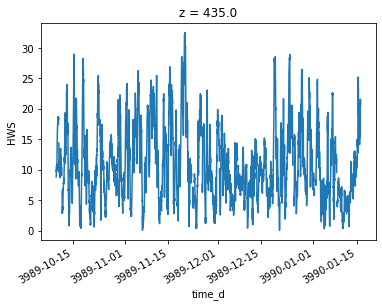

In [294]:
test3['HWS'][14].plot()

/Users/leec813/opt/anaconda3/envs/mmc-sgp/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


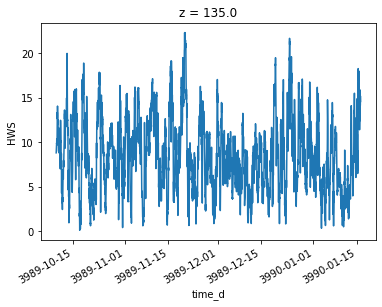

In [284]:
test3['HWS'][4].plot()

In [267]:
test['HWS']

<xarray.DataArray 'HWS' (z: 28, time_d: 4730)>
[132440 values with dtype=float64]
Dimensions without coordinates: z, time_d

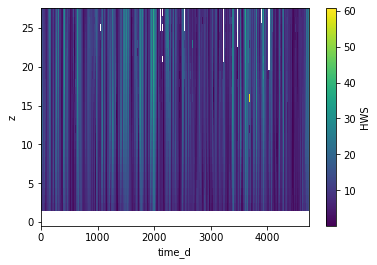

In [266]:
test['HWS'].plot(x='time_d')

In [244]:
test3['time_d']

<xarray.DataArray 'time_d' (times: 4730)>
array(['2020-10-08T17:02:27.000000000', '2020-10-08T17:30:49.000000000',
       '2020-10-08T18:00:56.000000000', ..., '2021-01-15T05:00:40.000000000',
       '2021-01-15T05:30:26.000000000', '2021-01-15T06:01:10.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * times    (times) datetime64[ns] 2020-10-08T17:02:27 ... 2021-01-15T06:01:10
    time_d   (times) datetime64[ns] 2020-10-08T17:02:27 ... 2021-01-15T06:01:10

In [216]:
test2['Z']

<xarray.DataArray 'Z' (z: 28)>
array([ 15.,  45.,  75., 105., 135., 165., 195., 225., 255., 285., 315., 345.,
       375., 405., 435., 465., 495., 525., 555., 585., 615., 645., 675., 705.,
       735., 765., 795., 825.])
Coordinates:
  * z        (z) float64 15.0 45.0 75.0 105.0 135.0 ... 735.0 765.0 795.0 825.0

In [241]:
test2['HWS']

<xarray.DataArray 'HWS' (z: 28, time_d: 4730)>
[132440 values with dtype=float64]
Coordinates:
  * z        (z) float64 15.0 45.0 75.0 105.0 135.0 ... 735.0 765.0 795.0 825.0
Dimensions without coordinates: time_d

In [213]:
test2

<xarray.Dataset>
Dimensions:  (time_d: 4730, ymdHMS: 6, z: 28)
Coordinates:
  * z        (z) float64 15.0 45.0 75.0 105.0 135.0 ... 735.0 765.0 795.0 825.0
  * time_d   (time_d) datetime64[ns] 2020-10-08T17:02:27 ... 2021-01-15T06:01:10
Dimensions without coordinates: ymdHMS
Data variables:
    HWS      (z, time_d) float64 ...
    HWD      (z, time_d) float64 ...
    uw       (z, time_d) float64 ...
    time     (ymdHMS, time_d) float64 ...
    Z        (z) float64 ...
Attributes:
    history:  Wed Aug 11 11:27:38 2021: ncrename -v time,time_d SGPC1_Mom_Flu...
    NCO:      netCDF Operators version 5.0.1 (Homepage = http://nco.sf.net, C...

In [205]:
test2['time_d'][0].values

numpy.datetime64('2020-10-08T17:02:27.000000000')

In [163]:
test

<xarray.Dataset>
Dimensions:  (time_d: 4730, ymdHMS: 6, z: 28)
Dimensions without coordinates: time_d, ymdHMS, z
Data variables:
    HWS      (z, time_d) float64 ...
    HWD      (z, time_d) float64 ...
    uw       (z, time_d) float64 ...
    time     (ymdHMS, time_d) float64 ...
    Z        (z) float64 ...
Attributes:
    history:  Wed Aug 11 11:27:38 2021: ncrename -v time,time_d SGPC1_Mom_Flu...
    NCO:      netCDF Operators version 5.0.1 (Homepage = http://nco.sf.net, C...

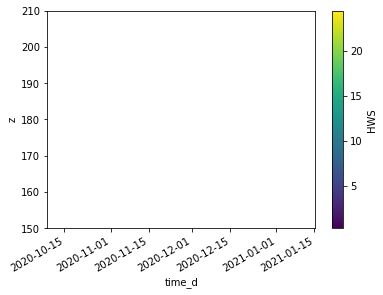

In [157]:
test['HWS'][5:7].plot()

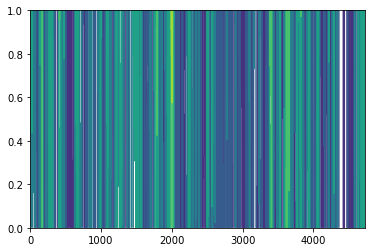

In [158]:
plt.contour(test['HWS'][5:7])

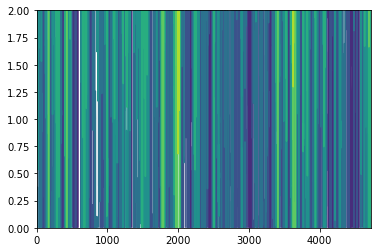

In [194]:
plt.contour(test['HWS'][2:5])

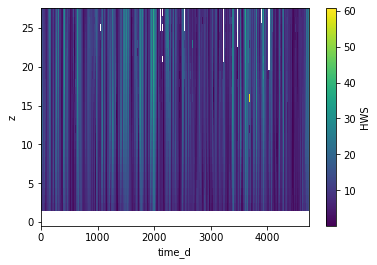

In [192]:
test['HWS'].plot()
# plt.yticks(str(test['Z'].values))
plt.show()

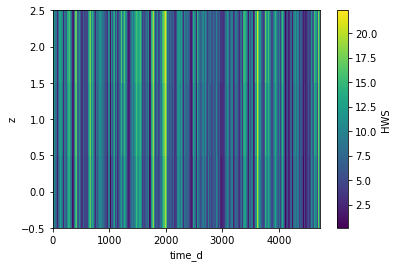

In [193]:
test['HWS'][2:5].plot()

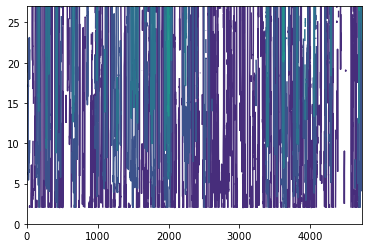

In [182]:
plt.contour(test2['HWS'])

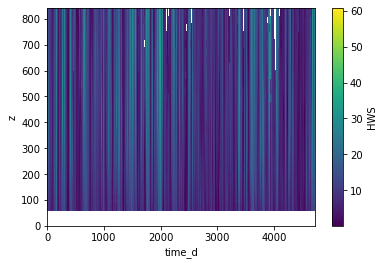

In [226]:
test2['HWS'].plot()
# plt.xticks(test_arr)

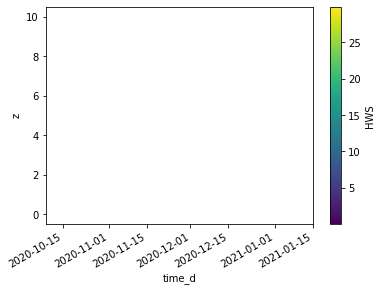

In [190]:
test2['HWS'][1:12].plot()

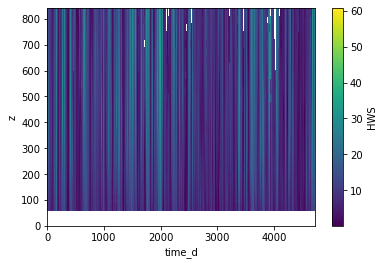

In [246]:
test3['HWS'].plot()

In [247]:
test3['HWS']

<xarray.DataArray 'HWS' (z: 28, time_d: 4730)>
[132440 values with dtype=float64]
Coordinates:
  * z        (z) float64 15.0 45.0 75.0 105.0 135.0 ... 735.0 765.0 795.0 825.0
Dimensions without coordinates: time_d

In [248]:
test3['time_d']

<xarray.DataArray 'time_d' (times: 4730)>
array(['2020-10-08T17:02:27.000000000', '2020-10-08T17:30:49.000000000',
       '2020-10-08T18:00:56.000000000', ..., '2021-01-15T05:00:40.000000000',
       '2021-01-15T05:30:26.000000000', '2021-01-15T06:01:10.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * times    (times) datetime64[ns] 2020-10-08T17:02:27 ... 2021-01-15T06:01:10
    time_d   (times) datetime64[ns] 2020-10-08T17:02:27 ... 2021-01-15T06:01:10

In [4]:
test['time']

<xarray.DataArray 'time' (ymdHMS: 6, time_d: 4730)>
array([[2.02000e+03, 2.02000e+03, 2.02000e+03, ..., 2.02100e+03, 2.02100e+03,
        2.02100e+03],
       [1.00000e+01, 1.00000e+01, 1.00000e+01, ..., 1.00000e+00, 1.00000e+00,
        1.00000e+00],
       [8.00000e+00, 8.00000e+00, 8.00000e+00, ..., 1.50000e+01, 1.50000e+01,
        1.50000e+01],
       [1.70000e+01, 1.70000e+01, 1.80000e+01, ..., 5.00000e+00, 5.00000e+00,
        6.00000e+00],
       [2.00000e+00, 3.00000e+01, 0.00000e+00, ..., 0.00000e+00, 3.00000e+01,
        1.00000e+00],
       [2.72511e+01, 4.95689e+01, 5.64423e+01, ..., 4.08794e+01, 2.61492e+01,
        1.03297e+01]])
Dimensions without coordinates: ymdHMS, time_d

In [23]:
test['time'][0]

<xarray.DataArray 'time' (time_d: 4730)>
array([2020., 2020., 2020., ..., 2021., 2021., 2021.])
Dimensions without coordinates: time_d

In [32]:
test['time'][2]

<xarray.DataArray 'time' (time_d: 4730)>
array([ 8.,  8.,  8., ..., 15., 15., 15.])
Dimensions without coordinates: time_d

In [57]:
len(test['time_d'])

4730

In [58]:
datetime_arr = np.empty(len(test['time_d']))

In [71]:
datetime_arr

array([ 6.93500795e-310,  2.02369289e-320,  2.20936136e-314, ...,
        6.93500681e-310, -3.46958566e-138,  6.93500631e-310])

In [102]:
len(test['time_d'])

4730

In [103]:
test_arr = np.empty(0)

for i in range(len(test['time_d'])):
    print(i)
    
    a = datetime.datetime(int(test['time'][0][i]), int(test['time'][1][i]), 
                  int(test['time'][2][i]), int(test['time'][3][i]), 
                  int(test['time'][4][i]), int(test['time'][5][i]))
    print(a)

    test_arr = np.append(test_arr, a)

0
2020-10-08 17:02:27
1
2020-10-08 17:30:49
2
2020-10-08 18:00:56
3
2020-10-08 18:30:58
4
2020-10-08 19:01:00
5
2020-10-08 19:30:59
6
2020-10-08 20:00:58
7
2020-10-08 20:30:57
8
2020-10-08 21:00:56
9
2020-10-08 21:30:56
10
2020-10-08 22:00:55
11
2020-10-08 22:30:54
12
2020-10-08 23:00:53
13
2020-10-08 23:30:40
14
2020-10-09 00:01:21
15
2020-10-09 00:31:03
16
2020-10-09 01:00:44
17
2020-10-09 01:30:25
18
2020-10-09 02:01:06
19
2020-10-09 02:30:49
20
2020-10-09 03:00:32
21
2020-10-09 03:31:15
22
2020-10-09 04:00:59
23
2020-10-09 04:30:43
24
2020-10-09 05:00:27
25
2020-10-09 05:30:39
26
2020-10-09 06:00:47
27
2020-10-09 06:30:56
28
2020-10-09 07:01:03
29
2020-10-09 07:31:11
30
2020-10-09 08:01:17
31
2020-10-09 08:30:26
32
2020-10-09 09:00:33
33
2020-10-09 09:30:40
34
2020-10-09 10:00:47
35
2020-10-09 10:30:55
36
2020-10-09 11:01:03
37
2020-10-09 11:31:10
38
2020-10-09 12:01:18
39
2020-10-09 12:30:27
40
2020-10-09 13:00:35
41
2020-10-09 13:30:43
42
2020-10-09 14:00:50
43
2020-10-09 14:30:5

2020-10-20 18:00:53
579
2020-10-20 18:31:11
580
2020-10-20 19:00:31
581
2020-10-20 19:30:49
582
2020-10-20 20:00:26
583
2020-10-20 20:30:43
584
2020-10-20 21:01:01
585
2020-10-20 21:31:20
586
2020-10-20 22:00:41
587
2020-10-20 22:30:59
588
2020-10-20 23:01:18
589
2020-10-20 23:30:39
590
2020-10-21 00:00:45
591
2020-10-21 00:31:11
592
2020-10-21 01:00:37
593
2020-10-21 01:30:51
594
2020-10-21 02:00:54
595
2020-10-21 02:30:58
596
2020-10-21 03:01:01
597
2020-10-21 03:31:01
598
2020-10-21 04:01:01
599
2020-10-21 04:31:01
600
2020-10-21 05:01:01
601
2020-10-21 05:31:01
602
2020-10-21 06:01:01
603
2020-10-21 06:30:52
604
2020-10-21 07:00:36
605
2020-10-21 07:31:19
606
2020-10-21 08:01:03
607
2020-10-21 08:30:47
608
2020-10-21 09:00:32
609
2020-10-21 09:31:15
610
2020-10-21 10:01:00
611
2020-10-21 10:30:45
612
2020-10-21 11:00:30
613
2020-10-21 11:31:15
614
2020-10-21 12:00:57
615
2020-10-21 12:31:08
616
2020-10-21 13:01:18
617
2020-10-21 13:30:30
618
2020-10-21 14:00:41
619
2020-10-21 14:30

2020-10-29 10:00:52
995
2020-10-29 10:31:10
996
2020-10-29 11:00:31
997
2020-10-29 11:30:49
998
2020-10-29 12:00:26
999
2020-10-29 12:30:44
1000
2020-10-29 13:01:03
1001
2020-10-29 13:31:21
1002
2020-10-29 14:00:42
1003
2020-10-29 14:31:00
1004
2020-10-29 15:01:18
1005
2020-10-29 15:30:39
1006
2020-10-29 16:00:57
1007
2020-10-29 16:31:15
1008
2020-10-29 17:00:36
1009
2020-10-29 17:30:54
1010
2020-10-29 18:00:30
1011
2020-10-29 18:30:48
1012
2020-10-29 19:01:21
1013
2020-10-29 19:30:42
1014
2020-10-29 20:01:00
1015
2020-10-29 20:31:17
1016
2020-10-29 21:00:38
1017
2020-10-29 21:30:56
1018
2020-10-29 22:01:14
1019
2020-10-29 22:30:35
1020
2020-10-29 23:00:53
1021
2020-10-29 23:30:31
1022
2020-10-30 00:00:58
1023
2020-10-30 00:31:25
1024
2020-10-30 01:00:42
1025
2020-10-30 01:30:45
1026
2020-10-30 02:00:48
1027
2020-10-30 02:30:50
1028
2020-10-30 03:00:50
1029
2020-10-30 03:30:50
1030
2020-10-30 04:00:50
1031
2020-10-30 04:30:50
1032
2020-10-30 05:00:51
1033
2020-10-30 05:30:44
1034
2020-

2020-11-08 01:30:46
1458
2020-11-08 02:01:20
1459
2020-11-08 02:30:41
1460
2020-11-08 03:00:59
1461
2020-11-08 03:31:17
1462
2020-11-08 04:00:39
1463
2020-11-08 04:30:56
1464
2020-11-08 05:01:15
1465
2020-11-08 05:30:36
1466
2020-11-08 06:00:54
1467
2020-11-08 06:31:12
1468
2020-11-08 07:00:33
1469
2020-11-08 07:30:51
1470
2020-11-08 08:00:27
1471
2020-11-08 08:30:45
1472
2020-11-08 09:01:03
1473
2020-11-08 09:31:21
1474
2020-11-08 10:00:42
1475
2020-11-08 10:31:00
1476
2020-11-08 11:01:18
1477
2020-11-08 11:30:40
1478
2020-11-08 12:00:58
1479
2020-11-08 12:31:16
1480
2020-11-08 13:00:37
1481
2020-11-08 13:30:56
1482
2020-11-08 14:01:14
1483
2020-11-08 14:30:35
1484
2020-11-08 15:00:53
1485
2020-11-08 15:31:12
1486
2020-11-08 16:00:33
1487
2020-11-08 16:30:51
1488
2020-11-08 17:00:25
1489
2020-11-08 17:30:51
1490
2020-11-08 18:01:17
1491
2020-11-08 18:30:38
1492
2020-11-08 19:00:42
1493
2020-11-08 19:30:46
1494
2020-11-08 20:00:47
1495
2020-11-08 20:30:48
1496
2020-11-08 21:00:49
1497


1917
2020-11-17 15:31:23
1918
2020-11-17 16:00:34
1919
2020-11-17 16:30:43
1920
2020-11-17 17:00:52
1921
2020-11-17 17:31:01
1922
2020-11-17 18:00:27
1923
2020-11-17 18:30:36
1924
2020-11-17 19:00:44
1925
2020-11-17 19:30:52
1926
2020-11-17 20:01:01
1927
2020-11-17 20:31:11
1928
2020-11-17 21:01:20
1929
2020-11-17 21:30:32
1930
2020-11-17 22:00:42
1931
2020-11-17 22:30:52
1932
2020-11-17 23:01:03
1933
2020-11-17 23:31:13
1934
2020-11-18 00:00:25
1935
2020-11-18 00:30:36
1936
2020-11-18 01:00:46
1937
2020-11-18 01:30:55
1938
2020-11-18 02:01:05
1939
2020-11-18 02:31:16
1940
2020-11-18 03:00:28
1941
2020-11-18 03:30:38
1942
2020-11-18 04:00:48
1943
2020-11-18 04:30:59
1944
2020-11-18 05:00:49
1945
2020-11-18 05:31:06
1946
2020-11-18 06:00:27
1947
2020-11-18 06:30:45
1948
2020-11-18 07:01:02
1949
2020-11-18 07:31:20
1950
2020-11-18 08:00:41
1951
2020-11-18 08:30:58
1952
2020-11-18 09:01:16
1953
2020-11-18 09:30:37
1954
2020-11-18 10:00:55
1955
2020-11-18 10:31:12
1956
2020-11-18 11:00:33


2020-11-27 06:30:56
2379
2020-11-27 07:00:42
2380
2020-11-27 07:30:28
2381
2020-11-27 08:00:43
2382
2020-11-27 08:31:15
2383
2020-11-27 09:00:50
2384
2020-11-27 09:30:54
2385
2020-11-27 10:01:10
2386
2020-11-27 10:31:14
2387
2020-11-27 11:01:15
2388
2020-11-27 11:30:25
2389
2020-11-27 12:00:26
2390
2020-11-27 12:30:28
2391
2020-11-27 13:00:29
2392
2020-11-27 13:31:15
2393
2020-11-27 14:00:56
2394
2020-11-27 14:30:38
2395
2020-11-27 15:01:10
2396
2020-11-27 15:30:51
2397
2020-11-27 16:00:32
2398
2020-11-27 16:31:05
2399
2020-11-27 17:00:47
2400
2020-11-27 17:30:30
2401
2020-11-27 18:00:25
2402
2020-11-27 18:30:59
2403
2020-11-27 19:00:42
2404
2020-11-27 19:30:48
2405
2020-11-27 20:00:42
2406
2020-11-27 20:30:37
2407
2020-11-27 21:00:31
2408
2020-11-27 21:30:25
2409
2020-11-27 22:01:08
2410
2020-11-27 22:31:01
2411
2020-11-27 23:00:55
2412
2020-11-27 23:30:49
2413
2020-11-28 00:00:44
2414
2020-11-28 00:30:38
2415
2020-11-28 01:00:33
2416
2020-11-28 01:30:28
2417
2020-11-28 02:01:13
2418


2878
2020-12-07 16:30:28
2879
2020-12-07 17:00:25
2880
2020-12-07 17:30:58
2881
2020-12-07 18:00:44
2882
2020-12-07 18:30:29
2883
2020-12-07 19:01:03
2884
2020-12-07 19:30:48
2885
2020-12-07 20:00:33
2886
2020-12-07 20:31:08
2887
2020-12-07 21:00:54
2888
2020-12-07 21:30:39
2889
2020-12-07 22:01:13
2890
2020-12-07 22:30:58
2891
2020-12-07 23:00:43
2892
2020-12-07 23:30:29
2893
2020-12-08 00:00:25
2894
2020-12-08 00:30:58
2895
2020-12-08 01:00:44
2896
2020-12-08 01:30:29
2897
2020-12-08 02:01:02
2898
2020-12-08 02:30:48
2899
2020-12-08 03:00:33
2900
2020-12-08 03:31:06
2901
2020-12-08 04:00:51
2902
2020-12-08 04:30:37
2903
2020-12-08 05:01:10
2904
2020-12-08 05:30:55
2905
2020-12-08 06:00:41
2906
2020-12-08 06:30:26
2907
2020-12-08 07:00:30
2908
2020-12-08 07:31:01
2909
2020-12-08 08:00:39
2910
2020-12-08 08:31:01
2911
2020-12-08 09:00:25
2912
2020-12-08 09:30:30
2913
2020-12-08 10:00:34
2914
2020-12-08 10:30:38
2915
2020-12-08 11:00:39
2916
2020-12-08 11:30:40
2917
2020-12-08 12:00:41


2020-12-16 20:31:06
3319
2020-12-16 21:01:11
3320
2020-12-16 21:31:04
3321
2020-12-16 22:01:09
3322
2020-12-16 22:31:03
3323
2020-12-16 23:00:57
3324
2020-12-16 23:30:50
3325
2020-12-17 00:00:45
3326
2020-12-17 00:30:39
3327
2020-12-17 01:00:34
3328
2020-12-17 01:30:28
3329
2020-12-17 02:01:13
3330
2020-12-17 02:31:08
3331
2020-12-17 03:01:14
3332
2020-12-17 03:31:08
3333
2020-12-17 04:01:14
3334
2020-12-17 04:31:09
3335
2020-12-17 05:00:25
3336
2020-12-17 05:31:10
3337
2020-12-17 06:01:05
3338
2020-12-17 06:31:00
3339
2020-12-17 07:01:12
3340
2020-12-17 07:30:57
3341
2020-12-17 08:00:42
3342
2020-12-17 08:30:27
3343
2020-12-17 09:01:12
3344
2020-12-17 09:30:57
3345
2020-12-17 10:00:43
3346
2020-12-17 10:30:28
3347
2020-12-17 11:01:13
3348
2020-12-17 11:30:58
3349
2020-12-17 12:00:43
3350
2020-12-17 12:30:28
3351
2020-12-17 13:00:25
3352
2020-12-17 13:30:58
3353
2020-12-17 14:00:44
3354
2020-12-17 14:30:29
3355
2020-12-17 15:01:03
3356
2020-12-17 15:30:48
3357
2020-12-17 16:00:34
3358


2020-12-26 00:00:42
3758
2020-12-26 00:30:28
3759
2020-12-26 01:01:12
3760
2020-12-26 01:30:57
3761
2020-12-26 02:00:43
3762
2020-12-26 02:30:28
3763
2020-12-26 03:01:13
3764
2020-12-26 03:30:58
3765
2020-12-26 04:00:43
3766
2020-12-26 04:30:28
3767
2020-12-26 05:01:02
3768
2020-12-26 05:30:47
3769
2020-12-26 06:00:33
3770
2020-12-26 06:31:06
3771
2020-12-26 07:00:51
3772
2020-12-26 07:30:37
3773
2020-12-26 08:01:10
3774
2020-12-26 08:30:55
3775
2020-12-26 09:00:41
3776
2020-12-26 09:31:08
3777
2020-12-26 10:00:47
3778
2020-12-26 10:30:25
3779
2020-12-26 11:00:55
3780
2020-12-26 11:30:34
3781
2020-12-26 12:00:49
3782
2020-12-26 12:30:53
3783
2020-12-26 13:00:58
3784
2020-12-26 13:31:02
3785
2020-12-26 14:00:25
3786
2020-12-26 14:30:25
3787
2020-12-26 15:00:26
3788
2020-12-26 15:30:27
3789
2020-12-26 16:00:28
3790
2020-12-26 16:30:29
3791
2020-12-26 17:00:30
3792
2020-12-26 17:31:05
3793
2020-12-26 18:00:47
3794
2020-12-26 18:30:28
3795
2020-12-26 19:01:12
3796
2020-12-26 19:30:52
3797


2021-01-06 08:01:14
4302
2021-01-06 08:31:00
4303
2021-01-06 09:00:43
4304
2021-01-06 09:30:27
4305
2021-01-06 10:01:11
4306
2021-01-06 10:30:53
4307
2021-01-06 11:00:35
4308
2021-01-06 11:31:08
4309
2021-01-06 12:00:49
4310
2021-01-06 12:30:30
4311
2021-01-06 13:01:13
4312
2021-01-06 13:30:55
4313
2021-01-06 14:00:33
4314
2021-01-06 14:30:25
4315
2021-01-06 15:01:07
4316
2021-01-06 15:31:00
4317
2021-01-06 16:00:52
4318
2021-01-06 16:30:45
4319
2021-01-06 17:00:37
4320
2021-01-06 17:30:30
4321
2021-01-06 18:01:11
4322
2021-01-06 18:31:05
4323
2021-01-06 19:01:11
4324
2021-01-06 19:31:06
4325
2021-01-06 20:01:12
4326
2021-01-06 20:31:07
4327
2021-01-06 21:01:13
4328
2021-01-06 21:31:07
4329
2021-01-06 22:01:14
4330
2021-01-06 22:31:09
4331
2021-01-06 23:00:25
4332
2021-01-06 23:31:10
4333
2021-01-07 00:01:05
4334
2021-01-07 00:30:55
4335
2021-01-07 01:00:40
4336
2021-01-07 01:30:25
4337
2021-01-07 02:01:10
4338
2021-01-07 02:30:55
4339
2021-01-07 03:00:40
4340
2021-01-07 03:30:26
4341


2021-01-14 19:30:31
4709
2021-01-14 20:00:26
4710
2021-01-14 20:31:11
4711
2021-01-14 21:01:06
4712
2021-01-14 21:31:00
4713
2021-01-14 22:00:55
4714
2021-01-14 22:30:50
4715
2021-01-14 23:00:39
4716
2021-01-14 23:30:25
4717
2021-01-15 00:01:09
4718
2021-01-15 00:30:54
4719
2021-01-15 01:00:40
4720
2021-01-15 01:30:25
4721
2021-01-15 02:01:10
4722
2021-01-15 02:30:55
4723
2021-01-15 03:00:40
4724
2021-01-15 03:30:25
4725
2021-01-15 04:01:10
4726
2021-01-15 04:30:55
4727
2021-01-15 05:00:40
4728
2021-01-15 05:30:26
4729
2021-01-15 06:01:10


In [299]:
test_arr

array([datetime.datetime(2020, 10, 8, 17, 2, 27),
       datetime.datetime(2020, 10, 8, 17, 30, 49),
       datetime.datetime(2020, 10, 8, 18, 0, 56), ...,
       datetime.datetime(2021, 1, 15, 5, 0, 40),
       datetime.datetime(2021, 1, 15, 5, 30, 26),
       datetime.datetime(2021, 1, 15, 6, 1, 10)], dtype=object)

In [70]:
for ind, val in enumerate(datetime_arr):
#     print(ind, val)
    datetime_arr[ind] = datetime.datetime(int(test['time'][0][0]), int(test['time'][1][0]), 
                  int(test['time'][2][0]), int(test['time'][3][0]), 
                  int(test['time'][4][0]), int(test['time'][5][0]))

TypeError: float() argument must be a string or a number, not 'datetime.datetime'

In [69]:
datetime_arr

array([ 6.93500795e-310,  2.02369289e-320,  2.20936136e-314, ...,
        6.93500681e-310, -3.46958566e-138,  6.93500631e-310])

In [53]:
datetime.datetime(int(test['time'][0][0]), int(test['time'][1][0]), int(test['time'][2][0]))

datetime.datetime(2020, 10, 8, 0, 0)

In [5]:
test2 = Dataset(nc_file)

In [6]:
test2

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): time(4730), z(28), ymdHMS(6)
    variables(dimensions): float64 HWS(z, time), float64 HWD(z, time), float64 uw(z, time), float64 time(ymdHMS, time), float64 Z(z)
    groups: 

In [10]:
test2['time'][:]

masked_array(
  data=[[2.02000e+03, 2.02000e+03, 2.02000e+03, ..., 2.02100e+03,
         2.02100e+03, 2.02100e+03],
        [1.00000e+01, 1.00000e+01, 1.00000e+01, ..., 1.00000e+00,
         1.00000e+00, 1.00000e+00],
        [8.00000e+00, 8.00000e+00, 8.00000e+00, ..., 1.50000e+01,
         1.50000e+01, 1.50000e+01],
        [1.70000e+01, 1.70000e+01, 1.80000e+01, ..., 5.00000e+00,
         5.00000e+00, 6.00000e+00],
        [2.00000e+00, 3.00000e+01, 0.00000e+00, ..., 0.00000e+00,
         3.00000e+01, 1.00000e+00],
        [2.72511e+01, 4.95689e+01, 5.64423e+01, ..., 4.08794e+01,
         2.61492e+01, 1.03297e+01]],
  mask=False,
  fill_value=1e+20)

In [14]:
test2.dimensions['time'][:]

TypeError: 'netCDF4._netCDF4.Dimension' object is not subscriptable